# Prerequisites

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy.api as sc
import matplotlib as mpl
from matplotlib import rcParams
import scipy as sci
from scipy.sparse import csr_matrix
import rpy2
import gseapy as gp
print(rpy2.__version__)
sc.settings.verbosity = 3              
sc.logging.print_versions()
import sys

/Users/sophie/miniconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2.9.1
scanpy==1.0.4+92.g9a754bb.dirty anndata==0.5.10 numpy==1.14.2 scipy==1.0.1 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


In [ ]:
sc.settings.figdir='./figures/'

# Raw data

In [736]:
def qc_metrics(adata):
    mito_genes = np.array([name for name in adata.var_names if name.startswith('mt-')])
    # for each cell compute fraction of counts in mito genes vs. all genes
    adata.smp['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
    ribo_genes = np.array([name for name in adata.var_names if name.startswith('Rp')])
    # for each cell compute fraction of counts in mito genes vs. all genes
    adata.smp['percent_ribo'] = np.sum(adata[:, ribo_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
    # add the total counts per cell as sample annotation to adata
    adata.smp['n_counts'] = np.sum(adata.X, axis=1).A1
    adata.smp['n_genes'] = np.sum(adata.X > 0, axis=1).A1
    print(len(adata.smp_names))   
    return(adata)

In [738]:
path = './data/'
group='G1'
adata_G1 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G1.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G1.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G1.var_names_make_unique()

... reading from cache file ./cache/Users-sophie-Documents-ICB-Projects-2018_10X_Glp_Est_Mice-data-G1-filtered_gene_bc_matrices-mm10-matrix.h5ad


In [739]:
path = './data/'
group='G2'
adata_G2 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G2.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G2.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G2.var_names_make_unique()

... reading from cache file ./cache/Users-sophie-Documents-ICB-Projects-2018_10X_Glp_Est_Mice-data-G2-filtered_gene_bc_matrices-mm10-matrix.h5ad


In [740]:
path = './data/'
group='G3'
adata_G3 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G3.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G3.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G3.var_names_make_unique()

... reading from cache file ./cache/Users-sophie-Documents-ICB-Projects-2018_10X_Glp_Est_Mice-data-G3-filtered_gene_bc_matrices-mm10-matrix.h5ad


In [741]:
path = './data/'
group='G4'
adata_G4 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G4.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G4.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G4.var_names_make_unique()

... reading from cache file ./cache/Users-sophie-Documents-ICB-Projects-2018_10X_Glp_Est_Mice-data-G4-filtered_gene_bc_matrices-mm10-matrix.h5ad


In [742]:
path = './data/'
group='G5'
adata_G5 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G5.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G5.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G5.var_names_make_unique()

... reading from cache file ./cache/Users-sophie-Documents-ICB-Projects-2018_10X_Glp_Est_Mice-data-G5-filtered_gene_bc_matrices-mm10-matrix.h5ad


In [743]:
path = './data/'
group='G6'
adata_G6 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G6.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G6.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G6.var_names_make_unique()

... reading from cache file ./cache/Users-sophie-Documents-ICB-Projects-2018_10X_Glp_Est_Mice-data-G6-filtered_gene_bc_matrices-mm10-matrix.h5ad


In [744]:
path = './data/'
group='G8'
adata_G8 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G8.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G8.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G8.var_names_make_unique()

... reading from cache file ./cache/Users-sophie-Documents-ICB-Projects-2018_10X_Glp_Est_Mice-data-G8-filtered_gene_bc_matrices-mm10-matrix.h5ad


In [745]:
adata_G1=qc_metrics(adata_G1)
adata_G2=qc_metrics(adata_G2)
adata_G3=qc_metrics(adata_G3)
adata_G4=qc_metrics(adata_G4)
adata_G5=qc_metrics(adata_G5)
adata_G6=qc_metrics(adata_G6)
adata_G8=qc_metrics(adata_G8)

7790
5860
3418
4469
5379
6066
3437


In [746]:
adata_all=adata_G1.concatenate([adata_G2,adata_G3,adata_G4,adata_G5,adata_G6,adata_G8],
                               batch_key='groups',
                               batch_categories=['G1','G2','G3','G4','G5','G6','G8'],
                               index_unique='_')

# Quality Control

In [747]:
sc.pp.filter_genes(adata_all,min_cells=10)

In [748]:
adata_all_raw=sc.pp.log1p(adata_all,copy=True)

/Users/sophie/miniconda3/lib/python3.5/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/sophie/miniconda3/lib/python3.5/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


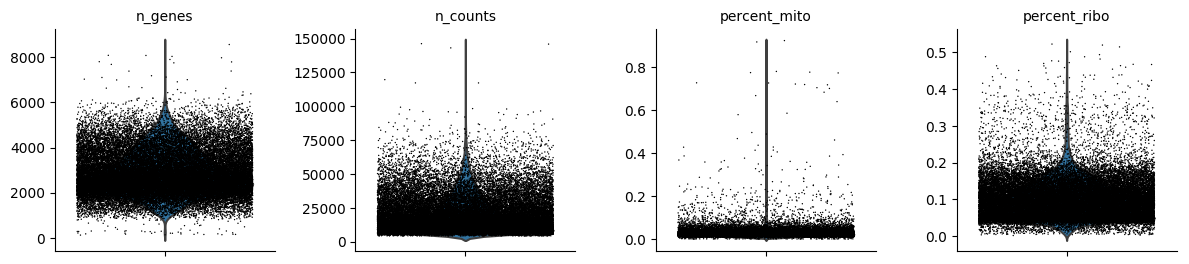

In [754]:
sc.pl.violin(adata_all_raw, ['n_genes', 'n_counts', 'percent_mito','percent_ribo'],
             jitter=0.4, multi_panel=True)

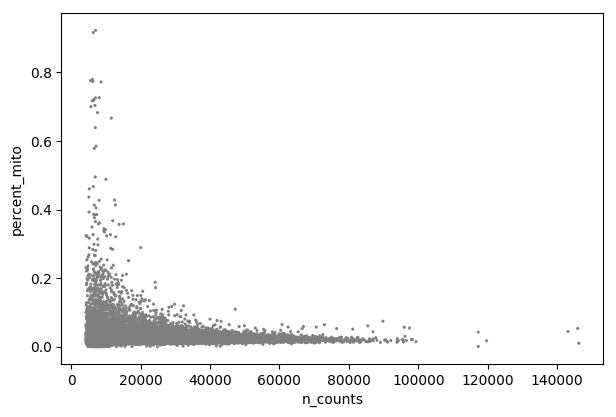

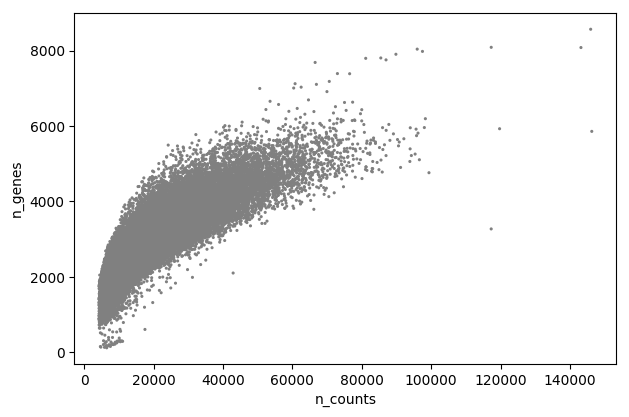

In [755]:
sc.pl.scatter(adata_all_raw, x='n_counts', y='percent_mito',size=20)
sc.pl.scatter(adata_all_raw, x='n_counts', y='n_genes',size=20)

we filter low quality and outlier cells:

In [756]:
adata_all_raw = adata_all_raw[adata_all_raw.obs['percent_mito'] < 0.4].copy()

In [757]:
adata_all_raw = adata_all_raw[adata_all_raw.obs['n_genes'] < 7000].copy()
adata_all_raw = adata_all_raw[adata_all_raw.obs['n_counts'] < 100000].copy()


# Normalization

## Count normalization

total count normalization and log-transformation

In [ ]:
from scanpy.preprocessing.simple import normalize_per_cell_weinreb16_deprecated
adata_all_norm=adata_all_raw.copy()
adata_all_norm.X=adata_all_norm.X.toarray()
adata_all_norm.X=normalize_per_cell_weinreb16_deprecated(adata_all_norm.X, max_fraction=0.95, mult_with_mean=True)


In [ ]:
from scipy.sparse import csr_matrix
adata_all_norm.X=csr_matrix(adata_all_norm.X)
sc.pp.log1p(adata_all_norm)

In [ ]:
#sc.write('all_norm_log',adata_all_norm)

## Quantile normalization

we do quantile normalization for differential expression testing as total count normalization could be influenced by very high expression of a few genes (e.g. hormones). We do not see much effect on the expression of most genes, clustering and low-dimensional embedding.

In [ ]:
from scanpy.preprocessing.simple import normalize_per_cell_weinreb16_deprecated
adata_all_norm=adata_all_raw.copy()
adata_all_norm.X=adata_all_norm.X.toarray()
adata_all_norm.X=normalize_per_cell_weinreb16_deprecated(adata_all_norm.X, max_fraction=0.05, mult_with_mean=True)

In [ ]:
from scipy.sparse import csr_matrix
adata_all_norm.X=csr_matrix(adata_all_norm.X)
sc.pp.log1p(adata_all_norm)

In [ ]:
adata_all_norm.obsm['X_umap']=adata_all.obsm['X_umap']

In [ ]:
sc.pp.log1p(adata_all_norm)

In [ ]:
sc.write('./data/all_quantile_norm.h5ad',adata_all_norm)

# Cell and quality statistics

In [457]:
df=adata_all.obs[['n_genes','n_counts','treatment']]
df_all=pd.DataFrame(np.round(df.groupby(by='treatment')['n_genes'].apply(np.mean).values),index=df.groupby(by='treatment')['n_genes'].apply(np.mean).index,columns=['mean genes/cell'])

df_all['median genes/cell']=np.round(df.groupby(by='treatment')['n_genes'].apply(np.median).values)
df_all['mean counts/cell']=np.round(df.groupby(by='treatment')['n_counts'].apply(np.mean).values)
df_all['median counts/cell']=np.round(df.groupby(by='treatment')['n_counts'].apply(np.median).values)


In [460]:
df_all['mean reads/cell']=[75227,142519,96641,89470,119736,127857,94647] ##from Cellranger output summary

In [463]:
df_all.to_excel('./figures/cell_statistics.xlsx')

# Assign treatment names and colors

In [ ]:
adata_all=adata_all_norm.copy()

In [ ]:
ref=pd.Categorical(adata_all.obs['groups'],
                   categories=['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G8','Ctrl','Vehicle-STZ','PEG-insulin','GLP1','Estrogen','GLP1-E','GLP1-E + PEG-insulin'])


ix=np.isin(adata_all.obs['groups'],'G1')
ref[ix]='Ctrl'

ix=np.isin(adata_all.obs['groups'],'G2')
ref[ix]='Vehicle-STZ'

ix=np.isin(adata_all.obs['groups'],'G3')
ref[ix]='PEG-insulin'

ix=np.isin(adata_all.obs['groups'],'G4')
ref[ix]='GLP1'

ix=np.isin(adata_all.obs['groups'],'G5')
ref[ix]='Estrogen'

ix=np.isin(adata_all.obs['groups'],'G6')
ref[ix]='GLP1-E'

ix=np.isin(adata_all.obs['groups'],'G8')
ref[ix]='GLP1-E + PEG-insulin'

adata_all.obs['treatment']=pd.Categorical(ref,categories=['Ctrl','Vehicle-STZ','Estrogen','GLP1','GLP1-E','PEG-insulin','GLP1-E + PEG-insulin'])

In [ ]:
adata_all.uns['treatment_colors']=['#000000','#999999','#fffe66','#73fcd5','#0004fe','#fd6565','#750002']

In [ ]:
adata_all_hvg.obs['treatment']=adata_all.obs['treatment']
adata_all_hvg.uns['treatment_colors']=['#000000','#999999','#fffe66','#73fcd5','#0004fe','#fd6565','#750002']

# Embedding and clustering

## Highly variable genes

In [ ]:
filter_result = sc.pp.filter_genes_dispersion(adata_all.X, min_mean=0.0125, min_disp=0.5)

sc.pl.filter_genes_dispersion(filter_result, log=False)

print(adata_all.n_vars)

adata_all_hvg = adata_all[:, filter_result.gene_subset].copy()  # filter genes

print(adata_all_hvg.n_vars)

## knn-graph and low dimensional embedding

we calculate the knn-graph on the diffusion components to minimize condition effects and facilitate clustering

In [618]:
sc.pp.pca(adata_all_hvg)
sc.pp.neighbors(adata_all_hvg)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:13.36) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [ ]:
adata_denoised = adata_all_hvg.copy()
sc.tl.diffmap(adata_denoised)
sc.pp.neighbors(adata_denoised,use_rep='X_diffmap')

In [ ]:
adata_denoised.uns['treatment_colors']=['#000000','#999999','#fffe66','#73fcd5','#0004fe','#fd6565','#750002']

In [ ]:
sc.tl.umap(adata_denoised,min_dist=0.5)

In [3]:
# pass over embedding full adata
adata_all.obsm['X_umap']=adata_denoised.obsm['X_umap']
adata_all_hvg.obsm['X_umap']=adata_denoised.obsm['X_umap']

## Clustering at different resolutions

In [330]:
sc.tl.louvain(adata_denoised,resolution=0.5)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:04.61) --> found 30 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


In [331]:
sc.tl.louvain(adata_denoised,resolution=0.1,restrict_to=('louvain',['13']),key_added='refined_1')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.98) --> found 4 clusters and added
    'refined_1', the cluster labels (adata.obs, categorical)


/Users/sophie/miniconda3/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/sophie/code/scanpy/scanpy/tools/louvain.py:131: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=natsorted(adata.obs[key_added].unique()))


In [332]:
sc.tl.louvain(adata_denoised,resolution=0.5,restrict_to=('refined_1',['21']),key_added='refined_2')

running Louvain clustering
    using the "louvain" package of Traag (2017)


/Users/sophie/miniconda3/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


    finished (0:00:00.91) --> found 9 clusters and added
    'refined_2', the cluster labels (adata.obs, categorical)


/Users/sophie/code/scanpy/scanpy/tools/louvain.py:131: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=natsorted(adata.obs[key_added].unique()))


In [333]:
sc.tl.louvain(adata_denoised,resolution=0.1,restrict_to=('refined_2',['23']),key_added='refined_3')

running Louvain clustering
    using the "louvain" package of Traag (2017)


/Users/sophie/miniconda3/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


    finished (0:00:00.55) --> found 3 clusters and added
    'refined_3', the cluster labels (adata.obs, categorical)


/Users/sophie/code/scanpy/scanpy/tools/louvain.py:131: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=natsorted(adata.obs[key_added].unique()))


In [334]:
sc.tl.louvain(adata_denoised,resolution=0.3,restrict_to=('refined_3',['1']),key_added='refined_32')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.74) --> found 7 clusters and added
    'refined_32', the cluster labels (adata.obs, categorical)


/Users/sophie/miniconda3/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/sophie/code/scanpy/scanpy/tools/louvain.py:131: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=natsorted(adata.obs[key_added].unique()))


In [335]:
sc.tl.louvain(adata_denoised,resolution=0.6,restrict_to=('refined_32',['1,6']),key_added='refined_33')

running Louvain clustering
    using the "louvain" package of Traag (2017)


/Users/sophie/miniconda3/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


    finished (0:00:00.66) --> found 3 clusters and added
    'refined_33', the cluster labels (adata.obs, categorical)


/Users/sophie/code/scanpy/scanpy/tools/louvain.py:131: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=natsorted(adata.obs[key_added].unique()))


In [336]:
sc.tl.louvain(adata_denoised,resolution=0.1,restrict_to=('refined_33',['22']),key_added='refined_4')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.49) --> found 4 clusters and added
    'refined_4', the cluster labels (adata.obs, categorical)


/Users/sophie/miniconda3/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/sophie/code/scanpy/scanpy/tools/louvain.py:131: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=natsorted(adata.obs[key_added].unique()))


In [337]:
sc.tl.louvain(adata_denoised,resolution=0.7,restrict_to=('refined_4',['19']),key_added='refined_41')

running Louvain clustering
    using the "louvain" package of Traag (2017)


/Users/sophie/miniconda3/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


    finished (0:00:00.84) --> found 8 clusters and added
    'refined_41', the cluster labels (adata.obs, categorical)


/Users/sophie/code/scanpy/scanpy/tools/louvain.py:131: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=natsorted(adata.obs[key_added].unique()))


## Cluster refinement

### Beta cell subpopulations

we do subclustering on the isolated beta cell and Ins-Ppy population

In [338]:
adata_sub_den=adata_denoised[np.isin(adata_denoised.obs['refined_41'],['6','9','10','20','5','14','4','1,0', '1,1', '1,2', '1,3', '1,4',
                                                                '1,6,0','4','1,5'])].copy()

In [339]:
sc.pp.neighbors(adata_sub_den,n_neighbors=20)#,use_rep='X_diffmap')
sc.tl.umap(adata_sub_den,min_dist=0.6)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:07.78) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing UMAP
    finished (0:00:14.09) --> added
    'X_umap', UMAP coordinates (adata.obsm)


In [340]:
sc.tl.louvain(adata_sub_den,resolution=0.7)
sc.tl.louvain(adata_sub_den,resolution=0.5,restrict_to=('louvain',['1']),key_added='louvain_2')
sc.tl.louvain(adata_sub_den,resolution=0.7,restrict_to=('louvain_2',['1,1']),key_added='louvain_3')
sc.tl.louvain(adata_sub_den,resolution=0.7,restrict_to=('louvain_3',['3']),key_added='louvain_4')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:05.14) --> found 8 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
running Louvain clustering
    using the "louvain" package of Traag (2017)

/Users/sophie/miniconda3/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/sophie/code/scanpy/scanpy/tools/louvain.py:131: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=natsorted(adata.obs[key_added].unique()))



    finished (0:00:00.71) --> found 3 clusters and added
    'louvain_2', the cluster labels (adata.obs, categorical)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.38) --> found 5 clusters and added
    'louvain_3', the cluster labels (adata.obs, categorical)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.91) --> found 6 clusters and added
    'louvain_4', the cluster labels (adata.obs, categorical)


In [341]:
ref_cluster=pd.Categorical(adata_sub_den.obs['louvain_4'],
                           categories=['0', '1,0', '1,1,0', '1,1,1', '1,1,2', '1,1,3', '1,1,4', '1,2', '2',
       '3,0', '3,1', '3,2', '3,3', '3,4', '3,5', '4', '5', '6', '7',
                'Ins_1','Ins_2','Ins_3','Ins_dedifferentiated','Ins-Ppy','Ins-Ppy-Gcg','Ins-Gcg'])


ix=np.isin(ref_cluster,['0','4'])
ref_cluster[ix]='Ins_1'
ix=np.isin(ref_cluster,['2','3,4']) 
ref_cluster[ix]='Ins_2'

ix=np.isin(ref_cluster,['6'])
ref_cluster[ix]='Ins_3'


ix=np.isin(ref_cluster,[ '3,0', '3,1', '3,2', '3,3','3,5','5','1,2', '1,1,3','1,1,0', '1,1,1'])
ref_cluster[ix]='Ins_dedifferentiated'


ix=np.isin(ref_cluster,[ '1,1,2', '1,1,4'])
ref_cluster[ix]='Ins-Ppy-Gcg'


ix=np.isin(ref_cluster,['7'])
ref_cluster[ix]='Ins-Gcg'


ix=np.isin(ref_cluster,['1,0'])
ref_cluster[ix]='Ins-Ppy'


adata_sub_den.obs['beta_sub']=pd.Categorical(ref_cluster, categories=['Ins_1','Ins_2','Ins_3','Ins_dedifferentiated',
                                                                      'Ins-Ppy','Ins-Ppy-Gcg','Ins-Gcg'])

### Ins-Gcg-Sst polyhormonal cells

In [342]:
ix=[all(tup) for tup in zip(adata_all[:,'Ins1'].X>6,adata_all[:,'Sst'].X>6,adata_all[:,'Gcg'].X>6)]
ref_clust=pd.Categorical(adata_all.obs['groups_named_broad'],categories=list(adata_all.obs['groups_named_broad'].cat.categories)+list(['neg','pos']))
ref_clust[ix]='pos'
ref_clust[np.invert(ix)]='neg'
adata_all.obs['Ins-Gcg-Sst']=pd.Categorical(ref_clust,categories=['neg','pos'])
adata_denoised.obs['Ins-Gcg-Sst']=pd.Categorical(ref_clust,categories=['neg','pos'])

### Ins-Sst-Ppy subpopulations

In [344]:
adata_sub_delta=adata_denoised[np.isin(adata_denoised.obs['refined_4'],['3','17'])].copy()


In [345]:
sc.pp.neighbors(adata_sub_delta,n_neighbors=20)
sc.tl.umap(adata_sub_delta,min_dist=0.6)
sc.tl.louvain(adata_sub_delta,resolution=0.7)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:01.30) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing UMAP
    finished (0:00:06.33) --> added
    'X_umap', UMAP coordinates (adata.obsm)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.41) --> found 6 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


In [346]:

ref_cluster=pd.Categorical(adata_sub_delta.obs['louvain'],
                           categories=['0','1', '2','3', '4', '5',
                'Ins-Sst-Ppy','Ins-Sst'])
ix=np.isin(ref_cluster,['0','1', '2','3', '5'])
ref_cluster[ix]='Ins-Sst-Ppy'
ix=np.isin(ref_cluster,['4']) 
ref_cluster[ix]='Ins-Sst'

adata_sub_delta.obs['delta_sub']=pd.Categorical(ref_cluster, categories=['Ins-Sst-Ppy','Ins-Sst'])

## Cell type annotations

### Fine annotation of subpopulations

In [350]:
ref_cluster=pd.Categorical(adata_denoised.smp['refined_41'],
                           categories=['0', '1,0', '1,1', '1,2', '1,3', '1,4', '1,5', '1,6,0', '1,6,1',
       '1,6,2', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13,0', '13,1', '13,2', '13,3', '14', '15', '16', '17', '18',  '19,0','19,1','19,2','19,3', '19,4','19,5','19,6','19,7',
       '20', '21,0', '21,1', '21,2', '21,3', '21,4', '21,5', '21,6', '21,7',
       '21,8', '22,0', '22,1', '22,2', '22,3', '23,0', '23,1', '23,2', '24',
       '25', '26', '27', '28', '29','Ins_1','Ins_2','Ins_3','Ins_dedifferentiated','Ins-Ppy','Ins-Ppy-Gcg','Ins-Gcg','Ins-Gcg-Sst','Ins-Sst','Ins-Sst-Ppy','Gcg','Gcg-Ppy_low',
                                       'Gcg-Ppy_high',
                 'Gcg-Sst-Ppy','Ppy','Sst-Ppy_low','Sst-Ppy_high',
                 'Endothelial cells','Stellate cells','Macrophages','Dendritic cells','B cells','T cells','Ductal cells','Acinar cells',
                 'endo-stellate','endo-immune','endo-endothelial'])

ix_beta=np.isin(adata_denoised.obs['refined_4'],['6','9','10','20','5','14','1,0', '1,1', '1,2', '1,3', '1,4',
                                                                 '1,6,0','4','1,5'])



ref_cluster[ix_beta]=adata_sub_den.obs['beta_sub']

ix=np.isin(ref_cluster,['Ins_3'])
ref_cluster[ix]='Ins_1'


ix=np.isin(ref_cluster,['0','2'])
ref_cluster[ix]='Gcg'

ix=np.isin(ref_cluster,'13,1')
ref_cluster[ix]='Sst-Ppy_high'


ix=np.isin(ref_cluster,['7','11','12','13,2','13,3','15','24'])
ref_cluster[ix]='Sst-Ppy_low'



ix_delta=np.isin(adata_denoised.obs['refined_4'],['3','17'])



ref_cluster[ix_delta]=adata_sub_delta.obs['delta_sub']

ix=np.isin(ref_cluster,'8')
ref_cluster[ix]='Ppy'

ix=np.isin(ref_cluster,['19,0','19,1','19,2','19,3', '19,4','19,6','19,7'])
ref_cluster[ix]='Ins-Ppy'
ix=np.isin(ref_cluster,['19,5'])
ref_cluster[ix]='Ins-Ppy-Gcg'

ix=np.isin(adata_denoised.obs['Ins-Gcg-Sst'],'pos')


ref_cluster[ix]='Ins-Gcg-Sst'

ix=np.isin(ref_cluster,'13,0')
ref_cluster[ix]='Gcg-Sst-Ppy'

ix=np.isin(ref_cluster,['18'])
ref_cluster[ix]='Gcg-Ppy_low'

ix=np.isin(ref_cluster,['16'])
ref_cluster[ix]='Gcg-Ppy_high'

ix=np.isin(ref_cluster,['22,0','22,1','22,3','29']) 
ref_cluster[ix]='Endothelial cells'

ix=np.isin(ref_cluster,['26'])
ref_cluster[ix]='Stellate cells'

ix=np.isin(ref_cluster,'23,0')
ref_cluster[ix]='Dendritic cells'

ix=np.isin(ref_cluster,['23,1','23,2'])
ref_cluster[ix]='Macrophages'

ix=np.isin(ref_cluster,['21,0','21,3','25'])
ref_cluster[ix]='B cells'

ix=np.isin(ref_cluster,['28'])
ref_cluster[ix]='T cells'

ix=np.isin(ref_cluster,'27')
ref_cluster[ix]='Ductal cells'

ix=np.isin(ref_cluster,['1,6,1','1,6,2'])
ref_cluster[ix]='Acinar cells'

ix=np.isin(ref_cluster,['21,1','21,4','21,5','21,6','21,7','21,8'])
ref_cluster[ix]='endo-immune'

ix=np.isin(ref_cluster,['21,2'])
ref_cluster[ix]='endo-stellate'

ix=np.isin(ref_cluster,['22,2'])
ref_cluster[ix]='endo-endothelial'

adata_denoised.obs['groups_named_fine']=pd.Categorical(ref_cluster,
                                                             categories=['Ins_1','Ins_2','Ins_dedifferentiated','Ins-Ppy','Ins-Ppy-Gcg','Ins-Gcg','Ins-Gcg-Sst','Ins-Sst','Ins-Sst-Ppy',
                                                                         'Gcg','Gcg-Ppy_low','Gcg-Ppy_high','Gcg-Sst-Ppy','Ppy','Sst-Ppy_low','Sst-Ppy_high',
                                                                         'Endothelial cells','Stellate cells','Macrophages',
                                                                        'Dendritic cells','B cells','T cells','Ductal cells',
                                                                         'Acinar cells','endo-stellate',
                                                                        'endo-immune','endo-endothelial'])
# pass annotation to other anndata
adata_all.obs['groups_named_fine']=adata_denoised.obs['groups_named_fine']
adata_all_hvg.obs['groups_named_fine']=adata_denoised.obs['groups_named_fine']

### Fine annotation of subpopulations including beta cells for pseudotime inference

In [351]:
ref_cluster=pd.Categorical(adata_denoised.smp['refined_4'],
                           categories=['0', '1,0', '1,1', '1,2', '1,3', '1,4', '1,5', '1,6,0', '1,6,1',
       '1,6,2', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13,0', '13,1', '13,2', '13,3', '14', '15', '16', '17', '18', '19',
       '20', '21,0', '21,1', '21,2', '21,3', '21,4', '21,5', '21,6', '21,7',
       '21,8', '22,0', '22,1', '22,2', '22,3', '23,0', '23,1', '23,2', '24',
       '25', '26', '27', '28', '29','Ins_1','Ins_2','Ins_3','Ins_dedifferentiated','Ins-Ppy','Ins-Gcg','Ins-Ppy-Gcg','Ins-Gcg-Sst','Ins-Sst','Ins-Sst-Ppy','Gcg','Gcg-Ppy_low',
                                       'Gcg-Ppy_high',
                 'Gcg-Sst-Ppy','Ppy','Sst-Ppy_low','Sst-Ppy_high',
                 'Endothelial cells','Stellate cells','Macrophages','Dendritic cells','B cells','T cells','Ductal cells','Acinar cells',
                 'endo-stellate','endo-immune','endo-endothelial'])

ix_beta=np.isin(adata_denoised.obs['refined_4'],['6','9','10','20','5','14','1,0', '1,1', '1,2', '1,3', '1,4',
                                                                 '1,6,0','4','1,5'])



ref_cluster[ix_beta]=adata_sub_den.obs['beta_sub']


ix=np.isin(ref_cluster,['0','2'])
ref_cluster[ix]='Gcg'

ix=np.isin(ref_cluster,'13,1')
ref_cluster[ix]='Sst-Ppy_high'


ix=np.isin(ref_cluster,['7','11','12','13,2','13,3','15','24'])
ref_cluster[ix]='Sst-Ppy_low'

ix_delta=np.isin(adata_denoised.obs['refined_4'],['3','17'])
ref_cluster[ix_delta]=adata_sub_delta.obs['delta_sub']


ix=np.isin(ref_cluster,'8')
ref_cluster[ix]='Ppy'

ix=np.isin(ref_cluster,['19'])
ref_cluster[ix]='Ins-Ppy'


ix=np.isin(adata_denoised.obs['Ins-Gcg-Sst'],'pos')

ref_cluster[ix]='Ins-Gcg-Sst'



ix=np.isin(ref_cluster,'13,0')
ref_cluster[ix]='Gcg-Sst-Ppy'



ix=np.isin(ref_cluster,['18'])
ref_cluster[ix]='Gcg-Ppy_low'


ix=np.isin(ref_cluster,['16'])
ref_cluster[ix]='Gcg-Ppy_high'

ix=np.isin(ref_cluster,['22,0','22,1','22,3','29']) 
ref_cluster[ix]='Endothelial cells'

ix=np.isin(ref_cluster,['26'])
ref_cluster[ix]='Stellate cells'

ix=np.isin(ref_cluster,'23,0')
ref_cluster[ix]='Dendritic cells'

ix=np.isin(ref_cluster,['23,1','23,2'])
ref_cluster[ix]='Macrophages'

ix=np.isin(ref_cluster,['21,0','21,3','25'])
ref_cluster[ix]='B cells'



ix=np.isin(ref_cluster,['28'])
ref_cluster[ix]='T cells'

ix=np.isin(ref_cluster,'27')
ref_cluster[ix]='Ductal cells'

ix=np.isin(ref_cluster,['1,6,1','1,6,2'])
ref_cluster[ix]='Acinar cells'


ix=np.isin(ref_cluster,['21,1','21,4','21,5','21,6','21,7','21,8'])
ref_cluster[ix]='endo-immune'

ix=np.isin(ref_cluster,['21,2'])
ref_cluster[ix]='endo-stellate'


ix=np.isin(ref_cluster,['22,2'])
ref_cluster[ix]='endo-endothelial'



adata_denoised.obs['groups_named_beta_dpt']=pd.Categorical(ref_cluster,
                                                             categories=['Ins_1','Ins_2','Ins_3','Ins_dedifferentiated','Ins-Ppy','Ins-Gcg','Ins-Ppy-Gcg','Ins-Gcg-Sst','Ins-Sst','Ins-Sst-Ppy',
                                                                         'Gcg','Gcg-Ppy_low','Gcg-Ppy_high','Gcg-Sst-Ppy','Ppy','Sst-Ppy_low','Sst-Ppy_high',
                                                                         'Endothelial cells','Stellate cells','Macrophages',
                                                                        'Dendritic cells','B cells','T cells','Ductal cells',
                                                                         'Acinar cells','endo-stellate',
                                                                        'endo-immune','endo-endothelial'])

# pass annotation to other anndata
adata_all.obs['groups_named_beta_dpt']=adata_denoised.obs['groups_named_beta_dpt']
adata_all_hvg.obs['groups_named_beta_dpt']=adata_denoised.obs['groups_named_beta_dpt']

### Broad annotation of cell types

In [355]:
ref_cluster=pd.Categorical(adata_denoised.obs['groups_named_fine'],categories=['Ins_1','Ins_2','Ins_3','Ins_dedifferentiated','Ins-Ppy','Ins-Ppy-Gcg','Ins-Gcg','Ins-Gcg-Sst','Ins-Sst-Ppy','Ins-Sst',
                                                                         'Gcg','Gcg-Ppy_low','Gcg-Ppy_high','Gcg-Sst-Ppy','Ppy','Sst-Ppy_low','Sst-Ppy_high',
                                                                         'Endothelial cells','Stellate cells','Macrophages',
                                                                        'Dendritic cells','B cells','T cells','Ductal cells',
                                                                         'Acinar cells','endo-stellate',
                                                                        'endo-immune','endo-endothelial',
                                                                        'beta','alpha','delta','PP','polyhormonal',
        'endothelial','stellate','immune','ductal','acinar','doublet'])



ix=np.isin(ref_cluster,['Gcg'])
ref_cluster[ix]='alpha'

ix=np.isin(ref_cluster,['Ins-Ppy','Ins-Sst','Ins-Gcg','Ins-Ppy-Gcg','Ins-Gcg-Sst','Ins-Sst','Ins-Sst-Ppy','Gcg-Ppy_low','Gcg-Ppy_high','Gcg-Sst-Ppy','Sst-Ppy_high','Ins-Gcg'])
ref_cluster[ix]='polyhormonal'


ix=np.isin(ref_cluster,['Sst-Ppy_low'])
ref_cluster[ix]='delta'


ix=np.isin(ref_cluster,['Ins_1','Ins_2','Ins_3','Ins_dedifferentiated'])
ref_cluster[ix]='beta'


ix=np.isin(ref_cluster,'Ppy')
ref_cluster[ix]='PP'

ix=np.isin(ref_cluster,['Endothelial cells']) 
ref_cluster[ix]='endothelial'

ix=np.isin(ref_cluster,['Stellate cells'])
ref_cluster[ix]='stellate'

ix=np.isin(ref_cluster,['Macrophages','Dendritic cells','B cells','T cells'])
ref_cluster[ix]='immune'

ix=np.isin(ref_cluster,'Ductal cells')
ref_cluster[ix]='ductal'

ix=np.isin(ref_cluster,['Acinar cells'])
ref_cluster[ix]='acinar'

ix=np.isin(ref_cluster,['endo-stellate','endo-immune','endo-endothelial'])
ref_cluster[ix]='doublet'



adata_denoised.obs['groups_named_broad']=pd.Categorical(ref_cluster,
                                                        categories=['beta','alpha','delta','PP','polyhormonal',
                                                                    'endothelial','stellate','immune','ductal','acinar','doublet'])
adata_all.obs['groups_named_broad']=adata_denoised.obs['groups_named_broad']
adata_all_hvg.obs['groups_named_broad']=adata_denoised.obs['groups_named_broad']


adata_all_hvg.uns['groups_named_broad_colors']=['#e31a1c','#33a02c','#1f78b4','#b15928','#969696','#b2df8a','#fb9a99','#a6cee3',
                                                '#cab2d6','#fccde5','#252525']
adata_denoised.uns['groups_named_broad_colors']=adata_all_hvg.uns['groups_named_broad_colors']
adata_all.uns['groups_named_broad_colors']=adata_all_hvg.uns['groups_named_broad_colors']


### Color assignment

In [332]:
colfine=['#a50f15',
 '#f46d43',
 '#fdae61',
 '#aec7e8',
 '#c51b7d','#00441b',
 '#ffbb78',
 '#35978f','#98df8a',
 '#2ca02c',
 '#ff9896',
 '#9467bd',
 '#c5b0d5',
 '#b15928',
 '#1f78b4',
 '#e377c2',
 '#f7b6d2',
 '#7f7f7f',
 '#c7c7c7',
 '#bcbd22',
 '#dbdb8d',
 '#17becf','#dfc27d',
 '#9edae5','#a65628','#a6d854','#f3e1eb']

In [333]:
#adata_denoised.uns['groups_named_fine_colors']=col
adata_all_hvg.uns['groups_named_fine_colors']=colfine
adata_all.uns['groups_named_fine_colors']=colfine

In [329]:
col_final=['#a50f15',
 '#f46d43', '#1f77b4',
 '#fdae61',
 '#aec7e8',
 '#c51b7d','#00441b',
 '#ffbb78',
 '#35978f','#98df8a',
 '#2ca02c',
 '#ff9896',
 '#9467bd',
 '#c5b0d5',
 '#b15928',
 '#1f78b4',
 '#e377c2',
 '#f7b6d2',
 '#7f7f7f',
 '#c7c7c7',
 '#bcbd22',
 '#dbdb8d',
 '#17becf','#dfc27d',
 '#9edae5','#a65628','#a6d854','#f3e1eb']

In [330]:
#adata_denoised.uns['groups_named_beta_dpt_colors']=col_final
adata_all_hvg.uns['groups_named_beta_dpt_colors']=col_final
adata_all.uns['groups_named_beta_dpt_colors']=col_final

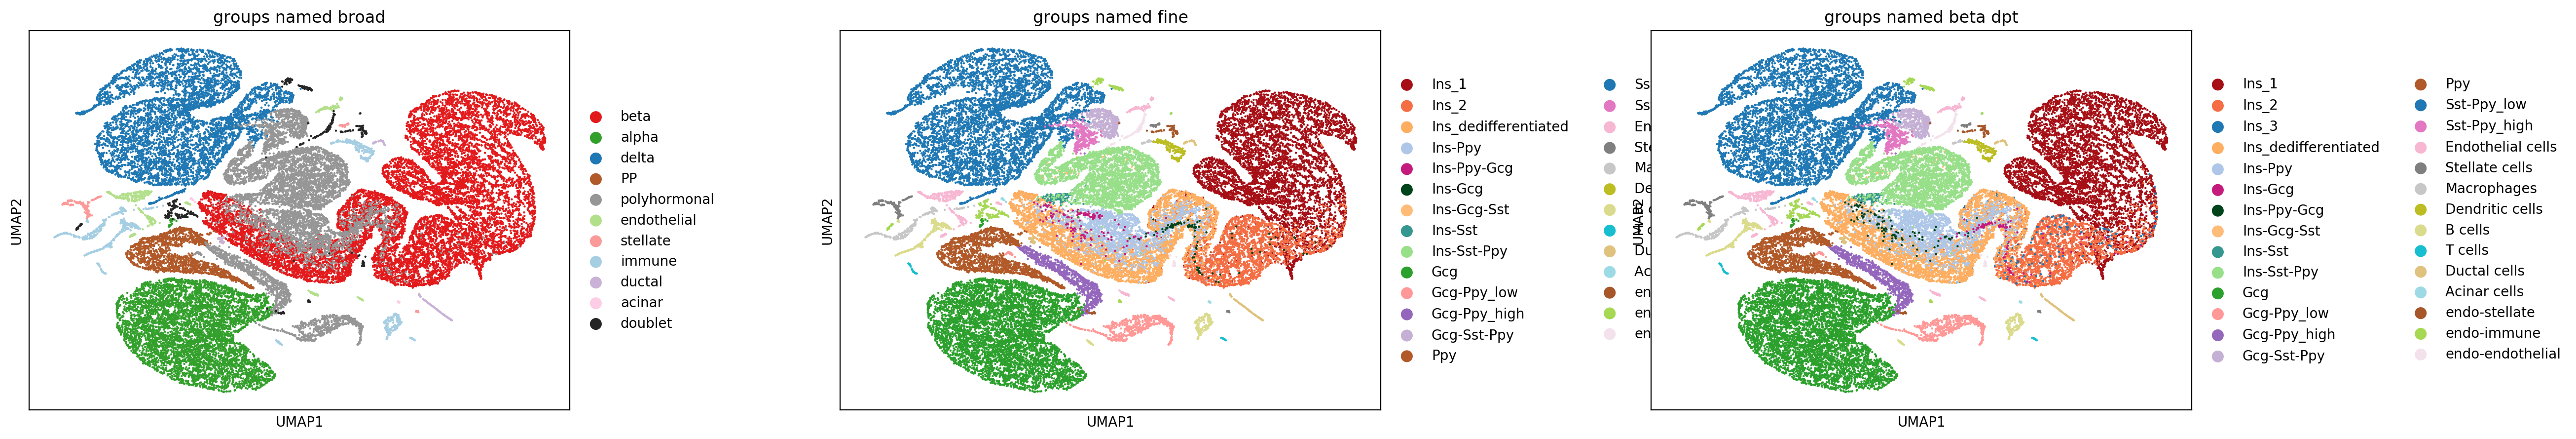

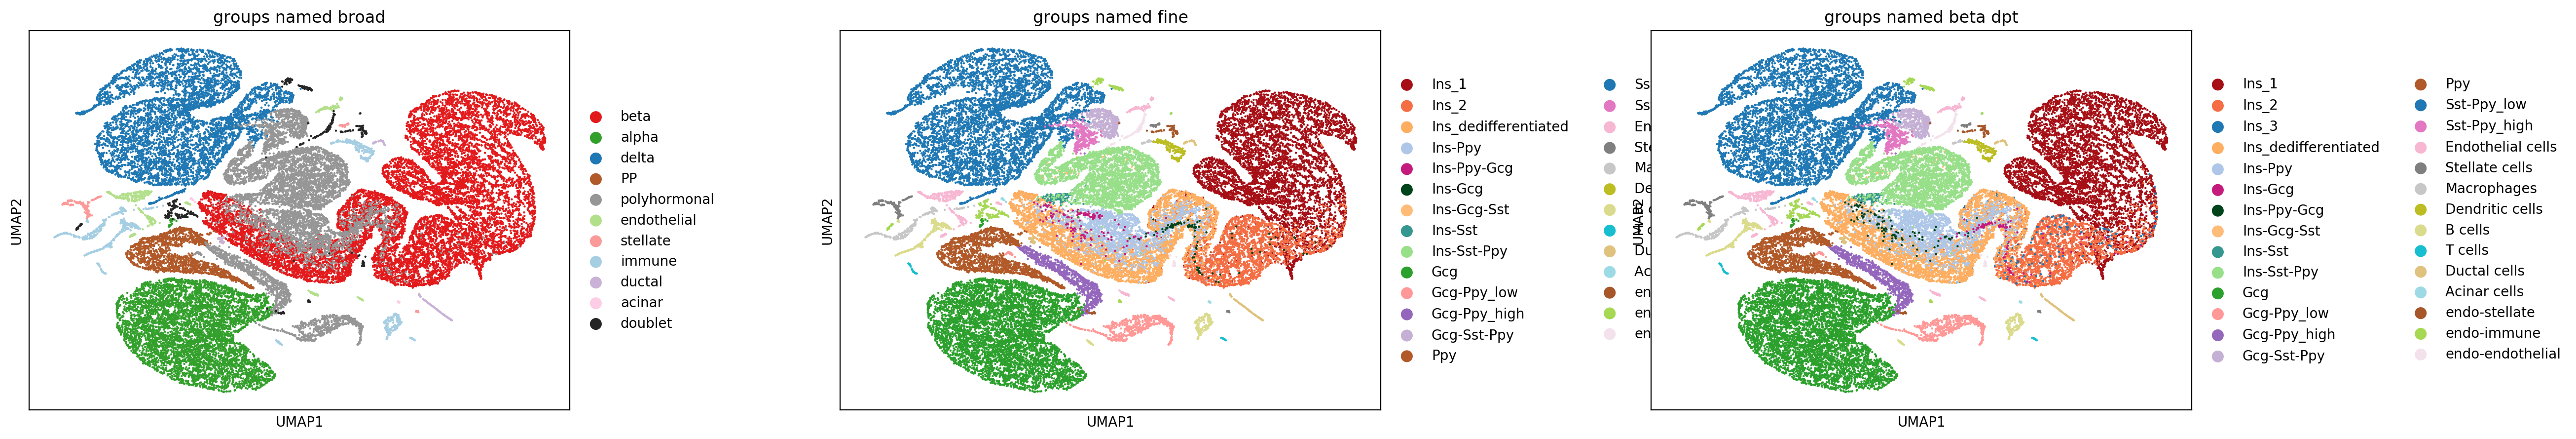

In [331]:
sc.pl.umap(adata_all_hvg,color=['groups_named_broad','groups_named_fine','groups_named_beta_dpt'],size=10)
sc.pl.umap(adata_all,color=['groups_named_broad','groups_named_fine','groups_named_beta_dpt'],size=10)


### Broad annotation split by condition

In [361]:
ix_ctrl= np.isin(adata_denoised.obs['treatment'],'Ctrl')
ix_stz= np.isin(adata_denoised.obs['treatment'],'Vehicle-STZ')
ix_est= np.isin(adata_denoised.obs['treatment'],'Estrogen')
ix_glp= np.isin(adata_denoised.obs['treatment'],'GLP1')
ix_glpest= np.isin(adata_denoised.obs['treatment'],'GLP1-E')
ix_ins= np.isin(adata_denoised.obs['treatment'],'PEG-insulin')
ix_insglpest= np.isin(adata_denoised.obs['treatment'],'GLP1-E + PEG-insulin')
x=adata_denoised.obs['groups_named_broad'].values.astype('str')

ix_ep=np.isin(x,'endothelial')
x[ix_ep]=['endo' for s in x[ix_ep]]
ix_ep=np.isin(x,'stellate')
x[ix_ep]=['stell' for s in x[ix_ep]]
ix_ep=np.isin(x,'polyhormonal')
x[ix_ep]=['poly' for s in x[ix_ep]]
ix_ep=np.isin(x,'doublet')
x[ix_ep]=['doub' for s in x[ix_ep]]


x[ix_ctrl]=[s + '_Ctrl' for s in x[ix_ctrl]]
x[ix_stz]=[s + '_STZ' for s in x[ix_stz]]
x[ix_est]=[s + '_Est' for s in x[ix_est]]
x[ix_glp]=[s + '_GLP1' for s in x[ix_glp]]
x[ix_glpest]=[s + '_GLP1E' for s in x[ix_glpest]]
x[ix_ins]=[s + '_Ins' for s in x[ix_ins]]
x[ix_insglpest]=[s + '_InsGLP1E' for s in x[ix_insglpest]]
ref_cluster=pd.Categorical(adata_denoised.obs['groups_named_broad'],
                           categories=['beta', 'alpha', 'delta', 'PP', 'polyhormonal', 'endothelial',
       'stellate', 'immune', 'ductal','acinar', 'alpha_Ctrl', 
       'beta_Ctrl', 'beta_Est', 'beta_GLP1', 'beta_GLP1E', 'beta_Ins',
       'beta_InsGLP1', 'beta_STZ','alpha_Est', 'alpha_GLP1',
       'alpha_GLP1E', 'alpha_Ins', 'alpha_InsGLP', 'alpha_STZ', 'delta_Ctrl', 'delta_Est',
       'delta_GLP1', 'delta_GLP1E', 'delta_Ins', 'delta_InsGLP',
       'delta_STZ','PP_Ctrl', 'PP_Est', 'PP_GLP1', 'PP_GLP1E', 'PP_Ins',
       'PP_InsGLP1E', 'PP_STZ', 'ductal_Ctrl', 'ductal_Est', 'ductal_GLP1',
       'ductal_GLP1E', 'ductal_Ins', 'ductal_InsGL', 'ductal_STZ',
       'endo_Ctrl', 'endo_Est', 'endo_GLP1', 'endo_GLP1E', 'endo_Ins',
       'endo_InsGLP1', 'endo_STZ', 'immune_Ctrl', 'immune_Est',
       'immune_GLP1', 'immune_GLP1E', 'immune_Ins', 'immune_InsGL',
       'immune_STZ', 'poly_Ctrl', 'poly_Est', 'poly_GLP1', 'poly_GLP1E',
       'poly_Ins', 'poly_InsGLP1', 'poly_STZ', 'stell_Ctrl', 'stell_Est',
       'stell_GLP1', 'stell_GLP1E', 'stell_Ins', 'stell_InsGLP',
       'stell_STZ','acinar_Est',
       'acinar_GLP1', 'acinar_GLP1E', 'acinar_InsGLP',
       'acinar_STZ','doub_Ctrl', 'doub_Est', 'doub_GLP1', 'doub_GLP1E',
       'doub_Ins', 'doub_InsGLP1', 'doub_STZ'])


ref_cluster=x




adata_all_hvg.obs['groups_named_broad_cond']=pd.Categorical(ref_cluster,categories=[ 
       'beta_Ctrl', 'beta_Est', 'beta_GLP1', 'beta_GLP1E', 'beta_Ins',
       'beta_InsGLP1', 'beta_STZ','alpha_Ctrl','alpha_Est', 'alpha_GLP1',
       'alpha_GLP1E', 'alpha_Ins', 'alpha_InsGLP', 'alpha_STZ', 'delta_Ctrl', 'delta_Est',
       'delta_GLP1', 'delta_GLP1E', 'delta_Ins', 'delta_InsGLP',
       'delta_STZ','PP_Ctrl', 'PP_Est', 'PP_GLP1', 'PP_GLP1E', 'PP_Ins',
       'PP_InsGLP1E', 'PP_STZ', 'ductal_Ctrl', 'ductal_Est', 'ductal_GLP1',
       'ductal_GLP1E', 'ductal_Ins', 'ductal_InsGL', 'ductal_STZ',
       'endo_Ctrl', 'endo_Est', 'endo_GLP1', 'endo_GLP1E', 'endo_Ins',
       'endo_InsGLP1', 'endo_STZ', 'immune_Ctrl', 'immune_Est',
       'immune_GLP1', 'immune_GLP1E', 'immune_Ins', 'immune_InsGL',
       'immune_STZ', 'poly_Ctrl', 'poly_Est', 'poly_GLP1', 'poly_GLP1E',
       'poly_Ins', 'poly_InsGLP1', 'poly_STZ', 'stell_Ctrl', 'stell_Est',
       'stell_GLP1', 'stell_GLP1E', 'stell_Ins', 'stell_InsGLP',
       'stell_STZ','acinar_Est',
       'acinar_GLP1', 'acinar_GLP1E','acinar_InsGLP',
       'acinar_STZ','doub_Ctrl', 'doub_Est', 'doub_GLP1', 'doub_GLP1E',
       'doub_Ins', 'doub_InsGLP1', 'doub_STZ'])

In [5]:
# pass annotation to other anndata
adata_all.obs['groups_named_broad_cond']=adata_all_hvg.obs['groups_named_broad_cond']

## Violin plots of marker genes used for annotation (selection)

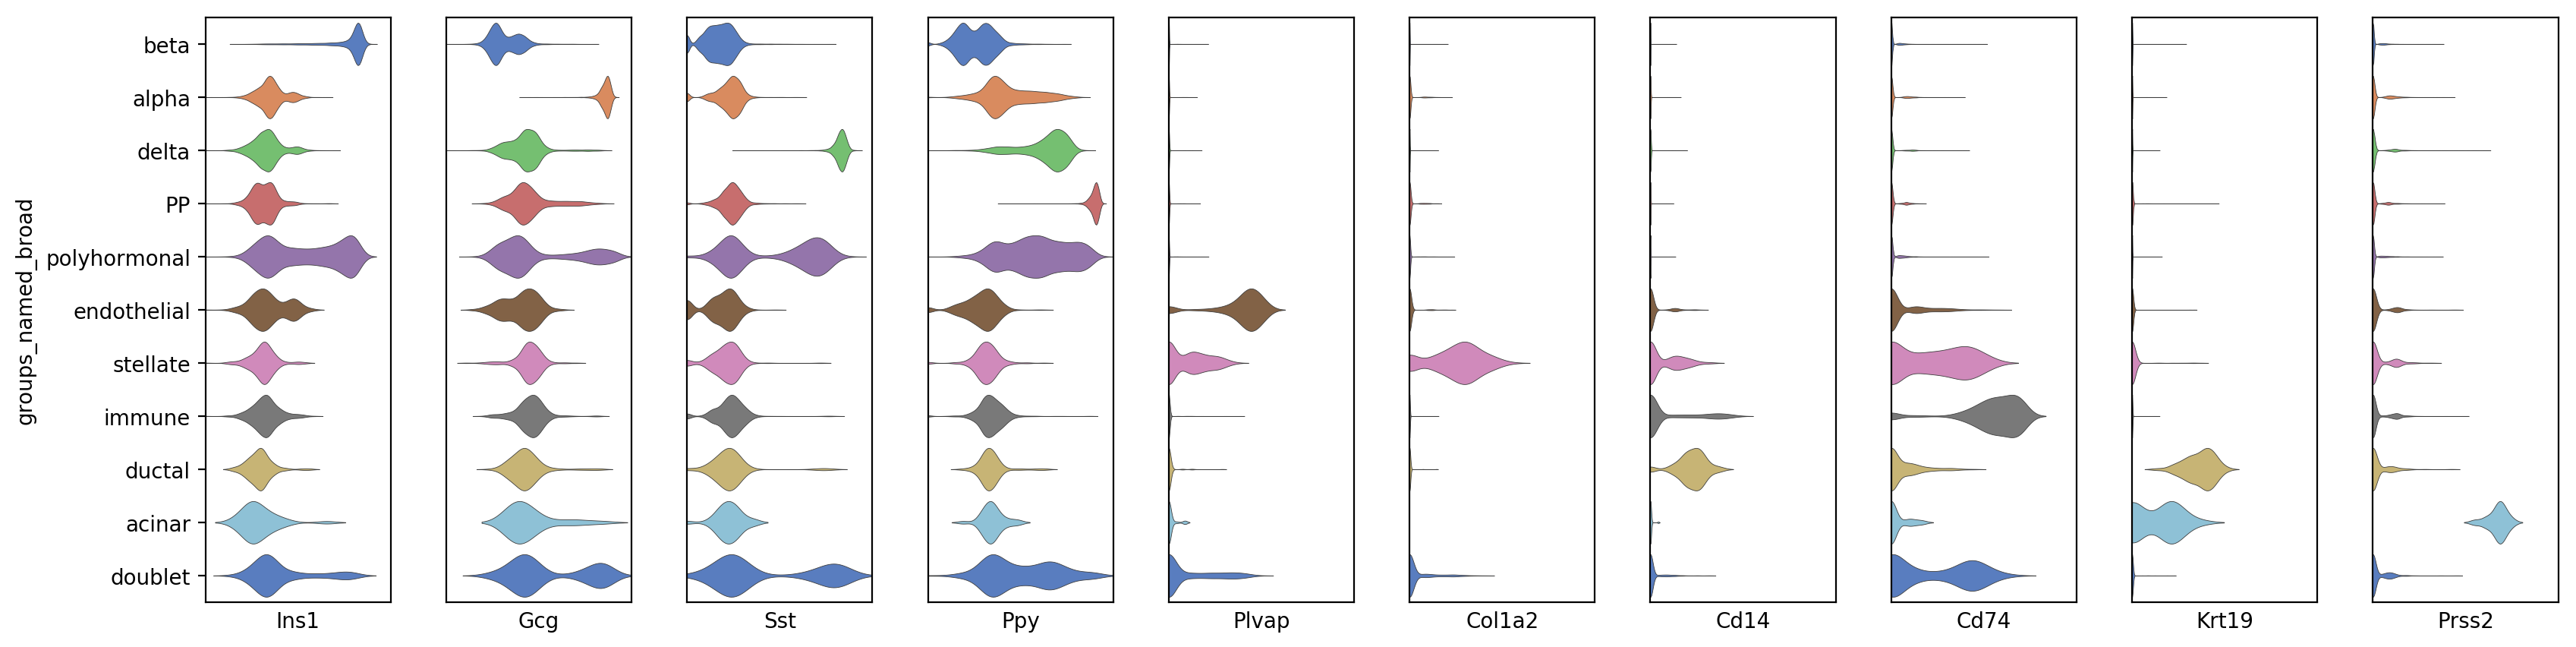

In [552]:
gene_names=['Ins1','Gcg','Sst','Ppy','Plvap','Col1a2','Cd14','Cd74','Krt19','Prss2']

adata_sub=adata_all.copy()

import seaborn as sns
rcParams['figure.figsize'] = (20, 5)
_, axs = pl.subplots(ncols=len(gene_names), gridspec_kw={'wspace': 0.3})

for i,gene in enumerate(gene_names):
    obs_df = adata_sub.obs
    X_col = pd.DataFrame({gene:np.array(adata_sub[:, gene].X)},index=obs_df.index)

    obs_df = pd.concat([obs_df, X_col],axis=1)
    
    sns.violinplot(y="groups_named_broad", x=gene, data=obs_df, palette="muted", split=True,scale='width',
                   ax=axs[i],inner=None,linewidth=0.3,color=adata_all_hvg.uns['groups_named_broad_colors'])
    
    if i not in [0]:
        axs[i].set_ylabel('')
        axs[i].get_yaxis().set_ticks([])
    axs[i].get_xaxis().set_ticks([])
    axs[i].grid(False)
    axs[i].set_xlim([0,10])
pl.show()


pl.rcParams.update(pl.rcParamsDefault)


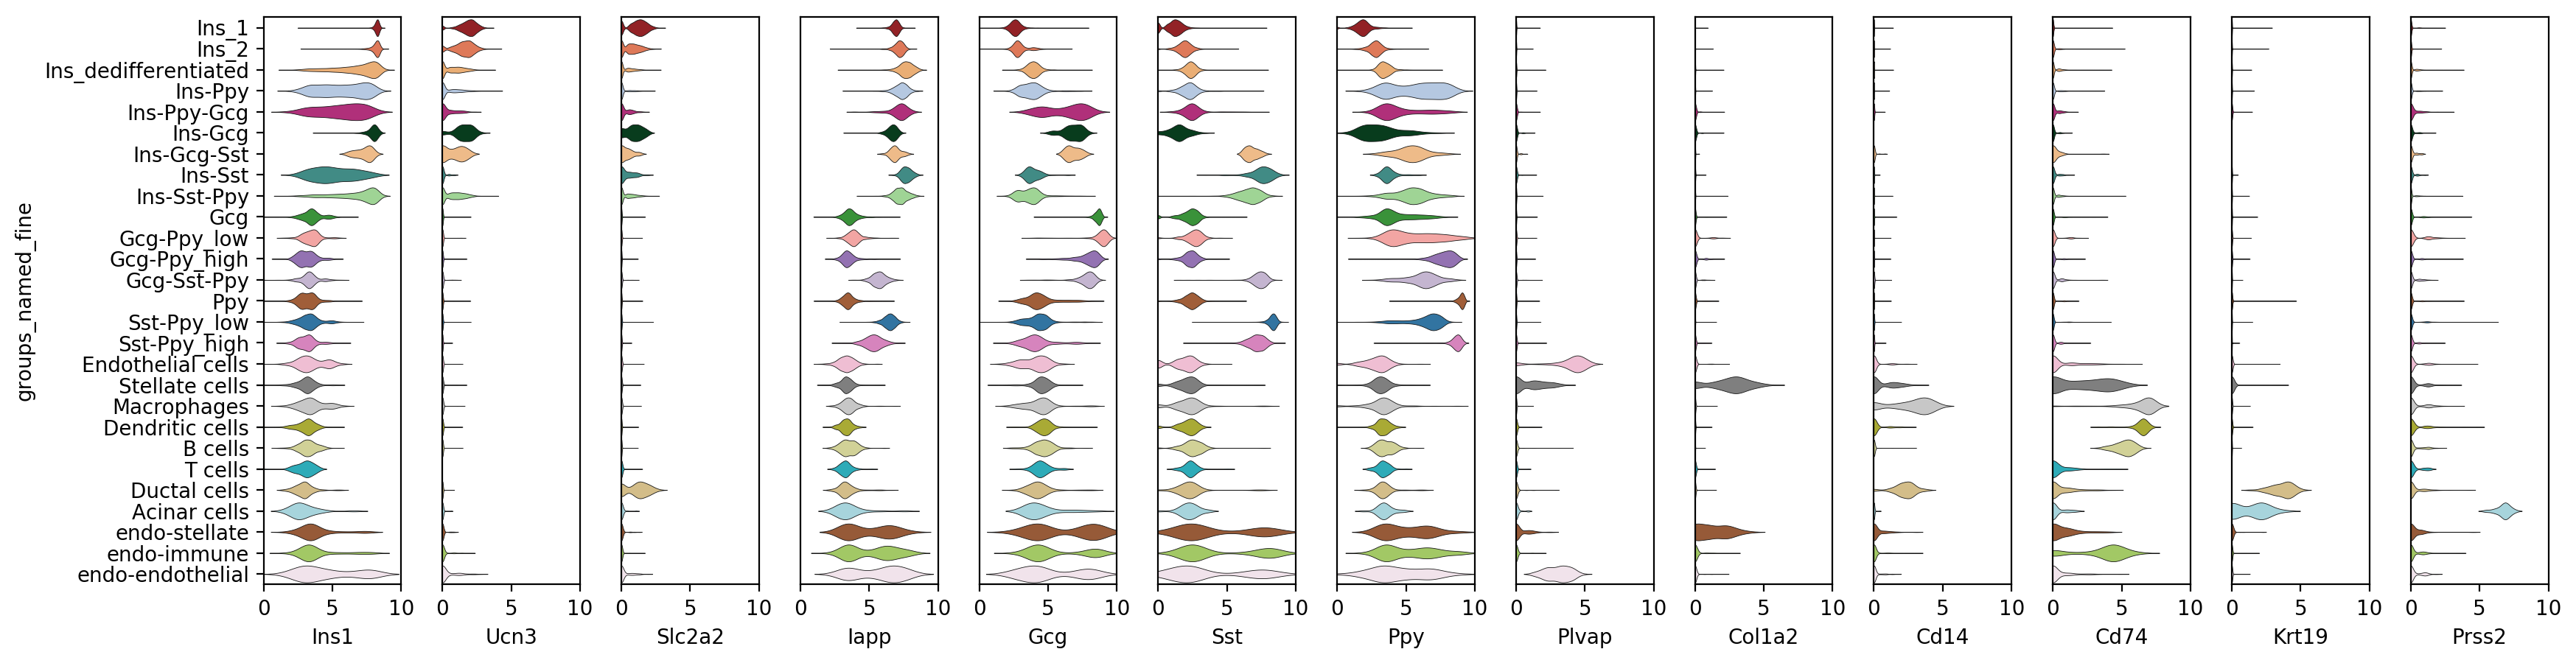

In [553]:
gene_names=['Ins1','Gcg','Sst','Ppy','Krt19','Prss2','Plvap','Col1a2','Cd14','Cd74','Cd86','Itgax','Iftim3','Adgre1','Cd79a','Cd79b','Cd8a','Cd3d']
adata_sub=adata_all.copy()


import seaborn as sns
rcParams['figure.figsize'] = (20, 5)
_, axs = pl.subplots(ncols=len(gene_names), gridspec_kw={'wspace': 0.3})

for i,gene in enumerate(gene_names):

    obs_df = adata_sub.obs
    X_col = pd.DataFrame({gene:np.array(adata_sub[:, gene].X)},index=obs_df.index)

    obs_df = pd.concat([obs_df, X_col],axis=1)
    sns.violinplot(y="groups_named_fine", x=gene, data=obs_df, palette=adata_all_hvg.uns['groups_named_fine_colors'], split=True,scale='width',
                   ax=axs[i],inner=None,linewidth=0.3)
        
    if i not in [0]:
        axs[i].set_ylabel('')
        axs[i].get_yaxis().set_ticks([])
    axs[i].grid(False)
    axs[i].set_xlim([0,10])
pl.show()


pl.rcParams.update(pl.rcParamsDefault)

## Population frequencies

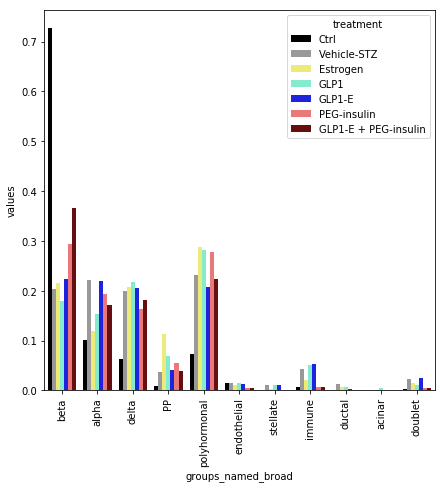

In [69]:
import seaborn as sns
group='groups_named_broad'
df=pd.crosstab(columns=adata_all_hvg.obs[group],index=adata_all_hvg.obs['treatment'],normalize='index')
df=df.unstack().reset_index()
df=pd.DataFrame(df.values,columns=[group,'treatment','values'])
rcParams['figure.figsize'] = (7, 7)
ax = sns.barplot(x=group,y='values', hue="treatment", data=df,order=adata_all_hvg.obs[group].cat.categories,
                    palette=adata_all_hvg.uns['treatment_colors'])

pl.xticks(rotation=90)
pl.show()
pl.rcParams.update(pl.rcParamsDefault)

In [ ]:
group='groups_named_fine'
df=pd.crosstab(columns=adata_denoised.obs[group],index=adata_denoised.obs['treatment'],normalize='index')
df=df.unstack().reset_index()
df=pd.DataFrame(df.values,columns=[group,'treatment','values'])
rcParams['figure.figsize'] = (7, 7)

ax = sns.barplot(x=group,y='values', hue="treatment", data=df,order=adata_denoised.obs[group].cat.categories,
                    palette=adata_denoised.uns['treatment_colors'])
pl.xticks(rotation=90)
pl.show()

pl.rcParams.update(pl.rcParamsDefault)

### write frequencies to file

In [217]:
writer = pd.ExcelWriter('./figures/Frequencies.xlsx', engine='xlsxwriter')
df=adata_denoised.obs
x=pd.DataFrame(df.groupby(['groups_named_fine','treatment'])['groups_named_fine'].size().unstack().fillna(0))
x.to_excel(writer,sheet_name='groups_fine_numbers')


In [218]:
x=pd.DataFrame(df.groupby(['groups_named_fine','treatment'])['groups_named_fine'].size().unstack().fillna(0)).transform(lambda x: x/sum(x))
x.to_excel(writer,sheet_name='groups_fine_frequencies')

In [219]:
x=pd.DataFrame(df.groupby(['groups_named_broad','treatment'])['groups_named_broad'].size().unstack().fillna(0))
x.to_excel(writer,sheet_name='groups_broad_numbers')
x=pd.DataFrame(df.groupby(['groups_named_broad','treatment'])['groups_named_broad'].size().unstack().fillna(0)).transform(lambda x: x/sum(x))
x.to_excel(writer,sheet_name='groups_broad_frequencies')

In [220]:
for i in adata_all.obs['treatment'].cat.categories:
    ix=np.isin(adata_all.obs['treatment'],[i])
    adata_sub=adata_all[ix].copy()
    df=adata_sub.obs
    x=pd.DataFrame(df.groupby(['groups_named_fine','proliferation_man'])['proliferation_man'].size().unstack().fillna(0)).transform(lambda x: x/sum(x),axis=1)
    x.to_excel(writer,sheet_name=i+'_cc_freq')
    x=pd.DataFrame(df.groupby(['groups_named_fine','proliferation_man'])['proliferation_man'].size().unstack().fillna(0))
    x.to_excel(writer,sheet_name=i+'_cc_numb')
    
writer.save()

## Cell cycle classification

In [ ]:
cell_cycle_genes = [x.strip() for x in open("./regev_lab_cell_cycle_genes_10X.txt")]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

sc.tl.score_genes_cell_cycle(adata_all, s_genes=s_genes, g2m_genes=g2m_genes)
ref_cluster = pd.Categorical(adata_all.obs['phase'],categories=['S','G2M','G1','Cycling','Non-Cycling'])

x = np.isin(adata_all.obs['phase'],'S')
ref_cluster[x] = 'Cycling'
x = np.isin(adata_all.obs['phase'],'G2M')
ref_cluster[x]='Cycling'
x = np.isin(adata_all.obs['phase'],'G1')
ref_cluster[x]='Non-Cycling'

adata_all.smp['proliferation'] = pd.Categorical(ref_cluster,categories=['Cycling','Non-Cycling'])


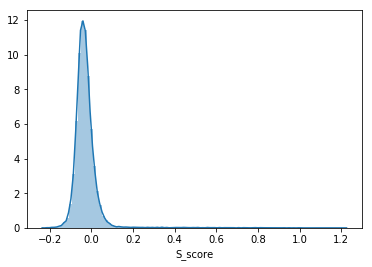

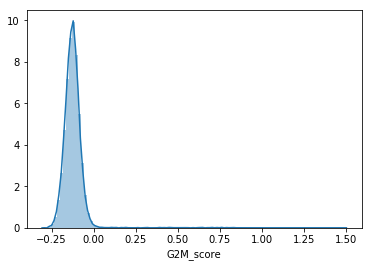

In [9]:
import seaborn as sns
sns.distplot(adata_all.obs['S_score'],bins=100)
pl.show()
sns.distplot(adata_all.obs['G2M_score'],bins=100)
pl.show()

In [ ]:
sc.pl.violin(adata_all,groupby='phase',keys='G2M_score')
sc.pl.violin(adata_all,groupby='phase',keys='S_score')

cell cycle classification based on threshold for S- and G2M score

In [ ]:
ref_cluster = pd.Categorical(adata_all.obs['phase'],categories=['S','G2M','G1','Cycling','Non-Cycling'])

x = adata_all.obs['S_score']<0
ref_cluster[x] = 'Non-Cycling'
x = adata_all.obs['G2M_score']<0
ref_cluster[x]='Non-Cycling'


x = adata_all.obs['S_score']>0.25
ref_cluster[x] = 'Cycling'

x = adata_all.obs['G2M_score']>0.25
ref_cluster[x]='Cycling'

adata_all.obs['proliferation_man'] = pd.Categorical(ref_cluster,categories=['Non-Cycling','Cycling'])
adata_all.uns['proliferation_man_colors']=['grey','red']

In [ ]:
sc.pl.umap(adata_all,color=['proliferation','proliferation_man'],size=10)
sc.pl.umap(adata_all,color=['S_score','G2M_score'],color_map='RdGy_r',size=50)

# Doublet identification and removal

## Calculate expected doublet frequencies

we first estimate the real population frequency of the endocrine cells considering only doublets (not triplets) and assuming a doublet rate of 10%. 

In [360]:
df=adata_all.obs
x=pd.DataFrame(df.groupby(['groups_named_broad','treatment'])['groups_named_broad'].size().unstack().fillna(0)).transform(lambda x: x/sum(x))

In [361]:
def pop_prob(d,p):
    ##d:doublet rate
    ##p:observed population frequency
    a = d
    b = (1-d)
    c = -p
    # Discriminent
    dis = (b**2) - (4*a*c)
    #x1 = (-b - np.sqrt(dis)) / (2 * a) #### negativ solution
    x2 = (-b + np.sqrt(dis)) / (2 * a)
    print(x2)
    return(x2)

In [362]:
p_beta=pop_prob(0.1,x[['Ctrl']].loc['beta'].values[0])
p_alpha=pop_prob(0.1,x[['Ctrl']].loc['alpha'].values[0])
p_delta=pop_prob(0.1,x[['Ctrl']].loc['delta'].values[0])
p_pp=pop_prob(0.1,x[['Ctrl']].loc['PP'].values[0])

0.7462107537466772
0.1103571349921012
0.069935359896377
0.00997581695765748


expected doublet frequencies

we then calculate the expected doublet rate for each combination of endocrine cells using the calculated real population frequencies

In [13]:
data=pd.DataFrame(index=['beta','alpha','delta','PP', 'Ins-Ppy',
                  'Ins-Ppy-Gcg', 'Ins-Gcg', 'Ins-Gcg-Sst', 'Ins-Sst-Ppy',
                  'Gcg-Ppy_low', 'Gcg-Ppy_high', 'Gcg-Sst-Ppy',
                  'Sst-Ppy_high'],columns=['actual size','expected doublet'])


In [53]:
writer = pd.ExcelWriter('./figures_paper/doublets_prediction.xlsx', engine='xlsxwriter')
df=adata_all.obs
x=pd.DataFrame(df.groupby(['groups_named_broad','treatment'])['groups_named_broad'].size().unstack().fillna(0)).transform(lambda x: x/sum(x))
x2=pd.DataFrame(df.groupby(['groups_named_fine','treatment'])['groups_named_fine'].size().unstack().fillna(0)).transform(lambda x: x/sum(x))

for treat in ['Ctrl', 'Vehicle-STZ', 'Estrogen', 'GLP1', 'GLP1-E', 'PEG-insulin',
       'GLP1-E + PEG-insulin']:
    
        data=pd.DataFrame(index=['beta','alpha','delta','PP', 'Ins-Ppy',
                  'Ins-Ppy-Gcg', 'Ins-Gcg', 'Ins-Gcg-Sst', 'Ins-Sst-Ppy',
                  'Gcg-Ppy_low', 'Gcg-Ppy_high', 'Gcg-Sst-Ppy',
                  'Sst-Ppy_high'],columns=['measured frequency','actual size','expected doublet'])
        data['measured frequency'][0:4]=x[[treat]].loc[data.index[0:4]].values[:,0]
        data['measured frequency'][4:13]=x2[[treat]].loc[data.index[4:13]].values[:,0]
        data.loc['beta']['actual size']=pop_prob(0.1,x[[treat]].loc['beta'].values[0])
        data.loc['alpha']['actual size']=pop_prob(0.1,x[[treat]].loc['alpha'].values[0])
        data.loc['delta']['actual size']=pop_prob(0.1,x[[treat]].loc['delta'].values[0])
        data.loc['PP']['actual size']=pop_prob(0.1,x[[treat]].loc['PP'].values[0])

        data.loc['Ins-Ppy']['expected doublet']=2*data.loc['beta']['actual size']*data.loc['PP']['actual size']*0.1
        data.loc['Ins-Gcg']['expected doublet']=2*data.loc['beta']['actual size']*data.loc['alpha']['actual size']*0.1
        data.loc['Ins-Sst-Ppy']['expected doublet']=2*data.loc['beta']['actual size']*data.loc['delta']['actual size']*0.1
        data.loc['Gcg-Ppy_low']['expected doublet']=2*data.loc['alpha']['actual size']*data.loc['PP']['actual size']*0.1
        data.loc['Gcg-Sst-Ppy']['expected doublet']=2*data.loc['alpha']['actual size']*data.loc['delta']['actual size']*0.1
        data.loc['Sst-Ppy_high']['expected doublet']=2*data.loc['delta']['actual size']*data.loc['PP']['actual size']*0.1
        
        
        data.to_excel(writer,sheet_name=treat)
writer.save()

0.7462107537466772
0.1103571349921012
0.069935359896377
0.00997581695765748
0.22053946312987682
0.24022720239022355
0.216555823692125
0.04120272776138856
0.23333379309617874
0.1309472518233168
0.22426120252874437
0.12409466226912524
0.19438324410706753
0.16734984067772185
0.23594460826842745
0.07600367465533497
0.24095212203788907
0.23833831807290873
0.22384912736744422
0.04419802736698508
0.31511405712103313
0.21003666864272186
0.17792811119630547
0.06136419427867301
0.38953394760796345
0.1863940162929556
0.19632565577745786
0.043791324869617565


we combine doublets of the same doublet contributors (Gcg-Ppy (low) and Gcg-Ppy (high)) and triplets

In [378]:
ref_clust=pd.Categorical(adata_all.obs['groups_named_fine'],categories=['Ins_1', 'Ins_2', 'Ins_dedifferentiated', 'Ins-Ppy', 'Ins-Ppy-Gcg',
       'Ins-Gcg', 'Ins-Gcg-Sst', 'Ins-Sst', 'Ins-Sst-Ppy', 'Gcg',
       'Gcg-Ppy_low', 'Gcg-Ppy_high', 'Gcg-Sst-Ppy', 'Ppy', 'Sst-Ppy_low',
       'Sst-Ppy_high', 'Endothelial cells', 'Stellate cells', 'Macrophages',
       'Dendritic cells', 'B cells', 'T cells', 'Ductal cells', 'Acinar cells',
       'endo-stellate', 'endo-immune', 'endo-endothelial','Ins','Gcg-Ppy','beta','alpha','delta','PP'])
ref_clust[ref_clust=='Ins_1']='beta'
ref_clust[ref_clust=='Ins_2']='beta'
ref_clust[ref_clust=='Ins_dedifferentiated']='beta'                        
ref_clust[ref_clust=='Sst-Ppy_low']='delta'
ref_clust[ref_clust=='Gcg']='alpha'
ref_clust[ref_clust=='Ppy']='PP'
ref_clust[ref_clust=='Ins-Ppy-Gcg']='Ins-Gcg'
ref_clust[ref_clust=='Gcg-Ppy_low']='Gcg-Ppy'
ref_clust[ref_clust=='Gcg-Ppy_high']='Gcg-Ppy'
adata_all.obs['groups_named_doublet']=ref_clust

In [369]:
data=pd.DataFrame(index=['beta','alpha','delta','PP', 'Ins-Ppy',
                  'Ins-Gcg', 'Ins-Gcg-Sst', 'Ins-Sst-Ppy',
                  'Gcg-Ppy', 'Gcg-Sst-Ppy',
                  'Sst-Ppy_high'],columns=['actual size','expected doublet'])

writer = pd.ExcelWriter('./figures_paper/doublets_prediction_combined.xlsx', engine='xlsxwriter')
df=adata_all.obs
x=pd.DataFrame(df.groupby(['groups_named_broad','treatment'])['groups_named_broad'].size().unstack().fillna(0)).transform(lambda x: x/sum(x))
x2=pd.DataFrame(df.groupby(['groups_named_doublet','treatment'])['groups_named_doublet'].size().unstack().fillna(0)).transform(lambda x: x/sum(x))

for treat in ['Ctrl', 'Vehicle-STZ', 'Estrogen', 'GLP1', 'GLP1-E', 'PEG-insulin',
       'GLP1-E + PEG-insulin']:
    
        data=pd.DataFrame(index=['beta','alpha','delta','PP', 'Ins-Ppy',
                  'Ins-Gcg', 'Ins-Gcg-Sst', 'Ins-Sst-Ppy',
                  'Gcg-Ppy', 'Gcg-Sst-Ppy',
                  'Sst-Ppy_high'],columns=['measured','actual size','expected'])
        data['measured'][0:4]=x[[treat]].loc[data.index[0:4]].values[:,0]
        data['measured'][4:11]=x2[[treat]].loc[data.index[4:11]].values[:,0]
        data.loc['beta']['actual size']=pop_prob(0.1,x[[treat]].loc['beta'].values[0])
        data.loc['alpha']['actual size']=pop_prob(0.1,x[[treat]].loc['alpha'].values[0])
        data.loc['delta']['actual size']=pop_prob(0.1,x[[treat]].loc['delta'].values[0])
        data.loc['PP']['actual size']=pop_prob(0.1,x[[treat]].loc['PP'].values[0])

        data.loc['Ins-Ppy']['expected']=2*data.loc['beta']['actual size']*data.loc['PP']['actual size']*0.1
        data.loc['Ins-Gcg']['expected']=2*data.loc['beta']['actual size']*data.loc['alpha']['actual size']*0.1
        data.loc['Ins-Sst-Ppy']['expected']=2*data.loc['beta']['actual size']*data.loc['delta']['actual size']*0.1
        data.loc['Gcg-Ppy']['expected']=2*data.loc['alpha']['actual size']*data.loc['PP']['actual size']*0.1
        data.loc['Gcg-Sst-Ppy']['expected']=2*data.loc['alpha']['actual size']*data.loc['delta']['actual size']*0.1
        data.loc['Sst-Ppy_high']['expected']=2*data.loc['delta']['actual size']*data.loc['PP']['actual size']*0.1
        
        
        data.to_excel(writer,sheet_name=treat)
writer.save()

0.7462107537466772
0.1103571349921012
0.069935359896377
0.00997581695765748
0.22053946312987682
0.24022720239022355
0.216555823692125
0.04120272776138856
0.23333379309617874
0.1309472518233168
0.22426120252874437
0.12409466226912524
0.19438324410706753
0.16734984067772185
0.23594460826842745
0.07600367465533497
0.24095212203788907
0.23833831807290873
0.22384912736744422
0.04419802736698508
0.31511405712103313
0.21003666864272186
0.17792811119630547
0.06136419427867301
0.38953394760796345
0.1863940162929556
0.19632565577745786
0.043791324869617565


/Users/sophie/miniconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/sophie/miniconda3/lib/python3.5/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	center left
	center
	best
	center right
	upper right
	upper left
	lower left
	right
	lower right
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes)))


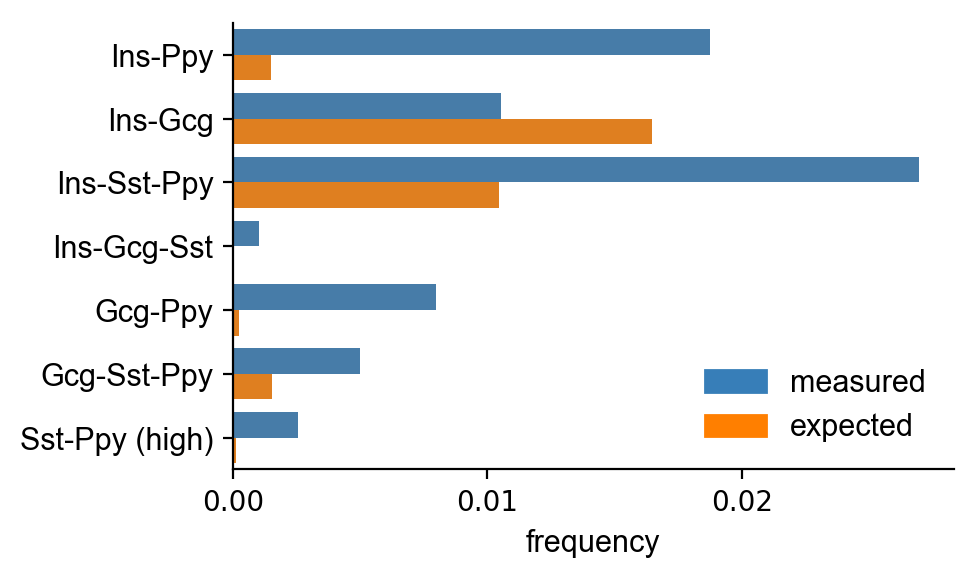

In [549]:
from matplotlib.patches import Patch
import matplotlib.font_manager as font_manager
labels=['Ins-Ppy','Ins-Gcg','Ins-Sst-Ppy','Ins-Gcg-Sst','Gcg-Ppy','Gcg-Sst-Ppy','Sst-Ppy (high)']
for treat in ['Ctrl']:
    df=pd.read_excel('./figures_paper/doublets_prediction_combined.xlsx',
                     sheet_name=treat)
    df=df.reset_index()
    df=df.drop(['actual size'],axis=1)
    df=df.melt(id_vars=['index'])
    df.columns=['cluster','frequency','value']
    #df.columns(['louvain_groups','groups','values'])
    rcParams['figure.figsize'] = (5,3)
    
    ax = sns.barplot(x='value',y='cluster', hue='frequency',orient='horizontal',data=df,order=['Ins-Ppy','Ins-Gcg','Ins-Sst-Ppy',
                                                                         'Ins-Gcg-Sst','Gcg-Ppy',
                                                                         'Gcg-Sst-Ppy','Sst-Ppy_high'],palette=['#377eb8','#ff7f00'],alpha=1)
    
    ax.xaxis.set_tick_params(bottom='on', top='off')
    ax.yaxis.set_tick_params(left='on', right='off')    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    ax.set_yticklabels(labels,**csfont,fontsize=11)
    legend_elements = [Patch(facecolor='#377eb8', edgecolor='#377eb8',
                         label='measured'),
                   Patch(facecolor='#ff7f00', edgecolor='#ff7f00',
                         label='expected')]

    font = font_manager.FontProperties(family='Arial',
                                   style='normal', size=11)

    ax.legend(handles=legend_elements, loc='bottom right',prop=font,frameon=False)
    pl.title(treat)
    pl.xticks([0,0.01,0.02],rotation=0)
    pl.ylabel('')
    pl.xlabel('frequency',**csfont,fontsize=11)
    pl.title('')
    pl.tight_layout()
    pl.savefig('./figures/expected_doublet_'+treat+'_new.pdf')

    pl.show()

pl.rcParams.update(pl.rcParamsDefault)

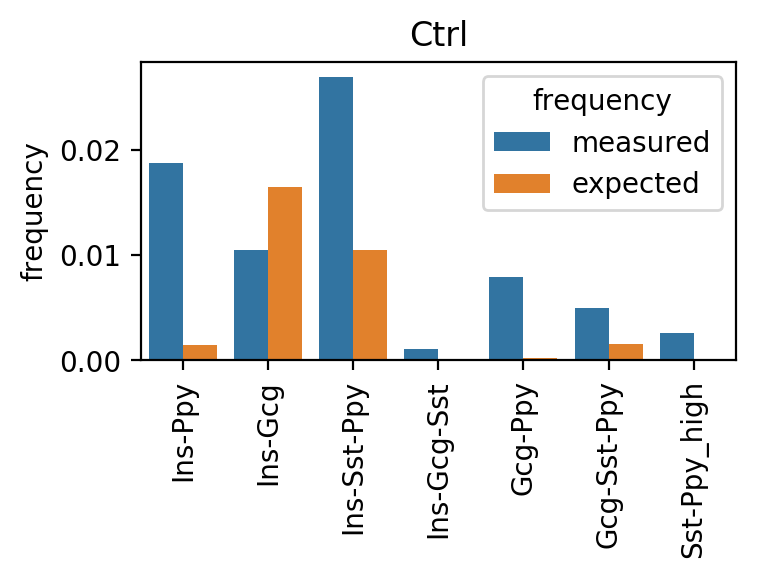

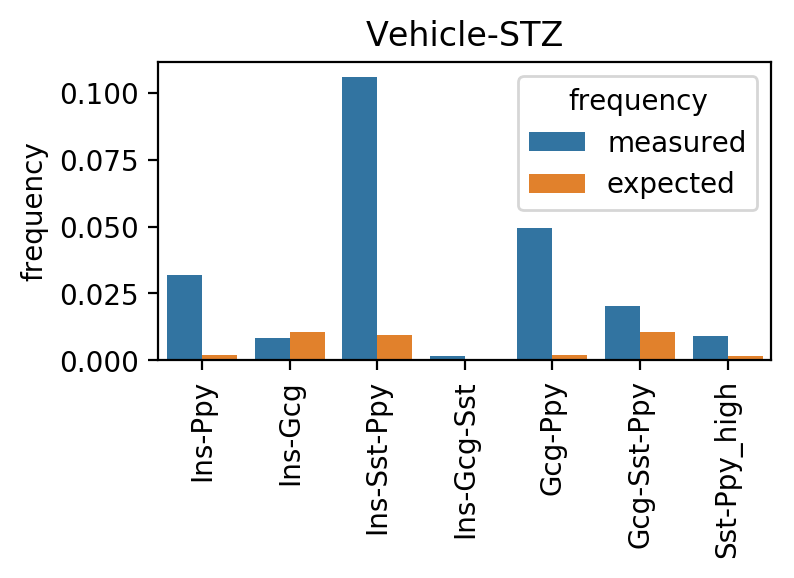

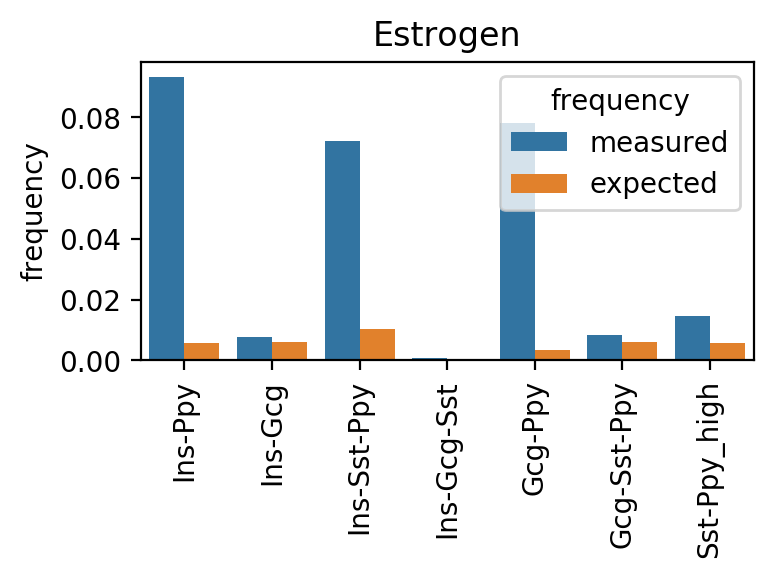

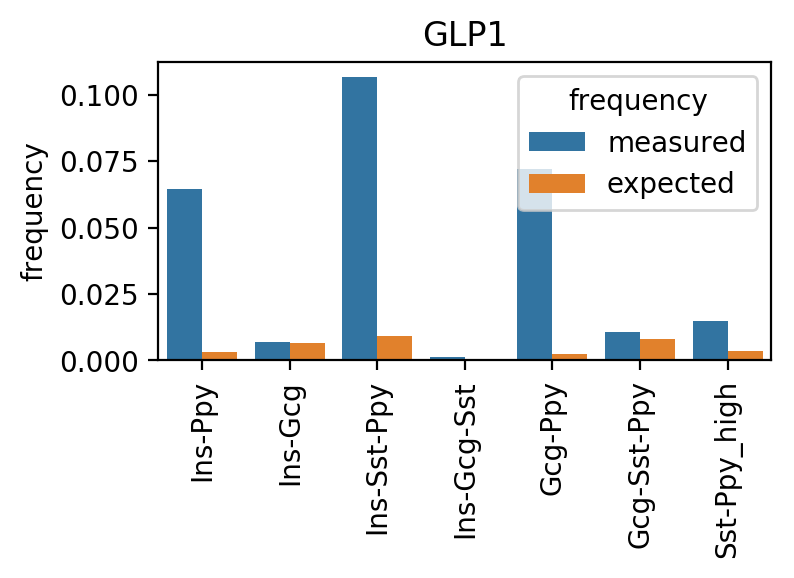

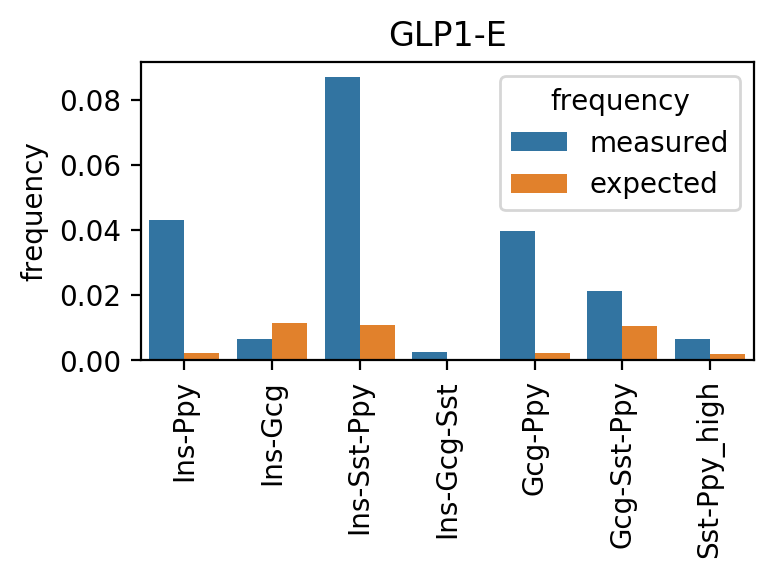

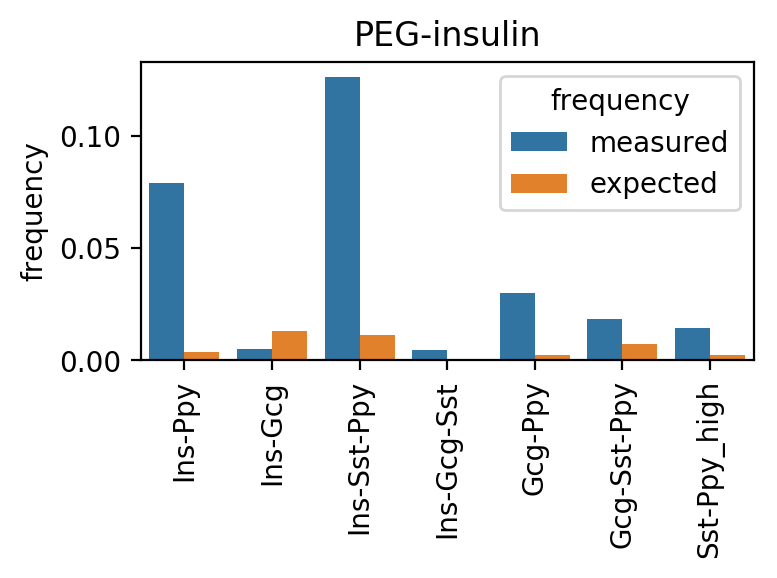

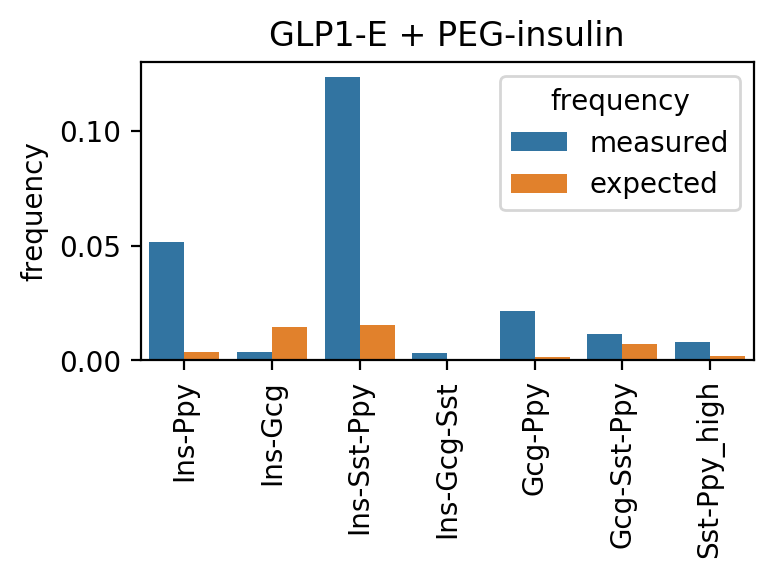

In [409]:
for treat in ['Ctrl', 'Vehicle-STZ', 'Estrogen', 'GLP1', 'GLP1-E', 'PEG-insulin',
       'GLP1-E + PEG-insulin']:
    df=pd.read_excel('./figures_paper/doublets_prediction_combined.xlsx',
                     sheet_name=treat)
    df=df.reset_index()
    df=df.drop(['actual size'],axis=1)
    df=df.melt(id_vars=['index'])
    df.columns=['cluster','frequency','value']
    #df.columns(['louvain_groups','groups','values'])
    rcParams['figure.figsize'] = (4,3)
    
    ax = sns.barplot(x='cluster',y='value', hue='frequency',data=df,order=['Ins-Ppy','Ins-Gcg','Ins-Sst-Ppy',
                                                                         'Ins-Gcg-Sst','Gcg-Ppy',
                                                                         'Gcg-Sst-Ppy','Sst-Ppy_high'])
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    pl.title(treat)
    pl.xticks(rotation=90)
    pl.xlabel('')
    pl.ylabel('frequency')
    pl.tight_layout()
    pl.savefig('./figures/expected_doublet_'+treat+'.pdf')

    pl.show()

pl.rcParams.update(pl.rcParamsDefault)

## Calculate doublet scores

### Scrublet

In [178]:
path = './data/'
group='G1'
adata_G1 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G1.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G1.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G1.var_names_make_unique()
y=adata_G1.obs_names
y_new=y+'_G1'
adata_G1.obs_names=y_new
adata_G1_sub=adata_G1[np.isin(adata_G1.obs_names,adata_cd_hvg.obs_names)].copy()

AnnData object with n_obs × n_vars = 7790 × 27998 

In [191]:
# filtering/preprocessing parameters:
min_counts = 2
min_cells = 3
vscore_percentile = 85
n_pc = 30

# doublet detector parameters:
expected_doublet_rate = 0.08 
sim_doublet_ratio = 3
#n_neighbors = 25
n_neighbors = 50

t0 = time.time()

scrublet_results = scr.compute_doublet_scores(
    adata_G1_sub.X, 
    min_counts = min_counts, 
    min_cells = min_cells, 
    vscore_percentile = vscore_percentile, 
    n_prin_comps = n_pc,
    scaling_method = 'zscore',
    expected_doublet_rate = expected_doublet_rate,
    sim_doublet_ratio = sim_doublet_ratio,
    n_neighbors = n_neighbors, 
    use_approx_neighbors = True, 
    get_doublet_neighbor_parents = False
)


t1 = time.time()
print('Elapsed time: {:.1f} seconds'.format(t1 - t0))

Converting to scipy.sparse.csc_matrix
Simulating doublets
Total counts normalizing
Finding highly variable genes
Filtering genes from 27998 to 2225
Applying z-score normalization
Running PCA
Building kNN graph and calculating doublet scores
Elapsed time: 30.1 seconds


In [189]:
embedding = adata_cd_hvg.obsm['X_umap']

299/7788 = 3.8% of cells are predicted doublets.
31.0% of doublets are predicted to be detectable.
Predicted overall doublet rate = 12.4%


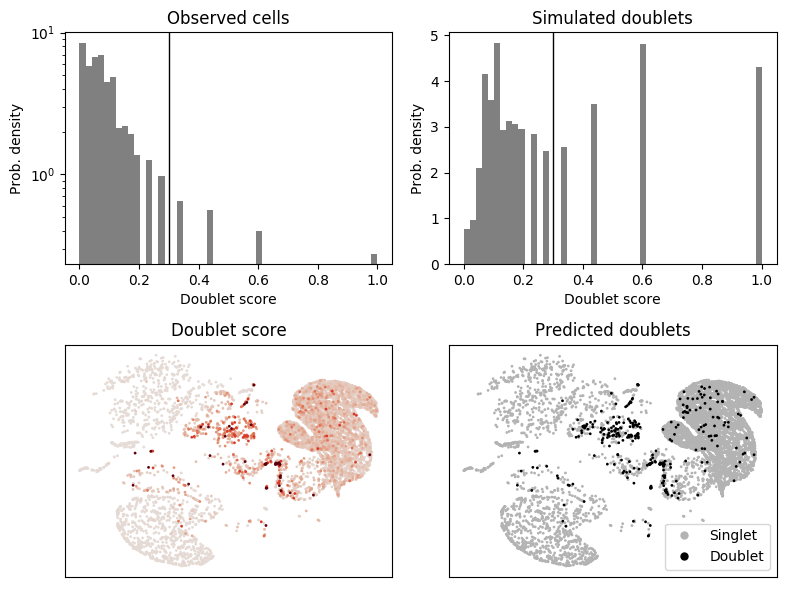

In [190]:
score_threshold = 0.3

fig, axs = scr.plot_scrublet_results(embedding, 
                                     scrublet_results['doublet_scores_observed_cells'], 
                                     scrublet_results['doublet_scores_simulated_doublets'], 
                                     score_threshold, 
                                     order_points = True, 
                                     marker_size = 4)

pl.show()

In [37]:
path = './data/'
group='G2'
adata_G2 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G2.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G2.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G2.var_names_make_unique()

... reading from cache file ./cache/Users-sophie-Documents-ICB-Projects-2018_10X_Glp_Est_Mice-data-G2-filtered_gene_bc_matrices-mm10-matrix.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [38]:

ix=np.isin(adata_all_hvg.obs['treatment'],['Vehicle-STZ'])

adata_stz_hvg=adata_all_hvg[ix]
y=adata_G2.obs_names
y_new=y+'_G2'
adata_G2.obs_names=y_new
adata_G2_sub=adata_G2[np.isin(adata_G2.obs_names,adata_stz_hvg.obs_names)].copy()


In [84]:
# filtering/preprocessing parameters:
min_counts = 2
min_cells = 3
vscore_percentile = 85
n_pc = 30

# doublet detector parameters:
expected_doublet_rate = 0.06 
sim_doublet_ratio = 3
#n_neighbors = 25
n_neighbors = 50

t0 = time.time()

scrublet_results = scr.compute_doublet_scores(
    adata_G2_sub.X, 
    min_counts = min_counts, 
    min_cells = min_cells, 
    vscore_percentile = vscore_percentile, 
    n_prin_comps = n_pc,
    scaling_method = 'zscore',
    expected_doublet_rate = expected_doublet_rate,
    sim_doublet_ratio = sim_doublet_ratio,
    n_neighbors = n_neighbors, 
    use_approx_neighbors = True, 
    get_doublet_neighbor_parents = False
)


t1 = time.time()
print('Elapsed time: {:.1f} seconds'.format(t1 - t0))

Converting to scipy.sparse.csc_matrix
Simulating doublets
Total counts normalizing
Finding highly variable genes
Filtering genes from 27998 to 2619
Applying z-score normalization
Running PCA
Building kNN graph and calculating doublet scores
Elapsed time: 28.2 seconds


In [85]:
embedding = adata_stz_hvg.obsm['X_umap']

109/5852 = 1.9% of cells are predicted doublets.
21.5% of doublets are predicted to be detectable.
Predicted overall doublet rate = 8.7%


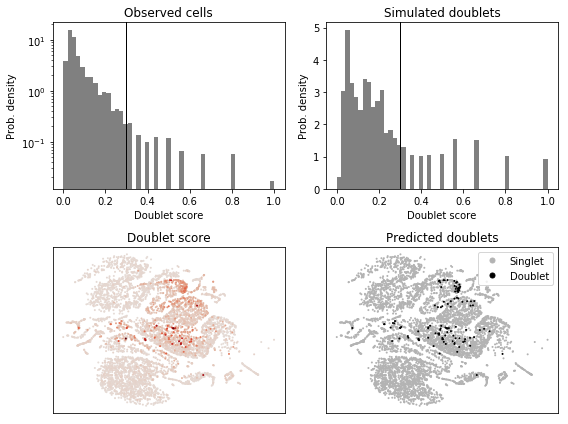

In [86]:

score_threshold = 0.3
fig, axs = scr.plot_scrublet_results(embedding, 
                                     scrublet_results['doublet_scores_observed_cells'], 
                                     scrublet_results['doublet_scores_simulated_doublets'], 
                                     score_threshold, 
                                     order_points = True, 
                                     marker_size = 4)

pl.show()

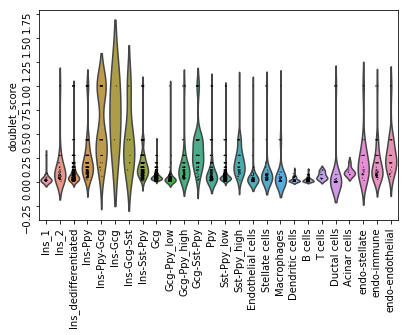

In [40]:
adata_stz_hvg.obs['doublet_score']=scrublet_results['doublet_scores_observed_cells']
sc.pl.violin(adata_stz_hvg,groupby='groups_named_fine_new_2',keys='doublet_score',rotation=90)

In [88]:
path = './data/'
group='G8'
adata_G8 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G8.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G8.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G8.var_names_make_unique()

... reading from cache file ./cache/Users-sophie-Documents-ICB-Projects-2018_10X_Glp_Est_Mice-data-G8-filtered_gene_bc_matrices-mm10-matrix.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [89]:
ix=np.isin(adata_all_hvg.obs['treatment'],['GLP1-E + PEG-insulin'])

adata_glpestins_hvg=adata_all_hvg[ix]

y=adata_G8.obs_names
y_new=y+'_G8'
adata_G8.obs_names=y_new
adata_G8_sub=adata_G8[np.isin(adata_G8.obs_names,adata_glpestins_hvg.obs_names)].copy()

In [90]:
# filtering/preprocessing parameters:
min_counts = 2
min_cells = 3
vscore_percentile = 85
n_pc = 30

# doublet detector parameters:
expected_doublet_rate = 0.05
sim_doublet_ratio = 3
#n_neighbors = 25
n_neighbors=50
t0 = time.time()

scrublet_results = scr.compute_doublet_scores(
    adata_G8_sub.X, 
    min_counts = min_counts, 
    min_cells = min_cells, 
    vscore_percentile = vscore_percentile, 
    n_prin_comps = n_pc,
    scaling_method = 'zscore',
    expected_doublet_rate = expected_doublet_rate,
    sim_doublet_ratio = sim_doublet_ratio,
    n_neighbors = n_neighbors, 
    use_approx_neighbors = True, 
    get_doublet_neighbor_parents = False
)


t1 = time.time()
print('Elapsed time: {:.1f} seconds'.format(t1 - t0))

Converting to scipy.sparse.csc_matrix
Simulating doublets
Total counts normalizing
Finding highly variable genes
Filtering genes from 27998 to 2047
Applying z-score normalization
Running PCA
Building kNN graph and calculating doublet scores
Elapsed time: 13.3 seconds


39/3434 = 1.1% of cells are predicted doublets.
16.3% of doublets are predicted to be detectable.
Predicted overall doublet rate = 7.0%


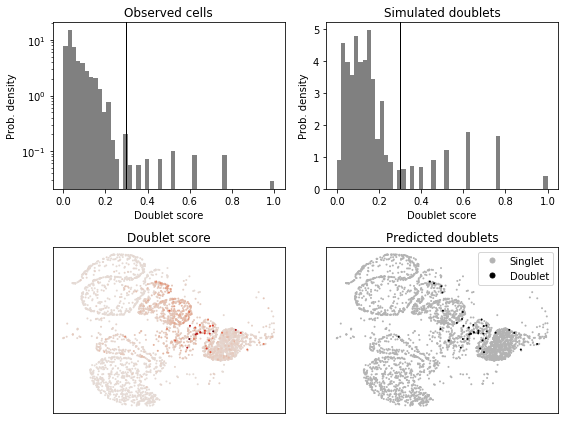

In [91]:
embedding = adata_glpestins_hvg.obsm['X_umap']
score_threshold = 0.3

fig, axs = scr.plot_scrublet_results(embedding, 
                                     scrublet_results['doublet_scores_observed_cells'], 
                                     scrublet_results['doublet_scores_simulated_doublets'], 
                                     score_threshold, 
                                     order_points = True, 
                                     marker_size = 4)

pl.show()

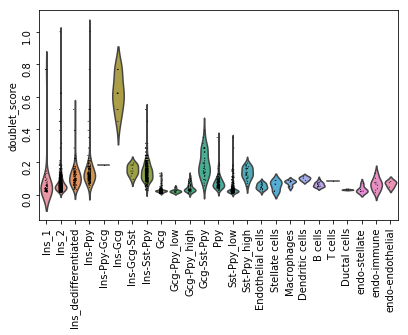

In [92]:
adata_glpestins_hvg.obs['doublet_score']=scrublet_results['doublet_scores_observed_cells']
sc.pl.violin(adata_glpestins_hvg,groupby='groups_named_fine_new_2',keys='doublet_score',rotation=90)

In [50]:
adata_all_hvg.obs['groups'].cat.categories

Index(['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G8'], dtype='object')

In [93]:
group='G5'
adata_G5 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G5.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G5.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G5.var_names_make_unique()


ix=np.isin(adata_all_hvg.obs['treatment'],['Estrogen'])

adata_est_hvg=adata_all_hvg[ix]

y=adata_G5.obs_names
y_new=y+'_G5'
adata_G5.obs_names=y_new
adata_G5_sub=adata_G5[np.isin(adata_G5.obs_names,adata_est_hvg.obs_names)].copy()


... reading from cache file ./cache/Users-sophie-Documents-ICB-Projects-2018_10X_Glp_Est_Mice-data-G5-filtered_gene_bc_matrices-mm10-matrix.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Converting to scipy.sparse.csc_matrix
Simulating doublets
Total counts normalizing
Finding highly variable genes
Filtering genes from 27998 to 2396
Applying z-score normalization
Running PCA
Building kNN graph and calculating doublet scores
Elapsed time: 22.6 seconds
114/5361 = 2.1% of cells are predicted doublets.
19.6% of doublets are predicted to be detectable.
Predicted overall doublet rate = 10.9%


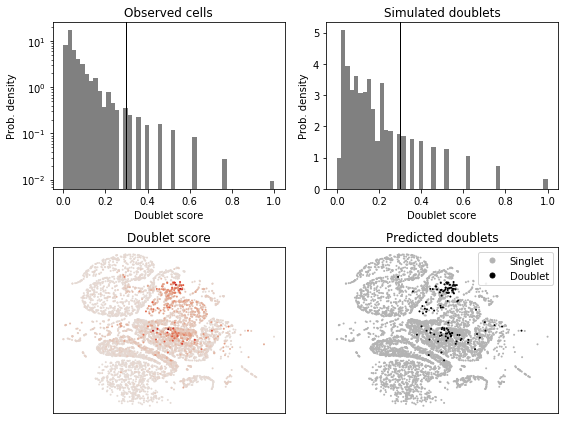

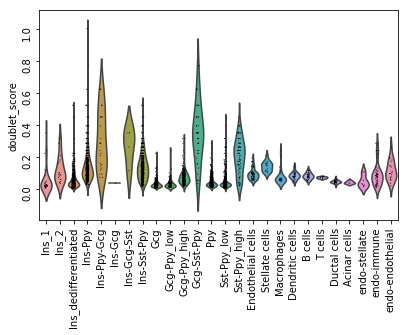

In [94]:

# filtering/preprocessing parameters:
min_counts = 2
min_cells = 3
vscore_percentile = 85
n_pc = 30

# doublet detector parameters:
expected_doublet_rate = 0.05
sim_doublet_ratio = 3
#n_neighbors = 25
n_neighbors=50

t0 = time.time()

scrublet_results = scr.compute_doublet_scores(
    adata_G5_sub.X, 
    min_counts = min_counts, 
    min_cells = min_cells, 
    vscore_percentile = vscore_percentile, 
    n_prin_comps = n_pc,
    scaling_method = 'zscore',
    expected_doublet_rate = expected_doublet_rate,
    sim_doublet_ratio = sim_doublet_ratio,
    n_neighbors = n_neighbors, 
    use_approx_neighbors = True, 
    get_doublet_neighbor_parents = False
)


t1 = time.time()
print('Elapsed time: {:.1f} seconds'.format(t1 - t0))
embedding = adata_est_hvg.obsm['X_umap']
score_threshold = 0.3

fig, axs = scr.plot_scrublet_results(embedding, 
                                     scrublet_results['doublet_scores_observed_cells'], 
                                     scrublet_results['doublet_scores_simulated_doublets'], 
                                     score_threshold, 
                                     order_points = True, 
                                     marker_size = 4)

pl.show()

adata_est_hvg.obs['doublet_score']=scrublet_results['doublet_scores_observed_cells']
sc.pl.violin(adata_est_hvg,groupby='groups_named_fine_new_2',keys='doublet_score',rotation=90)

Index(['Ctrl', 'Vehicle-STZ', 'Estrogen', 'GLP1', 'GLP1-E', 'PEG-insulin',
       'GLP1-E + PEG-insulin'],
      dtype='object')

In [95]:
group='G3'
adata_G3 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G3.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G3.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G3.var_names_make_unique()


ix=np.isin(adata_all_hvg.obs['treatment'],['PEG-insulin'])

adata_ins_hvg=adata_all_hvg[ix]

y=adata_G3.obs_names
y_new=y+'_G3'
adata_G3.obs_names=y_new
adata_G3_sub=adata_G3[np.isin(adata_G3.obs_names,adata_ins_hvg.obs_names)].copy()


... reading from cache file ./cache/Users-sophie-Documents-ICB-Projects-2018_10X_Glp_Est_Mice-data-G3-filtered_gene_bc_matrices-mm10-matrix.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Converting to scipy.sparse.csc_matrix
Simulating doublets
Total counts normalizing
Finding highly variable genes
Filtering genes from 27998 to 2028
Applying z-score normalization
Running PCA
Building kNN graph and calculating doublet scores
Elapsed time: 14.6 seconds
38/3417 = 1.1% of cells are predicted doublets.
16.0% of doublets are predicted to be detectable.
Predicted overall doublet rate = 7.0%


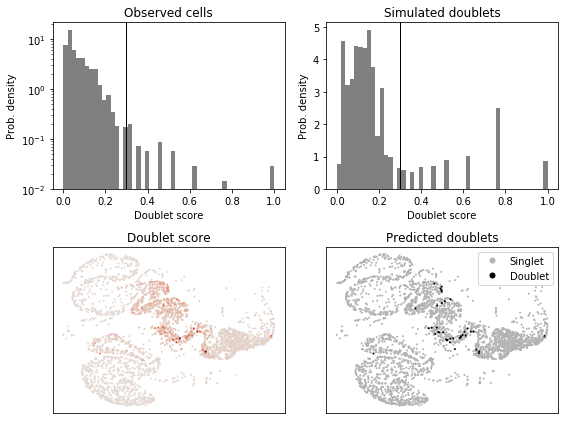

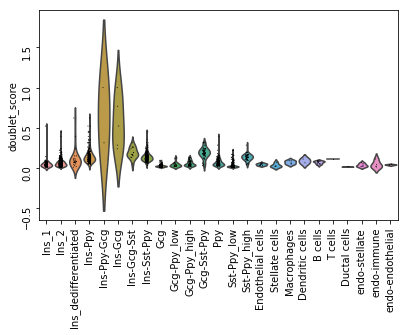

In [96]:

# filtering/preprocessing parameters:
min_counts = 2
min_cells = 3
vscore_percentile = 85
n_pc = 30

# doublet detector parameters:
expected_doublet_rate = 0.05
sim_doublet_ratio = 3
#n_neighbors = 25
n_neighbors=50

t0 = time.time()

scrublet_results = scr.compute_doublet_scores(
    adata_G3_sub.X, 
    min_counts = min_counts, 
    min_cells = min_cells, 
    vscore_percentile = vscore_percentile, 
    n_prin_comps = n_pc,
    scaling_method = 'zscore',
    expected_doublet_rate = expected_doublet_rate,
    sim_doublet_ratio = sim_doublet_ratio,
    n_neighbors = n_neighbors, 
    use_approx_neighbors = True, 
    get_doublet_neighbor_parents = False
)


t1 = time.time()
print('Elapsed time: {:.1f} seconds'.format(t1 - t0))
embedding = adata_ins_hvg.obsm['X_umap']
score_threshold = 0.3

fig, axs = scr.plot_scrublet_results(embedding, 
                                     scrublet_results['doublet_scores_observed_cells'], 
                                     scrublet_results['doublet_scores_simulated_doublets'], 
                                     score_threshold, 
                                     order_points = True, 
                                     marker_size = 4)

pl.show()

adata_ins_hvg.obs['doublet_score']=scrublet_results['doublet_scores_observed_cells']
sc.pl.violin(adata_ins_hvg,groupby='groups_named_fine_new_2',keys='doublet_score',rotation=90)

In [97]:
group='G4'
adata_G4 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G4.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G4.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G4.var_names_make_unique()


ix=np.isin(adata_all_hvg.obs['treatment'],['GLP1'])

adata_glp_hvg=adata_all_hvg[ix]

y=adata_G4.obs_names
y_new=y+'_G4'
adata_G4.obs_names=y_new
adata_G4_sub=adata_G4[np.isin(adata_G4.obs_names,adata_glp_hvg.obs_names)].copy()

... reading from cache file ./cache/Users-sophie-Documents-ICB-Projects-2018_10X_Glp_Est_Mice-data-G4-filtered_gene_bc_matrices-mm10-matrix.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Converting to scipy.sparse.csc_matrix
Simulating doublets
Total counts normalizing
Finding highly variable genes
Filtering genes from 27998 to 2463
Applying z-score normalization
Running PCA
Building kNN graph and calculating doublet scores
Elapsed time: 17.7 seconds
66/4465 = 1.5% of cells are predicted doublets.
16.8% of doublets are predicted to be detectable.
Predicted overall doublet rate = 8.8%


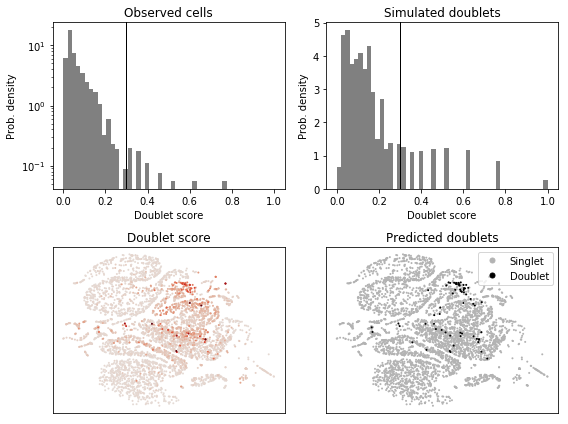

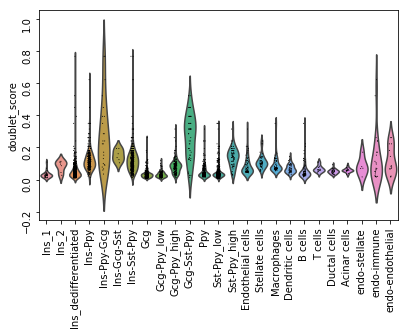

In [98]:

# filtering/preprocessing parameters:
min_counts = 2
min_cells = 3
vscore_percentile = 85
n_pc = 30

# doublet detector parameters:
expected_doublet_rate = 0.05
sim_doublet_ratio = 3
#n_neighbors = 25
n_neighbors=50

t0 = time.time()

scrublet_results = scr.compute_doubledata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAjgAAAGoCAYAAABL+58oAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3XmcXXV9//HX595Z7iyZPZNlkiFAFkkgREggVCsolMWC9lGpiGhLq1LbYmnrhj/4/RAVxT5s3RWjWHBBpGgtIApYWdQaMIEEEkIgZF9nJrPe2Wfu5/fHOTPcTGa5M5mZO3Pn/Xw87oN7z/q5N3M+fM73+z3nmLsjIiIikkki6Q5AREREZLypwBEREZGMowJHREREMo4KHBEREck4KnBEREQk46jAERERkYyjAkcGZWafNLMfpDuO0TCza83st+O8zQvMbH/S591mdtF47kNkqjKza8zs0Qna9l1m9pmJ2PYg+xpVbhiv43yk72hmbmaLT3Q/MjgVODNUeMC/YGZtZnbYzL5pZiXpjktEJpeZvdHM/tfMmsys3sx+Z2ZrANz9h+5+8RSI8Qkze3+640iXgSdakhoVODOQmX0Y+DzwUaAYWAucBDxmZjmTGEfWZO1LRI5nZkXAQ8BXgTKgCrgV6ExnXCLjQQXODBMmtFuBD7n7L9292913A+8EFgHvSVo8ZmY/NrMWM3vWzM5M2s7HzexAOG+7mV0YTo+Y2Y1m9qqZHTWz+8ysLJy3KGySfZ+Z7QV+bWa/MLPrB8S42cz+PHz/OjN7LDyz3G5m70xartzMHjCzZjN7Bjh1hO/ed6baaGb7zOzacHqumX3BzPaa2REzu8PM8lL4Lc8xsw3h/o+Y2b+PtI7IFLMUwN1/5O697t7u7o+6+/NwfNdOePz+vZm9Eh77nzazU8Pjqjk83nMGWzdp/eO6ZMys1MweMrNaM2sI3y8I590G/DHwNTOLm9nXwunjmRvea2Z7wpx104B5uWb2JTM7GL6+ZGa5o/iOFWGcLWb2pJmdNEQMg+YhMysAfgHMD79/3MzmK/+MTAXOzPNHQAz4afJEd48DDwN/kjT57cB/EpzZ3QP8zMyyzWwZcD2wxt1nAZcAu8N1PgT8GXA+MB9oAL4+IIbzgdPC9X4EXN03w8yWE7Qm/Tw8sB8L910JvAv4RrgM4XY7gHnA34SvQYVJ5RcEZ6qzgVXApnD27QSJfhWwmOAs9v8Nta0kXwa+7O5FBAn0vhTWEZlKXgZ6zexuM7vMzEpTWOcS4GyClt+PAesITowWAqeTdDyPQgT4D4JjvxpoB74G4O43Ab8Brnf3Qne/fpxzw3Lgm8B7CXJWObAgaZGbwu+6CjgTOAe4eRTf7Rrg00AFQc754RDLDZqH3L0VuAw4GH7/Qnc/iPLPiFTgzDwVQJ279wwy71A4v89Gd7/f3buBfycojNYCvUAusNzMst19t7u/Gq7zQeAmd9/v7p3AJ4Er7djuqE+6e6u7twP/BaxKOqu5BvhpuO7lwG53/w9373H354CfAH9hZlHgHYQJwN23AHcP873fDfwqPFPtdvej7r7JzAy4Dvhnd6939xbgswQJcyTdwGIzq3D3uLuvT2EdkSnD3ZuBNwIOfBuoDVs+5gyz2r+6e7O7bwW2AI+6+053byI4iXj9GOI46u4/cfe28Bi8jeBEaCjjmRuuBB5y96fCvPN/gUTS/GuAT7l7jbvXErSAv3cUX+/nSdu+CTjPzBYmLzDGPKT8MwIVODNPHUGT6WDjX+aF8/vs63vj7glgPzDf3XcA/0RQvNSY2b1mNj9c9CTgv8JuoEZgG0FBNGeI7bYAP+e1A/lqXjvDOQk4t29b4fauAeYStMJkJW8L2DPM914IvDrI9NlAPrAxaR+/DKeP5H0EZ1wvmdkfzOzyFNYRmVLcfZu7X+vuCwhaYOYDXxpmlSNJ79sH+Vw42hjMLN/MvhV2EzUDTwElYbEymPHMDfM5Nie1AkcHzE9ef084LVXJ244D9YOsP5Y8pPwzAhU4M8/vCQYQ/nnyRDMrJGgG/Z+kyQuT5kcImm0PArj7Pe7+RoJE4wSDliE4mC9z95KkV8zdDyRtd+Aj7H8EXG1m5xG0Ej2etK0nB2yr0N3/DqgFepJjJGjaHso+Bu+HryNIyiuS9lHs7iMmaXd/xd2vJmgi/zxwf9h0LjItuftLwF0Ehc6JaiX4nzYAZjZ3mGU/DCwDzg27XN7Ut1pfaAOWH8/ccIhjc10+QTdVn4MEeS55WwfD96l8x+RtFxJ0+R8csMxIeWjg91f+SYEKnBkmbEa+FfiqmV0ajqlZRNB/ux/4ftLiZ5vZn4etPf9EUBitN7NlZvaWcKBdB8GB2dekewdwW1+Xk5nNNrO3jxDWwwQJ5FPAj8PWIgiu7lgaDgDMDl9rzOw0d+8lGEf0yfDsbznwV8Ps44fARWb2TjPLCgchrgr39W3gi2ZWGcZcZWaXjBAzZvYeM5sdbqMxnJwYbh2RqcSCgbofttcG9C4kaEUdj+6OzcAKM1tlZjGCFt+hzCLII40WXJRwy4D5R4BTkj6PZ264H7jcgosQcgjyUPL/G38E3BzmsgqC8Xl99whL5Tu+NWnbnwbWu3ty6xIp5KEjQLmZFfeto/wzMhU4M5C7/yvwf4AvAM3A0wRnRBeG/cR9/hu4imCg8HuBPw/H4+QSDIirAw4TnEF8Ilzny8ADwKNm1kKQKM8dIZ5OgoR0EcGgwb7pLcDFBN1XB8N9fT7cPwQDnQvD6XcRDFIcah97gbcSnCnWEwz267sq7OPADoLirRn4FcHZ5EguBbaaWTz83u8KxxWJTBctBMfn02bWSnC8biE4Tk6Iu79MUCz8CngFGO5Ge18C8ghyynqC7plkXyYYy9dgZl8Z59ywFfgHgtxziCDfJd9z5jPABuB54AXg2XBaqt/xHoKCrZ5gcPZ7BlkGhslDYcvaj4CdYRfWfJR/RmTux7V8iYiIiExrasERERGRjKM7yYrIjGBmuwm6ZHqBHndfnd6IRGQiqcARkZnkze5eN/JiIjLdqYtKREREMk5GDjKuqKjwRYsWpTuMKW3jxo2cffbZ6Q5DZqCNGzfWuXsqN1IcV2a2i+AKGQe+5e7rhlpWOSQ1yiOSDqnmkIwscFavXu0bNmxIdxhTmpmRif/2MvWZ2cZ0jH8xsyp3PxDeZ+QxggfOPpU0/zqC2+VTXV199p49w938VkB5RNIj1RyiLioRmRH67qbt7jUEz0A7Z8D8de6+2t1Xz5496Q1MIjLOVOCISMYzswIzm9X3nuAmcVvSG5WITCRdRSUiM8EcgofAQpD37nH3gXfLFZEMklEFjpldAVyxePHidIciIlOIu+/ktUdziMgMkFFdVO7+oLtfV1xcPPLCIiIikrEyqsARERERgQzrohoPt9566zGfb7nlljRFIiKZYGBOAeUVkcmgFhwRERHJOCpwREREJOOowBEREZGMowJHREREMo4GGYuIjKPBBhWLyORTC46IiIhkHBU4IiIiknFU4IiIiEjGUYEjIiIiGUcFjoiIiGQcFTgiIiKScaZ8gWNmp5jZnWZ2f7pjERERkekhLQWOmX3XzGrMbMuA6Zea2XYz22FmNwK4+053f1864hQREZHpKV0tOHcBlyZPMLMo8HXgMmA5cLWZLZ/80ERERGS6S0uB4+5PAfUDJp8D7AhbbLqAe4G3p7pNM7vOzDaY2Yba2tpxjFZERESmm6n0qIYqYF/S5/3AuWZWDtwGvN7MPuHunxtsZXdfB6wDWL16tU90sCIi6TTwkRC33HJLmiIRmZqmUoEzKHc/Cnww3XGIiIjI9DGVrqI6ACxM+rwgnJYyM7vCzNY1NTWNa2AiIiIyvUylAucPwBIzO9nMcoB3AQ+MZgPu/qC7X1dcXDwhAYqIiMj0kK7LxH8E/B5YZmb7zex97t4DXA88AmwD7nP3remIT0RERKa3tIzBcferh5j+MPDwWLdrZlcAVyxevHismxAREZEMMJW6qE6YuqhEREQEpsFVVOmmSzFFMkN4M9ENwAF3vzzd8QxnYN4B5R6R0cqoFhwRkWHcQDC+T0RmgIwqcHSZuIgMxswWAH8KfCfdsYjI5MioAkdjcERkCF8CPgYkhlpAj3sRySwZVeCIiAxkZpcDNe6+cbjl3H2du69299WzZ8+epOhEZKLM6EHGgw3kE5GM8wbgbWb2ViAGFJnZD9z9PWmOS0QmUEYVOLoPjogM5O6fAD4BYGYXAB+ZasWNTrZExl9GdVFpDI6IiIhAhrXgiIgMx92fAJ5IcxgiMgkyqgVHREREBDKswNF9cERERAQyrIvK3R8EHly9evUH0h2LiMhQNKhYZOJlVAuOiIiICGRYC85k0MM3RUREpj614IiIiEjGUYEjIiIiGSejuqh0J2MRyVQamCwyOhnVgqM7GYuIiAhkWIEjIiIiAipwREREJANl1BicdBisX1yXjouIiKTXiC04ZlY+GYGIiIxE+UhEUpVKF9V6M/tPM3urmdmERyQiMjTlIxFJSSoFzlJgHfBe4BUz+6yZLZ3YsEREBqV8JCIpGbHA8cBj7n418AHgr4BnzOxJMztvwiMcBT1NXCSzTad8JCLpldIYHDO7wcw2AB8BPgRUAB8G7png+EZF98ERyWzTKR+JSHqlchXV74HvA3/m7vuTpm8wszsmJiwRkUEpH4lISlIZg3Ozu386OZmY2V8AuPvnJywyEZHjKR+JSEpSKXBuHGTaJ8Y7EBGRFCgfiUhKhuyiMrPLgLcCVWb2laRZRUDPRAc2nQ28+Z9u/CdyYpSPRGS0hhuDcxDYALwN2Jg0vQX454kMSkRkAOUjERmVIQscd98MbDazH7q7zpBEJG2Uj0RktIbrorrP3d8JPGdmnjyL4HYUKyc8OhERlI9EZPSG66K6Ifzv5ZMRiIjIME4oH5lZDHgKyCXIe/e7uwbHiWSwIa+icvdD4ds6YJ+77yFIDmcS9IdPObqTsUhmGod81Am8xd3PBFYBl5rZ2gkJVkSmhFQuE38KiJlZFfAowTNg7prIoMZKdzIWyXhjykfhIx7i4cfs8OXDrCIi01wqdzI2d28zs/cB33D3fzWzTRMdWCbRZeMi42bM+cjMogRXYC0Gvu7uTw+Yfx1wHUB1dfU4hy0iky2VFhwLH2J3DfDzcFp04kISERnSmPORu/e6+ypgAXCOmZ0+YP46d1/t7qtnz549rkGLyORLpcC5geBOof/l7lvN7BTg8YkNS0RkUCecj9y9MVzn0gmIT0SmiBG7qNz9KYJ+777PO4F/nMigMt3ALitQt5VIKsaaj8xsNtDt7o1mlgf8CZBRz65SV7jIsUYscMxsKfARYFHy8u7+lokLS0TkeCeQj+YBd4fjcCLAfe7+0ETFKSLpl8og4/8E7gC+A/RObDgiIsMaUz5y9+eB109UUCIy9aRS4PS4+zcnPBIRkZEpH4lISlIZZPygmf29mc0zs7K+14RHJiJyPOUjEUlJKi04fxX+96NJ0xw4ZfzDEREZlvKRiKQklauoTp6MQERERqJ8JCKpSuUqqnzgX4Bqd7/OzJYAy3QFgohMNuWjE6NLyWUmSWUMzn8AXcAfhZ8PAJ+ZsIhERIamfCQiKUmlwDnV3f8V6AZw9zbAJjQqEZHBKR+JSEpSGWTcFd750wHM7FSgc0KjSmJmBcA3CM7annD3H07WvkVkyklrPhKR6SOVFpxbgF8CC83sh8D/AB87kZ2a2XfNrMbMtgyYfqmZbTezHWZ2Yzj5z4H73f0DwNtOZL8iMu2Nez4SkcyUylVUj5nZs8BagqbgG9y97gT3exfwNeB7fRPCW6h/neAZMfuBP5jZAwRP/n0hXCxj76SswX8iI5ugfCQiGWjIAsfMzhow6VD432ozq3b3Z8e6U3d/yswWDZh8DrAjfHgeZnYv8HaCYmcBsInUWpxEJMNMZD4Skcw0XAvOv4X/jQGrgc0EZ0wrgQ3AeeMcSxWwL+nzfuBc4CvA18zsT4EHh1rZzK4DrgOorq4e59BEJM0mOx+JyDQ3ZIHj7m8GMLOfAme5+wvh59OBT05KdEEcrcBfp7DcOmAdwOrVq32i4xKRyTNV8pGITB+pdPks60smAO6+BThtAmI5ACxM+rwgnJYyM7vCzNY1NTWNa2AiMmVMVj4SkWkulQLneTP7jpldEL6+DTw/AbH8AVhiZiebWQ7wLuCB0WzA3R909+uKi4snIDwRmQImKx+JyDSXSoHz18BW4Ibw9SIpdBkNx8x+BPweWGZm+83sfe7eA1wPPAJsA+5z960nsh8RyTjjno9EJDOlcpl4B/DF8DUu3P3qIaY/DDw81u2a2RXAFYsXLx7rJkRkCpuIfCQimSmjLrtWF5WIiIhAhhU4IiIiIqACR0RERDLQmAqc8KZ6U44uExeZeaZqPhKR9BprC46NaxTjRGNwRGakKZmPRCS9xlTguPu3xjsQEZGxUD4SkcGMWOCYWbmZfdXMnjWzjWb2ZTMrn4zgRESSKR+JSKpGvA8OcC/wFPCO8PM1wI+BiyYqqLHK5Pvg3HrrrcdNu+WWW9IQiUhajSkfmdlC4HvAHMCBde7+5QmMU0TSLJUuqnnu/ml33xW+PkOQJKYcjcERyXhjzUc9wIfdfTmwFvgHM1s+oZGKSFqlUuA8ambvMrNI+HonweMUREQm25jykbsfcvdnw/ctBI+DqZrgWEUkjYbsojKzFoKmXAP+CfhBOCsCxIGPTHh0IiKMbz4ys0XA64GnB0y/DrgOoLq6+kRDFpE0G7LAcfdZkxmIiMhQxisfmVkh8BPgn9y9ecA+1gHrAFavXu3jsT8RSZ9UBhljZm8D3hR+fMLdH5q4kMYukwcZi0hgrPnIzLIJipsfuvtPJyo+EZkaUrlM/HbgBuDF8HWDmX1uogMbCw0yFslsY81HZmbAncA2d//3iY1SRKaCVFpw3gqscvcEgJndDTwHfGIiAxMRGcRY89EbgPcCL5jZpnDa/3H3hycsUhFJq5S6qIASoD58r+YREUmnUecjd/8teqSDyIySSoHzOeA5M3ucIEG8CbhxQqMSERmc8pGIpGTYAifst/4twY2x1oSTP+7uhyc6sLHQIGORzDXd8pGIpNewg4zd3YGHw5tkPRC+pmwy0SBjkcw13fKRiKRXKncyftbM1oy8mIjIhFM+EpGUpDIG51zgPWa2G2gl6Pd2d185kYGJiAxC+UhEUpJKgXPJhEchIpIa5SMRSclwz6KKAR8EFgMvAHe6e89kBSYi0kf5SERGa7gWnLuBbuA3wGXAcoI7iMokuPXWW9MdgshUonwkIqMyXIGz3N3PADCzO4FnJickEZHjKB+JyKgMdxVVd9+b6dIUbGZXmNm6pqamdIciIuNr2uUjEUmv4QqcM82sOXy1ACv73ptZ82QFOBq6D45Ixpp2+UhE0mvILip3j05mICIiQ1E+Gj2N45OZLpUb/YmIiIhMKypwREREJOOowBEREZGMk8qdjEVEZAYYbNzOLbfckoZIRE6cCpxpbGAyUiISkYmmwcsyXaiLSkRERDKOChwRERHJOOqiEhGRMdO4HZmqMqrAMbMrgCsWL16c7lCmDY3jEZGZQsXYzJJRBY67Pwg8uHr16g+kO5Z0ULEiIqMxnQcMq1iRkWRUgSMiIjLZdHI5NanAkWHpLElEJoOKBBlvKnBEJOOZ2XeBy4Eadz893fHMNCpeJB10mbiIzAR3AZemOwgRmTwqcEQk47n7U0B9uuMQkcmjAkdEREQyjgocERHAzK4zsw1mtqG2tjbd4YjICVKBIyICuPs6d1/t7qtnz56d7nBE5ASpwBEREZGMowJHRDKemf0I+D2wzMz2m9n70h2TiEws3QdHRDKeu1+d7hhEZHKpwBEREZmGdAPF4U35LiozO8XM7jSz+9Mdi4iIiEwPE9qCM9Tt0c3sUuDLQBT4jrvfPtQ23H0n8D4VOFOXziJERGSqmeguqruArwHf65tgZlHg68CfAPuBP5jZAwTFzucGrP837l4zwTGKiIhIhpnQAsfdnzKzRQMmnwPsCFtmMLN7gbe7++cIWntERERETkg6xuBUAfuSPu8Ppw3KzMrN7A7g9Wb2iWGW011IRUREBJgGV1G5+1Hggykstw5YB7B69Wqf6LhEROD4MWgiMjWkowXnALAw6fOCcNoJM7MrzGxdU1PTeGxOREREpql0tOD8AVhiZicTFDbvAt49Hht29weBB1evXv2B8dhephl4pqkzTxERyVQT2oIz2O3R3b0HuB54BNgG3OfuWycyDhEREZlZJvoqqkFvj+7uDwMPT+S+RUREZOaa8ncyHg2NwRERERGYBldRjYbG4EwfuvuxiIhMpIxqwRERERGBDCtw1EUlIiIikGEFjrs/6O7XFRcXpzsUERERSaOMKnBEREREQAWOiIiIZKCMKnA0BkdERERAl4mLiIjIJBvsUUHjfbuQjCpwJLNNxL1zJuMgm0r7FRGZKTKqi0pEREQEVOCIiIhIBsqoAkeDjEVERAQyrMDRjf5EREQEMqzAEREZipldambbzWyHmd2Y7nhEZGKpwBGRjGdmUeDrwGXAcuBqM1ue3qhEZCKpwBGRmeAcYIe773T3LuBe4O1pjklEJpC5e7pjGHdmVgvsSWHRCqBugsMZD9MlTpg+sSrO8TWaOE9y99kTGcxAZnYlcKm7vz/8/F7gXHe/PmmZ64Drwo/LgO0pbj4T/43SSXGOr+kSJ6Qea0o5JCNv9Jdq8jSzDe6+eqLjOVHTJU6YPrEqzvE1XeIcjruvA9aNdr3p8t0V5/hSnONvvGNVF5WIzAQHgIVJnxeE00QkQ6nAEZGZ4A/AEjM72cxygHcBD6Q5JhGZQBnZRTUKo26OTpPpEidMn1gV5/ia0nG6e4+ZXQ88AkSB77r71nHa/JT+7kkU5/hSnONvXGPNyEHGIiIiMrOpi0pEREQyjgocERERyTgzosAZ6RbtZpZrZj8O5z9tZosmP8qU4vwXM3vRzJ43s/8xs5OmYpxJy73DzNzM0nKJYipxmtk7w990q5ndM9kxJsUx0r99tZk9bmbPhf/+b01DjN81sxoz2zLEfDOzr4Tf4XkzO2uyY5xIyiOTG2fScsojKZgOOSSMY/LyiLtn9ItgQOGrwClADrAZWD5gmb8H7gjfvwv48RSN881Afvj+76ZqnOFys4CngPXA6qkYJ7AEeA4oDT9XTnaco4h1HfB34fvlwO40xPkm4CxgyxDz3wr8AjBgLfB0On7PNP4bKY+MY5zhcsoj4xdn2nNIuO9JyyMzoQUnlVu0vx24O3x/P3ChmdkkxggpxOnuj7t7W/hxPcG9PCZbqre8/zTweaBjMoNLkkqcHwC+7u4NAO5eM8kx9kklVgeKwvfFwMFJjC8IwP0poH6YRd4OfM8D64ESM5s3OdFNOOWR8aU8Mr6mRQ6Byc0jM6HAqQL2JX3eH04bdBl37wGagPJJiW6QGEKDxZnsfQRV7mQbMc6wSXGhu/98MgMbIJXfcymw1Mx+Z2brzezSSYvuWKnE+kngPWa2H3gY+NDkhDYqo/0bnk6UR8aX8sj4ypQcAuOYR2b6fXCmJTN7D7AaOD/dsQxkZhHg34Fr0xxKKrIImpcvIDiLfcrMznD3xrRGNbirgbvc/d/M7Dzg+2Z2ursn0h2YTE/KI+NmuuSRGZdDZkILTiq3aO9fxsyyCJrvjk5KdIPEEBr0VvJmdhFwE/A2d++cpNiSjRTnLOB04Akz203Qh/pAGgYIpvJ77gcecPdud98FvEyQqCZbKrG+D7gPwN1/D8QIHkw3lWTy4xCUR8aX8sj4ypQcAuOZR9IxyGgyXwTV9U7gZF4bfLViwDL/wLGDA++bonG+nmAg2ZKp/HsOWP4J0jM4MJXf81Lg7vB9BUGzaPkUjfUXwLXh+9MI+s8tDbEuYujBgX/KsYMDn5ns+NL8b6Q8Mo5xDlheeeTE45wSOSTc/6TkkUn/Ymn6Md9KUFW/CtwUTvsUwdkLBJXsfwI7gGeAU6ZonL8CjgCbwtcDUzHOAcumJTGl+HsaQTP4i8ALwLum8N/ocuB3YeLaBFychhh/BBwCugnOWt8HfBD4YNLv+fXwO7yQrn/3NP4bKY+MY5wDllUeOfE4055DwjgmLY/oUQ0iIiKScWbCGBwRERGZYVTgiIiISMZRgSMiIiIZRwWOiIiIZBwVOCIiIpJxVODIkMys18w2hU/I3WxmHw7vMDrW7cWHmH6XmV05wrrXmtn8se5bRCafcoikkx7VIMNpd/dVAGZWCdxD8LC2W9IQy7XAFibhAXFmFnX33onej8gMoBwiaaMWHEmJB0/IvQ643gIxM/sPM3vBzJ4zszdD/1nS1/rWM7OHzOyCpM9fDM/m/sfMZg/cj5mdbWZPmtlGM3vEzOaFZ2argR+GZ4N5A9b5RzN70cyeN7N7w2mFSfE9b2bvCKdfHU7bYmafT9pG3Mz+zcw2A+cNFsd4/p4iM41yiHLIZFOBIylz951AFKgkuC29u/sZBA9xu9vMYiNsogDY4O4rgCcZcBZnZtnAV4Er3f1s4LvAbe5+P7ABuMbdV7l7+4Dt3gi83t1XEtwRE+D/Ak3ufkY4/ddh8/TngbcAq4A1ZvZnSbE97e5nAk8PFkeKP5OIDEE5RCaTuqhkrN5IcADj7i+Z2R5g6QjrJIAfh+9/APx0wPxlBA/Ye8zMIEiEh1KI5XmCM7OfAT8Lp11E8DwgwhgbzOxNwBPuXgtgZj8E3hSu0wv85ATjEJHUKYfIhFKBIykzs1MIDuKaYRbr4diWweHOyAY+J8SAre5+3ihD+1OCJHMFcJOZnTHK9QE6kvrMxxqHiAxDOUQmk7qoJCVhX/cdwNc8eIDZb4BrwnlLgWpgO7AbWGVmETNbCJyTtJkI0Helw7uB3w7YzXZgtpmdF24328xWhPNagFmDxBUBFrr748DHgWKgEHiMoAm8b7lSggcgnm9mFWYWJWgWf3KQrztcHCIyBsohyiGTTS04Mpw8M9sEZBOcVX2f4Km5AN8AvmlmL4TzrnX3TjP7HbCL4Mm624Bnk7bXCpxjZjcTnMFdlbwzd+8KBwN+xcyKCf4+vwRsBe4C7jCzduC8pD70KPCDcHmjfBM5AAAgAElEQVQDvuLujWb2GeDrZraF4IzxVnf/qZndCDweLvtzd//vgV96hDhEJHXKIcohaaOniYuIiEjGUReViIiIZBwVOCIiIpJxVOCIiIhIxlGBIyIiIhlHBY6IiIhkHBU4IiIiknFU4IiIiEjGUYEjIiIiGUcFjoiIiGQcFTgiIiKScVTgiIiISMZRgSMiIiIZRwWOTCgze8LM3j/EvEVm5mamp9qLZLCBx7qZ/cLM/moS9vtJM/vBKJZ3M1s8DvtV3psCVODMcGa228zazazFzBrN7H/N7INmNqX+NszsWjP7bbrjEMlUSbkgbmZHzOwuMyuciH25+2XufneKMV00ETFMB8p7J2ZK/U9M0uYKd58FnATcDnwcuDO9IU09ZhZNdwwiE+wKdy8EzgJWAzcPXMAC+n+HTHn6I5V+7t7k7g8AVwF/ZWanA5hZsZl9z8xqzWyPmd3cl+AGNgEP0fx6qpk9Y2bNZvbfZlY22P7D/dxpZofM7ICZfcbMomZ2GnAHcF54dtk4xPrXmtnOsDVql5ldkzTvA2a2LZz3opmdFU4/LWxObjSzrWb2tqR17jKzb5rZw2bWCrzZzHLN7Atmtjc8y73DzPLG+puLTEXufgD4BdCXA54ws9vM7HdAG3DKUMdruHw0PE7qzGwn8KfJ2x/YhTPY8Wlm3weqgQfD4/5j4bJrw5bmRjPbbGYXJG3nZDN7MtzOY0DFcN/TzD4axn/QzP5mwLwpmffM7K3hb9QSLv+R4b7jTKYCR47j7s8A+4E/Did9FSgGTgHOB/4S+OtRbPIvgb8B5gE9wFeGWO6ucP5i4PXAxcD73X0b8EHg9+5e6O4lA1c0s4Jwu5eFrVF/BGwK5/0F8MkwjiLgbcBRM8sGHgQeBSqBDwE/NLNlSZt+N3AbMAv4LUEL11JgVRhnFfD/RvFbiEx5ZrYQeCvwXNLk9wLXERwLexjieA2X/QBweTh9NXDlMPsa9Ph09/cCewlbldz9X82sCvg58BmgDPgI8BMzmx1u7h5gI0Fh82lgyHE+ZnZpuP6fAEuAgV1hUzXv3Qn8bZjnTgd+PYqYZhZ312sGv4DdwEWDTF8P3AREgS5gedK8vwWeCN9/EvhB0rxFgANZ4ecngNuT5i8PtxdNXhaYA3QCeUnLXg08Hr6/FvjtMN+jAGgE3pG8jXDeI8ANg6zzx8BhIJI07UfAJ8P3dwHfS5pnQCtwatK084Bd6f531EuvE32FuSAeHkd7gG/0HUvhcfyppGVHOl5/DXwwad7Fg+SF94fvBz0+k2K6KOnzx4HvD1jmEYJCppqgUChImndPcn4asN53B+SmpWGMi6dy3iMo+v4WKEr338xUf2kUtwylCqgnOBPKJkh4ffaE81O1b8C62RzfdHxSOP2QmfVNiwxYd0ju3mpmVxGckd0ZNqV/2N1fAhYCrw6y2nxgn7snBsSX/N2S9z8byAc2JsVoBElLJBP8mbv/aoh5ycfCSMfrfI4/7ocy1PE5mJOAvzCzK5KmZQOPh/tscPfWAftdOMS25hO09gwW41TOe+8gGBt1u5k9D9zo7r8fRVwzhgocOY6ZrSE4kH8L1AHdBAfii+Ei1cCB8H0rwf/0+8wdZJPJCaY63F7dgOn7CM5kKty9Z5Bt+Ehxu/sjwCPhmJjPAN8maKXZB5w6yCoHgYVmFkkqcqqBl4fYbx3QDqzwYIyCyEySfCyMdLwe4vjjfihDHZ8D99m37Pfd/QMDFzSzk4BSMytIKnKqB9lGKjFO2bzn7n8A3h52sV8P3MfQRdyMpjE40s/MiszscuBegubXF9y9l+AAus3MZoVJ5F+AvgF2m4A3mVm1mRUDnxhk0+8xs+Vmlg98Crg/3G4/dz9EMBbm38I4ImZ2qpmdHy5yBFhgZjlDxD7HzN4ejsXpJGhq7ytavgN8xMzOtsDi8Hs8TTBg8mNmlh0OVrwi/P7HCYugbwNfNLPKcL9VZnbJkD+qSAZK4Xi9D/hHM1tgZqXAjcNsbqjjE4Lj/pSkZX8AXGFml4QDcWNmdoGZLXD3PcAG4FYzyzGzNxIcz0O5D7g2KTfdkvT9pmTeC7/XNWZW7O7dQDOv5TkZQAWOQHCVQgvB2cRNwL9z7GC6DxGcsewkaNW5h6D/Gnd/DPgx8DxBc+9Dg2z/+wTjWQ4DMeAfh4jjL4EcgjOmBuB+ggF6EPTpbwUOm1ndIOtGCBLQQYKutfOBvwtj/E+CgcL3AC3Az4Ayd+8iSICXEZxZfQP4y7BbaygfB3YA682sGfgVsGyY5UUy1XDH67cJxsZsBp4FfjrURoY6PsPZnwNutuCKqY+4+z7g7cD/AWoJctZHee3/Ze8GziXIAbcA3xtmv78AvkSQW3Zw/GDdqZr33gvsDvPPB4FrkEFZOGhJREREJGOoBUdEREQyjgocERERyTgqcERERCTjqMARERGRjJOR98GpqKjwRYsWpTsMERnExo0b69x99shLpo9yiMjUlWoOycgCZ9GiRWzYsCHdYYjIIMxsuLvaTgnKISJTV6o5RF1UIiIiknFU4IiIiEjGUYEjIiIiGScjx+CIiIhMVd3d3ezfv5+Ojo50hzKlxWIxFixYQHZ29pjWV4Ezw3V3dhBvOMqs8kqyxvhHJCIz2yuvvEIkEuHUU4d6KLgk279/P7NmzWLRokWYWbrDmZLcnaNHj7J//35OPvnkMW1DBc4M0N3ZQe2+nWRlZVFcWUVufkH/vI54C+0tTXS3t9HT2YZFopTOrwaMxkN7KZ5TRTQ7h5y8/EG33dXehnuC3PzCSfo2IpIOL7zwAgcOHGDu3LmsXLmSSOS1EQ47duzAzNi2bRtmRllZGatXr2bTpk10dnZy1llnEYlEiMVix203kUhw8OBBKisrycnJmcyvlDYdHR0qbkZgZpSXl1NbWzvmbWgMzkzhTk9nB52tzcdMLiwtp3TuAnq6OyHRi/d00XTkAO3N9SR6ummuPUjd7pdpb248bpNtTQ0c3beLo/t20VhzONyNk+jtnZSvJCKTx93p7e3lwIEDdHd3HzPvjW98I3Pnzu1f7ujRoxw8eJCamhoaGxt58skn+d///d/jttnV1cX69evZtGkTTz31FA0NDUDQhZPpD4JWcTOyE/2N1IKTAdwdM6O1qZ7WxnrK5leTlf3amVB2boz5S1bQ2dZKTizvmHUtEiE7FqNo9lxaag6AOyXzFpKVE8MTTsITgGGRY2vhzvY2Wo4ewT0BkSgdrc3AXBqPHKC9uZH8olJmVVTS091NVnYO0Sz9qYlMVX3FRCKRYP369ZSWlrJ8+fJjllm5ciVLly6lq6uL3NzcY+YVFhYyf/583J0DBw4we/ZsqqqqyMrK4sCBA3R0dBCLxejt7SUajfbva9u2bdTX1xOLxejo6KChoYFYLMbjjz9OcXEx1dXVzJkzh+bmZioqKibnx5CMoRacaay3u5uj+3ZxaPsL1O3bSU9XFz1dnXji+BaUoAgKkkr9vp3U790JQFdnOzW7X6G57ghlC0+lcvEKcvMLiWZl0dvTRVdrC71dnTQc2H3MtpqP1tDrUDr/JHJzcojFYrg7HS2N4Anamo7ScHAv9Yf20VR3BHenqeYgrQ1HJ+vnEZEUHDx4kEceeYSf//znHD16lHg8TktLy3HLuTvRaJTu7m4aGhr49a9/zZEjRwB4+umneeaZZ2htbeX888/nnHPOISsri7y8PGpqamhubqampoadO3f2b6+uro59+/ZRXl7OihUrKCwspKysjJqaGhKJBA0NDWzevJnNmzezfv166uvraWpqYuPGjTNucK67c+TIEV5++WWOHDkyLq1bt912GytWrGDlypWsWrWKp59+mve///28+OKLY9re7t27Of3000dc5p577hnT9sdCp9XTlLvTXHuQzngTmIFDUcUcZpXNJhKeIQE01R6mvamBRE8XALmFRfR2dtB3eHTEX0tk3Z0dZOXGaG1qIG9WMZFo+OdhhrtzeMc2DKe3vZXCOQuIRqO0NTfQ1d5KtKcLMyMrJ0ZvTzeJnm4iWVnk5xeSE8unt6eH1rqgG6up5gA5hcVUVJ00Kb+ViAyup6eH5557rv9/mFlZWVx44YXHjK+Jx+Ns3LiReDyOmZFIJFi2bBltbW39hUZ9fT0ATU1NFBQUUFtbSyQSoaioqH87ZsbLL79MbW0t8XicaDTK0qVLOXz4MEeOHOkvrAoKCsjJycHd6enpYd68eeTm5lJYWMizzz5LXV0dhw4dwsx44xvfSHFx8ST+YpPP3Vm/fj2NjY39LWAlJSWsXbt2zF04v//973nooYd49tlnyc3Npa6ujq6uLr7zne+Mc/TH6itw3v3ud0/ofvqoBWcaiNfX0nBoLy0NdXS1t3F453YOvfwC7Q21kOjFsrKpqD4FMzumuAHoaI2T6O6EMIHlF5cy+5TXUXnK6wAoLCmnoKScrJwYOXkFtNTX0lRziPZ4M3lFpURzXhsUmOjtobe7K+jWys2lt6ebro42yMqmp6uLQzteJJFIkOjpCfbd0kzEjMaag8QbjxIrKgUL/uS6Wo8/QxSRidHR0cFzzz3Hli1baGhoYNOmTTz22GP88pe/7C9uVq5cSVlZGVlZWccUOO3t7bS0tATj6xIJCgoKOOmkk7jkkks46aTgJGXNmjXMmTOH+fPnY2Y888wzbNiwgaysLGbPnk1RURHujrsTj8fp7u4mKyuL8vJympub6QlzxubNm9m+fTtdXV3943C2b99OdnY2v/rVr1iwYAH5+cEFD+5OY+PxYwMzTd84pt5wbGNvby+NjY3U1NSMeZuHDh2ioqKiv6uxoqKC+fPnc8EFF/Q/oqSwsJCbbrqJM888k7Vr1/a31r366qusXbuWM844g5tvvpnCwuMvMOnt7eWjH/0oa9asYeXKlXzrW98C4MYbb+Q3v/kNq1at4otf/OKY40+VWnCmsERvD/GjtcSPBn9YRJtJlM0m0dMNiWBsTCQ3RkHZ4M8c62pvI9HRColecgqLKSibTW5BIb093USiUZoP7ae3u4uuzg4S3V3U7+/EzTCDWH4hkUiE/OLSoNsLyMrOprenp398T+6sEjyRoKXuMG1N9XhvLwUVc/DeXlqbG0h0dtBSd5hobj6RSISSBSfTVHuY1rrDZOUPflWWiIyvI0eOsGfPnv7/IR44cIDi4mK6urr6lyktLaWsrGzQ9ftaSyB4RtfixYvp6uoiFotx5MgRampqaGpqorm5mUQi0V+szJkzh0Qiwbnnnktvby/xeJy8vDwikQiJRKL/iqkLL7ywv1jp7Oyku7ubM888k4aGBvbu3Ut7eztHjx4lOzub0tJS3vzmN/Poo4/S3d1NeXn5RP50U0JTU1N/cdOnt7eX5uZm5syZM6ZtXnzxxXzqU59i6dKlXHTRRVx11VWcf/75xyzT2trK2rVrue222/jYxz7Gt7/9bW6++WZuuOEGbrjhBq6++mruuOOOQbd/5513UlxczB/+8Ac6Ozt5wxvewMUXX8ztt9/OF77wBR566KExxT1aKnCmoERvLz093fR0tBGvryEnv5DusFspVlBEYUk5R3Zshawc5i5eMeR2PNGLJxJk5xVQPLeK7Nw86g/upaO1haLS8qDLyAwiUcBI9PSQV1JGJBql4ch+ero6qTxpCVk5rw0ozMrOwRMJHDAgkpVFydwFlMxdQCKRoLO1hfaWZkrnLKC55gDRsBjqjDdT29xAT2dH/xVdIjJxmpubycvL46WXXqKlpYWioiLi8TgFBQWce+65bNmyhT179rBo0aJhx060t7cTiURYtGgRp512GvF4nCeeeIK5c+fS1tZGc/OxV2b29PRQUVFBWVkZjzzyCEuWLGHp0qXHdSX19PRgZsRiMcyMiy66qL9Aeumll4hGo6xatYqXXnqJhQsXsmvXLnbt2sXevXv7t/HKK6/w+te/fnx/uCmmuLiYaDR6TJETjUaP6f4brcLCQjZu3MhvfvMbHn/8ca666ipuv/32Y5bJycnh8ssvB+Dss8/mscceA4LurZ/97GcAvPvd7+YjH/nIcdt/9NFHef7557n//vuBoEh75ZVXJv02ACpwppCu9jaO7t2BJxJgRsn8aooqq8grKqGtqZ6WuiP0dneSE4thFgnHxiSC94PILZjFvNedecwVULkFswDIK60gEs0iO5aPRaNYJOja6rvaqbHmIIRXZ9Xt20kkEqGsahGJ3l5qXn0RMBKJXmafvAzM6Ii30BFvprs9DokEkWiUWeVzaK47EhQziV4Iy6JofiFmULv7ZYoG3JdHRE7Ms88+y6FDh3B3CgoKWLZsGdFolMrKSh555BE6OjowMwoKguNupHEc55xzDolEov/qp1gsxpw5c6isrKSkpIT29nZisRi5ubmYGdnZ2UQiEeLxOPn5+eTl5VFXV8emTZtYuXIllZWV7Nq1i61bt2JmVFRUsGbNGurq6ti1axdm1t/adP7551NWVsbevXuJx+PE43EAZs2aRXd3N+3t7Tz33HOsWrUqYy+77vudB47BqaysPKHtRqNRLrjgAi644ALOOOMM7r777mPmZ2dn9/+m0Wi0v2UuFe7OV7/6VS655JJjpj/xxBMnFPNoqcBJM3ensy1OTiyPrvZWvDf8I4pk03hgD9mxfFrqDpOTV0BZ1SI6muqJRqNkxfLo7mjHE45FwRMJ2o4eIVZcRjSpxWXg5d0FxaXkFc7CLEJ+6WuXXSYSCbraW4lECzEzSirn98fX291FItyOmRHNyaW3qwvc6WyN09x4FLq7wBNgUbLyYsyqnEe8vpaeznYAsvML6G5vB0+QFY0Gg6Pd6WqLq8AROUHt7e20trZSUVFBbW1t/7gaM+PZZ5+lrKyM5557jpUrV9Ld3c3WrVv771uTXBg0NjbS2tpKVVVV/zQz6y9uIBiIvGbNGjo7O8nNzT2mJaGpqYmuri5mzZpFYWEhb37zm4Ggm6ujo6P//jmxWIy8vDza29tpaGhg586dvPTSSwBEIhGi0ShLliwhLy+Pw4cPk0gkKCwspLe3t39M0LJly9i+fTsAK1asyNibBJoZa9eu7b8araioiMrKyhMq6LZv304kEmHJkiUAbNq0iZNOOoktW7aMuO7atWv5yU9+wlVXXcW999476DKXXHIJ3/zmN3nLW95CdnY2L7/8MlVVVcyaNWvQK/QmigqcNIvX19BSV0N+SRklc6qI5uQQzcrBEz0c3fMqRCJ4bw+d8SYKiktpa6wDg/KFp+BhSwlAR1M9TQd20dPZTvGCU+iIN9N4aC/5xWUYUFAxh5ajteTkxmjc/RLZsXwqlq4EIJHopXbndnp7eymdX03erNeaks2MypOXvfY5EmH2oqX0dHbQ1txIfkkpCU/Q3dFOT0cbvYkEObECutpaaa2vJTarhGhWNkWV8+hoaaLhwG6iWVmUzKump7uLwvITOwsRmek6Ozt55plnaGlp6T8jP3r0KHPmzOHpp58mEonQ3d1NT08PR48epbW1lbq6OhYtWsSFF154zN2FX3jhBZqamigrKyMvL49nnnmGzs5OKioqmDt3bv99bvq6vlavXt1fKB04cIDnnnuOnJwcLr744mNinDdvHpdddll/oTRv3jzmzZvHnj17yM3NJT8/n6amJlpbWzEzWlpaqKysZP369eTm5lJSUkJ1dTUVFRX87ne/o6mpiYqKCjo7O5k7d27GFjd9zIw5c+aMeczNQPF4nA996EM0NjaSlZXF4sWLWbduHVdeeeWI637pS1/iPe95D7fddhuXXnrpoFexvf/972f37t2cddZZuDuzZ8/mZz/7GStXriQajXLmmWdy7bXX8s///M/j8n2GogInDXo6O2iuO0J3Zye9Xe1EsrLJKyoBIK8w+GPp6mgLLrMuLiVnThXuiaAV56Ql5OQFg3ZJ7noqKmXWvGrySoJWGU8kSPT20t5QR29XJ9mFRbQ2HqU7L5+c/EKyYq8N8vVEgt7uLrAIOXnHt6YMdqaQlRvcHBCgqLwyGCPkCXq7usgrKqEj3gxmdHW0U3nyQgAajxzEsnIonruwf5ttzY309nRTWFqRsU3MIhNh586dNDQ00NDQQEdHB3PnziU/P8gN8+cHLbCFhYV0dHRw3nnnUV9fT3l5OT09PbS3t/d3USVbvnw5LS0t5OUFNwTt7u6ms7OTV199lfb2dqLRKPv27WPZsmXMmjWrfzkI7msDwYDlwUQHXOEJ9F+FBXDmmWfS3t5OPB6nqKiIgoICzIz29nZOPvlkysvL2bdvH42NjSxZsoTS0lJKS0vp6upi8+bNVFdXD7lvOdbZZ5896J2lk7uQ+roDAa688sr+4qeqqor169djZtx77739rWiLFi3qbwGKRCJ89rOf5bOf/exx+/j1r389nl9lWCpw0qD+wB56uoJBttmxPGZVzCUnlkdr41FihUVEs7LJieUzd0kw8C+4UukInnBihYMPLItEoxRWVvUXCXlFJcRmFdPT2UFvdxex/ELKqxYFdxUe8FDNaFY2kewccD/mjsOJ3l5aag4SKyrpH7uTLJHo7b+nTt3eV4lYhERvD9m5ryNWWESsqIyujnaOvPoiufmFFJSUAtYfYyLRS3PdERLuFJSUq8ARSVFLS8sxN2RbuHAhy5cvJx6P09rayrx584Dg0u8+OTk57Nixg6VLlx5TmCQrKys75sqkN7zhDSQSCQ4fPkxpaSnRaJR58+ZRWVnZ373RZ/bs2ezbt++4Ow7X1NRQW1vLaaeddszl533i8Tg5OTls2bKFgwcPAsEVWGvWrOH0009n/fr17N+/n23btnHmmWce15KxZ88e9u3bRyQSUYEzCTZu3Mj111+Pu1NSUsJ3v/vddIc0JBU4k6y7o52ers7gfjDudHd1kVswi454E01HDtDd2UHJnKr+xy8AdMSbiR89QntzPZWnLj+mEKjfvyvopmproa3uEHNWvZFobtDkbGZkx/LIDh/PMNxYl8pTgm6oro522luamFU+m662OK0NtUHhNasYi0Qonf/aGVfzwT201ddATl7YClVKJByjA1A6t4pDO7dD+Hyq/JLyYx4h0dbcSKKnm7yikkET33hqj7eQlZNDdk7uyAuLTHE7duwA6L+6JhaLkZ2dzfr162lqauItb3kLeXl5x+SK559/nng8TmFhIQsXLuyfXl9fz9atW1myZAmbN29m/vz5nHHGGf3zk1uEgCEHt86fP5/y8nJyc3PZsWMH+fn5zJ8/n23bttHS0kJbWxttbW2sWLGivwjq7OzkySefJDc3l46ODkpKSigrK+svYIqLizn11FP7r6pqb29nzZo1x+x33759AJxyyikn8pOOqKOjg7q6Oqqqqmb0ydgf//Efs3nz5nSHkRIVOJMsKzdGbFYRWTkx4vW1RLOC1pTcglkUlleSX1RC3Z5XSPQGVyiZGZGsbEj00NvWQXtjHfmlwX1v3J2u1hYi0Si5WdGg0BnFgefu4X1tsolEoiQSCY7ufhl3Jze/gNzCInJnlYQDkNuOG7Acm1VCb3cXnZ2dWCRCceW8Y7ZtZpRWzqe7q5147WFqd75EybxqLBrFEwmaaw6SE8unqGL0/cp9g5+zUihYerq6aDi8j5xYHhULTh71vkSmmqqqKnp6ekgkEtTV1fWPo3nd615HS0sL7e3tPP7445x++un93UCxWIx4PM62bduOKXDi8Xj/+JesrCyyRvncuK6uLiKRCFlZWeTm5rJr1y5eeuklYrEY8+fPZ8WKFWzevJm8vDyOHDlCW1tb/7rZ2dlUVVXR3NxMR0cH1dXVVFdXA689H2vhwoX9jyrYvn07tbW1nHXWWdTV1VFfX09HRwennXbaoF1uI+ns7MTMUhrD8/LLL7N3716ysrL6xx3J1KYCZxIkEolgHEwsj56uDjqa6snJL2TukuVEIlHcE0QiUQpKyulsbQGLYJHXnjWSm19AWfVi2upryEnqKjIzKhcvB4I7GBcvet1r++zt5egrz4NFKT5pyXEP2QRoqa8l3lBH+fxqcvMLg/vaRLPAjOzc4OyvfOEp/dsjqXbq7ekm3txEXlkliYb6/lYigI7WFv4/e28WJMd9Xnv+cq2svapr6X1Ho9GNrQlQIEiQgsBFmyXL67UsS5Zs3QfRI8m2PFaM7Tu+tq8i7BsxM7YiZCmkiAnrhkeyPaK364W0RYojElwAYgdIbL2gG71Wde1rVm7zkN0JNAGQAAnaltQHDwCqqzKzsqvyf/L7zndOfmmeWLqLQCRKK1tD9vkxG1WKS1dxHBtJ8XmETBRv7M3fCo7jUCvmKWcWwIG2ngG0UIRGuYihNwkn22+4uzJbOlooQmBN57SJTfwgYr2Vo6oqS0tLrKyssGfPHvbt2we415lUyr35qdfryLK8Qfeyb98+Lly4gPK6FvW6eDcQCDA8PLzhZ+utoZ6eHkZHR2+otFqWxbPPPovf7+fd7343gDcmvt4mSyaTPPLIIwBs2bJlg6h5bm6OZrPJwMAAly9f3jCR9dJLL9FoNDh06BCdnZ3k83lUVSWfz3PixAny+Tzt7e1IknTDe3oz1Ot1Xn31VVZWVggGgxw6dAjTNLl48SKdnZ03mB6apoksywwMDGyGfv4AYZPg/BsgO3sZS2+S7N+CogUIp7toVIpkps4T7+4nd+Uyij+IpKg0KyXi3QOuLbplehUeLRxDC9+4QHt5Ua9Dfm4So1YGQSQ/e5n0lnGyVy6jhSJE290RUMWnofj8SLJ79yKIIqFUJ6XMIvVSHlULYDRqBBPpDREQtUIOXW/QatSQVR+xVBpRvnYHJAgiAg6lhWmKV23AAUFE0oJYLR0AWfWh1yu0zBqtZuO2RsUdx6FayFHJLrl6IcXnnrNqhcLiLODGWsian1TfsEd0ipkFbMsi3t59wzbrhVX0eoVYZ797xyhwR4RrE5v4t0Aul+Oll14iHA5z8OBBBgfdSuSJEycYGRmhVCqRzWbZsWMHZ8+eJRgM8vRXR7QAACAASURBVMADD1Cr1bxtiKJ4Q0L4OgI3cRav1+ucOnUKcO351w35Ll++zP79+wmHw4iiSCKR2PD6np4eLl26xMzMDCMjI8zNzZFIJIjH4x65aTQaTE9PUyqVKBQKjI2NMTExsWEix+fzUa1WefLJJ71qTiqV8io3gUCAcrmMYRhMTU15lZ83g23bvPjiizSbTURR9AjL4cOHqVarXL16FdM02bNnD52dnQiCwNLSEtPT0wwPD99Q4TIMg7Nnz3qTYfV6/abncxP/9tgkOO8gGpWS5/yLICLJKoIgEE52YJmm6/q7plQ39CZGs4Hsc1O5i0tzBGIJYh09b2nfpm2DGkANRfFHYziOW4Wxr3PD9Ici+F8nWtZCESzDnYQqLszSqlexHYdQW4rS8jxGq4nZbLp+NpofRZbInHoBJRghPXHA3YjjgGW5nj6CCAjudJYkY7WaSKrPzbByn+zlZL0elmmyOjeFpTcItqWpFbIAKIGQS2waNQorCwQj1wkLHRuzWWfp4hnCqU7CibSrabLtm/bN66UcrVoFR5DQ6zUkVaWtLYl+dZLA6IRngLiJTfx7oNlssrKy4lVi1sXBkUiE4eFhcrkcuVwOcG8AZmZmAHc66cyZMxQKBR5++OG3tOA2Gq6H1boGJ51Os7S0hGEYnquuIAjce++9N7x2bGyMZrNJrVbjwoULxONxtm7dis/n4+jRowQCAS+gc8+ePZw4cYJarcbevXu9yg+4lZN1ciNJEm1tbWSzWSRJIh6Ps7CwALik5VaYnZ3l3Llz3vu4evUqfr+feDxOOBxmdnaWRCKBruvePsEdmT979iyPPfYYnZ2d6Lq+wR9oHfV6ncXFRXRdZ3JyklKpxO7du1EUBZ/Ptyl8/nfEJsF5h2AZBoXleRSfRnpgK+BsqLbEOnpYmjpPs1qmfetOWo06lewioWQHWjBMqC29NmZdR9Xu/OIUjCepA7GufuS1QLWOke23FMc1axVq+VX8kbg3/h1OdVDJLFJdXXZba5USgiiiReM0ywVMo0W1mAOfH/v6UE7bwgFC7b1u68pxKMxPgygRSXXSajZoVtyQPC0SR/Xf+P70WpV8ZhHHcC86jn2dTbnio1krg21hWSbB2DBaKMzq3AxWq+E9z1gzGdSCYS/o7/XvP94zhNFskF+ad7VM/iDl4/8f9QsnEP0h/AOjbGIT/16YnJz0/EQOHTq0gaiEQiGGhoY4d+4cY2Nj7Ny5k5mZGTRNo6+vj1AoxOrqKsvLywwMDNyxkD8ejxOJRIhEIkxMTABui2l4ePim1xHbtrlw4QKNRoPt27ejae7N2sjICDMzMxw9ehS/30+z2SSVSmEYBtVqlQsXLni6nOtbavV6HVVVGRsbIxqNcurUKS5evEg0GmV8fJxXXnkFcI0Hr58WW4fjOJw4cYJMJuMFha4TIUmSKBaL3ih0sVjk0UcfJZ/Pc+TIEcBtv9m2jWEY+Hw+tmzZckMmFLhC6IceeojZ2Vnm5uYIBAIekVtvf71dWJbFk08+ycmTJ7nnnns2eAq9VUiSxM6dO73g01/8xV/k13/919/ywEcoFNowWr6OT33qU3zoQx96Q4+db37zm7z3ve/dIGa/G9gkOO8QJEUhkupAUV2tSTWXoVEtkegZ9IjOuuBVkhUahSxmo4YkuWJhfzROduYier1Kqn/Lbe3TsW0yVy65bSdFxbJcAiDjEpxbkRu9XiV/ddp1Jm7UcfQqouKjWS3TqpbQYklUf5BmtexWTsoFFH8Qo1HD0nWEYAzxOv8cfziKNrKdlt6gWSkTjLUhygq2bdOoVTHqa06WgogWjt0gXm416+SuTgEg+jRSvUOIkkwo2e62yhxoNaOUVxZwHBvHcZBkhXhXL81alUDEHY9XAyFsy2RldgrHNJB9GunXnUtJVpBCCqneQURZQZJljF33I4ei+Lo3Bcmb+PfFwMAAqqqSTqe91kpHR4enlenr68Pv95NMJmk2m8zNzRGLxZBlmXQ6zeLiItPT0wQCgdsWxs7Pz3P27Fn27NlDtVq9YcG71XXk6NGjnhdOIBBAkiRSqRSTk5Ooqsr4+DgzMzOEw2GuXr1KNBrF5/NtEB1fv2gfOHAAx3GYmppCFEXS6bQXV3D06FGPbMiyfFNdzKlTp1haWgLccfnubnc6dXx8HFVVKRaLlEolLly4gKqqSJJEMplkfHwcTdO8QFKfz8eVK1e4cOECpmneUGUCPNLV09Pj6Xd27tx5y3H8O4FlWbzvfe/jyJEj1Go1L0vsX/7lX94WyfH7/V4LMpPJ8LGPfYxyuczv//7vv+1jvlN885vfZMeOHXed4Lyzs7k/gjD0JpV8Fse2CcUS+AKhtccbGM0GtnWtlGq2dPILV2g16oTTXUTae1DXni+vESNTb3ol2jtBJNVOemDktrQtoiQjyAo4NooiUZw+T2HqNRrVClq0jVhXH6G2FF2juwhE29yYiEbNldYoKqKiEF9rpTmOQ3l1hWa9SmFxjlo+Q62YQ1JckmXUXYYvaX7ah8cIhK+1yBzbplbMoVfLbmyVZWI36qxMXSA3e5nMxdOYehPbMpFlBWzXWPBaCVumXshQL6yihSKIoojjgGOaYFvu37eAovk9DyAlniay9z2uN9AmNvHvgJmZGbLZLKFQiK1btyLLMoZheKnd6xBFkStXrnDq1CmCwSA7d+7coLNZ17S8PhDzjbD+fZJlmUOHDnHffffd1uvC4bCnT2k0Gly6dIkXX3wRv9/P2NgYfX19HDx4kPvvv5/29naq1SrNpusH5vP56Ozs9Dx4isUir732GtlslkuXLnH8+HHvZ/V63SM3ExMTHDp0aAPpqlQqzM3Nea7I4Labnn32WZ5++mlOnjwJuMRBVVVM0/SS1QVBwLIsz7Buvb207gQNt26HybK8QZzc39//tvOiAJ588kmOHDlCtVp1dYjVKkeOHOHJJ59829teRzqd5hvf+AZf+cpXcByHZrPJL/3SL7Fz507uuecenn32WcAlIp/97Ge9133oQx/aYA7467/+62zfvp1HHnmEbDZ7w36OHz/OwYMH2bt3L+973/tYWlriiSee4NixY/zCL/wCExMTXmv0bmCT4NxlVPJZKrkMucW5DY/HOvuId/bTrBS9C4htGm7Ok2WiaAFCyQ7vCykIAv5IHC0UuS3PhfUWTPvQNtq6+10idZsj44pPo31wK2oghD8Sp21kF6HuQdRQmGjXAKIkY7ZalFczVFZXUHxrdyWCazBomyYuI1mbrspnqeZXiaQ6UfwBHNv2QjjBQQ2EaB/YusFUEKCwNEdpcZZKZhFwUAIhRNUHjjumLmt+RElmdeYi2ZkLJPq3kBradt0dpoNjO5hGi9X5GerlIgIQ7+rFF4xg2yallcXbOid3A7WZC1j63fuybuJHA81mk1dffZUjR45QLBa9x4PBIA8//DDBYJBCoQCsTRXWal5roL+/f8Mim0wmicfjN0wF3QqmadLd3c0HPvABEokEhmHcdpVg+/btbN++nVgsxvDwMOPj4ySTSfr6+ujpcW+A1qeyVldXvYkvSZIwDMMjGeB621y5cgXHcejo6KCvr49jx44B1wjGgQMH6Onp2XB86746Z86c8RbKZDLpLdqKohCJRFhYWODll1+mWq3ywAMPMDp6rRW93sq6cOGCp2MaGhpiaGiIWCzGa6+9tkG8/U7CsixeeeWVG/ZXq9W86svdwtDQEJZlkclk+NM//VMEQeDs2bP8xV/8BZ/85Cc9Mnor1Go17r33Xl599VUOHjx4QyXIMAw+97nP8cQTT3D8+HF++Zd/md/5nd/hZ37mZ7j33nv51re+xalTp+5K1Wsdmy2qu4xQPIler3rTT+sQBIFaIUOrUUcLR5FVH8F4En80fsupnehNpn6uh2UaLnlo6RQWZsFxCCXaMfU6rZaOY9u0D22jVa/SKBcIxpJUCquE4kmatTK+YAQtEHQvkqUiwWSHJzrWHIfc3BSllXnaugeoFLI0SgVEQUAQRXxruha9XEBoNZDXNDiyopLoHsARQJZVAv0jLF44vX4SCKc6CURvFN21mk2apQIgIPl8IIhEO3upZpdoGjqhZKenDQq2pddGzVWuP3OSotK5dQflXIbq6gqtSgnFH8DQm67Y2WxRyy0TXm91vYMoHXuWyt//D4RUJ92f/8N3dF+b+OGCpmn09vZ6rr7Xo16vc+nSJUqlEu9617sQBIGDBw/e8iYoHA5z4MCBW+5rXTDcarU4f/482WwWWZYZHh6mWCyysrLC0NAQ27Zt47XXXiMYDGJZlhfIuby8zPbtrrZv3UvnXe96Fz6fj2g0Sjgc5syZM8RiMSKRCKdOnUJVVWRZpr29nUqlQigUYmVlZcME1ejoKMlkElVV2bNnD4uLi8zNuTeNPT09pFKpm4p3192dRVHE5/ORTCbZsmULzz33HD6fj/vuu49QKES9XveE07HYxunU0dFRtm7dylNPPYVlWczNzdHd3e0Jmtf383rDwXcCMzMzxGIxAoHABpITDAY9XdQ7gcOHD/O5z30OcL2V+vv7uXTp0hu+RhRFfu7nfg6Aj3/84/zUT/3Uhp9fvHiRc+fO8dhjjwEueXt9q+9uY5Pg3GWomp/O4THv/5ZhUC8XCcbaiHb0YOr6BnO6OxlJti0T27KQVR/Vwirl7LI7gSQIbpI3UCuu4hgtBEkGWWF1/goYTcxKkWaljLP2p1Wv0aiU6RgapZhZpFHMAw5i3xZ8a6Jfq6VjGQaVXAZN8yMrquclU1ldIRhLUFydp7VylWZ2ACWeppLL4o/GKSzPg+PQMTSKFonTqtdo6+m/qWDaNAxyc5fd/0gygihj6g1sw3ArUQ4bEtLDqZtrCSzTTSr2h6NUV1dcjU8oimXZ2KaxVtESsSzrHSc4aroH/AGUztsbXd3EJq7H7t272b17t/f/hYUFRFGko6ODiYmJDYv7neowyuWyp5F59tlnN7RnAM8PBlydxszMDH6/nytXrgCuz41pmmQyGXRdJxQK0d7ezgsvvIBt21y9etVbxFqtFo1Gg5mZGc/0T9M0Ojo6WFhYoLOzk66uLlZWVlheXmZ8fJzp6Wl0XUdVVY4fP87WrVvp7OxE0zTi8fgtF/apqSnvPNm2TaPRwLIsJEnCcRxM0yQUciUAgUCAPXv23PL8hMNhUqkUy8vL+P1+FEVBEASv+n59Ze2dhKZpHDp0iH379nmVnHUNzgc+8IG7uq/p6WkkSXrDtposyxtadG9U1Xk96XYch+3bt/PSSy+9/YO9TWwSnLsI27bA2TgtVSsVqBZWEWWZYDR+rb3zFpBfG9tuHx5HUlRESb429i0qIEGoLUU1s4RjW8hKAEEU0CIxKpUijmmAJKH5Qzi2jc8fpFmt0CgXwdABBwGH4vICptEkOTTK6tUZKsvzYFtIgTCVlQUE28SxHURJIjaym0Y4RsNyKExfAEGgUSkiKSr+SAxBEGjruvUib+g62ZkLsDYlFYglcCwTwbFxHJtwe5ebgn4To8LXI3vFta/v2DJGsn+L2wITBKrrlZxGHUQJSXrnO7P+vhF6fvur7/h+NvHDh0aj4XnOrOP06dOeed56u+etoFgscvjwYXp6epiYmCAWi1EoFLyJIVmWCQaDBAIBlpaWCAQCtFot/H4/qqrSarUwDANFURgaGmJ5eZlAIMCFCxe8hU8QBGq1GseOHWNwcNAbA19ZWSEcDlOpVFyHdtG92RgcHGTHjh0oisJTTz3laV3A1cCkUinC4TCPPvroLd/X4cOHPdJh2zajo6OeR46qqvT399/WdND8/DynTp1ifHyciYkJSqUSiUSCyclJHMfxJoVut+X3dtHT00NPTw/f/e53efLJJzl16hQTExN3ZYrqemSzWT7zmc/w2c9+FkEQeOihh/jWt77Fww8/7Dk4r5/Tr371q9i2zcLCAkePHvW2Yds2TzzxBB/96Ef59re/zYMPPrhhH6Ojo2SzWV566SXuv/9+DMPg0qVLbN++3ftc3G1sEpy7hPziHHqlCI5D+9YdXmUmGGtDkmX84Rsj5d8IZktHUtQNFzl/OIoky9TLBar5jCuaFda+tLYFlkCzVMSxLfyxBKKsUC8XcXx+0NbExo5DeWUBQRQxqq7wUA1HMcwWjm3R0nXqRXcSIntlEts0UUJRjHoFq9UE28bRGy5xWF2hioAoS9hrY9+CrKBqfnz+EKG2N3b8rJeLFJfXyr6CiOQP4lgm9cUrYBnoWpBYVy++ntszAdQCIQTZPe/XE6KOgZENd1/vZI6MZRo3tCc3sYnbQaFQ4MSJEzQaDbZs2cK2bdecye+99947/twahoFt2/h816qf69NUiUSCw4cPUyqVNgwxmKZJqVTypof6+vqoVCosLy9vWFBN0+T8+fMoisLRo0cRBIGOjg6Wl5dJp9O8+OKL6LrOuXPnCIfDSJJEJBLZoB1aFwo//fTTCIJALBbzyM3g4CClUomJiYk39PBxHIcXXniBUqkE4IWBrlegBEHAMIwN2VpvBL/fT1tbG/F4HFmWPWHzli1bGBoa8kjZ3SQXr8fNrlOSJPGhD32ID33oQ3dtP41Gg4mJCW9M/BOf+ARf+MIXAPiVX/kVHn/8cXbu3Iksy3zzm9/E5/Nx4MABBgcHGR8fZ2xsbEMVLBgMcvToUb70pS+RTqf5q7/6qw37U1WVJ554gs9//vOUSiVM0+TXfu3X2L59O5/61Kf4zGc+g9/v56WXXrprOpxNgvM2YZkGhaV5WvUqrGU4CcK1OwVJlgnG7ozt18sFiotXEUQBfzSBGgghCq7GJB5PunEHpuGKdh3Drd4AiOLalJJDo1xCVBQEQcQ01krQsuySIsfZ4CsjKz4Mx20FVbJLa60cAbvpChcFQQNVA7MFgoCa7KK1RubAwTZsJE3DsWzaugduq9pi27brZePYyKqG7NNo6+7HMk1amatYZpNw6vYzqkqLV6jnVkiN3Hghu164/Xah16tUsktYhkEglqBRyhHt6EMNBKlmFqlkl4h1DxCIb9q5b+L2sby8zPHjx90cOJ9vQ2QB3Drg8o1w+PBhTysjCAJbtmwhk8mwc+dOHMfh3LlzN0xoyrKMaZqeQPfkyZOoqnuj1Wq1kCQJWZY9UzzDcNvCjuPQ1tbG8vIyKysr2GvGmrZte+Sjs7PTIzjgkolGo+ENSOTzeXw+H7FYjO3bt9/WeyyVSp5zsG3b7N27l1gsRjwe5+zZs/T29t72YqnrOkePHvUIzuuxXgF6u+TGsizPA0gQBO/mKxgMYtu2JxgPh8Pv7M3YTTx91qFpGn/2Z392w+OCIPCtb33rpq+5mQcOuJNX65iYmOC555674Tk//dM/zU//9E+/yRHfOTYJzh3CbDawDB1fOEY5u0w1n3EXelEikup+06rF7UBRtTVvGId6pUSrpWPWKwiCSGpwK3qjhjsAZ4PjEIy3EWnvobA0R7NcBEcAUURSVFK9Q9SKeYxGnbaeAXJXp90E73iSQCTuphEbOrX5KhgGDg6xniHK2SUc3BHySKoTRQtgmQaWaeLzB2jWKtiWhSCINKslou3dt20Q1aiUKS7NuiZ+ooSp2x4Jk2SZ9K77cWzLDRm9BYrP/SNOsUD0gz+PKMu05idx9CbG1Sns9m5kfwjBcRBEEVtvYqzMo8+cJ3LoI64+6Q6h1yoUrk5hr13QEcBoaJh6E8vQKS9kqK1cRdSCG/RCm9jEzZDNZolGowiCwPPPP+95wfh8Pg4dOnTHgZc3QzQapV6vUy6XqVQqVKtVisUipml6lYj1thPAww8/jGVZHD582Fv8JElix44ddHR0eNqUjo4Ojh07RiwWo729nb6+PgRB4Pvf/z7gEgVFUdi5cydnzpwBXII2ODhIb2+v93NRFFlcXCSRSDA9PU1bW9ttt98sy+LkyZMsLy8D7sKr6zpXrlxhYmKC/v5+Ojs73zCjKp/P89u//dt84hOfYP/+/d5YealU4uzZs15IaTgcZmlpiXg8zh/+4R9y8OBBL1vrTrF+zO3t7Zim6bXq1o0Iq9Uqtm17mp9NvD1sEpw3gWPbFJeuYlmmS24KGTB12vcepFEpgeOg+IO0dfUj3WHg2+tRXl3B1Jv4o3G3wuI4tPUM0aiUMJt1ArE2KrkMltFCVBTsloUajhFp70EQRdq6B2iESxiGTjWfRVhLxwzG2rwqUqgtRatRI5bu8r5ARrOBIKk4RgtaTQKROL5ACMdxUHzXHIplRUVe84bRrgv99Ic33m2+0bm0bYtmda0sLoguGcNCFK99FAVRvMH873oY1RKVf/1rqJSoPvs/iX3kk5h6BeavkPvrP8MOJXBWlpESEbTRXehzl1F7h2nNXMC//V2odyD8tS2L3OxlJEXFtkyXOMoK8b4tKJof2zLdz8jsJIKs0DYwuiEQ9c1QvHSJU7/7+9z7f/x3Qm9DW7GJ/9jIZDJMTU1hmiaVSgXbtkkkEoyNjXnkZvfu3fT09Lytha3RaHDy5EkGBgYoFouebmTbtm288sorXhL2c889hyiKaJpGq9Viz549Xivo0KFDzM/PUyqVWFpaQpZlRFHkoYceAtyqTTqdpru724suMAyDVCrF/Pw84Kad9/b2EggEiMfjXtVDUZQNpGOdRNzMifhWaDabWJblkRvAqyhdr415s4Twv/mbv+HrX/86//iP/4hhGHzve9/z2iazs7Ns27aN8+fP89GPfpS//Mu/5Cd+4if467/+a44cOXLHBGd+ft4zLFyvmvl8Pnw+n/f7bjQaG3RQd4KFhQUcx3lb+qwfRmwSnDeBbZk0yoVreUk+P3IghKRqJPuGMZp1tNDtLfDrcBwHw9BplEoEo3EkWXYDLssFcECLxFgLj0ISBCLJNL5AEH8ogtnSsddyrJRQFH80voEM+CNR/EAwGsexbSor8xjT5wgMbEPrHKClN2nWqrSadWRZJXd1CrNRA1km0NHnVjcEYcOk191Cfukqeq1Cqm8Lqj9IrZjH1BvgQDT95uOCxVPPI8gqWkcfwQ/8JygVabz0NKI/QPv9j2KtLlNyBMr/8A849QbIEpl/eBafz0AavYe2j30Opb2bxuUz+Aa2ISoqtt5AULVbLiqObWPqDSRZoXNszw3ES5IVdxFp70bxB++I3AC88mu/weqRV3jlC/8rh/7fv7yj127iBwfZbNbLjAI8zUosFmP//v34/f47XtQMw2BlZQVd1xkeHiabzTI5OUk+n8cwDMLhMPV6HV3XaW9vZ//+/Z4PzPbt25mcnKRcLtPZ2bmhJaNpGlu2bMFxHOr1OtVqlfPnz2MYBtu3b/cmqAzDoLu7m5mZGS5cuIBlWUQiEfx+P6lUCkEQ7nrydrVa5fvf/z7d3d08+OCDLCwsePlbbW1tN82Kuh7lcpkLFy4wPDzM+9//fr785S9z9OhRTp06RX9/P/39/Tz++OP8zd/8DS+++CLgkhOfz8eZM2f4+te/zqOPPkq1WsUwDOLxuDex9Ua/v1qtRqVS4f777ycej3Px4sUbhOTrrcDrNVO3A8dxPMfmrq6utxy18B8Rb8Xk9npsEpw3gaSopIa2odcrOLaDPxLzqhiSKCLdIbkBKCzN06xVXK2LIKAoCvVizo0KUBS0YJjkwAiteg1Z8yMIAoE1kbLi04i2d1FZXaFRrVAtFghG3buW9UpTW/cAlewyVkunuTKHM/MaOA5a5wDBqCt6Vnx+TL2B2VwzomvWaDSqEEmiX7lMqm/4bY1SN+YnkSNtKBH32GzbptWoIYgioiJTuroElgWOjVMvUZq7hDSyG1EUb0quHMehNnMeMotUgOA9DxL/4M/DB3/ee47UPUDqP/9v+PrHyP/5nyJE09S+/wxOexj1pWepagr64iwz//sfoKTaGf3a18l8/b8RfuiDRB+7eU6KpCi0b93lVpVuQYIEQUANhlD8d7ZAAUz8t9/l5H/5r0z81/9yx6/dxA8Otm3bRiqVolwu4/f76eq6VkF9KySgWq16Wgbbtunt7eXcuXPUajX8fj99fX0MDAxw5coVj7xcv5/BwUGvRbS0tEQqlaKvr49yuczJkycZHR3F5/Nx+fJlcrmc17IaGBggHA4zMjLi+dbk83nv5+VymWq1SiaTYdu2bV6kxFuBruvkcjkv0RtcrZLjOMiyTDab9cjN+nG8+uqrbN26FVEUb1rByefznDp1ii9/+ct8+MMf5tOf/jSf//znNzznN37jN/jVX/1V7rvvPk6cOEG5XKZer3P58mVWV1cpFot8+9vf5g/+4A/4i7/4C/7u7/6Ov/3bv+XixYu3JFhbt25lcHDQOyZN08jlciQSCe+9iaLoVcvuBIIgkEqlsG37h47c5HI5L4H+rWCT4NwGFJ+2oVXzVlHOZagXc9hGCwQRQYB6bgVEEQQRB4G2LjcUT/UH3QTum0BWVOKdvYirKxi1Cs1KCS0cpdWsY5uuV069lAcHAj3DaL1D+Npcwa4vEPTiG1R/kPTIdhAEmrkVbNuiml/FzC2wWlwhfc9Db+l9muUCuae/g9yWpuPHPw2AAMhr51EUJXfE3bZd0XO1iOXzk1u4gmPbxNq7CKwlhFdXl6kXsiT6txLcsZ/q//g/EYJhfJ39lCfPoLR1IGkBL+ICIPLYRwg+9F5Kx59F276b5nefgEIOffoC8u4HkIJhpEgMUQsgJ9JIsTdeYN6M6OnVMrnJcwSSHcR7by83bB2pve/ivU/+8x29ZhM/eFj3F3m71v2tVovDhw8DLrHx+/20Wi3+9V//1XvO0NAQg4Nujtr63zdDf38/qVSKkydPUiqVMAyDZrNJpVKhVqtRLBbJZDIEg0EGBgaIRqOe+Pl659+JiQnGx8dpNBqsrKxQKpVYXV3l4sWLHpl7Kzh//jzz8/Ps3r2b3t5ewJ0C8/v99PT03NRNeG5ujqWlJQRB4LHHHkMQBEzT5KWXXiKRSDA6OsrTTz/Nd77zHbZt20atViOTyaBpFItisAAAIABJREFUGslk0mufybLM8ePHmZ6eZmFhgU9/+tNcvnyZ7373u+zevZvOzk5UVUVVVYaHhxkZGXnDaS9BEDYQrp6eHubn5zfEGei67k29vVWicv78+bf0uv+o0DTtbbXdNgnOvyEc28J2HLRQlFajtkZ0BFQtQEuv4xg6pZUF2noGbr2NtYkDURRpVitY5RzFWpmO8T2k+kdwcBBFCX88SaOwSqNUIDqyA/EWokVZUbFMg5bewEZEtEws28I2dFr5DM2lK4S37blBmOv67zhrMQ5NavlVQsn2tfDKKMTTmLLPS/AWRJFU7xCWZWLbNu2DWzEadQpLszhaECWaQIkl0OtVzxUZwDJablvOtlGTXYgHf5zYlu0gq5TPvowYnYdois7tezdMr1WnzlI/dwRBCxL6yU9Qyy+jjWxHSncz/I2vExpypzQ6fvWPADBzWQzbQFR9+KKJO/q92uUczunDsOM+uEOCs4lN3Anc9rZBNBrF7/d7bS9JkgiHwxSLRV599VXi8fgNDr3XwzRNJEmiWq1SKBQoFAoEg0GGhoZ47LHHvBDM6elpr71yK7IkSRJ+v59CoUA2m/VI0HoS95UrVwiFQjetVF3v+TM7O4sgCPT1uRq59Tv363O0urq66OrqotlsEovF6Orq4ty5cxQKBQzDIJlMehNc65UR27ap1+v4/X5EUeSTn/wkY2NjfPGLX+TIkSPe9oeGhjbkeDmOw6VLlzBNkz/5kz/hiSee4IMf/CDbt2+np6eHlZUVgsEgH/7wh/m93/s9Wq0Wi4uLXuvujYTiiqLccD4PHz5MuVzm0KFDdzWu4EcZmwTnHYbjOOi1Cggi4bYUkWQH5ZUFbKPlJmybBqbeIN7Vj14p4Y9cuyhZpknu6gyKT8MXChGIxCmsLNCsVmgfGCHR3U8jEEBZH8sWBOrFApZlotdqhBJpHNtGkCTMVovC/DT+tQBQs1ZClBXUSBvVlQWa+SyOKEG9jJroJLntHvIv/jON2YuoiQ587T2UVjP4/AH8oQjZ6ddwbItAPE2rVkWvlREVlUA4iuM4JB/8MXffgkAzM0956hyBoZ2Uc1kQBDq37UINBGkfHofhaxcVEtfucG3TJJzuIpTuQrAskCTadtyLkuygcORphFaT0MA2BNUPuKOWdsO9q2vWyhBLEtl9gNDoPfgXpnFEkcIrzyBUyhS/+X/hS/UQ/7nPYOZWmf+1X0K+dx/aj/04HQ+8/45+x2Z2EVGS8bVdO3bHsbENE0lVaZULFC8cJ7JlF1rb2w/f28SPHmq1GrVaDVmWee9734tt2zz11FNeJEGj0SAcDnuVjXD4mhZsZmaGmZkZOjo6GBgYwLZtvv/979Pb28uuXbvYu3cvpVLJu1PWdZ3Z2VmWlpZIJBJomuZVYSYnJ1lZWfESuTOZDD09PYiiyIkTJ4Br48f3338/gUCAZ555hkgkwrvf/W5WV1eZn59nfHycfD7PsWPHGB4eptFosLi4iCzLdHV10Wg0GBwcRFEULwX85MmTKIripYB3dXWxZ8+eN/W4EQSBRx99FEEQqFarHDp0iAMHDqDrOtVqlXQ67VWF1m/IyuUyuq5jmiaqqvLwww9z8OBB8vk8uVyO+fl5Hn/8cRYXF/n85z/PF77wBT7+8Y/z93//93zta1/j0KFDb1g9ez0Mw0AQBEKh0IZKz/poviAInD9/nkajwb333nvb2/1RxybBeYdRWLpKs1wAQUCLxGnr7CUQd/uuwUSalcnXsC0TvVrBMg2E66IbHMfGMnRMQ6dRKeIPx7BbOpgtDL2B1WpRK+Zo63X73GZLp7y64k78ODZaOOZ50tQKq26aeT5LaXkecguIig8UH1osSTDVhRZPUFuYQYu7AsHo7gNoHX340j1Ypkm9XMQyWvhDETeLyrap5TI4LR0yV6jWSlR8fjeiYed9iLKMY9uUr1zEKK5Syy7C2rRUJZchkmynWSqQP/Iv+Nt7ie++lpnjWCbLz3wHyR/EcmzsfAbKeWg2IBRF8GmgKNRXFjDrFcqna0iJLuyLx3AaTYI79oHtEOjfhpFboXXxNNVqASmSQKnVaZQKNGamUftGCNz/CL6t42gT+wjdxEfnzVB5+bvYrSb+QZeotQpZsse+h5NZAL0B/aMIjk1l+tUbCI5j2xQvn0GwDKJjd27mtokfflSrVV544QXPc+bBBx8kFot5JKPZbHrtnFAohG3bG7xaGo0GjUaD6elpHMdhYGAAgFwuh23bXL582XMqhmuRB+tTPuuREY1Gg9nZWZrNJi+88AKBQIB6vU4mkyGfzzMyMoKqqvh8PpaWlgiHw16W1Hr7ZnFxkfn5ebq7uwkEAkSjUSzLYnFxkWAwSL1e56mnngJcvc+OHTsAV6S9vLzskbn1ba0b0R07doxCocD+/fs3eAjNzs5y9uxZurq6WFpa2iBaDQQCOI5Do9Egl8sxNzeH4zh0dXV5hDAcDtPe3o4gCLz88ss8//zz7N27l3g87gV6fvGLX+Txxx9n3759LC8vs3Pnzjtuyy0tLVEoFBgeHvZ+d8ePH/fEw9ej2WzeoEvJ5/NMTk6yZcuWfzOX5R8EbBKcdxBugm0DRAlRlGhVitT9AWzbQpQUJFnxqjh6rYKl110X4kgcyzSJpDpo3zJOq1HDsZ21hPEYltFClhXqhRy2ZWGZLSCA4tMItSVRVN8NKeTNehUUlVCyHb1WQY23IYgS1aVZJNVHpHsAAN/ItXFNORRDDsWwTYPVc0fRwjGiafeLG25LIap+TKOF1ahRLGcQfBqWoSP7gwiSRGH2Eq1aFWN1BU4fJdg1DB39lLML1LKLqD4fubnLOM06eilPrbBKcN0gTxBRwq5OxqlXsX3+a67NloHTAlQNq5gFQ8fJLWGuLuCTNBrf+zsqV6YQNAUjc5XVf/5/YGEOZXic8LsepvjU3+FUa0R/4X8h/J4fQ1BV/J/6ZZRIG/7UG09hXA9bb5D//v9E7hkkPL7vWpZPvQKmsRawLoDqR4u2ERm5cRS2WcpTm3kNWk3Cg+NIb0GovIkfbqxPLAUCAQzD4OzZs0xMTHhto+und9Y1GH19fVy5coX+/n7GxsYYHh5mcXHR047EYjHC4TCmaXoTQesYGRlBlmXGxsY2tFny+TyNRoP+/n5M0yQSiXgRD+VymZ6eHu9Yrl/g1/995coVVlZW2L17tyeK3bdvH6qq0t7eTjabZWlpyTuWSCRCqVTi3LlztFotvvOd77C8vMzXvvY1FhYWKBQKnDlzBlVVWVlZAdwK0+joqHcc69NpqqoiSdKGGIj18fzXRwTk83n++I//mKNHj/KNb3wDRVGYmpriC1/4AmfOnOGJJ54gl8tRq9XYsWMHX/nKV/D7/Xz84x/nvvvuY9u2bXc0CbW4uMjMzAz9/f0MDQ15j1/fmlt/L/39/TcV3Z4+fdrz8dkkONewSXDeIVimgdlqkejspZLL0KqVwbIwGnVqBTcKQQkGSfQOUSvm0MIxqrkVoqku8gszWKZBOJFGr1cpZpZRbAO95CfWM0Qw5mpEJFUFQaRSyCNICj5/gGo+iyhKaKHIhtiARM8AjuMgyQqWaaKGIqian2D7mwu4HMdxwypxkGQZo5Rj5bt/SXBwnPjeQ+ilHHYwRri9l/LMa9iywurUa7QWJt3FPRChsTyPNT9DeOc+aoUMVrNOeX4aodWE4d3YkkJpZYFALEGzlKNw6QxaKEZs/F5EWaGZz5A/8yJySye65yD66iJaZz+rJ58D28LxBcBqQbIDsX8L7HqA5L4H8fUM4xt/F7XZJfS//0fC+96HFE/htFpEHv2I621jWehLszitJtyEhNwKK09+G2v2IkI8hTZwzVY/0O2KuluNGnoxhy+WwH+L1pQvEic0ugdF9W2Sm03cgFwuRyqVYmRkhIWFBQzDoFwuMzk5ycLCAqurqzz88MOMj48jiiK6rmMYBvV6natXr6IoCrFYjOPHj2MYBvPz8+zYscNLGG+1Wp7Z3LFjx9izZw+ZTIbZ2VkCgQC9vb3eZE9XVxc+n494PE6hUCCXyzEyMoIoihtiJW4F0zS98XWAs2fPMj8/z7vf/W5SqRSnT5/Gsiz6+vqYnp72qkXrHjeTk5O88sorBAIBBgcHvbTz9QysSCTC4uIigUCAbdu28eKLL1Kv19m5cyft7e3s2LGDo0ePUi6XGRgY8II3C4UCU1NT3nG2Wi0eeughGo0Go6Oj3HPPPTSbTT75yU/ypS99iT//8z/nN3/zN/H5fHz605/mwQcf9CIuSqWS1y68HWSzWa+1193dvYEYPfTQQ1iWxfT0NIIgMDAwcMuJop07d7KwsLBB/L2JTYLzjsC2TDKz0ziOjRYM06qWwTaJdvYRiCUQJBmj1fQmivyhCEazTrLXZe+J3iHMVotmtUyjWsbR67T0Opahb9hPJNWJrAUoLV2lkl1G6x8m3JaiXi6yOnMBo14jOTyO6g94o+3NWpVqYZV6pUgoliQUT1AvFWiUC8S7+nAsC7ulo1w3/i4pKp33vserUFRWVxADYZRYCgA1GMEXjiEoKkp7P44gYBgtlHgaNZIg2j+COb4HOdmOg4AWTSAnOxCA4vwMgbY0wVib1//GAadSoL58BS3ZQaBrEK0tTdd7fsI7Jl/STRRXoilatQrRew+hZ5fQs/NIH/45Al1DaGvnM7z3PdTPvopz+gyr//cfEn30P1F97hmq545Runyc8NYJnIXpDe3BN0NxcRY7FIN0D8n3//wNrSXJH8TvD96S2KxDlCRig+7ioFfLNEt5wh2973ja+Sb+4+Py5cteplJXVxf1ep1gMMgDDzzgRp00m95Y8sDAAFNTU3R0dBCNujq4ffv2Ae4CXiwWPSJQrVa90XFVVXnsscd4/vnnWV5eJp/P09HRQSaTYW5ujosXL5JIJLjvvvs2+NpMTk6yurrK0tIS+/btw+fzcerUKdra2hgcHKRQKBAKhTaY+m3ZsoXh4WEEQaBSqZDJZAgEAl5rrKury3tf6XSaTCZDMpnE5/OxY8cO/vmf/5lSqUQ6nWZ1dZX+/n4GBgY4ffo01WqVe+65h1KpRHu7OzHqVtCbnDt3znts/Zxcj/XE9HWR9dmzZ3nwwQd57LHH2LFjB5qmoWkae/fuRVEU/umf/olMJsPHPvYx8vk8L7/8MrVazTs3dxLlcOTIEcAVVL9+pF6WZa+S9mZIJpMkk0kcx+HixYtEIhE6O9/cW+yHHZsE5x1AKbOEYxkIkoI/FEaWJKrZJQy9iWUYRF5naldeXcZoNlADQRSfH1n1Uc4s0iyuIig+EATEUJRE340TOoFQhLIggONevJrVElaribM2ZlgvFVD918YXfYEg0VQnpXwWQ29itnRKy/Nreh+D4qWTtEp5/IPbkbUA/lCY8ukXMAsZUo/8LKKiYlkmYt8YYqqLzMxFIukuEiM7yV2dxjRahFNdBCJRJOWaWE5Jd1FeXaZZLWPqOloo4l4IJAkce8NIvD+epP2B99NcnsPffs112DYN9EoRLZbE1husfPevUNvSOM06zdeO07o6iTg4im0aVC6ewM5eJbJ9H1ooQt/jXyTT34118TT69GUax18m9OgHkCNtqMlOgmP3ovVuwTINHAfkN3GlVgMh6olOlIFt+OKpO/h03BqV5TlatQqW0aJtYOtd2eYmfjDRaDS4ePGiNx01NjZGoVBAFEWWl5fp7+/n/vvv956fz+e5ePEipVKJXbt2oaoqbW1tPPXUU17WkSiKDAwMeCPX65Akib6+Ps/Mr1areQnjkiSxurqKrusbqgs7d+7k/PnzLC8v02w2mZ6eZmlpCV3XicVivPDCC6RS7vdidHSUQqHAzMwMAwMDDA0N0Wq10HWd/v5+Tp06haIo7Nq1C8uyePrpp5Flmfe85z0EAoENI9OKovD8889jWZZH1Or1uifSvX6k+MCBAywvL98Q15DL5ZBlmWg0yuTkJFNTU4RCIQqFAn/0R39Ef38/DzzwAMVikWPHjjEyMkJPTw8HDx7k2LFjfOQjH2F0dJTvfOc79Pb28rM/+7PIskxPT48XKlosFolEIm867h0KhajVauzateuu6O9qtRqXL18GXEfqOzWP/GHDJsF5B+CPxLAti3AiheoP4g9Hkf0Bisvz2LZNIBxFUn3IioogisTae2jWSqxOvUawLU20s8/LYXIcB1FW6NgyTrNaZnX2MrHOPhSfn+yF42iRBO3DY96Xw7FtZJ9GvKOX4vJVfMFr/jCG3iQ3N4VtmaQGRpB9fsxWEweHQCyBovkJpHuQtSCNWg1R16muLmPnlhGqJRzLAgWSW3a4LqelHKbeJH91mlhnH87aHaLeqBJOpLzjd2wbUZIwmg1MXSec7KCWW8Gx3X548HUEoVWvUl6Zx6yWac1dpm2twlFZvkotu0R8QHDF07blJpw3auiXzkGtghUKE3lwD9ULx6lNnUWJxAlt2YUgSbR/+Bfhw1BamEUb246RTqFM55AQib/7wwCsXLmMbdt0DG4Fx8FoNamXi/gCIfzXVbUCsQSBex64q5+bSGc/hblJfOFbj/du4kcD60nekiQxNjaGKIo8/PDDvPDCC5w9e9aLWYhEIvh8PhKJBLt372Z5eZmnn356AzlYr9xs27aNoaEhjh49SqvV4sCBA0xNTXHp0iUOHDjAo48+iqZpLC8vY1kWO3bsoNVqUSgUNmhxXn31VWZmZkilUt5r5ufnvdwqv99Pd7ebTXf16lVkWfbEsuu6l0QiwXvf+15kWeaZZ57BMAxyuRwPPPCANwq/npkFeP9utVqUSiVSqZTn4bNeWVpvOa3jtddeo1KpkMvl2L9/P21tbViWxcsvv4ymaTzyyCNeBtR6S++rX/0qExMTvP/978dxHMrlMmfOnPGIU29vLydOnKDVavHYY48Rj8d54YUXWFpa4nd/93dJp9MsLCx4ZokjIyM0m00KhQKZTIbx8fENhOs973nPXf3chEIhent7KZVKb5jD9aOCTYLzDkBWVPRyHr1cQAmGwHEIxJMEowlqq0s0iznX/yYQItnvZhqJkkSzmEf2uVNPwXiSlq7jD4eoLs1TySwi+4PYlrU2fg2CKCFIotfOMPQm/kicYDyBKEqkrqsC1PNZyotXsAUBHIdmpUxYC6D4/HRu3eF5yAQ7+gh29BGo15BVlcrqCs2te/H5A5RWl4l39btxBbaNFoqil4u0WrprPtjVTzmfwecPYrZ0ZNVHaXmeeilPamAr8c5eViZfo15cRQtFcIBIutPTCa1Dr5VpVUqIgjviWSusUsksEkl3E0TAF44iygpdH/nPLB/5LviD0N2PHG6j7eGfRFRVsHZTv3IBW1bckfzrqkmCoiCl22lOnoXjzyHYFm0/6RoS+sNRb7y9tHCFWm4ZNPe8+9+CazW4Lcvy8hyy6ieUunXZWA2GaR+75423ZVsICG+Y1bWJH3yIokij0SCbzTI3N0ckEiEUCtHd3Y2qqpw+fdp77r59+0in0/T29tJqtbzRYnC9XdYXu8nJSXp6ejAMwxPyrqeDrxMmcDUo+/fvv8G3xrZtXnnlFc+cbnV11avq7Nq1ix07dniE5J577vH8YDRNo1qtoqoqlUqF+fl5enp6UBQF27YZHR1lamqKQCBAMBhk9+7dlMtlms0mtm1jmibPPPMM8Xic/fv3Mzo6ysWLF4lGo8RiMbZs2eJVi67H1atXvcqV4zg899xz+P1+xsbGvLbYyMgIbW1tvPTSSwwMDPBbv/VbPPLII4yOjqLrOmfOnEHTNLLZ7A37SKfTOI7DV7/6Vc6ePcvHPvYxRkdHicVipNNpEokErVaL733ve8iyTKvVore39y2LgLPZLAsLC2zbtu0N3X3Xp97eCK1W602zun4YsElw7jJs2/IiGEDAMgxsy6S0vIDiDyBrAcxmHUGSN+gsRFnBF22jnFmgNHmG1I59pPuH3WBK26JWzNGR7kIb3UUzt8zq9DlCnQMbRMLVfIZGuYii+TeEYZaW5lwhsKHjS7Rj1KrXvHNgg0EeQL2Up7gwS7Sjl1iHu/3VuSnXnNC2sPQGqzOXUHwaRr3qbkMUkRSFWKqTpcnzSIpMIBiins+AKGHbForkRw2EkVSVWPutp5VCyU5kWUENRpBUH9V81g2h82kE4q7Aujx7kVYhi1lcRYgmEdva0dLd2JZB9tiLCJaJY+hULp1Gz6+Q2vMeb/uRdBeRdBfN3kGsoXG063x4Itf58KjBMIZeJ5juQQ3cutTrOA56uYBZK1O6eApHkhEFiA5sI9i7hcrqCrULJ0AQaPSMoMWSWKYBtoUWS6CForfcttGs49g26lr46crlVxFsi8TgKIp2a+fU/5+9N4ux48DP/X61nDr7vvTO3skm2RR3SiQlahvNjGe8JIGzGAjgGyeGnwxnnhwDBhwYMWBf5CFBHvwQA3GQADf3BoEd+Nqza6TRzl1cms0mxd67z77XqTp1aslD9Smx2ZSG8mhuxqP+gMEIvVRXH/ap+ur//5Z9/MtFf6rQD3uzLMurQFhfX+fQoUOUSiUEQUCW5V2aj3Q6TaPR4Ic//CEDAwOcPXsWgLfffhvDMCgUCly8eBHLsrh27RqO43Dp0iXvhqnrOrdu3SIajfLyyy97x22329y8eZNms0kkEkGW5T0rlSfXMR988AGapvHGG2/w8ssvU6/XeffddwmFQoyOjnLz5k1vWgR465SxsTEePnzI1atXmZubY2trC8uyPHt4PB73Ws0/T9z80ksv0Wq1GBgY8IiSZVmeU0lVVe7du+clIvv9fl577TXOnj3LtWvXqNVqnq08n89z4cIFj5woisLXvvY1dF3nb//2b9na2uLQoUM4jkM4HPa0PrZtk8vliEQiZLPZzyU3vV6PYrHI9va2VyQaiUR44YUXCAQCnl5nY2ODU6dOsbm5SSKRwDAMb8r3NNi2TaFQ8JKaNzY2uHnzJqOjoxw/fvxXOppin+B8ieiqLSqrD1EiMTITc/QMnWA0jtUzqKw/wu71cAQBJBnHsTH0jve9WrNGu1zAUVugtem16vhCUfzhGKHsML5AEKvXo1UpYDer9Fp16q2baEYPyaeQHBwhmh5ACYTwh3aParvtJqbjkDtyBvkZKidkxY8vEETy+eh2VPyhMKmRCRzbcsslLQvJpxCIJ1GCIQTZ5x1XEEUiqQyS7EOr5MG2CKVzKMEwWqtJV20h9j7/ycGxLGoLV5CDEfzpQbrNGgOHT3mTnubWCs2FK6B3QAkQmzuFtvaA9vICgk8BQ8fx+ZEicaxOG6NWwnHsPUQukMjCjlC6/PAuttUje/DTN3wwmSGY/PwaB1PvUPjoh+55Ow60qiBKOIofvbRFeGyGQChCWwkAAj2tQ88qgmmAY9OpllCiceJDB/YQFq1Ro7b2wA1GPHrGu6H12iq1tQdkZ7+cvf0+frnw4YcfUq1WeeGFF7wpRSgU4tGjRywvL7O1tYXjOIRCIU8vk067xP/q1avoug64upw+jh07xvLyMplMho2NDdrtNoVCwRP2t1otjh8/TiqV4sSJE3u0G/3qhn4tweel9PaRSqXQdZ1ms4nf7yeRSPDqq696ZCoYDBIKhZiamqJare7SBg0MDKCqKpFIxCNVfbHtwsIC7XabZrP5uWnNW1tbLC4ucuTIEVZWVjhw4AAzM66O0TAM3nnnHc82Hg6HOXToENevX+fRo0domua6TiXJS3UuFAp7CEogEODUqVOcOnWKSqXCRx99xPz8vJfGLIriMwXzvfvuu9Tr9T0fb7fbqKpKIBAgGAx6JG91dZVKpUK5XMayLFZXVzl48CATExN7/m3eeecdWq0W09PTHD58mGAwiCRJbGxskEqlvHP9VcQ+wfkS0SwXATDUNmXtITg2km8avdXYsVmD28rkENm56fcRCMeQA0H86QECfgU5FKOVX6dTKZCZPYak+FHrFTr1CpF0lngkhiCItDTde8qQFT+ST8GxbWzHRhQlBFEkPjJBs7iFZZrIzxDPoATDZKfmqOU30Jp10qOTbn/VzpOi7A8wMHv0s7/fH8C2TFITh3Bsi+rGshto6NiAAzuagCfRLm4iygra5idIjvvk2m3VsYwuwk4+l9uQvgn+kJs1E47TqpRQIgkCgRCdrRUwdFCC+HNjhHPDOyunz1/pCKKI4Hy2+8FUmwiSjPQECbEM/dNjSBKBqXnkSBxfJOoSKNxJUGTyCD3DQJRlgvEUtdUlBFHGsSyMVpNi9SrJAzP4kznXtitJ2Jb7NxNMfFrIl5k6THHxJqbWobG9RmJ4/HN/r338y4JhGF79wpUrVzBNE7/fz/nz59na2sI0TS+3pdvtMjc3t+sGNTk5ydraGidOnADcicz777/PwMAAp0+fBlx3VqfT4eLFi2xvb+Pz+TyxMLg9SZZlYVkWhmEQDAYZGBhgYmICVVWf2SU0Pz+Pruv86Ec/IpFI8OKLL+4iTnNzc94E5knhcz+/JhqN8tprr6GqKleuXCGVStFuu1Pjp52HqqqsrKyQzWbZ2toiEAiwtraGpmkYhuF93erq6q5MHFVVWVtbIxqNemGCff3S6dOnvcTjz4MoikiS9JmTFMdxaDQaxOPxPQ8m/dceIBqNkkgkCIfDZDIZj8QdP36c1dVVVFVlcnIS27ap1WqAO6VZXFxkfX2dCxcuYJqm91pbluUlQoM75Tt58iRXr17l1q1b5HK5n6vQ8pcZ+wTnS0QwGqOnqYiK382L0TW3qqDVAFHacTq5GhhRktyuFl2jVc4TyQyQ29HMlNce0SvkkSxjx9Xj3t1D8RSiJOEPRxF3LM0h24Ydl4QgCLQKm7QreRAkJCVAanQC2zTp6Ro9vbNLdAzum6698QlyMEJwx3qttRp01SaBsKs5+VlFo3qnTX17nUgyTSSVo7G9itXruSF9loVj7VxIBAHJ5ycxNLbnGFq9RGPtExAFnI9+6E44Tr1CMDtE/MgZT3MiiCKCT0GdcWm9AAAgAElEQVSIZyGe9daBhuMQyAyTOXzatbnH3SDDz5pwGPUygiTjiyZwbAsqmyjBCFv/83+Ho6kM/bd/RbdVp3b/Jsm5E9Qu/xhECf/YLJn5T62m/liK7JlX3WN9xspIEEXio58GeDm2TXRglE69imW5IY50mjSX7+FUykg+H7npw4RTOUKJzC69jSAIxIbHqW+tIvn3+2p+1eDz+bwn9dHRUdbX11EUhVqthqqqxGIxWq2W10kXjUa9m7Ou6xw9epTp6Wmq1apHbDRN80gBwJkzZ+j1eiQSCe/mOT4+js/nw3EcTNPkzTffxLZtLMtifHyc+fl5arUa7XYby7L2TAlarRbr6+vMzMygKAqWZbGwsEA6nfaKOn8Wrl69iqqqnD9/nnK5zOLiIqVSyZts2LZNuVxGEASGh4f32KBN0/ScXf2W8f705ZVXXtlFrh4nN330nWPPPfccyWSSZDLpaZSedv6WZVGpVEilUp7GJplM8sEHH/C7v/u7fOc73+Ev/uIvPNfX2NgY9+7dw+fzceLECc+6DvDaa69Rr9dJJBKfSZD6VvA+FEVhY2ODtbU172OqqnLnzh22t7c5ceIEo6OjnpD58eMODAyQTqdpt9u/Ug3kT2Kf4HyJCERi2EA0kUZt1ugZXRzbJn1gGr1Zxx8KY9uOa882TTrVbRRFwVBbSLIPZdC9QSqhMKIkYTR0BJ/y6fpHEAg+4bARRJGu1qGysUIsO4CkKAiSjOOAZRrUC1v4/AGyEwefup6yewbNlUXkYAQpFEEJRdAaVfR2k3AiQ3LwZwcBGh0V2+i6hZupHJHsCGq9jNndeSp5jGQE40mvzbwPrVKgevcjEGWEUBRGpwmEIiTOvoroU/bu+v1BbNMEUSQ1OYdp9qDXxR9N4gvuJRlevs4OOoV1qu/+I/S6hA6dwpdIo60suufZ1cC2aG8+Qi+sQ7uOYzuExmbQKgVMXcU2dBp3LxOemkeJp1DCX0x8LIgi0YFRRMlHc/MTN3PI58PGAcEtMN1auIESjpIem9rz/cF4imB8P630VxGCIDA7O0sgECCbzZLP53Ecx+t76mff9NdNH330EcFg0GuiPnz4sFd+mUqlCAaDOI6zSyD7tBA6n8/HtWvXqFarvPTSS4TDYRqNBuBOO7rdLpOTk2Qymaeup9bX170qiEOHDqHrOqurq3Q6HZ5//vln+t1LpRKWZVEulxkYGGBwcND72JOv0cmTe8X4b7311q5JiN/v5+TJk95U5nFks1kv3K8v/BVF0SN+T15znryG9Ho9bt68SaFQQBRFTp06xd27d9E0jXw+jyRJVCoVarUajUYDRVFIp9PE43EajQa6rpPP52k0Ghw6dAhRFL+w+DiVSpFMJr1wwVwuR61W86Z+m5ub3L59m/n5+T0TMkEQdsUM/Kpin+B8iWjXK3SadXyKn1AsiSgIBMJRd0pT2qYbihDNDgIOoXgCUZIRHBtDbeGPxLHMHqIkE8u4zN7+HCHu43BXGiKiIBJKpQklszSK26gbDzEaJYxYhnAy/dRphqT4SRw6SX1rjfInC8RGJokNjBJOGbuEyJ8F0zAIxhKYuoYSDFFZe4hlWZhdHUEJ4Jg9sCyQRJLD47vEzwCd4iad4gY4DoLsA8mHMDKFMnQASXn6Ps02umAZyME4gejeJyvHtrF1FVPXqP3w32E2K0Re/o/o6h0iuRFqC1dBkqHbobP1CNQmwcmj+NNDaKMzGM0adlcnkB7AkH2EMkOEB0ZJ7KzWWvevoz68RWfjIcGhSRKnXkIUv/hbyep2cMwesiTRUVvQ64IguLUUviBGs0J1UyI99uylffv4lw3DMLh16xbhcJhLly5x5swZrxm7WCyyublJOBzG7/cjCALz8/P4/X7u3r2LorgPA71ej2AwyIULbozBk3UOnwWfz4fP50OWZV588UU6nQ7vvvsuhmGQz+exbXtXzszjmJmZoVwus7y8TKPR4OjRo1y8ePGZWrH7duzjx49TKBS8hOI+UYhEIt4EamBgYE/wXa/X48GDBx4RkiTJW68lEomnErLHqymmpqaeSvq63a7Xcr60tEQkEkGSJDKZDIVCwVsV2rbN1atXGRoaIhaLce7cOaampjxSFIvFmJycJJFI8NJLL2GaJrIs873vfQ/TNCkWi0xNTXkrpC8C27ZRVZVQKEQ+n8c0TU80Xa1WsSyLjz/+mIGBga+Ea+pJ7BOcLxGRZMazRju2jWNbGB2V+OAo8cFRBFGmsrIEgCCOEdvJilGCIbpqk+ryPSLZIWKDLtsWn0HIB+4KaXDqMTeB49CplcB23/CpkXHkp/xx9/QOgiihxJII5QKCKNIs5fGHo3umLABmz0Bv1jEtC73TIj0yQXllCUGSsHsGVq9LT1PdYEKfgt3VAcedjEg+AuHIHpLVWl3E7LRJHztPR+ugLd8FQ0Mc+mzhmxKOYVg9orm9q67O1jLaw1toj+5BLAnFTXAc2g9vgeTDirtiTCGehngaRxAIZYZJzZ3EaFQIHZilW8njT+W8LKL25iPq9z8mOnGQUGoAJTuML5mjt3QH9eYVHMcmdeoVavdvEMgOEXrGPqvo8AShzCCCILrao6Kbk4TjICs+zFadbmkT9gnOVwb9cspms8l3v/td7+Pf/va3mZ2dJR6Ps7q66rmovv3tbwN4N913332XdrvNa6+95ukqnjXs7dixY7ven1tbW55uJRaL8dxzz2Hb9q6VhmVZVKtVMpkM4XCYVqtFtVplcXHxMyc3m5ubOI7DvXv3PLv44uKiV97p8/k8suLz+Xat1yKRyJ68m2q1yqNHjxgZGWF2dpa3334bwCOBT0MwGESWZfx+/57jaZrG5uYmDx48QBAEb53VarW80MTH/7+vu5meniYYDGKaJq+88ooXenjp0iUcx+Gtt97Ctm1OnTpFr9djenqaO3fu8J3vfIdXXnmFP/uzP6PdbrO1tcXx48efScgtSRKvvvoqoihSKpU8Ygju31JflPzgwQOOHv1s3eSvKvYJzpcI2acQjqfo1Mr0ZbRKOOo2hycz2KaJKMluls2OaFatV2lsLoOzQwSeqAsw9A5qvUogHCEQ2StOs22L4uonKIEQqSH36UoQRYKJNJrZQwqEEESJ7QcLJAZHCcXcFVe7WqZZ2EBW/GSn5hg6fAKz26WZX6f6aIHMzPyuJGKAdrlAp1ZGkCUcQUJrNgjGEoiyD1EUdxrGLcxej06jhmE2wYHkyAT+UMQT+tqWiWPbSD6F1JGzGO0mvliSeDxN5+bbYNvYj4l3n0RmYhbbmsTSVIxGFQQBdW2J0MgUtTsfIToOBEIg++DAjDutMbrgaKj5Tf71f/nHzF54nv/qf/kfaC4vIvsUNn/wb3FMg/DoDPFDJxBlH2a9gtGq0fj+/wXlPC1dpdWsIPoDJJ7/BpX334RqGdkfolPeQitt0m3VnpngCILg5R7JoQjRiTlESUIJxeiqTeqt+jOT3H386mB4eBhRFD0LuM/nQxAE7+buOA7lctmbVEiSxNtvv+2tZ/oR/49jaWkJURQZHBzcc0MHWF5eZmFhgfPnz3urkmw2y8rKCrquMzExwfXr19E0zbuh6rrOlStXaDQaHDt2jNOnT2NZFisrK6yurnLv3r090xbLsrhx44aXTbO1tcXRo0fJZrOMjY3R6/XI5XJeoN+tW7cA16304osv7lo1aZpGIBAgl8tx4sQJfD4fkUiEiYkJlpeXMQxjT7N6H4lEgm9+85tewGAikWB5eRlJkmi326ytre1yLfXhOA6qqrK4uMgf//Ef893vfhe/34/P52NhYcFzrl28eJFUKkW322Vzc9M7LsCtW7doNpscOXKEWq3G9evXyWaz+Hw+7t6961VVPLlW+iz0X5NUKkWz2eTYsWNeXcedO3eoVqtf2UTj/avnLwBm/6knO+QRCnBdNonRSarrjzC7OpWNFdfC3OviTw/hj0SJpHaHSWnNBlqtjFbaIjowSjidQ5RkapsrWD2D5Ng0oiTtytSxegZ6o4ocjhGIxEAQESV515NXu1Zx27lFifyDO2TGZ11ruCxj9Awc28bQOpiGTmhH79HTO4CDY5ogCfS6HdKPuXgcx6FdLaFWi9gIIIiE0zmCj62RemqL6tLHmLqKf2CcSG6YxtYKWrNKemYeSZIRgwGi408vjesUNrBNg/rNd3faum2CIzPopQ3EYITYoZMosRTq5rIrHlaC7lRop86i16wSjEUJRCM0H97BLm3Q3F52tT+2jXrjbbR7V5BTgxhv/yOkMogDozjROHJqAGQJU+tg6irCqRcID4wTf+48ttmjkx4ilPviY2a93aCx4nYOIclIsoxl6GTnzz2TrX8fv3potVqYponjOLz22mu7Pjc5OUm1WqVer3Pt2jVkWUbXdURR5MCBAwwODu4iOKZpevH9S0tLvPzyy4RCIdrttldFIMsyiqLsukZsbW15N9toNEogEMDeCcEEVzPTaDSQJMkTBJ85c4aRkREePHhAt9vFcRzW19dJp9PehAfc1UrfrSTL8q5pj67rLC4uel8ryzIXLlzwJlK2bfPJJ59w//59IpEIQ0NDXinl2bNnPeH0sWPHnprm2+l0vNC8PiGZmJhgZWUFSZI4d+4coVCIRCLB7du3PbF3p9PxJjqO4xCLxWg2m0+dtLz33nvEYjH+8i//kh/+8If89V//NUNDQ54eqtlssr29zeTkJH/zN3/Db//2bxMIBJidnWV7e/uf1SP19ttve6u3/jRsdHSUU6dO/cq6pH4W9gnOl4xPLb4mzdIWzXKecDJDPDtIef0TTKPHwMwRWuUC3U4bp9ME2yIxNIr8hObE7Bn4/H7ig6PozSpau0m7XiEzMYvWqAEOxaXbZCYP4guEMI0uhqYSiMSQ/QFs06RdKUCtQm7qIPJjicHRTJZGMe9OlGzLu2glRqeID08giCKlR4v09A6yEkCtlVGCERBEep02oUSKWHZw1/nq7Sat4pbrFhNF4kPjhONuqZ/jODSX79HeWgYEUPx0W+7vIKgNBL8fQRAZfOO/2CVKfhzlD76PXtxASg+BZSKGoq6geufL24/uomSG8CcyCDjEDh6nW9pC63WRYinsVo3UoeP81eJ1bMtk6+//V7BMkBWEUJTI8ATqbR1bbWBsLUMkRk132Li7wXOXTiPHki6xsSwkf9D92TurP1H2kZ0/h9XVsAwdSXn2C4ovENpx2TmAgGWaSIEwsj+4n1j8FUUo5IrlLcviBz/4wS5dzIcffsjk5CTz8/P85Cc/8Z7gQ6EQ8/Pze45VrVY5ffo01WoVTdP4yU9+wtTUFN1u13PdZLNZ3njjDcAlNtFolHA4TCgUolgsUiwWGR0d5cUXX/SO2xc7N5tNAoGAp/EIBAK88cYbiKJItVrl1q1bDA0NMTg46AmIVVWl0+lw/vx5L8Onj/5UCNw1y8WLF73Xo9lseoGDoijSbrd58OCBt+pSFIWBgQEGBgaeSjxarRY//elPcRzHe90CgYCnt7Esiw8++ICzZ89Sq9WYmJhgYmKC7e1tj/yFQiH+6I/+iO985zvcvn2b1dVV7/hHjx5lfX0dVVVpNpuMjo5y5MgRHj16RK/X48CBAx7p6vV6xOPxXfbz8fFxxsfHabfbT520fR6SySTFYhFJknZVYnxVyQ3sE5xfCEKJFHq75bqIHBu1VkZv1LAMDUGSXdtwbphIKksNG8voeusgy+xR3VghFE+itxp02w0yk3OEkxmaxS16XR1J8qFEExhqE8cycRy3VLNR2MAxe2QmD5GdOIihd6isL+NYJqauI0c+JTjheAolEEJWlD0ZMf2bamxgBLOrYZs9tEaVcDJDIBqnp3ewzZ7rZJLA0FQ6zRpKKIYSjmJ03afJPrkBcCyT9sZD7yaeOXqJdn4Vu17A1lWslmsFFZ4yTra6Oo5tIcgyouwjeeQscjBI4+EdtO0Vd4RvGiD5UOIpOhuf0Fl/QGd7FSIJoscuYNYKaKUN1Ic3aW8skTz6AnR1EAWkA4cQm2XMSoHh/+QPKP/0/0WvFCCa4J/+6n/j7uW75A7+j5z+5hm6gwfQt1fwpwfJvfQbCD6F4vJ9QrEk4VSWwk/+DkGSGXrjPwPAVFtYXQ0lmf1MPYAk+xg6/gK9bpfy4nUQRALpoX1y8xVG3yFjGAaqqmJZFrdu3fLSdftJx6+++iqtVourV6/uEgCvrKywubnJ4cOHuXz5Mul0mvPnz9PpdNA0jXg8jiRJ1Go1Op0OrVYLwzC4ceMGpVKJZDLJxYsXGRsbY2FhgeXlZS+fpw9RFDl//jzdbnfPzbi/Fkomk8zNzZHNZrl79y7VapXXX3+dd955x5vitFotQqEQi4uLmKZJLpfDsixUVWViYmLXeiWfz9NsNgF3zZTJZKhWq5TL5V0VFE8jN/V63cuqSSaTnDhxAtu2efPNN8nn8xw4cID19XWCwSCKonhN7vfv30cURS5evMj777+Pqqq8//77u5rQI5GIt547evQoPp+Py5cv85u/+ZucO3eO3//932d+fp4f//jHZDIZ799vaGiIgwcPUiwWuXHjBufOnaNcLvPxxx8zPz/PxMQEjuNQqVSIRCKfS1bOnTvn1UsUCgWAPXUbXzXsE5xfAGKZQWKZQbR2k1a5gKnrWFYX2R90xcaCQGn1E8xuF1kJkB6f9W5+tmXR0zvoO3k3Pn8AQRKxTJNYbhhwpyHp0QnqpTw4DkowRHn9EZg9BNnn5bEogRDp0Qm6antP/g387Hwbfzjq6moch/SBaXyBELZl0tM7BGNJisv38YejWD0Ds6ujt9sggD8UIT2yO4DO6nVRku56TYkl8Ycj1EqbWO06CCJK+tNpkNVpU/v3/yfRs68iZgYo/ODfgG0z9Fv/Nd3lRSr/5n/CiSbA54NIAkH0YdfLyPE08amj2EYXvbZjLxUETMsi+dxFV+8iSbQ3PqFbXCc4dRQtv4pVyWN1mvTK2+Q1lcFX/2O6zSq9Wpnf+O/HmPngOs/9zr/C7vUwuxqtW++hPryFI0kgK3DgMGYwjCAIBAYPIEqfvq2K7/wDtqETnjpCcv6Fz3ytBVFCCYbIHjqBIwj7NQxfcQSDQS5evAjA9evXabVaXgfUyMgIhw8f9iL3Q6EQIyMjXkovQKPRoFarUa1WmZqa8ioc4vG4N4WxLIvTp09z69YtDh8+TLFY9H5G/8YoCAJHjhzxkoifRN959VkQRdE7r5MnT6LrOsFgkJmZGVRVZXl5mdXVVY4ePepl1/QFvE/rwxJFkWw2iyzLzM3NYRgGS0tL3vc9TrSuXr3KO++8wx/+4R9y+fJlqtUqqVSKb37zm7z77rv85Cc/8QTE/WmQbdvMzs6STCY5evQod+/edV2hO2Wfp0+fptFosLKygmmaTExM4Pf7dwmhL1++zNmzZ3njjTdYXV1lfn6eP//zP+f555/3rNydToelpSXu37/vhSlqmoZlWcRiMVKplJe9s7m5yc2bNwG3nPPzJjt+v99LVY7H43vs8V817BOcXxDcFVXB7RwSIBBLkRwac22cRhfT6IJtYeodWuUiqR1C4PMHGJg5QuH+x3QbFfyxFOrashv+Nu5eKMprLjlyejqhVJZGfgNJAEdWiGQH3dVUrUwkmUEJhnclJj+ObkfF0FT0RsWthEhlaRa3Ccbi+IMRT+Aq7BSDuu4eP6mRCQytgxIM4w9HvARnHBtJCRBOpPf8rOqtDzE7LSITh5FEicqVNwlmR+nKPlLzzyM/dkMv/eD/xviHf4vx8RWCv/27rhtMEBFECce2XG2NY4Ej44+n0JeuQyJHYNwNSmxtr+EfniQ2NkN17SGBZJbW5iParQbxAwdJnRim8s4/IEXi7jpMaxOYP4/+3j9iri5SWfqY5PRR/LEUB3x+BqZHkWSZ2sPb6PUy/pEpuoUNN0nZscmc+xr+pDtmTp14EbtnUP/kDv5kDluSQRQxO+oz/d34Ql9sLL2PX22srKxQLBY9a/GZM2e8m37/Kb3T6dDpdJibm/NuaMeOHUMURRYXF70W7o2NDY4fP87Y2BilUomPPvrIcyzJsszS0hLhcNgjJRsbG95N/HHy9DhM0/RWMrVajZMnT1Iul2k2m0xMTBCLfZoR5ff78fv92Lbt2agXFxfJZDK7xLyO4zA0NLSHUNVqNRYXFwF44403uHfvHpFIhEQiQTqd5uDBg97kqNls8id/8if86Ec/4uDBT0uH+xOQbre7K+wvHo9TqVTw+/3E43GvyuKFF16g0WiwtbWFJElcu3aNUCjEmTNnWFlZ4c6dO97DqSzLOI7jCakPHz7M5OQkpmny9a9/ndHRUVqtFu+99x7hcJhwOOxZum3b9trVAS5cuEA+n+fevXu7Jr9Pm5Y9CUmSfmbq8lcF+wTnFwTHAcsyd55GbHqaSk/vuFMQ08QXDNMzumCamPanQVa2ZVLbWAFBAsHBMnsEo3Gkx0aukk/x1l9Gp43sC+DYNrmZI4iS7Ap9a2UkWSYYS6A2qgTCUZrlAoIgkhoeAwQq68vQc63cgiDiC4XRW3X0WhHZHyA3ewyAen6DTt0dTyeGDtDraqi1MiAQy42AUHZTihWFgYnZp74eSjwNgkB0bJr6rQ/QtlfIzRwj/ljRpffajU0hnnqe2Mu/gTI5h7q2hBSK0l5dRMmNIp1+BSQZq1l1HWlqEykTRl1bIjJ5BK1awDZ7JCYPkx6fpXjlTWxDR/CHaNz9yCWCs88RyI7QKmzQbdXxhyIoZ1+jU9yk225idbuIIZnGnQ9xDB19ewV6Ov7BCQKDY3QrBYRInNDoDIHUwK7z18p51K0V1OIWgaEJutvLGFobrVokmNq/8Ozj2WEYBpZlIYoipmmytrZGOp2m0+l4QYD9TqpqteqJU7e3t9na2gLcm2c/OLBPGmRZJhAIeM6rbreLrutMTk7u6nzq9XqMj49TLBa9vJU7d+4wNzfH6Ogoa2trLCwseOfb6XRYX1+n0Wh4lRGjo6NomsZbb72F4zieruanP/2pd/zHCU6fhD0Jn8/nFXU6jsPm5iapVGqXLujx8/it3/otpqenOXv2LNvb29766f79+0xMTHDv3j1vctJsNlEUhW63y/379xkZGaFcLpNKpTzi9M4776AoCp1Oh/fee490Os3U1BS5XI6PPvoI0zR57bXX+Pjjj6lUKuTzecbHx1lZWaFUKlEqlTx33OzsrDd5ikajHD16dM9abXFx0ZsM9UXD169f52tf+9p+B90zYp/g/IIgyTJD0242TbNcQK0U3YmJ0aVZKoBtI0gS/ngCnxLANAxq+TUc08LU2giSjByKIAqiuxLKfqqqTw0fwOwZtColopmd7iJB9DQboUTaXXmEwtS2NzA0FbVacWsQbJtmpUgsPUA/o0ZSgiiRGI5tkxqbRqsUkB4bbZpG1/vvfsWECwej00YJhQmEIkQSe5M4jU4LUZJJzn2aPJp47jyR6aPIwQh2V0f0B2jdeh+z3SRx/hsMHL8Ixy9Qev+7NN77R6RYCqvdoPnwDqGhcQbPfwNT71C88S62P8Dg2VcxdY1es4YUDJOdPweOm0PUWL6P1XL7WiJjM7SbFQTHQkoNUlu8gfXgFuFTl4gMjSOMTBKZs7AMHd/O1EsOBOnpqlvWKcmIsoIguqspx+eno3VIPJFy2nh0F6dechvWcyMQTiAo/qfqi/axj8/DwYMHmZmZodvt8uGHH3rt2x988IHnUkokEgQCAaLRKI8ePWJtbQ3Hcej1evj9fpLJJPV6fVfmSzKZ5Gtf+xpra2tYlkUmk+GNN97YtW46e/YshmFQLBa5cuUKAENDQ+i6zs2bN8lkMrtcVwcPHiSfz3Ps2DGv+by/ZjFNE9u2vQLL/qQDoFwuMzExQbfb5eTJk3vCAfuVCNlsdpej7OWXX0ZRFHRdJxAIeCGJk5OTDA4O8nu/93ueKHtoaMgL7TNNkxdffJFvfetb3LhxA03TOHToECMjI6yurpLL5bz8mmg0Sr1e5969e1iWhW3b3sdEUUTTNC5fvowsy5776vz587TbbW+aNjAw4E2e+lUY/bTpvv5pe3t71zoun8975CYajXp1PV9lwfA/B/sE5xeI/k0vnh0kGI3j8wcwewaBcIRuu4k/ECS1U4WgtRr0NFf5Hkxm0RpVeu0mrhdapNZbIz02hePYKIEg8k6DeLOUp10pkB6bRvT5MI0u/lCYVmnLDRsURCSfQiiWIBiN0yjl8QcjOLbtrn5EmUAyQ7tSRPIpiD6fK+QdGHUFzbIP2wFEicTQKP6wm8OhNapg2zQLmwwenN9lU+/DtiyK7/x76LSJHTtPbMZ1eIiyDyWeJv+//2vsXpfB3/1jGj/5exBEovPnkGMpLL1DIDuKGY4hKQHa+VUC43PEDh7H1lQkxY8/kUZSAsiRBHIkQSAzRLfdoL6xghIIIAginXoZwR/EF0kQnzpKaGCM2sO7NB8t4GhtsE167SaNtQdER6eoP7pHKDMIjkNp4Rq21nFdVlobMRhGW11AQ0AemcbpathqA6ur7VqxKeEoemkDp2ugLy8QyA2DZeGPJfe8RvvYx8+CKIpeMnF/VTU5OUmxWKRarTI+Pu5l13z88ce0221kWSaVSlGtVr3gN8D7Xp/Ph9/v58CBA5imyY9//GNisRjz8/MYhoEoinQ6HW7cuOFdx/rTjEQi4U08+oLfTCbD9vY2rVYLURTZ2trixIkTBINBGo2GR8b6Sb+BQMCzqquqSj6f95KXn8Ti4iLLy8sIgsDXv/51j4RFIhHy+TxXr17lyJEjtNtt8vk8qqry8ssvEwwGMQyDTCbD0NAQpVIJ27Y5fvw4sViMbrfLgQMHaDQaJBIJ/H6/t866fv06qqoyNTXFzZs3kWXZ0+CkUilWV1e5e/furvNcWFhgbm7Oq2s4efIkd+7cYX19HcDr+rJtm2vXriEIAoODg7uKTvuIRCKeFknTNK8iY2pqan968wWwTzleShkAACAASURBVHD+A0HZqT3wKX5SQ2MeI+8jGI0jHZjBskyUYBhBFOnUyjsBgGCbPcorSziO223lD0VQa2VMo4uk+GkUtzF7hmvPzg4iiBK2aaJEIgQiUbetXPETywyiVovIig9EEV8giN5ugiiSGBqjXtgEwNA1ysv3ERU/tu3WKDTyG7REd4IjB0KYagtwsG3rqQRHEEVEUcIGeu363tdkeBKn10X0KUROv4Lj2MixFK2FqzTe+yeEWJKR//wP6Za3ad/9kG55G6NcpPrW/0PgwCyZS7+155im0cXS2mhqnejwBOHcMN26Qk/X0KolgqksoYFROgJYskz8zGvUl+9hlrYQfQrdRgVTa5OcPIxdK4AoIvhCYBqu28y2QZSwHRBsE0Hx7ym9zJx4ke74HKUf/TusTgtteRFsC23gAKHhiX/eH9A+vvLoa1gApqenmZ6e3pMsfPbsWY98CILARx99tOvmubq6yurqKrFYjEuXLqHrOktLSwQCASRJ4q233nInwqLI2bNnAXfq0Nf3RCIRb1K0vb3tnU8ikeDhw4fkcjmSySQrKytYlsWVK1eoVCre6iwQCPCjH/0IWZaJxWK7ahU+C9lsluXl5T3XTHBXN7FYjEgkQi6Xo9PpcPDgQWzb5sc//rHXuD48PEw+n2d7e5tSqcT29jbFYpGLFy/uyRkCV++jaRr37t1jdnaWXq/H8vIyDx484NSpUwwPD1Mulz1yZNs2xWKRe/fuoWka3W6XfD5Pp9PxJlWmaeLz+Tztj+M43r/dk1URkUiEb3/72/z0pz+l2Wx6JPXWrVsMDw9/3p/JPh7DPsH5/wlP7YXy+aisL+MPR0iNjBPLDVPbWqOrttwSckMHUfLycprlAjg2QweP0aoU0VoNTL2DbZmEEhn0dhOfP0izsEXHXyWaGaS+uYxj2/S6OuFklkgqi+PYbn+TZRGKxt1QQMltP7cNHSXsrq96hoVlWW5zts+HKYrEBkaQfU/vOLE0FccfQAoEiU4e3vP51Bv/KY37Nyh++H0yL7wBjoPdM2i9/z3otHGi7sTDnxkidvpVmovXqV35EVSKmMm9WhbL6KJurQAQSOYIZ4cRZR9120bVN6itLhFMZYkMjhEZ/HTH31VbGO06pmngj6cJZgbp1UtQL0I4jpDIgSQSyo7QWl1C8smERqforC+5k54HtzE/uU382AuER6exzR71t/8eqgUYmUJJZDFKG5hPIXn72MfPgyeboBVFoVKp8ODBAy5cuMDrr79Oo9Hg3XffBT7taeqvOorFImtraxw8eJCxsTEsy/KmMsFgkFwuhyiKlMtlyuUypVKJwcFBT3czNTXl6WwymQzRaJRCocDMzIxHYMBNHQ6FQl6+Tf8c+s6uzyvkLJfLiKJILpfb49iKxWKcPXuWDz/8kPHxcV544QV0XadQKNDtuqv1/kr9+PHjVCoV2u229zs+zQG2urrqaYUOHz7MyMgI7Xab7e1tKpWK15reJ4AA7XabTqeDaZqMjo7SbrcZHBz0VlPgXvOTySSyLLO1tUU8HicSiSCKIpVKhbfeegvAa//e2NjwzjOdTntt5/306n38bOwTnF8iCKKI7A949m1RFIlmciAIbgVEvUQwlkTaCewLJ9LYlvs0EE3nkBWF2uYqrUrJDe61LHqaSiSVo10rU1t/BLYJgohl2aj1CuFkGse2aZW20Rs1EEUQBDKTh1CiSQy1idFpu7oTXE1KenQKUZKID44iip/zRhMERNlHeGQKyzKpfXIXbekmSipH5nk3VMzU2pidNo5tU/zu/wGAT1YwWi0G/5t/5R0qNnuc6NRRypd/TLdSIHZsbxOu3qrRa9VB8qE3a1RXHxBKZYmPH8SfzOzJ++nDdMAyTaxqCSUUIRBLYQdC+IYnsX1BbNPA54/RenSH6PghOrpOq7ABpglKAGtzGdaWUIHw6DS1pZv0el0IhIgdPY/arCAHgoTG55768/exjy8T4XDYa9AWBIFEIsHs7Czdbpd0Ok0+n+fEiROAqw/JZrNkMhmCwSAvvPACb731Fu12m7t371Isug7JkZERkskkW1tbbG9vAy5ZevToEUNDQ4yMjKCqKteuXfOyaAzDYGxsjEqlQrPZxLZtz1Y+MzPD9PS0J6D+vLWLIAj4fD7m5ua4desWlmWRz+c5c+YM2WwW0zTRNA1d19na2uL69esEg0F+53d+hz/4gz/g13/9173zff3112k2m7z//vsEAoE9jiTHcVhbW0PXdQRB4MaNG5im6U281tfXnyqA7na7nmam7xIDN3W6X3dh27ZHhObn57l9+zatVgvbtqnVat6x+sGJfWt4OBz2SlCHh4f3yc0XwD7B+SWCKEpkx6d3fay2uYrVMwCH9OjUrs+1qyVwbKLZQSRJJhhNYOZ6WKaFKEuo1TKyT0FrN9y6BlnGNiyQFTJjE5g9A9mnUFz9xJ0uODaiEsC2LMorS4CwU3HgEBsYJhRL7roQCcLnv9HkYJihC78GQPHWhxiVbegZ6KVNHMuidvNd9Df/nujzryMpfpTMMIIAgiNilgt7RLmCJJM9/w04/42n/rx2tQKRJHIwjNWuY7TqGO0GzohFODO45+u7rTrNtQdIoRg9x0HoGXQrBYrtJpauEhs/jCOItNaWsEwTJZFB8gcJiRKWJNLJL0MgQub0yxjJNIHxQ66NPDWAFggBDt3qNrbtgNHF1NT96oV9/MIxOjq6K/SvVCp5VQ1jY2OcPn3a+9za2hqlUgnTNL3cnXPnzrGwsMDg4CDdbpder4emadRqNRRF8dZJ6XSasbExEokEhUKB27dvA3hOof50qA9FUby05P515Flu1ocPH+bw4cPU63XW1ta8KdTGxgbBYJA//dM/5c033+R73/uet7IKhUKEQiFP5NyHKIokEgm+9a1vPfVnbW9v02g0GBgY8Mjd7du3EUWRb33rW0xPT+/5ntu3b3skyDAMOp0O9+/fZ2lpCdu2ef3113nzzTd3udm63S7Hjh3zdDwHDhwgm8161RWqqnpVEKqqYpomhmF4OUX7eDbsE5xfckTSObrtFrHs3r2rPxLD7PV2TVHC8RSF1YeuiNgy6e2QI1/IXXsZuo4oiciK31t1RdNZuqEwZldHVhQ69Sr+UJiu1gEHUgemCPyc+Sz+UJhesUd49jmUeApBkrA6bZxmHbPkPhGmLz79ovM09PQOks+/S/sTzQzSrpcx1bbbs+XYKJE4Vs/AtvpFpyatjU8IZUfotZsYrTq06uA4OIaGIPuwdDebotftIAUj4PNjq3UMs4dRK4LtQDCCPz1IaGSKQCyBdOgU9dX7GJU8wcwgQjCCb+gA6RMXqS5coVveQF1bIpDYO3naxz5+kYjH4wwNDRGLxUgmdwvdc7kcjx492qXr6BOD/gQBXNu1KIpMTU0xPj7O2toaExMTHkGRZZnp6WkMw0DXdc/2HYlEaLfbJBIJzp0793MJZBOJhPfz+rqafgfV4uIi1WqVkZERLl26BHyaE/RZ6BO3x7N6+oLkfmI0uGusoaEhCoUCAwNuJES/h2t6etpbhzmPuSn7UyxRFGk2m96xKpXKrkTobNbtHjxy5AiyLPPw4UPef/99dF1neHiYZrPJiRMnGBwc5Pvf/z6qqtLr9T43XHEfn2Kf4PySI5xIPzU4D9iTFgzumssfCgMCjmlgGgb+cJh4bgRBEAhG9r4xgpEYkk+hsrmK7A8wfNB1O7XrFRzb+bnJDUBs6giBVA4lmfMuAtmXvo116hLiF0zt7aotKmufIPoUEtkBjOImkYk5ArEE9eImouInNjCJEgzRqRRo59eQfD7CmSEaq0t0tlfpVArIkQT4/EiiSPTADIJl0i5tu+41x0ErbRMZnkT0B0BwsOtlt2dLctvT06cueWsvvVnFUJuISoBAapBetUAoN4bV1enuELjAU3RD+9jHLxqKouya2jyOeDzON76xdyIaj8dJJBJEIhGv9PLIkSNeb9STkwyfz8fhw4e5du0apVLJS9zVNI379+8zNTXl1Rr8PHjppZcAdq2W/u7v/o5Go7Gn0+pn4erVq1QqFU8/JEkSQ0NDhEIhtre3GR4eZmRkhGw2y/e+9z02Nzf5tV9zJ9KXL1/2SEvfph4KhbyG8P5kxrZtbt265QUo9ldRoihi2zaJRIJDhz4tFn748CGmaTIwMEA0GiUajZLNZrl9+zaO43gN8/t4NuwTnH+hsMyep8V5HIIgeNbzZ4Wuur1Z2bFJpMdqBiKfQaz+ORBECf8TgXgAUjj6lK/+bNi2RaOw5QqSzR6t5UWM7WU0TUWIZcBxEBWZ+vYG2fEZwpkhBEEkmMhi2xYdTYcd63tP1xAEAdu20GpV0lNzdOpVt0TTMhF9CrHRSWJj02zdeAcCEWTFR/bEJcTHnqAcx0GrFNxuq0CQUHaIUHYIu2dQvXsZp1lBSuYIPbFiBOgZXdRGjd5OcGNmdHLfBrqP/yDo57o8bRqQy+W+UBqu4zjcu3ePmZkZ5ubmvP6oYDDo6X2+DDwtxVeW5S9MbgqFgjdJ2djYYHNzE1EUuXPnjud62t7e9sjGyZMnvfflo0ePPHLz8OFDwCU5pmmiquqetdjExASTk5Osra1Rq9WQZZmZmRmmpqZ2icT72iZwLfnT09PMzs5SLpe9adTRo0f3CMv759TpdNje3ubgwYOMj+99+P0qYp/g/AuE3qpTXXPfWOH0IPEvSGisXg+t3cA0unQqeVytjYgvEPpMR9RTz6NZo7l8j2BuhOjQuJvxYJlPJV4/L2zLQmtU0RpVzHYdwR8iPjTmBn0l0rRtEASRQCxJT22AZdIsbpEenyG645hyHAcllsSUZULROJreIRxLoVXyGJ02Zs8gmMwSHRrHaNcJpl27fWNzGVo1sExMzcLqqoi+BFqthLq1itkoY/V6gI28kxPU67TQi1voxU1wIHrg4C7iYvUMRNmH1mrQ2WmGx4FmpYjiD+ALBGntZBPF0vuTn318+fjggw+o1+vIsuzlxnwRlMtlL4unXncdgmtra3zzm9/8Qse5fv06nU6HEydOEIlEMAwDSZJ+IZOKarWKaZpecOH09DTDw8N0u12q1SoPHz7kwIEDdLtdSqUSxWKRcrns2dzBJVnBYND7n6qqjI6OcufOHba3tzl06BDHjh0jFAphGAYjIyP0ej3PUWWaJpVKhZmZGUzTZGFhgVarRb1e94hTLBbz1nxXr17FNE38fv+u87Btm16vh6Io3Lt3z/vehYUF799SkiTu37/P/Pz8rlXcVwX7BOeXHK6F28Hs6tS315B9CuF01vu8Wi09M8HR1ZZrJVdb9PQOSLKbsyOKbnLyFxTA1h4tYLdqmEaX6NA4ja1VOtUyibFJ2qVtAsks/nAEJRDaM5Wo9ldMQ2Oo1RKyP4AgydTXP8EXihCIxGivLWHoGv5kDikQQqsWXeGxbRGOpwjF3Nj5yMQc4Z03d6daQq/k8QUj+MMxmoVNfIEQ9dUllEiUXr0MiKi6BjionTaBRBpT79AubqKVtgilB1zx9bW3EMIJbN3V9AihGPGJQ/giCRzHobZ8H6ddBb0DPgV8ComZY9QeLaAV1gkPTxKbOUZoZGrXa2t0WpSXbhPODBEdOoDk86G1mvS6Omq1hOrYBCJxurqGrCiwQ3C6Wsd9HR0H2e//fAfbPvbxGAzDwOfzeY3eU1NT3uTGNE02NjaYnX16zcrjcByHO3fueA4q+FQoLAiCp1F5VlQqFa9SolAoIMsyb775JtlsllAoRK1WY3p6mmQyuSfFt1KpcO/ePebn5/H7/WxsbDAxMeFl9Bw5cgRVVXnw4AGGYXDu3DkuX77sfb8kSRw6dMibiORyOWZnZ5EkyRMFDw4O0m63PYdWpVJhZGQETdN21Uuk02lEUaTRaHit75cuXWJhYYHbt28jy7Inzk4mkzz33HOAa0l/XIgNMDw8TCaT4Z/+6Z8AOHHiBI7jMDIysus6evPmTfL5PK+88goXLlygUqmwsbGBruve7zk5OUm1WqXVahGLxTBNk2KxSCwWw7btX3nSs09wvkRojTL12x8hRBNEBseJDHw+8TANA61RIRBN4AsEMY0u9a1VwqkcRqdFt9V0O5cMnWA86VqqNYFwOkd26gh6u4kSenqRZh89XUNX2/gCQWr5TRzbIhiOICl+Aok0SiCIJPueeS1imyaFd/4BwR+EaBLCcfyZYSyzh9asgwD1rRWwLdqlbdpV+f9j782D5LzvM7/Pe/Z9d0/PTM994BoQF0EQJCGSIkVRphV7a22pduOsXVaUcuJjt3zIVqWSuMr7T1RJ1ZZdduLkD9dKVlxZr5L4ZmyRIgmKFEgcBIhrAMzdc/f0fb53/ninX2A4AAgwuytRxlOFQnVPv93vvG/P+3ve7/f5Pg+RdC+R5G0b8k6jRqdadGMiZJn62hKIAmwL88xWg1ZhBapbICvorQbRRAZN9RNK96KoPizbRm83qa/n8cfThBLu+wcTaTr1CkarQW1xGlQfoqzi2BZ6q+kGdlrbYZ2WiW04tCu4mputdeRgmFBPjk5hFccycUwDQRCRk73Ex/ZjtBqemFAJx9CbFfCHkEIR/OE4W+ffxOq0ENQAlt4hvufwrmMoySpKMIISDCFKEqFoglA0gWnobC0vYOsaWrtFMjeEbZqsXTtPJDtIrbTluk87NkogSDCexhcM49gWgiB4ovFH+HTjwoULlEolfD4fx48f/9jKyurqqpcjBTA/P0+xWOTgwYOcOXOGWCzG2toaY2NjLC0tYds2c3NznDp1iuXlZXRdZ2ho6J7v310U6/U6oVCIxcVFRFGkv78fv9/P8PAwkiQ9VIzAwsIC09PTO3633t5e5ufnsW3bmxbquv4CvPzyyzvaaZcvX/b8aboRDAsLC57/zdmzZ3eYA16/fp2enh6azSaHDh1C13WKxSL1ep1iscihQ4c848KpqSkuX75MsVhkY2Nju5Xt+unc7VrZjcfoEp+xsTGvgmNZlrcfTzzxBO1220sQ7+/v5/r164DbaguFQsiyzKuvvuptczf/H3BF15qmeRldiUSCiYkJZmdnvZBO0zR5/vnnuXHjBtPT0wwMDHgTdeDqqiKRCPF4nHK5vCt+49OORwTnI+h+qR5WB7F16V06F0+D6odMDiO6O5fpoyjMX8exLJrlLTdWwTLAttFrZQRZdR8jIAcCqIEQLdwF3LetW1ECu8W5juNQXJpF77SI9w5QWV8GBJRAiHAyg95uEt9ONb8XLNNgc24aUVboGd2787W2hdWsgWkg+kMIoRjx/mGalZI7ueVY0O6AKIPsA8eh06yjqD784QjNaonq+jJYJjgOlr7tsmqaroBXlJHCEaxGDd/gJJIvSKu4iVav0LvPJQu14ib19SVEScbRO2itppu/JQgIoojVaWHpGtg2otYh1D9MfWURx7aJ9I3QLKxhI3hkwTEM17NHVV0CFQihDE0SHhzHMgyq+VsIokTxxiVsy0QNRRBFiWAiib655N65HnuO4vuvYVW2QPWBKOCP3yZ1tm1T3VwDQXCNGHsGUIM7z5+sqAQjMRrlrW2XU4lqIY9j224emCiAZQMCgiBS3Xad7voN9Y7u4RF+NHDnRM2DwrIsXn31Ve9xp9NB07T7Epzl5WVv2unGjRve+wA0m03vnyRJnj9OvV7nyJEjiKJ4T2JTLBY5f/48kUiEYDDoxQ0cOnSInp4eent770uKwCUUc3NzTE1NMTIysuv9TdP0BMy5XA5RFD0dyu28Oxfd6tPBgwe94MuuQ7NhGN7ru+RGkiRvzHpqaoqZmRnq9TpTU1Ne5tOrr77qmeZZlsXMzAxTU1OAe/3vdDpIkoQgCPT19VGv16nVahSLRbLZLKVSyZuW6v6vKAp+v5/x8XFkWeZzn/uc59uTz+dZWVlhdXWVZDLJ008/TavVIpVKUSwWGR0dJZfLeYZ/4GqY7vwebWxsePlhyWSSgYGBXSGdw8PDzM3Noes6hmFgGAZra2vIsky1WvUEzj6fj+npadeZXpYxTZMDBw54Hj4/DnhEcO6AoXXYuvK+e4cfitC774i7iDo29ZUFHNMkNuIuImajiraRJzg2hSAIWNp2y0dRie17nPADWPIHYymMTgtBlNDbTe95xzZheR5HDSAkezFbTUxdp2fPIaSPaGS6F1LLNLFti9LyorsvuL4xgWgCUZIIxpIoPj83/vz/Qd8zSd9nn9u1P5Zp4NhuNIRj267/juMGcnaadfRmnUimj8xn/6mrM9E6CJKMIAg0KkXwBwlHE3RK6yBKVNY38YVCIAi0ZNklOIV10DsgSaihKD4HWoKAEk24nj21Cla9gtNpQShCu7CKP5YkmLpd+lYcG5amIdlLaGQvsnr7ImBqbYzypksQcdPZJVECHLBt2pUtbEMjNjRBdWURQVZwtBY4DoKkEExmvWNauH4Bs9NC8YfccXLHRpAVZH+Q4rXzaLUSYihGIJ6mfOMDovuOoSQyKMk+AsmMF34KbtRGu1Fzw0pNE63ZwBcMk8rtXCSU7diHUNw9X2owjCjL+CIxWs0GoXQv4XgSrdVCaFQxtQ5qIOht9wg/XHRbOIuLi4Cr8eimc9frdW7cuOG1XAAvDTwajXqLJLixDKdOnfrY6k08HieRSBAMBllfX0cURY/gtNttb/G2LIsrV67w3HPPIcuyV6m4c7+7QZD5fJ7p6WmvIjE2Noau66RSKQYGBtA0jT/5kz/hN37jN+7a4uhWetrtNo7jeG684OZKpdNpjh49SiaTIRQKsba2xtDQEMvLy7RaLQYHB9E0DU3TqNVqrK2tsX//fpaXl70cre57CoJAIBDwcq16enrw+/0sLS1RrVZxHMdrgY2MjHhp6t1j3Gq1GB0dRdO0HSSs64HTPZbd1wNefla3ArO4uOiNw9u2TX9/Pz6fz/vd3377bUKhEM3m7Wt8IpGgWq3ygx/8AHCrV10CdejQITRNo7+/3xNrd7GxseFVlOr1ukeA7wzqlGWZQCDgee0YhkEoFGJiYoJ8Po8syxw5coRYLMbs7Kyn/ek6V/844RHBAUo3P6RdXAdJcs3rBMAw3IqEBKW5aTobS+A4aJUCsdF9NC5+n/b8NaRgGH/fCD3HX8A8+CRK8MGngj6qnXEch/LKAlanibG+iChJOIIrAEZgVwui02pQWpp1p34c8EdiWJaJqPqJpHoIhKMEwrcvQK3VNS78t/8d8akD9H32e7v2pzB9Eds0EBSVWG6EQCTuLdKlpVkwDWRfgGAsgeM4+MNRyquLbGyuEO8bRFZ8qP4A0UwWyzT5H554mWA8yn//t98kqLp/gLG+QSqri1idFtr507S///ck/vmvEDr4BIIgEO60KM9dc1trtdL2BFQKfyRGp1EFBJRQBCWaxESgubFKfPCOkVVBxJfuQ/YHaZULSD4/Wr3qZkgBkj+I7PMjKT7SkwfBsSnNT2O36ljtBrZjU7x5GcdyU8VxQAqEEZp1HEQcXIGwgO3mdIkSzY08aG2iI/uJ7bn7xIi4rR1CFMkMj9Np1PHdpQIXiEQR5RHUbcISv+M74htzbd11rUOlsIY/FCb7qGrzIwHTNPmHf/iHXZWH7kJcr9d56623AJfUTExMkMvlOHfuHLFYjM985jP4/X5eeOEFZFl+4JHqcDjsGfR1Ua1WuXDhArFYbEfQpiiKSJK0i9x0847C4TCtVotkMumllJ88eRJZlndoa/7oj/6I3//932dycpKf+7mf2/FeXSdhcF2ST5065U0VraysMDMzw9zcHK+88gpDQ0Oe+d1bb71FLpfjyJEj9PX1ebqeb3zjG3z961/n61//Oj//8z/vEaqRkRHy+TyWZfH8889j2zaLi4uoquqNX3/44YeAS/QEQeDAgQNYlsXs7CwDAwMMDw+zsLDAzMwMoVBoxzFXVZVsNku73aZWq5FMJj0jQ3ANE4PBoDdKXiwWmZmZwbIsyuWyl8Ae3K7Sdv12ut8H27bpdDreMe+eJ1EUOXbs2D3Pd/dGbmJignQ6TalU2uVtBHD8+HF0Xffyyz772c8CbqWsm+h+/vx51tbWeOaZZ+76Hj8OeERwgE61BIAgyERG9+ALRZBkH9J231MJhtH8YZxOA6O8yVa5gC8aRxkYx5dxFyBBFB+K3NwNgiCQHHD76M74lJcme69St95y7wgcy0L2B/GHwsTSWURZ3rGNrXco/PW/xZcb4+jXfgkqK+jrS6i9O6sHvog7GeQYOtWFm/j2HUXsjo1rTTB0ahvLqIEghZkrqOEYouLDbjUoX3mP7JFTALSqZVqVIvuee4pQNEzz7Oto6X7Sn/9n+EIRAoJD/fIPsNUgUm4UIZ7C1jUknx/FHyQ2OEHx+gdg26SmjqO3WziOQ2nVbQf1TR4kdeJzbFw9B7aFVi8T3NbgtCpFdMsmGEkQSve5xEIQaFdLOHqHzvoiBMJ0yltEcqOE0lmi/cMIgkhl6RatwhqiJKF32m6bzdLplDcR4xlkEWxdRy8X6GyuEOwfQe4ZwjZ1gsEQsv/ud9u21mbt1W/jRFMwsMcdxRcE9E4L9S4kR1F9O6o/XXR744qi4ldk/HfZtlUtI4huy0r1B+4ZT/EI/2FRLpc9cjMwMEB/fz+BQMC7A1cUxVvMbNtmZmaGra0tAoEAvb23XbaDwYfzhLobYrGYt6B1KzP301V0IwZ0XScWi3lj3R/V1OTzeW7dusUv/dIv4TjODrfkLiKRCIqiYBgGGxsbOI7DiRMngNu5T7ZtU61WWV1dZX5+nomJCQRBIJ/P02g0GBgYwLIsLl68SCQSYf/+/Z62xLZtDhw4wJ49e6hUKlQqFY4cOUImk6Fer3ti38HBQVZWVigWi/T09KCqKuVymVqtxvXr17Esiz179tBoNMjn8zSbTdrttpf4fevWLRRF4cUXX6RcLpNKpahUKuTzeQRB8ByVb926xRe+8AVEUSSRSJDP5732myiKXtXGtm0v2bzd33AmGwAAIABJREFUbqOqKjMzMzQaDU6ePEk+nyebzd63gjI7O+tVBrui8VarRavV2hXWqarqrtYV7Mwu65Kdj26raRqLi4v09vYiCMKun3+aINwtofXTjuPHjzvnzp174Ndr9SpatUj0Lj4ld6KxsUJ15rJb4THdcnL/qZ+862L0oLBNg+LsVURZITG8B/EhR6wb5SKSLBOIxO75GqvdZP3//AP8A2P4ByfJ/0//I1bTYv+//T/otBvo7SaxviG31aVr1FYX3Du44UlvUmfz5mXMehkUH7GhSerrS9iAGkmgrS9Co4yc6ifYO4TebroBoaYBAgS0Fi3LJtA/QjI3wsZ3/xzj3FuQzCKeeBGnsokYDJN94kXMVp12YRVECUQJU1LR2k0yAyOYuoYgCPi3q1KWoWPqGkog6O2nbZl06lUC0cSO81LKz9LeWsO59C5UigjPvIIQjqBICkajQiDTT6e0SSjTR7R/hE6tQunmRdfhWJRAawECQihOenIKo1rEn8wi3WPyzDINCkuzCECyp5+Nv/smxDJEjj5Ps7juTmXJCn0T+9HbLZqVIrIs06qWsGolornRe4rUjWadzQtv4U/2kJo64T3vOA5rNz50hdSCgD8UQZRkYj19P1LeOoIgnHcc5/gPez/uh4e9hjiOw8zMDIlEYke74KPQdZ333nvPC50E16a/O1XzSTE/P8/CwoLnNPwwaLVaLC8vMzQ0dF+h8K1bt7h58yZPPvkk77zzDl/72tf4zd/8Tb7yla9w5coV+vv7vUpPPp/33I5zuZz3Od/7nls5VlWVsbExbt26hWVZZLNZr/WSSCQYGxvj3LlzBAIB2u02IyMjFAoFms0mzzzzDKIo8vbbb3v71r0Z3Lt3L5OTk8zOziKKIoVCgVwuxwcffEA6nebxxx9nYWGBoaEhr41Ur9d3LeTdgM9k8raWstlselW4Oyt1qqp6bcCRkRGWl5d59tlnUVWV06dP02q1dh3LeDzO4cOHaTQaO0a/P4qbN28yNzfnZYnNzc0hyzKDg4PMz88DMDk5yd69e7lx4waO46BpGqurqwiCwIsvvnhP1+OLFy+yvLzMU089tcNHaGZmhunpaXw+H7qu09vbSy6X20HEf9h40GvIowoO4IvE8N2HIHQRzuboNGvoxXUcWQFH+P9FbgDqm6vo1y7gFDfoHD1F/7FTD7UYhRMfb3AlBUL0/4vf2m7BiQhSmM78B9ia5lY8Wg0imT4kRUVSfSRG9u56j9TYPjZuXAYcapur9O49TLWwjiTJKAPjNJZuYFkmjXIBBxFfNIGMO+KuxiaROm38kSi2ZZJ5/p+wblkIiSy2bYEoYTtQnLmC025g1EpIqX4cNUBqoJ+gGcNsNyne+ACxXCDz5OdQEhl3fxWV6vw0zfwtZH8AJdmLoKgEYrcvTLZlEgjHiOdGKS3epFMpooQjmIKIYxpgmUiSRO+hk7SrJRqFFfzRpJvL1WkRTGXpFFaxTQMsAzUYRv0Yd2dD62DrruBR9AfI/tR/iaSoNEoFREkiEE14VadOo0q7WgZDAweQZERFob2xjC+V3UV6ZX+QYO8Q/kRmx/OCIJDMjWA7Np1GHdM0MJsNIsmMV418hP84EAThgcasVVXl1KlT/O3f/q333J3ajE+K8+fP881vfpOnnnqKl19++Z7OxXdDMBhkz56Pb3VOTk4yOjqKLMsMDw8zPz/vVSFWVlzBe5fgDA4O7gqlDAaDjI6OMj8/700RPfnkk8zPzzMyMuJpW7peNQB79uwhn8+TSCQIh8OYpkkkEkEQBPbs2cPNmzdJJBKeQ/CNGzcoFotsbW15wtlgMMixY8eIRqOcOXOGarVKvV73zPu6GVLd0fBUKoVlWd5UWhe6rvPMM88gSRKnT5/G5/N5iejgfgcOHjzI2NgYq6urJBIJpqamOHv2LJIkMTk56XnhxONxz6n4fsjn85imycbGBk8++SSDg4OIosi5c+cIBoOMj4+Ty+Wwbdsjdd1jFwqFvITzuxkhdsfOP6qjGhoaQpIkTNP0NFCCIPxIEZwHxSOC85BIDu9hS2ti5GchGMXSO0jqw/nH2KZBfW2Bxq0PwR/GvnoeCmsI+49hWxbSXUqLALX1PJ16hfTofsR7vOZe6HTatKslopl+9vwv/zu2piGFQiRCQWzD2CFe1ltNjHYTQVFRttPNJVkhNbaP4sJNcGxqhTXa3ckpUUKI9QAOTqsOpo4aT+KPxijMXKdZ3kJwbKxOmvbWGtHcGOlnfwrbttCbNeozl0FWMBpVN9wzGMOqFpGTPSiqq+tpbq1Bo4a9vsDm6b+i5/P/jFZ5i8atSzh6B8Ey0BsV9JU5UP2E+4bRygVkf5BOvUJzY5n4yF7S/+QrNIsbVPOzBBMZfJEojt1PIJnB1NqU565Bs0ZVEBDDcdRwjHBPjmhujGr+FqGe3AMdb18wjOIPYRkdquvLdCpF/PE0hq7hCBLR7G1Pi3AqixoMYxs6oqSghsK015coX3uf8PA+ouMHdxBpQZJITN79jt+/TdSD0YQrPLdMRFmmVtxA8QV2aLIe4YcDQRA4evQoH3zwAYC3ID0sKpUKV65coVKpMDs7y9/8zd9Qq9U4fvzeN7adTod3332XgYGBByI1d8JxHK5du4bf7+fIkSNsbW0RjUYRBIFnnnlmh8uw4zgsLi56YtfBQXdyc2pqikqlQrlcplKpsLCwQLlc9qanotGoJ7ZVVZXe3l7K5bJ3rPr7+zlz5gytVovnn3+eYDBIMpnknXfeQdM0/H4/W1tb+P1+b8oqFArR39/viabB1QpZlsWhQ4d4++23MU3TOw9dslav1zlx4gQrKysMDw/z7rvv4vP5ePHFF3nllVd44403KJfLHDt2DEmSvErJpUuXduRNdTPAJiYm8Pl8lMtlDhw48EDHvDuuruu6Z8w4NTVFvV5ncnJyR7Xu1KlTmKZJtVolk8kQDoe9ZPhudMadyGQyXhbWnVBVdQe5K5fLhMNhr0W3d+/e/yCxG/8p8IjgPCRESSKe7mfz9F9DNElzdB/R3OjHb3gHKnPXaK/MgdZ2owWefQWaDYIj++5JbgAs08QyDOrri8iqH188jaSoD1TxKS/PuyPelk1maAxBFLAM3a2CyApmq46laSiRGLX1PHqzDr4AaihCPNOHJMv4AkEyY3uxTMt1UrYtEGWcThNaVcR4BgQRt+tpU7i5Lcpr1nC0Jq1OE9EXQGs3qW9tYGttqG5iz8/C2e8j/uwvIiTTIEtgaohAcfYqkf5hQuk+WkOTaJaBE4zgWBaNlTmc6pb7Gf2TCGYHp7qFEIiA41BdvIkcDBMdHMfstKksz6M1a8T6R9CqJZoL12iYJumjzyKIErIvAI0yNLeFgIof09AoXD6DIoC+toD/yZew/aGPJZiCIOCPxqkv3aDTckdhba1FMjdKaWWB+tYG0Yx7RySKIv5QBMdxaJSLiLqGP5UlmBujqekY+TnSwxOYho4kyTuns2z7nvoKSZaRZBnT0GmUi6j+RwTnRwW5XI719XUvvfphAxTb7Tbf//73vcdTU1P87u/+LgcOHNglOr4Ttm2jaRqNRoNLly55GVEfFR7fDfPz854pXW9vL7FYjHa7jc/nI5FwBw+6/j2GYXDlyhV8Ph+apqGqKpFIhFAoxFNPPUWhUGB2dtarvHRRq9XIZDIUCgUUReHixYveRBO4xETe1hjOzs4yOzuLIAjous7XvvY1xsfH+bVf+zWP3CiKwsrKCu12m7179/LEE0/wzjvvuO14y/I8hABv4qyrIert7WVhYYH5+XlCoRBDQ0M0m01effVVPvOZz3DgwAGuXLnChQsXSCQS3nGPx+M7CE44HGZpaYmVlRVvgq07nfVxnjPpdBrbtmk0Gp7wOpFIMDo6yvLysid2BrxKjCAIrK+vMzY2xuTkJMvLy7z55ps88cQTpNNpNE3bofWyLNdH61770hUg5/N5FhcXyWQyn5pqziOC8wmgJLNEjj0HodgD39HfiUCql061hBMIkdx7lE61jNlpEuu7vzFgYmAU2xxk7eL3QddwOk3C+x4n3v/xPfdQIkOnXvUW1fLCLbRmjey+I7S31qicfxNsCyWTI3HkFEariSNKiJLE5tx1AtE4if5hFF8AWXWQg2GwLfzRJPXVBUDANgzEYBQCEerFzdteOdEkZg2EYBRHkuk06witmut9024gtBrYrQboGlgmgmARHNpL6Xd/HadUpPMr/5LQyAF8gRDWtrZGDUdJTh6i0q6jRpOQ6EVWVBo3GijBMLLPT3x8Csnno3TjErahg+LHaDURZQXRMnDaTWg32Hrnb+l5/qeRgxEEy8QBUP1kpo5Tun7OHZ9tN3D0DtXrFyht/AVSIELfT3/lvse8XdoA00CJxAkke/BHk+haB8vQaVVL3rlwHBvLtKjlZ9xx/GQPqdwI8X3HsPJzKL4AWqtJcXnePQ/bk1X1UoF6qUAs3Ytp6ERSmV3uxs1ykVpxk1i6zx3Zf4QfGYyNjSFJ0j2N3O4Hn89HT08PhUKBdDrtLXSjo6O7RovvRDAY5OWXX2Z+fp7r1697/jYvvfTSx5Kcvr4+FhcXCYVChMNhqtUqb7/9NoODgxw8eJA33njDIwtHjx7l4MGDqKpKs9lkfX2dc+fO8ZnPfIZYLOa1sur1OiMjI6yvr3ueOF2Tv66HT/ezNzY2sG0bQRAwDMNzUnYcB8uyqFQqO4iF3+9nZWWFr371q/zCL/wCX/rSlxgZGWFoaIh8Pk8ul6O/v59isUi5XGZkZITNzU1CoRDLy8vEYjGSySTBYNCrSHW1Pu12m2w2S1en1a0yTU1N7SAPvb29ZLNZL9fKsiw6nQ5///d/D7guxXcTa3dRr9c9+4CpqSlvuu3s2bNevET38zRNo9VqcfbsWU/QnMvlkGWZTqdDIBDggw8+YH19nWeffZZoNIplWXzve98jFAqRTqcJh8M7kuXBJUDdUffjx48/tFv1DxOPCM4ngCBJxJ544RNvH0hlCWz7upi6hmFaaJ0WWq1C4GMCLkVZJr33KIU3/2/oNGndFB+I4MSy/UQzvVSW5zBDEdRw1DWIk2TX98cfRhJxE78DIdSAe5G0LRNfKLJDcyIIAj3DE95jvVZCNzWQROzKJlgmSroXsw2RdJZqaQshGIVOE/xhMDo4Whs1niE8cRDzxOepn3oJR+sgKgq21kEvbyL4/TiBAE6nRWtp2h2Xt0yUiOtlEYin8H/mi66HjSih10q0bItAsgej3aD8/muIouhWfBCRVR9CcYW1t/MEeodd3yJRQlAUCu99FxK9KD2DmM0a8bEpqrNXcDoNkvufwJ/qpb2xRLuwSvv6eSxz1XU5/og+xjJ0Skuz+AIhErlRaoAaTRBK9SKIIqbpmjeKyu3FZGtpzk0wb1ZAEJG2K3KCIJIaHKewNEuz4l64fXc4V0uygqSodFpNtFYdXyi8K/ndwXGdj/3+h8oZe4T/+EgkEp94PFcURW86CVx/lEgkQj6f9zQU99t2ZGSEer3O8vIy4BrVfRzBCQQCfPazn2Vra4vz58+zZ88eUqmUN1beDe5UVZVwOLwjdLIbIXCniDmbzXpJ5gMDA7z55ps7fHy6bR/LsshkMl4bq7vgdwdkDh48SCQS4S//8i8pl8teJUbXdW88OxQKYRiG5+LbrVhIksTx48cxTRNZlpmcnOTSpUsEAgEymQzXrl3zyJAgCJ4YeWFhgevXr9Pb2+vt18rKCuVymXa7TSAQ8MhRV3x+8uRJms0m1WrVM2dcXFy8K8FZWlpicXGRY8eOMTk5SaPRIBKJeN8Xv9+/oxKztbXFe++95wmDAY/oZrNZj6Q4jkM4HPbOgyAIhEIh/H4/N2/eJBqN7iI44Fb+HMf51FRuunhEcH7I2FqaxdLa2P/uf6UYCJP7+r/52JaTLxIjODBOa+4qNtDYyBOIZ6jMTxPuH8J3Dxdl2zJolwtYukZ6Ysp7PjIwRjh39xRrUZJJDe6cLtM7HbYWbyFaBunxAwTjSax2/bY5IA7JgTFs26ZZLbvExLbcf3oHQZKQ0/1E+obxR+MUbl3G7rQRbAtr+4/TaNZQvvSfQ2XD3U7xY1+7CMuz6CMTlFO9CJZFc3EaJJnk0ecQLQPb0NAbNeoX38WxLSxDc1uBlo2xYWLqLQjHaZomuRd+BqNepr4wjSArGKKCKIk4toNWLaLNfgimiT1+yD02pkl75jLyvmP40/2s/fHvIQ9Pkvnif+GNY3dqFfTiGrptIfh8qIkM9a0NREUllEjjD0XIjt/WUOntlpskbmo4jQqiJBFJ356qaNUqmJqGIEoEwlGC0dsLYjAaJxiNY5kmeieOb5uUmu0m9dUFIrlRwok04cS9p3oe4dOPUqnE2bNn+cEPfsA3vvEN/viP/5ivfvWr991GkiSOHDnC6uoqtm1z5swZnnvuOfL5PNVqlcOHD9+zZbG5ucnGxgbDw8M89dRT3vMvvfTSPa9dAwMDuxbyy5cvs7S0RH9/P0eOHCGVSrlO7NtVmHA4zNNPP838/DylUmnXeyqK4k33tNttr93VJUi2bTM8PMy3vvUtjwxVq1X+4i/+gi984Qtcu3bN88VpNpue7083XqErSAaXvGiaxsbGBkNDQ56fTTgc5id/8ieZnZ2lWCzi8/moVqvouo5pmszNzWFZltdWi0QiXLx40XNaPnPmDL/8y7/Mt771LQ4fvh3rcvXqVSzL4o033uAnfuIneO2119jY2OCVV14B4JlnnkHXdY+odBPOO50OgiDsyBqzLIubN2/iOA6hUIjHHnvM09CIosjTTz8NuA7Id5Lc+fl5LMtiYmKCF1745Df0P0w8Msl4QNi6Rn3xhueZ8yAozt+gsjx/z587juO2TgQRfH4cRWXt5hWqG6t0Wk1KK4vUCxt33TZ59FmUiSMIio/q/A1Ks1fplDdpbizf+/MQ8af7ifbv1gw96OSWqWtsLdwAQ8M2dUr5WSpreXyJLI5lAg7xiceQVD+V9WXaxQ1ExyK55zGCgxMgiuDYmIZB6cYHbN64iHb6rxDyNwkPTiAFI9tkyEZQfSApoPigVcV593WcuRloN2mVCjRX5nH0Nk6rTvnWJdqNOtF9x+gUlnFaVcS+UYgkcADnrVcxL7zP2vvTWKbjjqDrHTa/++9of/gu2gdvEw2FCPcM0Hv8ecK9Q0jbVZbW5jK2aSL5gwiqH9M20Rpl7I1l9KUZ7DtEooFEGkH1g+yjtrFCq1pyJ6IadfSm6zciKbezvxR/gHCqh2BPDkwDu1HlzlNRK6wDboUq3rdzKqULSZYJhCPee7bLBVqFVTplV59kGjo/jnYQn0ZsbW1x8+ZN7y7741AqlTh9+rSX1n03dEWx3Uyi5eVlzpw5w8zMDMvLy5w9e3aHm/Cd6FZQOp0Ob7zxBtPT06ysrNx3/4LBIMPDw7s8Wx5m+vPcuXMsLi7iOA6bm5ucPn2ara0tr/3h8/k4efIktVqN6elplpeX2b9/PydPnvQWYcMwWFhY4PXXX/daRf39/cTj8R2L+53f/XfffZfvfOc7vPbaa2iaxsLCgtcGq1QqXLhwgVQqRTwe98hNl+h9+9vf5ld+5Vf48z//cy5duuT9ztPT00xPT1MoFLAsi8cff5wTJ05w9OhRT8htmqZ3noLBILZtUy6XefPNN7l8+TJXr17dcXwmJm5XyF9//XVPuzMzM4NhGK5u745q2OTkJOPj44TDYa+a1kW9Xve8jrpE8m5IpVI7hMgzMzMeMTJN02s/fprwqILzgCic/R5GcQ0h1U/umS/c97VGu0l9YwWt6t6JRPuH7pr87NjunYYgCEg/81+BZYDWpFk0aZbdPnQHaFa3iGUHdnndpPYfo3TjIrZtE0iksTpNwr13z4dxbJvi8jyWoaMEQ7tykB4KguC2dxAwtwW5kqKSmXocS9NRgyHqhVXMehVsE9vQUGSFcr26vR1sK5ExOh0IRXD8YVqNOv5UL61GFXAQAKFnCBwLQfHh/4V/hdGsY0YiUC24/jSNKviCCIJIs7AKm0s4ulu1UTMDGKE4VmkDcXQvheubzP77vwLFR9/UABtX34f+UaiWsJp16tfPYygKOOA0a+4+BqNoV96jpqjImRxOIIzk85M48hma6RyBntyOCTRRFEnuOUyjXECvlV3XY1lFr2yxtbVKMNVDODvopYsLgkA01UNheRFGpsj0DyIqqjudJggEE0maxa2HqsKEe4eQAyH8sRSdZoPS6hLhZJpo6sfLhv3Thnq9zpkzZwA8z5Z7wXEclpaWuH79OqZpcvXq1XuKh7uL+fHjx/mzP/szwCVSW1tb3ms2NjYYGxtjfHx8x126JEns37+f+fl50um0l790Lz+ctbU1rl69iuM4HDhw4L6tsPvhzimcbl6Sqqr09/cTjUaJxWLouu65IoNL9lRVRdM0TwvTRTeDam1tjWg0SiAQ2BF90cVXvvIVksmklzn1UeK3ublJtVr13s/n82GaptfKarfbfOc738G2bb7zne+wurq6Qz+1sbHB5uYmlmV5mU9dXLx4kVQqRbPZxHEcxsfH+cM//EN+53d+h5MnT+7Yj+4U09raGo1GwyOc09PTrK+vk8vldkw6dUXes7Oz9PT0ePEglmURi8U8z58724Yfh5MnT3pGs+fOnaNUKvHiiy8+kCD9RwWPCM4DQgxGoNXwsqjuh8rSDEbLZcxue8Ydpd71npJMz/h+ivl5LxbA3cbNkXIrIm6Cd3llAbt3gNAdGh1Z9dHz2JPe43DfvbU4juNgWyayz0/4Do+YTmULORB2fVtMg1By99jgnZBVH70TU5TX82iNOogC4UQa2R+gnJ/HaLcIpbM0tzZdQ0QASXa1J50mOKBsZ3Chpl0Ss/cY2DZOq0rbgejEQZqlArZpEYjFaa8v4k9lMXwBgskMjZkPsQ0dR5IpX18g89yLpA8cx2jVqNsmRmEFmlX0W5cQ+0cRVB/SsafZ+4VxlP5hEk8fhuVr2y2zlhv8mexB9wcRTMN9XpLd86a1wNSRA2Gq+VloVMB2fXDUPbtHtQ2tQ2llEX84Qt++I1iGTnljBdsOYmvQ2lpHlBSiuRFvG61RQ7Z1Irlh1FAEU9coLM4QiCaIZ/uJpR5O1CeIIoFtjxwB3EyrR1lVP3R0F2S/3/+xQZWlUmlHNMD9FpU9e/aQSCQ4e/bsrp91J4LAbWMsLCx4zrtdjI+PMz4+vmvbu6HVau0iN51Oh3K5TE9PDzdv3mRoaOi+Qme4Hdp57do1Wq0WgUCAw4cPc+vWLRYXF8nlcmxtbe2oJLVaLa/9lMvlWFlZ8Zyau3Ach2q1yp49e1BVlUajgWmaJJNJSqUSiqLw8ssvE4vFPFfgzc1NisUiX/7yl4lGo6yurrK6uurlYamqimEYHD58mJ/92Z/l7Nmz3rbgErQu4bqT0Hw0tsPv97OwsOCRqkAgwPDw8F2NGa9cucLy8jLPPPOMt68zMzM4jkOz2eTq1avkcjmPKDqOQ6FQYGJigtHRUURR5OrVqywuLvLss8/y0ksvffzJ/Qi6Hj2maRKLxRBF8a7uyD/K+HTt7Q8RqUNP4VjGfT1vyvlZVyuRyOA44IslCWd2G7XdCVn1Eclkqa6vuPxm28a/d2I/5bVlOrXbY5TtemUHwXkYiJJEdmwv7VKB0vw0erNGbGCMytw1fLEkWqMGtoUgHaJR3ECWFWJ9Q3c1iBMliVRuhE6zgaF1CCdSrM/fwNE7YBkYjRqBWBJBUWhtuS02x3FIjm17P0gipZUlJNWHLMu0yxuuCaEoovp81DdXXHIhSARjCUKxBI3NVUytTf3mJZzZy2CZVLQgV3//2/ROr3DiyEkEZ9tTJJEFQ8cRRazSJtSqGDevYmr/L/v/1e9RunERDpzALixDs4qYHcSJJFBiSRwEBF3Dl+qh8Zf/F0ajROD5zxEeO4CxcAPL5yc2dG9DN0lRCISj+MIRtGadenETo91yXZ0NHV88jS+WZPXSGXyROKmxfbS21miXCwQTGWzLorS+AoKAaejYluXGTXwCaI0axaUZwqks/vCn1279xwXRaJQXX3wRVVXvWfkol8tcuXKFffv2kUwmkWWZoaGh+06uiKJIKpWit7fXi0cAt+Vw7Ngxvve97+3QpVQqlR0OvQ+D8fFx+vr6mJub47vf/S6xWAxZllldXaW/v5/V1VWWlpbYu3cvS0tL91zAwZ0wymQy3Lp1i56eHhqNBouLi0iS5HnPqKrKwsIChmFgWRaDg4NIkkQ2m/XiHYaHh8nn8zsIhSRJXgUrHA5z4sQJZmdnWVpaotls7mj5/cEf/AGXLl0imUzyi7/4i1y9etWr4AAeycrn8/zqr/4qv/Vbv8VLL720Y3z9doyKG8lh27bXHvu93/s9vvSlL/HFL36RSCRCsVgkk8ncl+T29vZiWRbBYJCLFy/SarW8fZJlmaNHj3LlyhXW1tZ4+umnCQQC3Lp1i1gsxr59+1hdXWV5eRlJkiiVSrs8cB4G58+fp1gs8sILL3ziit0PC48IDu6Yrlav4gvHEEQR2zJdx9877nJESYK7nFzbtnBME1FR0Zo1bNP0EqNjkSiSfP/JFb3TorKaB2fbME8QULYzhJL9Q1g9fYiSTLteQfV/sraS3qzh2A6OKFK59aFLHiQZSfXjT2bRK1s4rRr4gmi1MmajiombcRXuzeEYBqIs73LvVf1+/CH3uWTvILZl0tpaxxeJEU73Ul3Pu203UUL1B72FevXqOdA1TF/A1SBpTfAFkWNZ1HAUvbDt7Cq4kQd6tUSnVgJJwalsukTMHyJx+En6v/g5MiePUP7ed2Brjfjnfpbq6iKOz+9WZvIzUN6CZgvH0FEDIaLDe2guz2HH0wT6R2nXq7C2gI4AgSCRQIhQdpjC63+PEAph/sQ/xWg10GslLE1DCu30kmlvLiPKKr5kD6Iokdge969trWN0Wig+H4bhkj9z290Yy0C9Kjk4AAAgAElEQVRvVDE6baK5UQKJNEooSnFpFrOwDIoP3XFoN6qEYp9sMTItC9nnRwk+Gg//T4FutSAej+M4jtd2uRP3Sgfv5hM1Gg2q1SoffPABuq4TjUYfaHLlvffe80S28XicRqPhGct9/vOfx7ZtDMOgXC5/oskty7JYW1sjkUhw5coVb5TbMAwGBwdptVpsbLg3M6ZpUigUqNVqXL58GUmSiMViVCoV+vv7dy2Sk5OT3mu6Y+ArKytMTEwQCASYnZ0F8EI4uzlT3RH3YrG4o4ozNTXl/Qzc9pWu61y/fn2XcHpgYICf+qmfYnx8nFQqxd/93d+RTCYZGhryPH+6qFarLC0tsbq6yr59+0ilUly/ft0jNd0Jrq2tLWKxGBMTE3z729/m9ddfZ2JigkOHDjE8PEylUiEej+/YF13XWVlZYWBgAEVR6O3t9UjO5uYmiqJ402GmaeL3+71W1/z8PEePHuXkyZP4/X5PS9TFtWvXPrZieC+Ypuk6pCeTD21l8KOAf7QEx9Q6VFcXCMRTOLZDdWWeSHaAYKqHzekPUEMxon1DCIKIfI/ycLO4SXV5DnDo2XcUNRBy/W0EgfjgOGro7qZqjuNQWltCa9QRtis2gqSS6B/EH9ouC7bqmNUS/u22053TMx+H5uoitZU51OwwkUyW4sxVV+8TiCIGo9hbK6C3aawtoTWrOB03K8WX7iPWN+gmq9sWhu1QnJsGrY2g+lx/mWCYaKafdnGd6sINkpOH8CfS3vjynTohvdNx9TqCQKfVQG/U0Bs1ZFnB1Nqgd7AcXCGxKCGqflqFVZzSBoRiSNEk/nAMXyCEjUCnXEDoH4dkL750P1IoyuR//QvYhTy0WyDJyIEItOpuu8+yoH+E8GNP0XZs5FCUan6W5vIMrMwiJTIofcN01hZx1pfc14ej1NcW0Eob+P6bf4ng8xPscccmo4msqxeyTJAkTK2DKMmULn4f0Reg77mf3nEeIqksWrOF0aohByOYio/owCiIIlIkgVkpULj5If2HnkSKpVi/+SG2rt9ua5qmN67/SVAvbWI74A8/eN/9ER4Oc3NzFItFDh06xPvvv0+73eYLX/gCs7OzXm6TJEkkEom7inBt2+bNN9+k1WoxMDDgeePous7w8PCuuIA7Ua1WOXPmDIZheCZvmUyGxx9/3GslFAoFwuEwgUDAEyE/CCzL4v3336fVajE0NISqqly+fJlwOEyj0fBiENrtNhcuXPAIRjAYZGJiwosX8Pv9XLx40dOjLC4u4vP5GBgYoK+vj7feegtRFHn++eeRJImRkREAr+qjaZpXmdF1ndXVVW7evLlD4NwV0HYhiuIObc3k5CSqqvL4449z7do1z804EAggCAKf//znd4zcS5K0S1AbjUZ55ZVX2Lt3L0NDQ1y4cMH73IGBAe/zutWearXK+fPn2bdvH//6X/9rnnrqKXK5HKZpMjk56Y3WdwlLPp/nxo0bADvOuSRJHD16lLNnz3phrV335lQqRa1WY3V1lVgsxvj4uOc3dKf+52F0Nx/F+vo6m5ub3vfy04Z/tASnsjyH3qxhmQbJ4T0EExn8saSbCh4IIakqhRuuV0F26jhGu4kkKyh3Ljjbf9SS4sPQ2nSqZUAgObwH330cY9u1Clp9+w/QsclO7Efcrt4AtDdXKL7916C1yL7yL1Dit3Uxd6aLO7btRjt8hFlXZz7E6TTpiNJ29cZy86FUlfDACGY6Q3t1EX8ygy1KEAgTH5pACYTYvPwegmXiT/eiRJPUlkrg2DimgV6voLdbbtq64kPyBRDvw+qjmT6qtoUSCFFZy7t6FssEUcGRVKgVEHwBCMVAEPDHkuDzUd3MIzg2tm1hah1s26ZTdyca5GAEs1lDK28iaB2IJhE7DexkFklSKC1MQySJ6FjggN2o0HBsREND1zoYlS1CuVFMbAJ9I1Rnr+IoKrHPfQknHKO+Mo9j2xiBCGJIRLAttNV5Gn/xTZifZqXvIKf/7K/54td/mdjUY0R6+lFzYwQTu7VLgiAQjMepVzcxW1UyB0+g+AKUl+cwGzXX1NC2qBfWCKV63O+TAAQj7rEy2vd1tr4fjHYLRVbxJaI/UkGbP06o1+tcu3YNcBe08fFxT6QbCoU8v5SNjQ2y2SyHDx9mc3PTq0TcCUmS8Pl8TE9PY1kW8Xicxx577J6f3U3b7uprBgYGGBoa2qGROH36tOcM/OSTT+7Yvnsd6S6ywI5t19bWvHHtGzdueKJjWZbp7+9namqKCxcuEIvF6HQ6dDodwuEwhw4dYmNjgw8//JBQKMTU1BTXrl3zyEC3NVSv1+nr6/Nype4FVVXJ5XK0Wi2q1apXmfkoqYlEItTrdQKBANlsltnZWdrtNo7jsL6+zvDwMMvLyx658fv9tNtt7/1isRiNRgPLsiiVSt4x6Tox12o1arUasViMtbU1enp6PCG0LMsUi0UikQh79+7l1q1bVKtVb9sjR45gGAYffPABX/7yl9m7dy/ZbBZZlvnt3/5tOp0OExMTnjHfR5FIJDx35+5IfXcEvXvsms2mV0EDdrXrPgkcx6HVapHNZu9LtH+U8Y+W4ITSvYiyTLR3CFn1Eb/D6yU9PuXmJNWr7p2JbVOav4Hs8xPLjdAqFYj2D6O3GyAKWKaO3qwT7RvGF46iBO5/l9Q1bfNH4ySyubsGdgrhGL7eIeTI7fZEq1KisrYEze1pJFkFAfyxFJLPT6tadpOkQ3FQ/QiC6Jr4iTKC3kbbWEIURfR2E1sNoLca4NgIig8lEKK6nsc0DFcLE4oRSqSRJAmtXEAKRmhXSyg+P75Q1B1TvMtkj+PYVNfziIhEsjnUUJR2o0YgGsfW/GiVAsgymBrobQRRwAlGQZSoreUJp7NkT34eR5QwtDaKP8D6wk2QZIKJFKJlUps+ixzPEJs6gaQoVKNJ93cpr+HoHRxBRDI1RF8AvekSI8cyEPwuObU2l5HiPYTGH8OUFJqFVcTeIYT1JXyBEOLhZwgms+j1MkalgFYuIKQzOPUyH/7161y5PMPot/89z/7Px3FsB8MGe7sVqbebSIrqthUrRSqLN5H1NsFkD7ZpsTZzHsE2EUwNJxDF1tvUFm9h6DpKNIlWKbq+PYCo+u46fQdg6jqCKN6TAFU3VtBbDRzbJvwJdVuPcH8Eg0GGhoYIBAK7RqZzuRy5XI6lpSWKxSLxeJy5uTlmZmawbZt6ve65x3b1JXNzc5w6dYp0Ov2xC0q5XPYW9AMHDtw1kVoURVRV9aoiXbz22mu7KhSKojA2NkY+n/eqCnei+/ouQbl48SKlUoliscjRo0f58MMPGRsbQ9M0r2LTndo5deqUFwRZrVY9LQ3AE088cc/fb25ujpGREfbu3cvp06dJJpNkMhnm5+d3CXi7rZR2u80777zDiRMnUFWVra0tIpEI6+vrbGxsEAgEGBoaYm1tjU6nw549ewgGg6iqyvvvv08sFvPGw7vTZLp+22ahSyg1TcM0TcbGxkilUszNzaHrOrFYzItX2LNnD9VqlVAoxJUrVxAEwTPu+9M//VMAfv3Xf51MJsPS0hKdTscLy2w2m4RCIWRZ5syZM7TbbWKxGGNjY54bMdxOUV9aWmJ9fd0L47zz+NyrxWnbNtVq9Z4ty2azyc2bNwG8duGnDf9oCU4gltyROP1RiKJEz74j3uNo3xCS6qNdLdGubBFIpLcrOAKiLBGIpx64nRDP5jANfdfYt7dvPTlyL//zHc/ZlkW9tC1qc2yvegQCnXoZoQ6OIGPXCzjzVxCG94HqA0kiNjSGZJm0Spu06xW3/WHoaM06oiwjcLt/LfgDOKaFqXco3rqMXi2RPvgE7fIWZq2EaVvIqg+r3URvVEntOYyk3m7hWbruCotNjWZhmWDfKIIo0m413eqNGkAOhJCFMB0E5FAEo93ELV04NIobWIZBIjeMvJ2zFQiGaRllWqVN7HYTuXcYKZ5Br1cQVB9Gq46s+LGCMZBaCJaJWdlEEGWEdA4nGHHbPoKA49h0Fq5DIExgYBxfupdWaZPa3DWs174D0STyCz9DPByhVdogmBtHzQxQC0QIP/uf8cpT1xn4o/+N/V/9ORyjgyPJyMEIoVSWVqVIZeEGSApKPEU0kUISBcxKAdnnp1XacKtpNi7ZkmTsxaug+OiEotv7KILqR1F9OyatdnwXbIuNm5ehVSVz4HHUu7Sgotl+qhsrBBN3pqp/csHyI+yGJEkcOnT30NMuhoaGPP1Do9Hw0qq77Z50Oo3jOCiKQjKZJBb7/9h7sxg5DjzN7xdnRt531sm6yGIVWSIpkaJEXdTR4sxodwEPsPYC3hcD3ocFFjAG++Qdw8DsYoHFvC3GD4Zf1oAH8AEYBhZGD9rStNStk2o2D1G8xGIdrLsqK+8jMu7wQ1SGqkRSZx+Uhh9ASCxWRkZlZkV++f9/R/pbrRTy+TynTp0in88/cu308ssvH/h734HzsDwT13W5e/fuA/brPvodUv3Qvb4GB4Lp1X43U59Y9Xo92u02ly9fplQqhSuUZrNJo9EgmUxy9epVBgYGmJ2dPXB/a2trbG1tsbW1xdTUFLIso+s67XY7fPM+ffo0169fJ5vNHrDE93o9Pv30U5555pmQ+MViscDQ0Otx9+5dZFkmn89TqVQ4cuQIN27cCMP4+ojFYjSbzZCswZcEp0+Cut0uFy5cCDUx169fD8+lT0q2trZ44403+NWvfsVf/dVf8dJLL4WJw5Zlkc1mabVaHDlyBFmWee+999D1QDZw5swZEokEpmmG5LCfnAzBRM3zPBzHwbKsUK/Ufx5GR0cfOhWCL3NuUqkU58+ff+DfE4kEExMTdLvdUKTcn/j9WNxUP46zfAyQKAa/KJFEmmgmTySeQktm+DbKGMcysXtdtFQ2FBEr2rdnw712k/rmKloihSjKOIqKb1uIiornuKiKjNWukxgo4XaqdBu7UBwBVQO/hyLJqKksajpHpFGnu7uFrbcQbBMtnaNz41OMXIn04CHSe2JhQZTYuvQevtGh8tnHuCv3kFJZ/MExWku3A8u3JGN228T2ERw5opEZmaRx/w6+bZMqDBCJxaltrQcaF0EklsrR6zRQUlmiySy2aSIqKpnBUWprS/RadeRIhPbOBlomT6o0jO+49HbqCK6DK4i4poFdKyNpcXAcXK8HVg9EGS1XoicrQYWDIAQ6J1EOplWRJMrJl8HzMPUOSjQBnoeSSJH8s/8aMZ0jMjaNUa9iNCpY3TZCt0l6ZBIBCfN/+184fmYGJZdHkGQcy8TzfdrVMo5hgKwgKCqyoiJHosSHxlFGp5BjKSoby/i2BZFYIFj3PITSWBBoKAQET9aipIpDoRbrYRCEwG1mddwwS+mrUKNxivsiDayeTmV1kUS+RKrw4+mS+SkhkUiELdKvvPIKiqIQjUb5sz/7+lytPra3t8PVlyAI4RTk28BxHK5du8bu7i5DQ0PYth2+ESuKQjKZDInK888/z29/+9twTQPBp31N0zh27BjVapVWq8WdO3fwPI9sNsv29jaLi4sMDQ1x4cKFMBxufX0dx3HY3Nzk6tWr/N3f/R3//J//cwDef/99ICAJXyU4s7Oz4ZSq0+nw5ptv8sknn4SJxvvLIZPJJLZt02w2mZ6eZmdnh1arxeLiIlevXsV1Xc6fP8+xY8dYXV2l2WziOA61Wg3f97l06VIo4O2TJ1VVwzfx/dOQ/v32awv6q6H+ymtsbIxCoUChUCCVSvHhhx+G7eiZTIa5uTn+/b//97zzzjv823/7b4GAXPZ6PSzL4tNPP0VVVQzDCGsvhoeHKZVKxOPxB8ipbdsh+VJVNdQAHTt2jJGRkUfmGUFQ5LmfED0MTz311IG/X716ld3dXV577bWvPfbjgicE5ztClCQijxAPPwxmt0V18XaQgyPKJAZGvlXgWrtWxjFNErki9c1VEIQ9h5aIb9hBZ5Eo4jo6xm/fRk6kSZ48BwPDxCdm6fR6GNsrIAhY3TZqPEl9ewOz2wksy6qGI0p0bl3CW75FJ5lBe+FP9n7G4GWh5gcwl3Zx9S7cvATpHNqx0/Q2g1I8PJfW6j2imTxWbQePoEg0lisGXVd7BEOLJxk6PMvO0hdBInAkgtfycDtN3F43mAAJAloyTWpglG6zhm30wPMwttcwarvkxqdx9CxqPEmnVgZBAkFAUTXcXpdIPInn21jdNsb2KnI0gZjI4BhdkBRSw+N4lklnYxFHCsiPU94ABLz6DkZ5FfXsBeR4Ar1eobc3LXP1DtS2MWQFx/bxKxX8QxOouRKJgVG0dCAW3L1/D8+xGZp7NvwU2NpZp1PeJD08HrS1b63g17YQ88OQLiBGE3jxNOATS+exel1ShcGvJTcQXGSL00/hHzkeVkTsh93rImuxA59GRUlCViPIP0InxE8RfVHwt8XHH38cuqQ0TeONN974xiZqy7K4du0a4+Pj7OzssLOzQyQSRDP0pwCapiHLMrVaDUEQmJ2dpVAo8Nprr+G6Lu+//35YAQCBdubixYvk8/nwjX9+fh5d18OMnH5nk6IoFAqFcGXy4Ycf8p//83/m/PnzHD9+PJyGeJ4Xaliq1WrYHfXqq69Sq9XCFUq/hfzSpUthcJ3neSwvLzMyMkKz2SQajXLu3LmQ2PTt2r/61a8YGhpiYGAg1DttbW2hqiq+74fTmuHhYQzDCKcr6XQax3HQdR1N03jttdd4++23w3M2TfNA/tDm5ia5XA7DMNjY2AgLRDudDp1Oh3K5zN27d9nc3MSyLA4dOsTk5CQTExPUajVWVlaYnp4+MH37xS9+AcBbb73Fe++9B3y5mkokEuF99EmX67phFs7XIZfLPZJc27aN4zgPrKXi8Ti6rv9oBMfCTzHC/dlnn/X70d1/LDiWSfXuZziGHkT3ixL95LvB46e/cVWwOX8DfJ9UYQi93UCLJ+hUy4CAFIkQUSPo1W18H/wbnxDJ5Cn+k/9m3/0blG9fRY4lKB09SbdZx+rp+J4XWK59PyAIioK/vULumfPID7ETt1fm8R0LVZAQozGUwTGaq/eCmoR6GZo1pMIg7vJtOHSExPHn8F2XzNSxB8SDwRjbC3Ul3VoZQRBRYgka2xtEkyk626t4rouWLeB02zjtOl5tG1o1hEOzKLkSjmWB3UOMpcmMjOEaBpFkOkhrXryF222h5UpkJ2cpL9/F8zxSpWGa1z8K9EiJdFD/YJn4voff64APQraEYAX6FxQNPAdBjaJpGpIWo1MrE1E0DFMnURwiPRh8gnZti/buFrFMAXXfYxhMgDokBg/RWFugt70GnTrEM8iZAonBQ+iNGrbeQcvmyQ6N/WBBcG11AaO8TmJ4gtTwxA861u8LgiBc8X3/2T/2eXwdHodriOd5bGxscOPGjQc0J/F4nNdff/1rbz8/P8/8/DyxWIxUKhVG/PfXS7Ozs8zPz4fHFkWRM2fOHMjcuXbtGhsbGzzzzDPk83nu3bsX6kP2h90NDAygadpDhdGGYfDFF1+Qy+X48MMP+af/9J9i2za/+c1vQuKUTCbpdDr4vk8ymQxbrR+mLeonC/c1N8vLy0xOTrK5uUm5XCaXy7G4uIjneTzzzDNcu3YtvG2fGMRisXANNDk5yfDwMN1ul5GREZaWlrhz5w4Ar776KvV6nc8//zxcH37VPr7/2IIgPPBcQTAtGR0d5fbt26HOxnEc3nzzzXASsr6+TrfbZXp6OiQnfQLXX2f2yU7/55iYmAizghzH4bnnnqNQ+GHdc71ej/fffx/P87hw4cJjaQ//tteQJwTndwjXtqmuBeWZ/t4ffJ/IwKFgdOgEFuCh2VMPFRbvR7dRxbFMLKOHbfQoTR6lvraEY5ukBscw2k3MRgU1niK31+xtdjto8UR4bN/3gOCXbnPxDoIgMDQ1i9Hp0KnvICsRksVBJOm7D/KMVo3Kz/8WdjehNBqshw5NI8SC6YMSjZMcmSRaePACtR+W3qFy/y6+bRPJFLHqOwEZlGS0VAZjZx2/VQ0ShAfGiQ6OYetdXD1wISGIaCOHSZcG2X7/7/A7LcTxI4iyjNttB5bseBrRc7E3F0GJEJ2cw+y2g2LQ1dsB2XFdlNIInpbEd+2g9VyUyAyP4zs2tqFj6S0yw5P4roMSiyOKEnqrTruyg9ttIooSsXSOaH4ASZLZfPv/RE6mUaZOYNZ3g+dfDGIBECWQVYaOPU19axWj3SI3MvHQQD6j26ZZ3iIzOBIWaj4KOwu3cdt1clPHAlfaY4gnBOfrsby8zMLCAvBlBUE0GiWRSITkZGxs7Bv1P47j8Pnnn5PNZrl16xbDw8OMjIxw5coVkskkJ0+e5MMPP0SSJE6dOsXw8HC4pspkMuFxXNdFkiSWl5e5desWMzMzTE9Pc+PGDSzLYmBg4KGN2N8E13X55JNPQj1LH30LOvDQeomH4erVq2xtbeH7PpqmhcSpv+bpdruIohgSkPHxce7fvx/eXhAEnn32WdrtNv/pP/0njh8/Tj6fR5blcO0zNzcXdkZFo1Gy2Sybm5sHzkMQhAMN4xCsJs+ePcvS0hKdTod4PM709DSmaZLJZMLnqX/+g4OD5PN5xsfHuXfvHvfu3WNwcBDLsh5aOjo1NcXk5CTvvvsuyWSSV1999aGP0eXLl/F9/5HC7j52dnZCW/r58+e/cRL0x8C3vYY8WVF9T/i+H/QiGTrtrRW0XCmoJOh1wPeRtTjRoUNEs0XkvfRj3/O+ltjYprHnigl+CePZAprjYHSaVFcW9qYfMo5lkMiXiMTiiHs74dbuFp1ahfTACPFM8Ma2f32RGxoLxcRaIoH2HZIt25Ud9GYNRYuRHhhBkmW0VI7sm/8lvYUbGDtrUBwKyI0k4ZsGVrNK0+x9I8FBEKBdx99cInLiRdxEBqe+C5KIacUglkJO5XC7TXzHobe+AKqGmhvA3is+NdoN7Mo67s//L6iUEf7V/4ArCgGhUCLgOsQGD9HS2/ixNImBUZRWHavTomebQcCi76OqEXqSDPikB0Zobq/RWFsASUEQRYam58LnXm/UMDoNfETcehA+6Pk+nW4bo9tGzRQglcONxPHaDWQtCp6KlhuksxV88lVjcXYXb5EaGkeJRMMsoa/CcxycXpfe7haRsSMP/Z4+ChNH8X0PWfn6gMkneDxg2za1Wi0U3548eTJ8E+0nFPdzU/raD9/3H/mm47ou7XabTCZDvV4nn88zNjYWRC0YBp9//jlA6Bbq9yv1Y/kvXryI7/u89dZb4TH764ixsTFEUQxFq19nY3/YeV28eDHUDo2NjSFJEufOneOLL75gc3MzXFnFYjFarRaCILC0tEQsFnvACfZV9M9RlmVOnTrFb37zm/Dx7ZOlbDYbWt/v37+PpmnhFMj3fe7du8d7773HX//1X/Pmm2/yF3/xFw9URfQrHyKRCLOzs+Hjres6kUgE27bDiYckSRSLRba3t7l48SKGYYTksI/Lly8TjUYPEKXt7W22t7dDUinLcuiaisViYZ9VrVZDlmXK5TKCIHDixImvzTlqtVo4jkO73Q6f74dhYGCAV155hUQi8ViSm++CJwTne6Jy67dYrVqwynBtdMehOBfYhqOZLJHYgy+gryM3rm2xu7KAGosTS2VpV3fxPA+v26LXCMSAUjRBvDhIq7yJKErYnQZGo4reqGBVtkCUsJNpGoZOIlfCNntoiSSCINKplXEsk9LEURor87iWSeHoyUeuRDzXxei2aK4sBMWPsoxr6CiaRnKvGyleGiVWHKH+xVX0Zo1IOocajdP6/BOiI1Mkjz6N59hU568jR+NkJ4MCOKMV2NkVVUWNxinMPE3D6OLKCk6zDq4FLuEazXVdREUNRI+ehyQrQRVnJIqaSJMoDFC7+xnic+ehXiFSHAo++To2ajyB3W1h97qUTr1Et7JFd+s+mYkZhIERzIEh6ttbxDI5kvkSaiNIRdUrW4FWSYmQH52kV98NcpEEAbvbCVvRM1NzONVNPM/dm8ooKMkMZrOGmBtETeVwbIvkwAiSolBdWSSSHwwmSI6Na5kBYfwaXVYsnaWzOk93Y4l4cehgFtNX8H1zc57gD496vc7HH3984GuVSoWTJ0+i6zqHDx9+YD3QX4M8Cl988QXLy8s8//zz3Lp1i06nQzqd5s6dO+Fa4+zZs9y4cYPV1VVeffVVLl++TDKZxDAMHMehWCxy6dIljhw5guu6aJpGMpmk1Wpx8+ZNDMNgcHCQS5cuhcF3j0Kz2WRpaYnNzc1QDNtoNMLbKIrCiRMnmJiY4OLFi0BQB9HX9czOznLo0CHu37/PysoKp06dCqceW1tbDAwMIIoip06dQlEUDMNg/+Rt/zSoWq0ecIkVi8UwB+fEiRPs7Oxw7Ngx/vzP/5xXXnmFVCpFq9UKn4P+4yqKIouLizQaDc6ePYvv+9y8eZNqtcq5c+eQZRlRFInFYqHNOpPJhHbwXq/H+vp6uMqKxWIcP348zFTqQ1XVcB2XTCYRRZEXX3yRmzdv0ul0wpwdwzDodrthweajcPLkST799FO++OKLb5zi/JBwwMcJT66G3xNyRMNVNWKjU0iSgprMBHk6w98vEluUZKLJNGo0jiTJSKIQFCQqSvgLGS8OokTjCIKAGk0Q0aI4poHVqASiW1FCL6+DKNFr1oOJj6JSGDuC3esiSIEN0nMdPMfB6LaJJlI4lokkKwcIWGt3C71e3VuriIhKBEGSiKUPZqoIgkDu2Bn6yxCn18EsDKGVRqmv3MU1DDzbxO60yE4ew7Utqjd+g2/1oLFLau55UkdPUXr1v8DotNEtC99zkRQ1qHHwfURFQVAjDB47w/bdz/FEkWgsjmuZqFqUSCyBmC7CzMmgvdwyiCZSGLUyttkDUaTXqGJbJqJjYbWbJEemkCMSRqeD267S0VsY9V2KR+bwHJv2+hKRRGAv71W38X3vSzu754AXuJ58q8fAqRfp1Su0dtbwRQkBcM0eajxFPFt1c+wAACAASURBVFeivr5EY3OV3KGpYGLle9Br46pRcmNHUL5FEWZ6/Ch2t438Pes6nuDxgyzLaJpGNBplamoKz/MYGhr6QZ+aS6USuq6TTCZJJpMoikIqlQodV6IoUiqVOH36NJZloWkaMzMzzM/Ph9eZZrOJZVm0Wq1w1XP8+PFwmiFJEp7nYVkW7Xabbrcbuoj2dx5ZlsVHH30UTp5UVQ2ty19FMpnkT/7kT8K/m6YZEpK+qBeCYsxMJsO1a9fY2dkJnU4XLlwIHWp9t5UoikiSFFYbmKbJiRMncByH27dvhzk9uq5TLBZJJBKUy2X+xb/4F+HP/Jvf/AbbttE0LdQNTU9PUy6Xw9DDfrWE4zi8//77nDx5kmPHjrG0tITjOMzOzrKxscHIyAjtdvuBUk7DMJiammJkZITbt2+zvb1NMpnk1q1bCILAqVOnWFhYoNlssry8HP5c/WNks1meeeaZb3xt5PN5jh079oM1Oj8mPNHgPGYw9Q6d2i5mp4UgqyRyBZL7Gr6NTot2vYKtd0kPjuB7Hq2N+2HOC66NpMVwbRtBlpEiUZK5IvWN+yjRGPnRKURJor69Tq/VQFYiOJZBNJUhO/Sl7dTsdtBbdeKZHJKsIH3HlUd3d5Pm/bt42/fBdYjMnCE9Nk3t809wXQffcaBVRR2aoHT2DWCv8dzsIWkxeu0mje11koUBzHYTs9dBVlQcvQu2CZ5Leuwo8eIg7eoO3coOntkDx0KIxvfqJwTkZDZYG+4hWRxGjsYwuh0828bYvg9GB+IZhGgcOZrA9zzy49M4tkVj6TaiLFOceRrfdSkv3sazTUQlAp5D8fAcltFFFGV8QaC2sYLg+/i2iZpME4knaFfKe/1fCpmhURrry0H/lqwSSefJj327JuefCp5ocH6/8DyP+fl5NjY2sCwLRVF46aWXQkeM67rcu3cvnCK8+eabfPDBB2G3UR/7HTNPPfUUS0tLtFotzpw5w9BQMCX95S9/iSiKpFIp6vU658+fDx1ivu9z+/ZtEokEmUzme00F3nnnHSzLol6vUywWmZ6exvd9FhYWDoQRvvzyy6FuqN/uLcsyFy9eDOsRrl27Flrz+460frt4Xw/U7XbD4/bTg/vH6q/QBEHgpZdeolwuh0Rsf7JyIpGg2+1y/PhxCoUC5XKZO3fucOrUKQYHB6lWq1y+fJl8Pk+9Xg9dVDs7O4yMjHD58mWq1WrY3t0vFl1dXUUQBFKpVBgu2Mfrr7/+jQ3uPyU80eD8SNFp1DC7HWRJwnFdvLAF2KX8xWd4e2F5ICBKEs3dbeREmkS+hG3odGu7aJk8sUSaRnkL2zKCFRNg6122528iR2MkciXMbgfHtojEEkTiBzU5dq+D3evQdh1yjwic+zrE8oMYjRq9v/vfQYtiDU+xe/sKGDqCEgnqGbQYSmGEbq1MPFeis3yb1t1r5M+8RrQ0GgYhJrIFtr64jmP0gunHHky9TcTK0dndxrctBEkBLYbvOsipLI5lkygOotd3cRwHzzRwPBffstAXroNtQKYU6HREEREBWY0E0y29Q2t3m/jAIUSgtb2OlgzKAMW9KYocjbO7eBvPDlKFS0dPkBsZo762DKKE1apjteqgRBBVDdfUady5gpgpEhmawOi0H1rx8ARP8EPQ7XZZWFggGo2GbqH+p/379+9z69atL6fC8Thra2thOWc6neb27duYpsnZs2dptVpcvXqVer0eTkuuXLlCJBIJ05r7rdWlUulANophGHQ6HXZ2dpidnf1eBOf06dP8h//wH/iP//E/8m/+zb85QGr6ehhFUdjY2EBVVaLRKL/+9a9RFIXXXnuNF154Ifz+U6dOcfXq1QNZMo7jhPqWvth5YGCAnZ2dUJScTCYZHh6mXC6HExhBELh3795DQxELhQKO46CqKpcvX8YwDE6dOoVpmqG7C4IaiH656LvvvgsEDqZTp06xuLjIysoKlmUdKA7tT8o2NjbIZDJIkoRt29+6Y+wfGn7cCqLHEL1GnV7zQaX7t0W6OIiiKDi9LpIo4Np2kFRpmnhGDxwnDIWzDQNZDSYwje11HNMKmryzxSCAznOJxBJEUxnSg/2xsI9jGtiWQWnyKANTM8gRjW69SnnpC6xeYJ3s1so4vS5Wr7svNTmAZfTotRpf+3MIokju8HGkoXEojSIIEoEXW0CIaAj4CLJKr75Lc+Ue7d0t5HgaOZmlunSHjUu/2lsJBShMzgSuIEkJCImW4P/967/hXxXGcSwRNZFG1jT8bgsMHccLbiMrKtFUNpig+B5Gq4Hge0jRRDBByQ8jF0aD9Z0kYdlWMHmJxpAFH/3+HVpbq3TrFWob94mmg/yPRK5E0veQDB05ouF3m+z89j1EQcJHQI4mAn2WKBFJpChNThP1bfzaFm5tG1mAoSPHiCZTuLbF1sX/j53fvPPQC+YT/MOC67osLCyEE4PvimQyydmzZ8Mk4f3i2vX19fA11hfY9p1GCwsLXLlyhXQ6zczMDLFYjM3NzbBS4ty5c+EUyDRNlpaWmJub42c/+xkzMzNh1s3169fxPI9Go8Hu7i66rj/QHdW3wPe7oR6FQqHAW2+9xcTExAH7OnxZbOm6LsvLy1y5coVGo0E2m0VVVX7+85/z0Ucfhd8/PDzMyZMnD0w62u02c3Nz/MVf/AXj4+MUCoWw02lnZ4fx8XHOnTuHJEkMDg6GouVbt25x9OjRcLqzv1rDdV0EQSCbzTI6OoqmaVy/fp27d++ysLBAt9slmUxSq9V48cUXuXr1KoqiEI/HWVxcPDCZKRaDD0CSJPH000/z2muvYVlW2I919uxZzp8/jyAIzM/P84tf/IL19fVv8Sr5h4EnE5zfIXzfp/bFFcAnP/cc2iOqGL4OsqKSHZmksXUfFxGj26K6bhHP5ElPzWGbAQHR9/qsCmOHaVZ20Jt1HMfCtS16lS2an38M2UEyc2cRBCEoyIxoeHoHSVFJ7DmtqmuLOJYZkpjK2iKCrBDPDaBF47iOQ2N3i0QmjxLR6DaqNLfWghTe8SNoe6WiRqdJa3uDzMh4WFkhiCKl//a/p7m+hOe6uL6PH03g6h0EgkwcbBMkmfbmCrFUNgzhw3OoLN3Bl1Xyh6aIxBKkS8NBfsQe8REEEEyDjf/5f2Lsv/uXyNEkgqTgew44Np3KDq7RxdY7RBJpTLOHb1t0Ktt4nQbIKsl8EQSR+toi8cIQrXqVTr2C0WkTVVVaRpdIpoAnKTi9Dr1OA3yf1sYK7v/610i5EtLr/wRPUlBiKRQtSnFiGlFW0Js12jsbmO0mNcfBj6ahOIoYTRLZV6/gGDqu3sU1e9jtBup3aI5/gp8efvvb31KpVFhYWPjWKcdfxcDAANPT07Tbbba3t6lUKmHr+fr6OpFIJOzFGhwcJJPJhNOG7e3tcPVSLpdJJpNhHk3fXm3bdiiCrlQqXLt2LZxMrK2t0W63MQyDs2fPoqoq29vbzM/PMz09jSAI/PKXvwzXZ3/6p38anveVK1eAoKKgjwsXLvDxxx+HjqpGo4HneSFp6t9vs9nkxo0bmKYZkp9Go8Hbb79NKpXihRdeYGxsDNd1WVxcDCc5juPw85//nPPnzzM+Ph5Ohvprob4eJp1Oh6LlWq0WrvQURWFubo5er0ev1wvbyN977z1OnjyJbduoqsro6CjLy8tUq9WwO+tf/+t/zd/+7d/y7/7dv+P06dNAoKnpW+9TqRS//vWvw7yfhYUF4vE43W6XUql0IHCvXC7jui5ra2vfy7b/U8STCc7vEIIgIMhKUBy5ufLNN3gE5EiEwsQMucFDiJKMbRp06hXimSyZgZHA7C1KmEYQv6/IMgjgWiaCKNJpVJGiicC5IyvYlomsqMRSWXzHwjV76M0623dvBGsfz0WJaHvEwsd3PRzborK+RH1rhV6jSmV1kdrGfbo764G7yHNpV7aprC0FEybLwrEMHNMIHUIAkqKSm5ylcGSO4tQsvmMFycWKGuiG2EtOtnrotXKYESNEovhuIMatfPYROxf/v4AwjR8hNzpJLFvkv/of/5J/efowST8YWztGj9LcaYqzz4AgYOpd4ns2dbNVQ02kyE3MBOu4PR2PqKjBhOXoSTzPIT86DraN020iJnMUT78aNJr3dTx7PWC+JCM88zLu4Cj2wnUEy8CNJvfs9FEkWSaZLyGqKr7rYJs9fB/SR05QODKHui+tOJLMkBybBlNHX7n7vV83T/DTQL8c0XGcBzJivgtmZmZ49tlnmZiYCNc4zWYzLOfsi5mvX7/OrVu3GBkZwbIskskkjUYD27ZJJpM8++yz1Ot1XNcNnVX9KcWHH37IlStX8DyPaDQaOrx6vR6e57G4uMjHH3/M4uIi8/Pz/P3f/z03b94MV022bfPRRx+FoYH1ep16vY5pmgf6roaHh3n55Zc5ffo0hw4dwjAMVDXQBfbvU5IkWq0WrusemITatk21WuUXv/gFS0tLTE5O8uqrr3LkyBGefvpp/vIv/xLbtsPMoWQyyVtvvUUul8PzPHRdD231mqYxPT3NCy+8EJKo/lru2WefZWZmhng8Hpavzs/P8+KLLzI9Pc3S0lK4lurj7NmzXLhwIXSViaLI3bt3wwoMSZJCAXG/tmJkZISnnnqKM2fOHHDUPffcc8RiMarV6kP7xv4h4onI+HcM17GoLn2B5/nkxo4cSLb9vjB7XSRJRlYj2JbJ7koQAobjAD6CJJEsjdDa2Qi+LggBWenrVQSRVKFEa2sVBAlBi+HvkRQASRBwrV5wO0khlimgt1vgu18eDwFFVbHb9SCsThQRFA18j3QyiVnfpSeqRJJpzE4TLZF6qHbHtUwEScJzXXzXQVIjdCvbtNcWkKMJ7E4zIIm+h5rOY7Vq+HobwbUZfOkf4wsCovRlKZ7vOCCKdKplPHyM3S08xyIxegQlouHaJs2N+0GVpyAG4YGtRvDzSzLZ0Uli6Sy7y19gd9sosSS2oYPvIUc0Skeeonb/LqIkkyiNUNtew+npSKKIvXQjyMiRFSiOIIgS8fwg6YFhfN+ns3oX33Zovff/oM6epvjyP35kVIDvuehri2iDY0iRx7PjxfNcWrvbaInUN9ZJfB2eiIy/GUtLSywvL5PL5b6VQ+ab4DgOu7u7oa36+vXrB7QdAEePHmV7e5tWqwUc7DaCgGS02+2wGmBoaOhA5UP/TXV/yu7+ML0+MplMGCjY//6RkRFSqRT3799H1/VQB/PSSy890HbdLw1NJBJUKhVSqRSiKPLrX/86PN8+icjlcqGg2Pd9Dh8+zMzMTKiR2f/4dDodlpeXicVi3Lt3j7GxMSKRCFNTU3zwwQfhOq1vqe+vEPtTKNM0+fu//3sADh06FD6+Z86cIRKJcPPmzTA759q1a6F+po/+4y0IAq+//nqYB7Szs8PW1la4kvrqqm4/Wq0WvV7va7/nj42dnR3K5TLHjx//3pUP3/Ya8mSC8zuGJKvEsiXcXofdW5fQazs/+JiRaBx5r9BSVlRSxUGyQ2PI0RhIMtFkBkWNgO8hSlKQk7KPuAqSFF5MpIhGdmiUzOBoOEFxvaAEE99HUiJomSzggSiRHhoLjmUbqIkUUjwNsoqoxSmMTxHP5Khdfo/urU/xTR2zVkaJaBhGj537C/RaDbbv3aK+uUq3UUNUVMQ9sqZE44iSvCec1tCyebB6+FYPSdWwmjUEWSU5c5rCcxcwOk12rn9C+c5VjD0NkCDLCKJIsjhIMlfEdRx8BNq7m3iOjbRnb/d9n2g6H0yLBAFBi4Hv09tZp13exNaDtVc0nSVZGoK9OHVT75CbmEHSYnTru+SGxhmcnkOLp8CxESSJkdf/nNTwBEo6hxpP0ms1aG4s07r3OfrGEqiBxbTXefSncUGUiI8ffWzJDYBjmujNOvo36K+e4IdjamoK27bZ2Njgl7/85YHiy+8DWZYPTG36b/RPPfVUqMHpkx8I6gv2kxsI3tj7XxsZGWF2dpZcLlh1758Y+L7PiRMnwq/1c14gmFDsLwk9fPgwr7/+Ojs7O9y+fRtd1xEEAV3XSSQSXL58mc8++4zPP/+cd999l8XFRdrtdmhHLxQKYZ+Ubduk0+kDPV99sjU6Osrc3Byzs7N8+OGHvPPOO1y9ejUkGLIsk8lkeOaZZ8JJTrlcZmNjA9d1wxWdqqocOXIE3/dD0bWqqty4cYO7d++GP+OxY8dIJBJhWGEul+Ps2bOsra2hqiovv/wyf/qnfxo+3rOzs7z22mtks1lmZ2epVqusra2Fx+3XSty4ceNrXwupVOqxJjcQrDBXVlZCovz7xBMNzu8BsXyJ5to9cB2aa0vEcr+7F5wgCCQyQRZNdF+sv+/7xDN5FC2KlszguQ6SrNBpVIkmUiAIdOtVoukcWiy4ODi2RadWCSY1e11Z6eExJElBlBVimRzxdJZueQPHcrGaddxOA9QoiWyBVmUHxzAQhg+DaSAoEQTfw9Y7IEi4ok27so3n2PSaNXrtBkpEQ40eVPynhsaIFwYDfYys4gsCrmXiew5+rUa718HIDaAm0iCIuGaP1s4aVjv4ZJYcnghafiWZwvRTOJZJs7yB69g0Nu+DZYIgkBk+hNFpBfk+ZtA+brSrGK0acqaA7zpEU9mg68paBlHG9zwcy0SvlXEdm26zETzGEQ1p8jjZ8RkALNPANkyavdU955tAdOI4HgJeMSCT3dou7fImhfHp72y7fxygRmPkRyeQH2MS9lPC5OQk9+7dC4sbvy5Q77sikUiEibr7U4Ln5uZYXl7m8OHDjI+Po2karVaLZrPJxMQEnuexurrK7Ows0WiUM2fOhPbqPrLZLCMjI3S7XWKxGOfOnQPg9u3beJ4Xurj6tQYfffTRARu2KIoHJiTr6+vhdOPOnTtsbW0dKKOEYIry+uuvI8sy8/PzNBoBCe/rdPrTlL5+BYJizHw+T6VSYXJyMiRrx48fZ2BgIHSX3b59O0wazufzjIyMhKRDEAS63W54TEVRGBwcRFVVVFWl0+nQ6/WwbZtyuczW1haGYVCv13n66aeJxWJomsbhw4fpdDrhtKler4clpTMzMyF5MgyDjz76iGKxGJLGHxtOnDjB5OTkgTqQ3xeeEJzfA0RRZOjpl2isLhDN/mFClQRB2OeUIizz3J+hM7hXNdBHqjBAMl/C932a5S1iqUxYFzB4+MtUzMLhY9g9HTyXpmOhpvPEUml67QaIIvnZ0zR2Nohn8lh6B7Pd2MvkcXAcGzmexrFMlEjkoW+OgiAGdRaqxuDZN9Dru7RX7uJ3mkHQoKySKA7T2l5F1OJ43Sa+3qbTrAE+tmmQHT+KKEmo0RhqNEYsnQ2KRRs1bLOHIASWT71eJXBzicGKTpJRC0MkC4PU1pfZXfqC3OgkODZSRMG1bWpb68QzJbREkvrWKqIk0auX8doN3F4XL5YgEo2TyhWxzR6ubWF2O0TSOXqtBoqq4XkesqLQ63XxPJc/RBevbRpYPZ1YOvuDSzz7iMS+fcXHE/wwzMzMkM1m2djYYHh4+A9yn9ls9oGVUC6XC9/8Z2ZmmJmZCf8tEonw+uuv47ou1WqVnZ2dsMLh+PHjB96EX3nlFRRFCcnB5OQkjuNg2zYzMzNUKhU6nQ7PPPMMH3zwwYFziEQiqKqKaZqPFND2tTB9gtJut7l582b478lkEtM0Q31LvV5nc3OTarUakqa+kHhgYCCchPSJie/7pFIpLMsKJyr9ybiiKIyNjeH7PktLS2H6cK1Wo1QqcenSJZrNJmfPnqVardJutxEEgU6ng2maCIKA4zg8/fTT5PN57t+/HySq77WYx+NxVFVF0zQqlco3us9+l+gLrb/6uvi+iEQi39gt9rvCE4Lze4IoiuQmjv6xT+Mb0Y9+zw6OPPJ7RFEisqe5KM0+HX69cGgqPMbgVHDRc5Ip6p6LbfRAUAAfx7GQVBXbtui1m+j1CpKsEEkk8V2XWDYfNoyLskyiOER3fRFPECCZBTUWCI89D7fXJVYaRY0n0eu7WM0qRr3MVnmdzJETxAuDX/5sokhhagZL74TdTMniAJ7nYOl6IJYGoukcihYN+qSMLvXlO6TGZ2hVtjH1Nmo0RiSRRFJVPM9FEEQShSEa7QaCJNFrNWjtbhGRFTzHRN5ax9SiWJ0WyEowPRoYJZZKkxka+8ai1W+C7/u0yltIikIi9+gcnXZ1F6PbRo5oRKJPcjJ+jCiVSqFg9XFGPwfn6861n4PzVU3RW2+9hSiKjI+Ph187efIkN2/eDHKnRPHAOmNzc5Nut0u73SYWi5HNZolEIgfuO5/PE4/HDxAcXddRVRVBEDAMgyNHjpDJZKjVavi+zyeffIKqqrzxxhsH0qRLpRIXLlyg1WqRy+UQBIGpqSl2dnbCyU2fpPWrGe7fv8/c3FzYPj45OUkkEqFYLIYuqlgsRjodZGv5vs+1a9fCvqtut8ulS5c4depUmNNjmiYvvfRSUF3zO+iIajabLCwsMDs7+8iQwG63y+eff04mk3lgavZjwBOC8w8YrutgdNp0mnUS6SzxdBbHtjC7bWLp3Nd+6rfNIIOnv+Pu/1dWVIpjh4MWdLOHbZkICKjROK5tBSsr28KGcNrRru6QyJfCjiuAgWdepnLvBlazCrKCKMvIWgy318HzfdrlDVyzR6w4jNlp4TjBOsxqVjAbVYonziHtnV9knyBWjcYpThylXd2lZXbREinimXwwARsep7l4C3cv+yc1MIoWT+I6DvXNFdKlYQamZjE7bdqVbUgVaFR3yY9MEE2mMcobeOtLGG//3whTxxBe/jOEVBYfEOWAwP1QcgNBS3y3UUFW1K8lOJFYHNcykGXlkd/zBE/wQ1GtVtne3qZWq/Hcc88RiUTY2tpC07Sv/dRvWRau6xKNRg9cQwRBYGxsLBTqep5Hq9UKyUA8HufSpUvhcVZXV5EkCVVVeeWVV0LxsKZpvPrqq3zwwQdhy3h/EtXr9YjFYly+fDnUrfTXgdvb29y5cyfUGUGgs9lfcXD8+HFmZmZ4//33sW2b06dPI4ois7OzrK2tYZomd+7c4aWXXqLZbDI2NsbVq1f58MMPeemllxgfH2d+fp5WqxUWfQ4ODmKaJhsbG/zVX/0VV69e5W/+5m84fPhweP7A9xbmfhX9yVSxWHwkwYnFYhQKhQO6ph8TnhCcnwhss4esakEKciRyoE26124iiOIB54vveeyuLgUCXwQcOxAPdqpBpo4kK4E9vVomf2jqgG5Gb9VpbG+QKg5i6l1s00CNxjF7XUpjU0iygqpFUbUHO5ZESaRV3iKRKxKJJWhVdjA7TdqVHWzTQBRF0gOjCIJA/sgc7a011D3Xjqk3MbaW0Q0dMZoAglJMNVfCdWw8y0Jv7ILrUF28hRJL4nsu6ZHJwJq+D8l8McjA2YdoMkMzlgZLR1QjxNLBxdC1bTzXw/eDok+z28K1jMBN5nnUttcCS7sahZFJhGdeRBidAnyypeEgoPB3CFGUKE4c/UayZBt68MfsISlPSM4TfD1s2w4FrI1GI7SrQ0BGVldXGRsbO+A+2tzc5OrVq+EkuJ/vcuXKFRKJBOfPn+f9998nFovx/PPPH7i/ixcvous6zz//PBcvXmR4eDisKzhx4kRIdL4K3/fJZrP4vs+xY8cwTZPr16/T6/V4//33yWQyTExMUCwWSSaTvPjii2xtbXH06FFs2yYej9PpdMJm9VardYCIXb9+PQwPbDabKIpCMpk80AIOAdF44403Hji/6elpbt68iSzLpNPpcHLlOE74+IiiyMbGRnibtbU1er1eOJn5Z//snzE3NxfqoH72s599uyfxO+Dw4cNks1ny+fwjv8dxHKrVaii8/rHhiU38JwC9UaWxvkS8MEi33QrC5g5NYbSb6K0GRreNIEmkSyP4roskS1iGQadRAR9yw+NIsogoKXiuQ6/dJKLFqG6tgWujJtIURie+vL9mnVZ5k2g6R7de2bObCyBJyLKMEtFIloaRFRWz10UQBJRI9KETId/32Vq4HTi1HBvwkaJxiuNHwrVVH+W3/w+s2g7khxDzgSYhOTpFNFOgtr6Mo7fxzaCDShAEfNcBUyc2eoTs5Oy3eizdvQlW9CsTrP4nSwia1uubq5g9nUg8gRqN067uIkgiakTD6TSIpPPEkinU+B/vk4/nBqvCr9ZwGN02SkRD+iNNdp7YxB9P9PuoisUi29vbPPvssxSLRe7evUu5XKbT6YThc32r9N27dzEMg1wux5kzZ9B1nWw2y8rKSmiD7pdGPv/88wemIJ988kmoM9n/BppMJvF9n6mpKUZHR3Fdl3K5TKFQeKR2Y35+PlwP9XHu3Dny+fyB3+NqtRq2lvchyzKvv/466+vrfPHFF49ME3/rrbe+9fRkZ2cHTdMeqKfYfx3pd1L1Jz8rKys0Gg00TSORSGDbNpOTk5RKpQOk8g+NfqN6P8UaArFzq9X6o61Pv+015AnB+ZGhrwHZ/0trdjs0t1ZIDY5SL2/juy4Dk9NUV/dSivtFnAAIIAh7gtwotmkGmTSOjaJpFMenqa4tY7YbKPFkIC4WRRK5IvFsHkmSaWytodcryNFYcPy9zAlBkvD3PgEKskw0lUVv7pXaRWNoiRTRRBr5K9ME13FwHIvqyuJekB7g2kSzBbL7snQ8y8Cs72JbJp1aGVwXLTeA7fm4phEQJMfC9xwEWUH2XezKJsmjT5Ma+/3qoR72vDyOsHpBOGSQUzT+zTf4PeAJwfnjw7KsB940P/vsM2zbJp/Pc/v2bQYHB5mcnAwJgSRJD1iUBwYGkCQpdCRVq1VOnz5NLpfj3XffDacVfc3J8ePHw8qDt99+O2zF3v8+tP9+hoeH6fV6obuoH6Q3ODj4gA6l0WiwsbHB8vJy+DVBEHjjjTcOvDm3Wi0ajQZra2vhcQ8fPszi4mLoXOrfNpVK0Ww2EUWRf/SP/tEPesy/DWzbRvkRTFsvX77M9vb2Q3OK/hB4koPzCLYjvQAAIABJREFUE4Tnuuws3aW28WVKsu/7tJtVHEHCdT1820bey5oRpGADmSwOEk0FljxBFIOGcHyMegXXMIKpjhoJKxZcLwjPk/YSkgE6lW3qe/ebKg0hyDKu4yCqWkiefNdFicWRtSiSrKI3agFZ8X1svUt7e4Pywi1qW6sHfi5JloloMQaPHCc9eAhEAXwvEOnug6hqRAcOkRgaR9TbSL4PagTXtpAikT27uwiOja+3UbMlSObodTtsXf0A4wd0hH0TRFF67MkNgBzRiGfyxDOPHks/wU8bCwsLvPPOO1QqlfBrtVqN9fV1TNMMLdb7JweapvHss8+GOpBsNsuhQ4fY2dmhVgt+rzzPI5FIkE6n0XUd3/dJJBKhKFbXdS5fvky320VRlDAVeb+4GIIup0OHDhGLxdje3j6Q5nz37l2uXr3K22+/HZ5nH5lMhrm5OV5++WWOHDkC7F0fv5K3kkqlGBsbY3R0FEmSmJycDMlNMnkwekOSJBRFwfM83n777XDq9PvCj4HcQFDZMTEx8dhrc55ocH5ECFY9WlDu6PvUN1dwHQfb6KHEEjQrOyBANJnC6ul7ZZUCeruFKARN2Y5tISkKyeIQRqeJ3mqB5+BaLs6eTqUwOhW6F8orC3h7OTL+3hu4IEqkBw8F9Q5AbXsd1+yB5wV6FdtCiSXJDI7S2lnH9zx8SQ6Tk41WE6/kojdryGoEcU+zI0oS8UyOaCqD2W0RiT7akuz7Hmo0RjSRwWi38FwXLVvE0bv4kShuJ3BrifEMgu/jOw767uZ30sP4vodr9JC02I+CvHwbBBqnP4zl+AkeT8RiMRKJBKqqUqvVuHXrFp1OB1EUicfjbGxshI6fzz77DAhWEpubm0QiEUzTpNls8sILLyDLMp7nsbKyEk5DDMMgn8/z2muvEY1GqdfrfPrpp8CXGTfxeJyxsTHi8TgjIyNIkhS2dUMwjdF1ndnZWTzPY35+/kCGjeu6rK6uIggC1WqVXC6HpmlomkYmkyGTyYTVE4/SmPi+j+/7DA8PU61WabVaYSu3JEl0Oh1qtRqSJJFOp2m1WtRqNTqdzgEi9E0wDANpb33/U7mOFIvFsAj0ccYTgvMYw/d9TL1DJBbHc106jRqSqqG3W8TSOSy9gyBKaIkUycIAnXoVz/ewLYtYKosSjWGbJq5l4toG+D5qMoukqGjxJJFEErN3D9d0UGNJUsVAVChKUpijI6sa1p4A2e7p1LfW6JXXwYfowAjZoTEGxo/gOg6V1QVcPbhAuVaPWDqL2QoueonSMPWN+zi2TSybp7Wzgd7Y+wQpyqSKg/ieh2X2SOSKRJNfhkAZ7SaOqRPPD6I3a3QrOxTP/gxZCRJMxV0Zz7ZwPY/SzAm6lS2a3SZ4Hr5j4XgescExkoNfJqh+G7RWF+ms3AXPIZIboHDyhR/0fD6O8DwX17ZQIg8Kwp/gp4Fut4vruqRSqbDB27IsVlZWwhVMqVQilUpRKpXQdR1Zltne3mZ8fJxGo4HrumETuaIoDAwM4Hkec3Nz1Ov1sEvq5MmToVOpnzbc/zsEU57r16+TyWTC8LxSqcSxY8c4duwY9+/f5+7duyHRSSQSoSvr+PHj1Go1VldXcV2Xw4cP8+tf/zqcqMRiMSYmJrAsC8uyeOqpp0Ii0m9oHxgYIJlM8tvf/pZUKhWunaanp7ly5QpbW1ucO3eOQqHAe++9Fzq9ms0miUSCo0ePfidy4zgO7777bniOL7744oHH46eC/lTuj6kVehieEJzHGHqjSnNng2RxCM/3g6oDScR3bNqVLUpTs4AQkpHs4Ai7a8vYRg+z26E4Nkm9vIVj9vAFEUlVsfQOttkjOj2HuddgDSCIAq1KmXRhAHnfizSWymB1g1WRqETo1XfBCiLYzdouu71uIMiVVbRkhq6hg+fh2TaN7XVSQ4doV3fxPW/vfANU1xbD/1eiMXrtZtABBZjdNpmhMWJ7a7Xm1gquZSKpUbo76zjNKno0ihKNY9Qr5IbG6dQr+K7N5rWPkWNJEES0/CC9yiYYXfSaQGbsyHd6/NVkGjwnWLGZf7hgrT8kavfnsTpNEsVhUkO/u6TcJ3h88Omnn2KaJm+88Qa3bt3Ctm1832dlZYULFy5QLBbDyQUEOTXvvfceu7u7jI6OcvbsWT799NNQG5NKpVhfXycejzM9PR2m7EKw6upPXvoQRZFEIkGn00HTNHRdD4PyAO7du0etVuPUqVO02+0wIA8CXdALL7zA4cOHqVQqB4IG92t3ZFmmUChw+/btUEezu7sbuo92d3e5d+8e7XabQqEQtqsfPXqUW7dukc/nmZ2dDddo/TLRSCSCoih0Op0wlO+7QJIkEolESNj+kAF9fyh0u11+9atfIQgCFy5ceKxIzhOC8xgjEk8STWVCchNLZpBUhfbuNrKqBb1K++DtOaRsz8X3HRrlTTLFYfRWDb1eJT04Su3+PL7t02vV0ZIZksUhXNvCI5iU7OptUoVAwBdMjxJB0F0sTiSRptOoYdgWuA7xwgDt2i6KadBr1vFdl/ToFK6h06ntojeqiEqgxek1q0TiSZKZPJ2tFf5/9t70O4rDTN++au99b3W3hIQkkAAZDBgMYxxjx3GSybx/7nvmnJkkJ46Z8YoxO2KRhNDeLfXeXfvy+1DqsjW2YzsGQhxdX2yOulutkrrqqee5n/vOTExjaHEGe3UEQSBdrtJc2y96gnAVXZRkOtvP8E0dJIXOzgaB5yMoWpiY3trFMwakalMUJo6yt/IIAh/XGJCbOYGjD5EVBXdggzHAdx3EH7E5FPg+CALxwhil81fRW3UyE7Mv4DcMRq9Nd/MpmeoUiZfkev1N1EQKe9hDVFQ810EQxKhgPuSXwczMTJTa7fs+ly9f5vbt29i2jSzL39pMchwHWZZxXZetrS0KhQJXr17l9u3biKJIJpOh2WyyubnJzMwMCwsLPH36lHQ6zYMHD4DQlC6VShGLxWg2m8zOzrK5ucnp06fZ3d1lY2ODXq9HMpnEdV36/T71ep1nz54xOTnJxMQEy8vL6LrO+vo6jUYDXddZWVnhrbfeiqIM3nrrLR4+fEi73aZWq2GaJo1GAyCKSLh//37ULTJNk3v37pFIJDBNkz/96U94nodpmly+fDkafUE4hhkFeY42tH5KSrfrusiyzNWrV3n8+DGapjEx8f2Gqj+Hzz77DNM0uXr16nMxAfwpqKpKPB6PxNm6rh8omP+RHBY4ryCe6yLJYSBlfvzovmmeSTKXD1ew9y+EQRBgDHqoWpxACNh9tgKujSCKBAHYgx5d38e2zNC4TxRDEa7v0V5fpnryPGoixbDTIlUsY/baBJ5Pd3sNQRAJhDCvyh72sQddbH2IEk9APEW+NomWSIYZUoC+8giBgN7idWKlccoz81jDAb3NVZBVBFkOM6I2lrH2tpG0OJZjg+vguy5aIkVxchbf87BMnUyxwrDTxDf27/SCgFg6i6LF6bUaYBmIyQz5mZMo+/EBsXQGq7GOoKg4+pBhs44oSKAlCASR7vryD66Le65D4+EttHSWwtF5tGwB7Tn72HwTs9vGd12Mbuu5FDie61C/9yXIGrXXzv/gzD9TnSRTncT3XOqPbiOpMTKVCWLpF58Tc8iLw3VdIOxszM6GxbnjOPi+T6lUOuCrMhwOabVaHDlyhJs3b0bFgCAI+L7PnTt3yGQy9Ho9fv3rX0cme4PBgNu3b0cmd77vc+TIETY2NqLsp1HnxjRNms0m165d47XXXsMwjMiIz/O8qEiCsDCp1+tcunQJwzCiQiebzdLv9+n1eiwuLiIIAu+9916k/dE0jfPnz1Ov16PXl2WZ7e3t6OLb7/eZnp5GkiSWl5cRBIHTp09HURgjrYzruhQKBR49enRA+Lu8vMz09PSBrazv4smTJzx+/JgrV66Qz+cPxFu8CJrNJkEQfCsl/e/lzp07rK+vc/LkSY4dO/Y3H6soSvT3tLS0xMOHD5mdnWVmZuYHj9OL5rDAecUYdFv09hrkxsYRBRAVBVlRKP2fld4gCOhsrWEMB8TSWeKZbLj+rcZI5gr0d+tAgBxL4LgOiCJKLIGgaASOjagoBEBvbwfHNElkchQnZxm09xCAWDKDpKqhBscY0G9sYe1vNZWn53BNnZ3Fm6THJkiPjYeZVo5Nv/4Mvb1HemoOu9cCz0FQNcT9AiedH8M2dLRCGWPjKfgugu8yaO+R2r/Ajza+UoUyjj7A7LZBklC0OAFh4rln9HEGHeRvjJ3URPprwzE/QE2msQc9hGQWPJdY7ocLCGFfjC2rLycrJTsxjZpMEf8R7+3HsPv4DngO+C47i19RW7jwo54niCJaMoNtDGmtLYEao3z0OIp6GKz5z8hf//pXRFHk8uXLmKaJoiicPn36W49rtVrcunULXddJJpPRKGViYoLBYEC32yUej0edniAImJ6e5v79+0C4ubS7u8va2hqJRIKrV6+iaRrdbhdN0zh+/DiWZZHJZHj8+DFbW1vcu3ePCxcuUCgU+Oyzz+j1erz//vuRKLjb7WLbNvfv3+fixYvcuHEDCKMeut0uvV6PeDyOpmkHEs/X19c5cuTIt7Kqrly5wqefforruoiiSD6fj0I4gyCIgkRHFItF6vU6W1tbzM7Osrz89Th9FI75Q8Risei4vQx+9atf4TjOcxsPjbpYi4uLzM7O/mhxdDabJZVKsbKywsrKCpOTk5w5c+ald5VGHBY4rxiyEl5cPduks7sNgogST1CeOlhFG70uRreFKCtIikI8mUaoHUGU5HDUE3ggKZjDPoHnY3bbGK3dcGYtyQSCSOPpYwLPDYuoffdjPwhor69gGzrFyVlMfUC3sU2uMoG7b2wnKyq7y4sA6L0OqXKNdKGM69j0S5P7OZsOTiCAlqB8bCHMefJc1HiS9Fh4t1SaPUVv6xm249BrbBFLpg8UFoIgUJichclwbDToNOnvNdBSKQItQSKTR5RlPMdhd20JWVHJnbpAe3MVa9gLAzxFESSZ6sKFHzV6ESWZ8vzrz/E3+gPfTxRJFp6fWVZmYobO8n0QROT4jxdDCoJI4egcZr9Da30FLIPdx3fR0nnyR2YOx1b/ZIwyk7766qtozfqNN944ENrpOA5LS0vouk4qlUJRFC5fvky322U4HEZOu4ZhRNqRjz/++MBFe9ThCIKAYrGIJEmcOnWKv/71r+zt7ZHJZKjVanz22We4rsuFCxdoNBqMjY2xuroaaW16vR6lUokzZ85w48YNOp0OhmFE771SqXDmzBkqlQr5fJ7XX//6M3r27Fnq9TpPnz7FMAwuXjxoj5LNZvn3f//3aGvqj3/8I67rRtEPow7FkydPWF5e5ujRo5G3T7/fj7pT8/PzHD9+/Edd7CcnJ5mc/GlLDT+H/2so+HNRFCVKc/8pm1/lcpl33nmHTz75hG63y/r6OhsbG1y8eDEKL32ZHBY4rxixRJJYYga910FSNCRNw3cc6kv3Kc+cRJQkbNOgs72GICv4wLDbIlMoM2w3sYaDUBgLoY4knUWWFTzHRu80I32JGk9iDfsgCPiehznsk8oVkRUVQZKRFJXd1SfE0llESSbwPERZwTaGBH4QGvIROv92dtbJ16bCAqM6gT0cgOcjCiJyOoc16KHIUjRKihAEBC1OYIVrlJ7r0m/tEU+lcS2TZKEcfbiEkS9P4CH4Pr7nYdsWnusQEODbNrZl4rsuSiyBa5to6QxKLE48k/+XuUAnsgUSb7zzdz8/ls5ROrbA3tOH4DpY/TY7j/oUp46hpV5tz4tDvuaNN94gCAI+//xzcrmwI3rnzh0GgwHz86Hp5a1bt2g0GmiaxmAwiMz6rl+/fuCOO5PJMDk5iaqqB9yCx8bGaLVaURr2xsZGFLGQz+cxTZPNzU0ePXpEsVhElmUMw0DTNHZ2dtjd3Y1e68aNG1y+fJlcLhfd8edyObrdLplMhlgsRqfTiVK1R/i+TywWwzTDmJdCocCDBw9IJBJ4nkehUIiM6Ebd3Xg8Hm2SWZZFu90mlUphWRau60ZjKEVREASBEydO0Ov1OH78+D+sE/Gy+f3vf/93P1eSJN555x0ePnzI0tISQRBw/fp1qtUq58+ff25ZWj+GwwLnFcP3PYxeB9s08HwfSZAgsEPDPPY7I/tK/sD3EEQJTdNoboRdFyQZEEP3YttkuLPG2NwZ5FyBTLmK6zgIgoAky+j9LrZpoMbixBIpulvPQJTIjo1j6AME18Ee9iEI6NY3gQCCgFSxgppIo6UyDFoNzH4Xavvv3xigbz/FbNUJJAVECbPVgH6T1PgM2X0NzLC+Sae1iyCKCPsZT8agF25T6QNcy0BLplFicYZ7O/iei5YpICkq8WwBUZLRO02G7SayqiJrMVzTAMckCHyq869/K+rhkIMEvv+deVaqFmP85Dn6u9v0d7fBc2g+fUiyXCOznxN2yKtNu93GMAyazWYUpDjaOPJ9H9d1I08Zy7IoFAoYhsFnn30WaVBUVcXzPHq9Hs+ePeO9996LRLKjwsPzPBYXF8lkMmQyGTqdDqurq6RSKU6fPs3jx49JJBJ0Oh1kWY58dURR5NSpUwRBgKZpbG1tsbu7Sy6Xw/f9Ax0kCDs829vbOI7Db37zG2KxGI7jcP36dTqdDr7vh+c1SeLp06fE43F0XadcLnP58mUsy+LRo0ccPXqUfD6Pqqq8/vrrXLt2jbt375JKpUgkEoiiSCwWY2Njg7m5uR/Un/yrEwQBvu9/Z9Fy8uRJpqenuXHjBu12m52dHT7++GNee+21v5l/9Tw5LHBeMfROi15ji1SxQnHiKJ3GNqKiMjZ7Aksf0lxbIpErIqkanucSuG7o0CuISLEEnu8TzxQweu2wayGJuJbO3oMvyUweJ1EKvW58z6O3vYYaT5EoV7ENneHeTlgYKSqIEjgWwX60gyAryFocydZJZsNiyd/vBmn7nZnA9+k9ewyihJLMYJsG+B6xfAnLNhBiobLe2Fql/fkfkarTJI+fZdDewxdEYokk8VS4teCYBsp+WOegvoHnOqTKYZo3hKng+qDHoNOEfZ8ePAfXdhEkGWvYRxBlYsnvNwv8V8bWB+wtL5KuTEQjw/9LulwjVazQ2XqG0dljuLuNrQ/IT8wga4fanFeZL7/8Etu2efvtt2k2mywuLnL27FkmJye5fv06u7u7TE1NRZ4xnU4nMrWLx+N4nhetR0uSRKVS4datW3Q6Hd55551oJLKxscHa2hpvvfUW+XyeTz/9lGazCXw72sHzPFRVpVqtkk6nmZmZYWZmhna7HQVkQqil6XQ6pFIpdF2PEsRHF9GR6PeLL76g0+mQzWZJJBJsb2/TbDa5cuVKZGI46l41m03W1taQZfnAeGtqaoqnT5/yySefAETZWBCO8FZWVjhy5Mgrtfr8KnHz5k12d3d57733vjMnLBaLRX+Dd+7codfr8emnn3LixIlvhZe+CA4LnFeMeCaH77okc0UkRaE8ORNFIUiyjBKLI6saercdimFTmf0IAoF4Js+g2cAadElkcuitBkgSw3YT33Ox9T7Guo6sxYlncoji14Z+oiSBoqEmksQzeSzLxO61Q0djLUZ15gT9pbt0F79EkSTSs6/R2V7H7HcYSDLxbIFsuUp6+iT9vTq244BtIO4LjEnlkOIpfN9jYAyRsyVyxxaQMln6y3dxFRUznghNCFNpErmvN5cKxxa+1W0IfH9/Y0wmGLW3xPDPOTU+Tbu+jSAK1GZ/XMjm38M3izDPdTD7XWLpHKL07dgG3/OiNPIXxfd1ZL4LQZSQFCX83fzNx4nkj8ygJlP0G1s4+pDOzgYQUJiY/lFr94e8fF577TUcx4lcfcfHx6ONllwuFyWH27bN+Ph4tFodj8dRFIXhcEi1Wv2WKaDjOHz11VdomhbpdhRFiUY3iUSCZrPJzMwMmUwm0sU4jsOZM2eYnJzkj3/8IxsbG0xPT2MYBp9//jmu67KyssKFCxc4evQom5ubkRAYQuFvq9WKPldbW1uYpkm5XObixYvcunWLIAjY2tqiWq3SbDY5duxY9Pharcabb775LZO90bbZaGNshCAIqKrKgwcP8DzvhV2MbduOxmwQhnSOnJO/K7ZB13Xi8e8OLn4ejDphP/b1R+7RPzS6KxaLXL16levXr9Nut3n8+DG7u7uUy+UXWugcFjivGJKskBkL5z391i7D9h6lyVnE/c2e8nQ4PxdEiW59kyAIqBx/LdSnEHY7fDfgm3ZSgSBCpoRl23iOg2XoBICoxdEy2TDhVpSozp/GHA6xjQGKouHHU9jGEIL9ZGpZQy5PEKtM4lgmZq8dBmwGYcK4lkhhmGZ4kfVc1GSaQJAwum2SxTGSuQKuY+P4oJ54g25rD0UfIPguipJEjSfpbK7S33YpTs+jpbL7Zl6hXwt8fREXRCEcQYkQeGGSOZJEIl0hmS/tdxhezEmgW99Eb+8ReC6Z6iSp4hi7q0v4jkV3ZwNJ1agcO4VjW3Qb21g7ocurmC5Qnj2BrDz/u8FwnLRDaWYe1xiixJMo+9li34USi1M5ee5Hv34yXyaRLWIOemEmmWPS0AdUT51/Hm//kOfMSEzsui7Xrl2jUChw7lz4+56bm2Nubg7P8+h0OmxtbbGwsBCJa5eXl2m1WqysrCCKYnTxHxUq9Xo9Et4uLCyQy+VIp9PYts1rr73G/Pw8y8vL+L5PPB6PzPGCIKDRaCDLMpVKBUEQePLkSRTEqes6N27c4Pz581Fxk8/nIxdlgA8++ABJkmi1WhiGwcTEBH/605+o1cJz5unTp1lZWaHT6bCzs8OvfvUrIFyFHxUN3xyrJJNJRFGMfh5VVdE0jYWFBbLZLJ7nMTX1/A0wDcPg448/xrZtBEHg97//PY1Gg28GvF64cIFKpcLOzg63bt2KCrCJiQnOn3/+nzvXdfnwww9Jp9O8/vrr7O3tMTk5+TeLnYWFhR/9+pIk8W//9m/0+312dnZ49OgRrVaLeDz+rc2358VhgfOKYgy6WMNBqPz/jq+7TnjS8FyH9tYz8rVJ/CAIL/S+T+D5IKvkx6cYNBvguXiWg6TFSBTGMPsdHGOIow9I5IoM23ukCmX0fhffsRBlBT8ISJeq4Ls011dwhn1Il5C0BMJ+nIPvOuSn5jCHfdRYHC0eRx/2UJMpStPzeK7D7rMlhu0mWiyBY5kIQYBnWfiuQ0Cc6qUPECSRztZaKJD2Pfz91nZ/d5the4/8xFEkWWVv+QGiopKbmCaWzaN3WsTzZRK5Alr8a3Op+AsUxIbdmFHXSMTWh/jO1w6nnuNgjAqBIADbAAQC12ZvfYVkNk+qMPZc78JG23TOoE937TFSLEHltecb2C2IYtj5kyQ66yuoiRSe69CtbxJLZUlkX36q8CHfj+u6PHjwANd1D3QnRnieF41jnj17huM4nDhxItpcGo2YVFXljTfeiPxvAI4fPx69/uj5Dx8+JBaLcezYMVZXV6PHTkxMkEwmcRyHO3fuAES6oEKhwPr6OqVSCUVRovXqUebViRMnKBaLLC0t8ejRIx4+fBhpZSDUGrmuy5EjR6Lcqnv37oVj7v0tIMdxuHbtGslkkqtXr/Lll19Sr9ejzaxHjx4Ri8WoVqvMz88f6Ea8qO5CEARYlhVGzewXWN8UcEPoufPs2bMDoagAm5ubuK7LsWPHnmvsw0iAHY/H+eKLLxgMBsiyfGDz7nmQTqdJpVL0ej3a7TaJRILNzU12dnY4c+bMcx0HHhY4rxCObdJvt1AUlX6rAb5PcXKGQbOObQwRZJXi+BRhZyLUxhAE2PqAfruJ57ogSgiSTCxbQJZVHMvCMY3wsWK4yWT027imgSBJpIqVcEwhwKDVIFebRO+0SJeq4QXT1Gmvr4YeM6JE4Lrsba8hywqJXBHfc4klU/iug9nvkKscIZEp0NlZZ/vJfSRZIZUv41gGg2YD2xgiqzFcywBRxg+EaEwSz+SBgMzYBNJ+lyOWymAO+rS31kllC+Da+L6HrQ/IjI2TzBVRYi/ONdMxdfaW7qMk0hRn5hEEETWRwuh1QAKz08RLZRFVDd91wfMgcLENfT/NPSDIlqOgUd8Y0rdMAj8gXar87CIn8D12F79CSaSpzJ3GGvQIfB8lkQ47cy+gla0l01ROngXCzp3Z72L2u4cFzivCaP1aEIQoOHN2dpZr164xHA5ZWFigWCxGW0IQjj7q9TqWZUXjqiNHjmDbNseOHeOLL76IRimWZaFpWuTOK0kSR44cYX19nX6/T6vVYnx8HEVRmJqaIpVK8emnn9LpdMjlcnQ6HXq9Hl9++SXxeJxarUa1WiWbzbK0tITv+/zmN79heXmZW7duYZomCwsLjI2NkUgkePjwIdlsFkmSIr3PKAfJ932mpqbIZrPRmrYsy0xMTLC5ucmXX34ZFXD1ep3XX3+dd999F0VRvlND8ry4d+8eGxsbvP7664yPj5NIJFBVNdpAW1paQhTFA+vZnU6Hubk5Wq0Wsiwf8Pyp1+s0Gg0++OCDAyPCv5fNzU0ePHjAxYsXyefzfPbZZwyHwyhP7HkjCAIXLnzt0fXnP/8Z0zSJx+M/qSv0QxwWOK8Ijm2x+3QJCDBlBVEQ8fFxbRujGzp1iqLE3rMlAt8jABRVQ9biGJ099NYeBB6JXBFRVhi0dsmMjdPf3UaQJNRkDgnQW7skihXi6Ryp4hi2qYMfUJo6jufaqPujDWXfj0aUZFKlKvFsEUsf0Ktv4upDXFFEVhTwAyCgvxe6hY6+v2tbYWyCYzHwfUpTxwh8F9cy0VJZdh7fBSCRKzJo79Hf3SFdGiM/MXPguGjJNMlCab9TU0SSRSQ1jpbOIggC4s8sbnzPZXf1CZ4+AEFASSQpzZyku7MezuETaQLPxR72cW0LRYujxuLI8QS+qWPrfbyASHCNY4BtIpZrZMuVsEAbDunv7YQdK89BVFTMQY9Bq0EsnSdXqX0rduPHoG8+xWxs4AH4lP4OAAAgAElEQVS+3qe+t0nqyHEwBxjNbaxhj9rpN3/W8fkh4pkctjFAVl6OMeIhf5ubN29G20cjga0oijx8+JBeLzTq7HQ63L17l2q1iud51Go1HMeh1WrR6/VQVZWLFy9GDsYPHjzAtm0SiQQnTpzg/v37LC8vMzs7S61WI5FI0Gq1ePPNN9nb26NUKmFZFul0OvLMGXWGjh07xp///Gcsy2JnZwdRFJFlmUKhgGVZPH36FEmSOHnyJIZhRNEIi4uLTE1NcezYsSgxfGNjg6WlpWisNArevHLlyoFiRRAEXnvttSgaYn5+nna7zdjYGJqmPZfCZmNjg7t370YZVm+88QbJZJJ79+5x8uRJer0eruuytrYWdURqtRqdTodOp8PTp08jQ8Rv+s+Mj49TKBTIZDIsLi6yvb0ddX2SySQffvghvu9z9uxZxsfHf/INjeu6PHz4EN/3sSyLL774IjJnBLh27RrHjx8/kC32Ijh//jwrKyvPfRx4WOC8Ilj6MGzKSArZsRrxVAbXtrCNIcl8CUnRSBVKdHfCjSLbNJBVjVgqjdlro8Ti4cXWsVDiSSRFwdLDFW9BELGGfVRFAQIsvU9l9iTd7TWGrV2QZMozJwh8n+bmM1zHoTozj7HfDchU9uejgoCaymIbQ0RRwrXChHLXsigcmQk3sxrbBIEfjmYQESQR3w8FtooWR9HiuJaJKECqVCWZL9KtbxH4Hnq3Teo7TO9S+VLkcqxoted2zIedFr7n4g26ofuvrOHoA6xhH6PbIvADhv0BQjJPoTqOIIj09xoYgy6u4yCrcQJBIJUvMtirkxqroe8JOJ5Hf68OQUCyOEa2MsGws4fnOowdW8D3PPaePQHA7LXZGXSRVZWxfX3Vj8EZdGl9+SH4LqW3/yPccOo1ERQ1tAoQpUic/iIRBIHcT0xpP+TFMfKWqVarnDp1ClmWI0fiWCzG/Pw8nudFK+KyLDMzM8PS0hKKohCPx+l0OoiiSCKRQJZl6vU6EHZ5NjY2os2rSqVCMpnkz3/+M77vU6lUOHXqFGtraywtLXH06FHm5uZ48uQJ09PTlMvlSLdz8+ZNIBSf7u7usry8zPvvvx+Nax49ehTpbuLxOKZpYpomgiBEeo0gCEgkEvzqV79CkiQMw8DzPFqtVqTJGSHLMu+887U/1PMyxjMMg6dPnzIYDKKNsSAIuH//PsePH6fVanH79m2GwyFTU1PMzs7SbrdZXFzENE10XUdRFGq1WrSxNsrhsm2bTz75BMdx+O1vf8vU1BQbGxtUq1UuXrzIRx99FImkb968ya1btzh37txPyru6c+cOW1tbpFKpyKBv5Pg8GsN/l9j5eVMsFl/I6vhhgfOKkMzmEYIAWVEiQzXXtuhur4XRBL6P6zpkylVaW2uh+BaBfqdFIAjYxpBEYYxUvkS3vonn+3iDHhAQS2WxjCHZ8anwwiqEf7ySqiFrMZRkFs916GyvI4gSshZDEEX6zQZer00yVyDwfXY3VpEkGVFREUUJIfD3fXlCwbGWyjBsNRBHHwhJJp7OoHfb2MNBGIOgqPj7rsbBvi4gU64ieA6xQvmlHe8g8OnurIMf5n55noMcj+NaFpIsE88W0bstVEXC7uxiG1n62+uIYqg7ErUY2coEWjxBf28Hz7GwhgMc1wUtDr6Pls2TyIUf2kypimOZyKqG73kIikrg2EAAroPrOpj6kFji+4XB30TS4miVI8jJNFp5AtsYYnX3kOMp1MpRBEmiMHXo4fGvxltvvUWj0YiM+QA+//xzer0esizTbDY5ffo0586d4y9/+QsQXqQbjQaSJNHpdHjvvfdoNpv4vs/Ozg4QOtTquk46naZUKkUX6FgsFgmBjx49yoMHD2g0GlEo5+7uLs+ePUMURV577TWWlpZ4/Pgx5XKZVqtFOp1md3c3CuqMxWI0Go3I4RhCDc/S0hKDwYBms0k+n0cURUzTjLaQVFXlzTffpNVqUa1WX9rxfvbsGSsrK5FYeeS/k0wmqdVqLC4uEo/HsW2bZrOJZVlRwSiKItVqNcry+uMf/4jv+ziOE42jgiDg5MmTUar5qVOnKJXCm71jx45FvkKjx969e/cnFThjY2MMBgNOnz4djc1s22ZmZoaHDx8yPz//QkTWL4vDAucVQRAEBs06nm2RHT+KMeiSLlbAsfAcG7Q4erdFEAShoV8QYA97JItlhrYZdkk8l059C3vYR1I0BDVOEHh4novvOghAZfYUAtBpbGH0u2ixJEa/QzyTRdXiodYnkWB39TGsPSK4/b/0ApfMubdJpLPIikoqX8RzbAJCw8BeYyvUYQx6SKpGtjKBH/hoiRS+6yJKMt29Omwso6UyFGdOUjt5HgSB7u42vqFj7G1BEKBOTL+k4x0aDAa2hed7oGi4rkf11HlESSJbjZPMl+hsrQJgdJrgOiQqkwxauyiKihZP4Lr7JyM5HDuFLy6SyBfJVr/eQNASSbT94kWUJMpTx+m39jA6e0BY6Jn9zo8ucERFpfxvv4v+HXge+D6iKFA+dur5HKRD/ukYDocsLi4yGAywLIt8Pk86nY5GJJ7nRa6yEJ539vb2qFar1Ot1BEGgXq9H202ZTCbSRoxcixcWFpicnMTzPD788EPy+Ty6rvPo0SPm5+dptVq4rstgMGBnZwdBEFhdXWVhYYFyuUy322VhYYFEIkG/3+fkyZMEQcB///d/IwgCQRBQq9WYnZ3F8zyKxSKxWCzyUBEEgUuXLnHu3DmCIKDX6/HgwQM6nQ66rjM9Pf3SfGsymUx03Ef/PXbsGCdOnEAURX73u9+xsrJCv98nCALq9TqJRIJKpcLTp0+Znp6OtstGBoyj4i4Wi3H+/PmosyGK4gHjwVEna2VlJRo/uq77k7R338zusm0bz/Mi0faL2mx6mRwWOK8Q6XIVz7ZxbBPb0NG7bZR0HiUWR4kn8TyXeCqLAPiOjdnv4JomvmOjxOI4lhWOjYB4No9tGtiGQ6E0hiSPh90H38OxbcxeF1ESsYa9/VGGgOc5YQSD6+OaBkE8BbkyRhDgba5imwbFydnwA7m8SBCAoMUoT84gqxq9vZ2wo2ObJHMlRFFEkmSUcpUAAWPXCDs3QYAgiviex7DTRpJlkmMTJIovN6skU52kv7OO4HvES+NImhb5AgmCgGOZOK5HZmoeW+8TGDqSKFA5ehxRlhm0dunt7oTHT5LAD4in88SSGeLpv73FJSsKuXIFQRTwbAt8j+z3GO59H4HnYu1toY1Nkp1dIDNz6tBl+F+cYrHI9PQ0Y2NjfPnll5Geo1qtEo/HyWQy0fq2JEk0Gg10XY9EyaOuw2iFulqt8vjx42hM8k3H2qWlpTDY1nWxbTvyQ3FdF0mS2NnZiTKsAO7fv8/Ozg6lUolEIsHq6ir379+Pxk5Xr17l0aNH7Ozs0Gg0WFhYiLx7pqenoyTxfr+PruuRX8soGHOU8v0yTfnGx8dZW1tjMBiQy+VIJpMcPXo0Ev1KksTm5iaO43Dp0iU+//xzCoUC1WqVubk5ZFnmL3/5C67rRuOmeDzOxMQEMzMzP6gPOnLkCLFYLNLwTE9P/+RzwGAQdteTySS//e1vf1HnECFad/0FcfHixeCbfgL/bARBgO+67G0+xfc8qrMnv/VHFz7GYdhtMdiroyZSZMo1jH4Hs9/F831EVSNfqqAl03iug97r0t/d2tfHCKTLNSRZRtY0uvVNHH0Yfm3/e6UrExidFu6gve9wrIEoUZt7je72OnqvA5KMKCtkyxW0eILO5iqmoaPEk1FAqG3oeK6DNeiitxokipVIt+FYJuK+6dw/isD3aTy+gyBKpMo1Evt6nyAIcPa3zZobq/j7jsnxXIF8ZQK916G/t0MiVySRyUdeRC+L7p2P6d/7nMKVP5CY/ufp2giCcCMIgue7w/6c+Wc/hwCYpkmz2eTmzZvMz89HGVTfxHEcLMvi008/xbIs3nnnHVqtFru7u/T7fQzD4OjRo8zPz0eRCo1GI9LHyLLMW2+9RbvdJplM8vnnn0evLYoiqVSKWq3Go0ePDnzfEydOUC6XuXnzJsPhMNL/vP3222xvb7O2tkar1eLChQvUajV832djY4NisRglpb///vtomobnebTbbYrF4j/04ryxscGtW7eo1WqcPHkyWoU3TRPHcWg0GiwuLkaPf//994nH43z66afRxtnLDqQMgoD/+q//QlEUPvjgg5f6vX8OP/YcctjBeUXwXIfW1hqxdBar3yUIAjLFKur+HUxzYxVRlslXw7ahIAh0G9uY/Q4QZlgpsTidxjaebaEkUvieR3PzGbnaJL29erjGvI+STCOpKnq3RS4xgRpP4hh69PXs+FGS2TyxZJrOZoBjmSBKaMkwoTo3PkWqXKO5uYpnW3TWlpAUFVfvIygage/RbzZIF8fobK+FW1WyDAjozQbJXCnsTL0Clv+OZYaaJtehs71Gr9NGEAWypQq+79PZXA0LP9+FIMDodciWqiQyORKZ3D/sfccnjuH2O6jlHz9zP+SXzcrKCpubm5GGolgs8vbbb5PL5djd3eXevXucPXs28k9xHIePPvrowLp4uVzm/v37QNj5efbsGYIgYFkW29vbB9LEz549y5MnT0ilUoyNjUVBlhCeo371q19FJnpbW1sMh0NUVSWTyZDL5fj1r3/N6uoq9+7dw3EcPvzwQzzPw3EcYrEYKysrpNNphsMhd+7cQdM0giCIRm0jgfFIl/KPwvf9yK9me3ubRqNBKpUiFotx4cIFPv744wPdLAjTy8+ePcuVK1f+EW8ZCH9HMzMzB36nvyR+mT/VPyG+5+FYFrJm4Vgmge/RazWoHD0edhIsE8n7ussR+D5mv4sgiGjpDOZwQHP9KZ5tEs+XyY5V0TstHMvEdRx8zyOeyWH1O/iugzPsMdgXt3Z36yhajEQu1Nb4fhDpRRQtRqY6ybDTQksmCTwfa9gnlsqEG0iOgyCKBJ6H6xkgKSSKFYbtPYaOQ7o4RmZsnGGnhWUMCUQBjCF6v0t2P+bgH4HebYeRA64DrgVKDPbDQX3PARda2xtky+E2hppI4+o9/P2f6Xmmk9umgayoP/k11WKV4tv/3096TmttKRSEp/MUjx7/Sc895NVnMBhEI5xRmvfY2FiU7j0cDqPVawj9T4IgoFwuRx2GkXbn6NGjlEolfN+nVCpx9+5dNE1jamqKJ0+eEIvF+Oqrr4AwDHMwGERbVI7jMDY2Fo1qZmdnUVWV3d1djh07RqPRiEIvR5oTTdOiTSlJkqjVajx9+pTt7W1mZ2eZm5vj6dOnkQngyM/mH8m1a9fo9XqRdmiE53l0u1263S5PnjyJtsOmp6dZWVkhHo8/1yBPx3EYDAZRcvpP4aeugOu6zrVr1wC4dOnSczUbfN4cFjivCIoWozp7AkEUcTJ59jZW0RIp+q09ZE1jbGb+wNavIIok80UkWUFNppFUjcB18T2XdKGEOeiTzBcRBBHPc0mms0iKgpsv4pg63cYWrj6AIMDyPCwCClPHwwIpnUXYT+K2jAHNZ0sAuJaOa9v76+kZ1Fic4sRRZE3D1ofonWbovoyw/4EPxbOxVAZLH2ANe4i2hW8ZiL77rWPwPDA3VzC6LTLz537cyMh3w1iJbBLbcYGARLaA3mntn5zDk5Yai1Ecn4w8KJ4Xg9YevcYmSiIVjfReJKF1AFi9NpY+iIJSD/llcObMGU6ePImqqvR6PXZ3d1FVlXv37jE/P8/vfve7AxqVsbExut0uJ0+epFAoIEkSKysrVCoVYrEYhmFw6dIlfN/n6tWrSJKEJEnkcrkoziEIgmjl2bIsjh8/jqqqB0zibt26FYmYR+GeqVSKyclJTp8+zdTUFIVCgcePH7O1tRWtTwP7Wj6J2dlZVlZWUBQlMsh7EXiex5MnT0gmk5FZ4PcxKmqCIEBV1UgMPT4+HomeR+/T933m5uaYn59H+o68up/Dhx9+iG3bXLly5YUXHKZpRnqhGzdu8Nvf/vaFfr+fw2GB8woxuoNX4wlqx0/hex6NtWUULUZ8fzT0TbKVcDRhmwZGv0+mWCZXPUJ3d4dha5duXUCLJzEHvVAnUzmC73t0d9ZRYwls0wQCtFQaa9CntfEUfI9eYwsllqA4OUtra53QOTnAtW0SuSLJbB5LH+C7Lt1mA0WLURyfQkumGXaaxFMZUvkige/Tb9aJJTMosThqPIEdBIiyQmosfO/+fizD88pnal77/wksHd00yR8//b0jpEQ2j5pIMuy0iCdTqIkUg04TxzTJFMcir5/EvqFgLJn+SSF0PwbPcxi0Q98S9QW6MX+TseNnaK8tERAmsh/yy2IUEglw8eJFgiDgwYMHrK6uUigUvmW7n81muXgxlDIMh0Pa7TbvvvsukiTxn//5n5H41LZtHMdhbm4ORVHodrtsbW2hKAq2bZPP5+l2u7Tbba5fv44sy7iuy6VLlzBNM1qNDoKAbrfL2bNnqVQqUUTEo0ePuHz5MidPnqRcLjMYDKKiZ+T0OzMzQ6lUIggCBoNBlD4+eu+xWOyACPrvZWdnh6Wl8Kbu8ePHvP/++9/7uX/33XejEV61WiUIAm7fvk21WmViYoKvvvqKbDZLpVLBsqwX4imzsrKCbduR5ulFM8o1e/z48XPtQr0IDgucVxRBCFewC7UjSFL4ofA9D73XIbGfBwTgeS7msB/lI/meF8YCBD6BR7SxFPg+7c1VkGQEBFzbonLiDL7vo2gxWtvruLaFawwRRBFZ1bCGfQLXQVRVlHi45pzMhiecnaX7+K6LoGrhuGzYp7O1RrYygTEc4Oj98Pm+j2tZ5MenSGTy4co7XxcK7a01rGGf8vT8c9HjpN78DYONFQQCOs+eEFs4/70uwbKiki1/7ZmRyn1tNDX2jW7Ki9LZ7K2vhg7Ikkyq+G2DwxeBJMuUXmDC+iGvFoIgMDc3F23uQGgG6HneAb+Yvb09dF3HcZyogBiNgobDYeSwu7m5yXA4JJfL4fs+s7OzjI2NkUwm6fV63L59OwrmHG00jTKWarUasiwzPT1NNptlc3OTu3fvUiwWI2O569evRxlUT58+jTa1LMuiXC7z5ptvRkXSyKyv1+tx7do1KpUKb7758527q9VqpBsyDIObN2/yxhtvfO/jjx49euDfly5div7/D3/4w89+P3+LVqsV5YFls9mXtkH2z7JGfljgvOJo37jLHnbb9JthTkwqH16MB609ht0WubFxEpkcrY2nmIMeyXyJRK6IpKg4xjBMDt5eQ0skwPdxbYt2fSt0Ss4WyFXG8V2X1sZT1HgKvb1L4LmkS1Viqcy3io9s5QiubdHfq2O7LkEmh++5mPoAvb4O5hBSBVJjVZLZrwWAo4yp0LlZQJJVQKCzV6c8cfBE8feQPX4auTxBb2sVUYsjCM9vnPS8URMpjH6XbLn6XO48Dznku1BV9YCz71dffYXruvzHf/wHgiDgeR6fffYZsViMDz74gOFwyEcffUQ+n2d+fj7KpLIsiwcPHjAcDpmZmeH27dvYts3//M//kMvlOHbsGO+99x6PHj2KiqhPPvmEs2fPYtv2t1aYx8bGotgEz/PY2tqKXJJv3boVxQXEYjHOnTsXFTSCIJDL5XBdl83NTUqlUuS43G63/y4dyjeRJIk//OEPfPbZZ3Q6nZ/9ei+SZDKJqqokEokDhdUhIYcFzivOsNfGMU2y5WrUSYhnwg+6bRro/R5aIkVsf4SlpTIgCGjJDJKiYPa7dLbXSOSKlKfnkVUtOsn0W7t4tsmwvZ9WKwhIqoZlhNqcIPBRFJX22hLpyhEcUydVHEOUZOLpLJ36VrRSriXT1E68zqDTAsJgz2ztCKnCGI5phIZcO+vY/S756RM0tzcQxH2DOlFE3u+y2KZBp75FpjQW/Uw/lWQ2T/KfIPgxP1YjP/b8oicOOeS7sG2bO3fuMDExQa1W49y5c1FmEsDdu3dRVZUTJ04gCAKaplGr1cjn82QyGSRJitKl33nnHWRZJpFIMDExgWVZtNtt2u02d+/epdvtous6mqbRaDQIgoBcLsf9+/ejVe5ROKeiKMzMzEQdnlGOFMCf/vQnIPT1OXfuHJIkoes6sizz2WefMT4+HmllstnsAQ+Z0c80GAy4fPny36WZEwSBt95662cf+xeNpmn87ne/++EH/otyWOC84piDPrZpkC6UkWSZdOHrbkgQBARBQCyZxjJ1+s1dfM8lW6rQqm+SyORIpjOIsoLeaZHMlw7cQSUyOeLpbNgF6jT3/XFC0ZygxshWJjF6bVzbwui1MfezqRK5AkosQTIftpZj3xiZJdIZ/PFpkrkCsqJi9Dq0t56RLlXR93YIXIfW+hK4LslSlUF7j3gmR27f5M73XFzHxts3KDvkkEN+HsPhkJ2dHWRZplarfctrZVTslMtl7ty5w8bGBseOHWN7e5sHDx7wzjvvUKvVePz4MYuLi1y+fDl6riRJXLp0iWazydLSEk+ePIm+JggCU1NTkWOxJElsb28jSRJBEDAxMYGiKJw5cyZKAR+dnxYWFrBtm9nZWQD+93//l16vFwVXjmIastksiUQCXde5ePEisVjYae73+/T7fXzff65LAYf8c3Fo9PeK43thbpOsfrej5ciWu/5sGc+xkBSVQm2KQaeJZwyxjSGZygS2oZOrTiDub0f12036zTqSKOK5LgQ+yXyZWDLNoNvE0ofhinQQMGjW8QOBwLUgCJC1GIWJaURJRvyBTSXXtujsbOyb+cmRHsYxDfITR/EcF73XJpkrRltPvuf+Xenah/xzcGj09/Lp9XpReOZ3EQQBOzs73LhxA0mSImO/3d1dtra2mJiYwPd9yuVytFnk+z5//etfcRwHx3EQBAFFUTh//jyO43Dnzh3K5TLlcpl2u83e3h6+72PbNkEQcPbsWbLZbBR38LdYWlqi2WwiyzLxeJxyuczS0hJTU1NMTEywvr5+IIjT93183//F+rv8q3No9PcLQZSkv+mPMrrjyVfG8T2PWDJU0efHavR2d7BNA8e2KIx/HZhm6QP6ezsIooTvBxAEpMcmSOeL9PfquIZOvnqE9vb6vmA52O/uAEGAKEk0Ht9BlFW0bIFcbfJAZ0jvd1G1OAhgmya52hSN5QcosQTl6bkD79/odxi09xBECdexSaSzkQfPIYcc8nz4oSJCEAQqlQpnz56lXC5HnZBRcbKzs8Nbb711IIX7+vXr6LoeCZA1TePtt99GkiQ+/vhjjhw5Qr/f586dO5Fo95vfr9lscvv2bVKpFKdOnTrQWdJ1nWazyZEjR6jX61QqFRzHYXl5mTfeeCMqnEbcv38f3/eRJIm9vT0WFhYOi5tDDgucXwrqd5jmJXIF9EE3Su0eIUpymEvluWQrE3ieSyoXalY8z8VzbBxjiCBK+x0iCHwPLZPH6jZxTIN4toDR72L02qTLNeT99UfbMunu7oTr6b02BAHZ2iSl6Tmk7+jKJHNFRFlB3E8vF+CwwDnkkH8Aoih+y/dlFCHw6NEjPM878LVkMsne3h6SJHHixAmy2SzxeBzLsqLU7PHxcZrNJolEgsFgQDweJxaL0W63o/TtwWDAw4cPDxQ4i4uLbG9v0263WVtbQxRFfv/731Mul6PwyW8y2q56/PgxrVaLmZmZl7IyfcirzWGB8wvFMoY0N56RKpRJ54t065toqQyxZDp0Jy5XGDR3UbQYmigy7LSJJdNkShX01i5mv4ssyziegyCIBAgkMnmyxTEQBGRVQ23v4bluVNwAKKpGOl9CjSew+u1QI5RIRVlTlj5AVjUked/ES5JIZvOhq7Dv/t3C4kMOOeT5c+PGDZrNJu+//z7D4ZB79+5x6tQpJEliYWGBXq9HKpViYmICwzBYXV1lenqa6elplpaWEEUxDK7dH2EBXLlyhWazSaFQwHVd7t+/H2ltRhw/fjwSOAPR/5dKJWzbptvtHujgFIvFyEAwnU4fFjeHAIcFzi8WUQr1Lsagh6ppDNt7eI4TFRCJTJ5EJk9zay1c2QZcxyY3ViN/ZJreXiNMJvd9fHwEWd0P5gxb10EQkMx/LXhu17cweh1S+RKZ0hi+5yHKKmoiAQLUny2jxeLo7V0EWaF2fOHA+9WSaRzLZNBuEgQB8XSGIAjoN0ODsGS2iKQo+K6L5zqIsoznut/ZuTrkkEOeD8lkklarxerqKrqus729zcTEBPl8HlEUuXLlCr1ej7/85S+oqopt25RKJebm5rAsi9XVVYIgiJyH8/k8giBE2VEjzQ6EY6mPPvoITdO4fPkyc3NzrK2toaoqr7/+OktLS6yvrwOhcPrMmTMHPGhkWaZarWJZFl999RWnT59GVVW63S5ra2vk8/lIozNyUu50OmQymZeaQH7Iy+OwwPmFoqga8UyWYbeNIMkUjsygfEcxICkqkmKHG1WpcE4vCOK+IR9oqSzWIOzmNLeeURo/iiBJ7K4tE09lSBfHEAQRoxtuYen9DrFk2LHxbAvDtVG1OJ7r4HsKeO53uoLG01m6u3V8W4cuxNMZXNtisO/749o2hfEpGkv38T0XQUsQeC6lo3OosX98YOchh/wSmZub49mzZzSbTS5evMjk5OS3fGFGPiz5fJ5SqRR1T4bDIY7joKoqnuchiiKdTocbN25w4cIFFhcXWV1d5dy5c1SrVZaXl/E8D13Xqdfr1Go1Go0Gtm1z+/ZtMpkMhmFEKd3/d0FGFEWq1WqUjzU5OUm5XGZ1dZX19XWePXsWBXd+9dVXxGIxTNMknU7z7rvvvoSjecjL5rDA+QWTKY6RzOb/ZgyC73n7nZBE9LhYKkP56HEQRCRZYudJH8fUQRDwAx8ZGUEQ0XtdTH1IOl+KRMiqGmNvbZlUqYKayWH32gw7TWoz8/iBT2CbqMnvFjxmy1VsUye13xlStBj52hSWPiCRDfNVlHgCx9ARZAXPc+m36mSKlVcilfyQQ35pKIrCr3/9ayRJQlGUSHz8TfpfFAwAAAe2SURBVHzfR9d1VFWNujEQ6mJGjsZLS0ssLy/jOE4UVyDLMoIgcOPGDU6dOsXW1hYQjpsWFxd59OgRly5dotVq0e12mZmZ4fTp09TrdVZWVhgb+7b7d7lcZmZmhnQ6HY2wTpw4QSwWIwgC0ukwckWWZbLZLJZl4fs+Dx8+/Mmhk4e8+hwWOL9gBEH4wYynUc7S/x31fLNgSBbKDNt7xLN5BP5fe3f2lEa+RwH80NA0DTQ0RJCAg8toljJL5SkPKSsLlUr+5TzkJctDUolVqeTBqiQ3o6iMssjeOz0PSF8RNHOnnKtpz+dRqdiakjr+lu8JwDQ0yPEEegc1hEIyBpYJOZGCnFBh6hrQbQMIYCZfhJFMQQiJCAgCghBwZeHaic9imTr67SZi6n/L4uSECvlIVcKV+eEtLNd10Ws20K79CT0SZcAh+pdMCzVHWZYFVVWxvDzeTi+KohdmlpaWsL29DcMwcO/ePWxubmJ2dhbfvn1DKBRCv9/HysoKut0uVldX8fLlS9i2DVVV8ejRI9RqNa9CIZ/PT3Rqjbiui0qlAtu2USwWvee/fv2695pEIoHnz58DAGzbxqtXr/D9+3csLy/z5pXP8H/zEnPdwWERZ8jbNnJse6KFO5ZMw9Q1RGIKDvZ24FgmEjM5iJIM1zbRqR4g8/tNiJKMSExBLJnyDhFLh2d+BoMBLF1DWI6eWFxnmwbcgQPbNCaCmWNbqG79B7KSRDKTG5YAqunhZGYBaFS2kZjJnllpJxH9PfV6Hc1m06tWcA578Y6GBUmSUCwWUavV0Gq18PnzZ2+7S5IkbG5uIpvNenUDpVIJjuN47eWjQNPpdCAIgrdNNY1pmjg4OJj6udFK0oMHDxCPxxEKhXD//n3Yto2NjQ2IojgWhujXxoBziQUCAjK/LSEgDANHv91E889tqLMFRI9UHZiGhlA4jEg0jkAmAMe2EEumEU9dgaVrsAwNQjCE1t7ucMrxlNWUbqOKbrOOVG7OO+tznH147qfTqA4PGk+87sg8Hgy7ubrNOiJxBYbWg2XoDDhE/2eLi4tIpVJQ1eFK65s3b2CaJkqlkjdF2LZtaJqGxcVFr4Mqn89753UymQxUVcXOzo63mnO8n20wGOD169eQJAmlUmnqs/T7fe9Q8/r6Ou7cuTMWtEbT30fndxzHwbt375BMJlGtVhlwfIYB55ILHbk9EBTF4RXuYyFB67Rg9LtQUjMT17jFiAwxIqPfaqDXrCMQFCBKOQwcB839CiQ5ipiaRiSueLeeXNeFpWsQI/LYas7AcQAhCMvQofc6kOQYOgd1OJaJsCwjN60F2wWiioqYonKbiugcjG5HjaiqCtM0x363NU3D9vY2LMtCPp/HtWvjW9Wj200fPnxAt9vFwsICRFFEpVJBuVzG7du3IcsylpaWvBtPuq4P/xCS5bGv47ouJEnC7u4uVlZW0Ov1UK1Woes6VldXsbIyPmwUGAafhw8fnri6TL8mBhzySHIM2YXJX/7UbB6ObZ1YF9FvNqB1moinMwiJw9c0KmWYWh+2aSCmphGORBHORQEAvUYVrb0dJHNzY1fNs/O/AwAcy0JQDEPvdYYdWXDh2Cbi6hXo/S60ThvJmVnE1TTiR87rENH5u3v37sTHFEXB2traWBg5ynEcrK+vI5vNIpPJwLIs2LaNjx8/AoA3JPDoQeC3b9/Csiw8e/bMCyZXr15FqVRCKBSCpmlQFAXr6+vodDoAgEKhAFmW8eXLFyQSCczPz+PJkydn/SOgC4ItZDSm1zpApzFsF7cMA9XtP2DqOkRp+hvTwHHQru/B6HWgdVpo7u8Or3EfLk3LyuR2VDgagxRTEJbH99EFIQhBCEKUIsMpp/HEsOsqICCVG/6Fp3c70LptWKZxlt82EZ0RwzDw6dMnNJtNAMDGxgbev38PRVFOnDdTLpext7eHWq2GHz9+4OvXr94WlSAIY0P9RgqFAubm5iZWXWRZhiiKXj3F6LBxoVBAPp+HaZrY2trC1tbWmX3PdDFxBYfGdJsNOLaFuJqGY5uwDB2WaXgdV8fZlomBbUOKJxFLzQyH8AVDSF/9DbZlQpyy6iNGokjPLcIy9FOfJRAIIJZMHR58Hh5aTsxkEU2oHPBHdEHV63WUy2WIoghVVdFoNNBut71ZONM0Gg0AwM2bN9FqtZDL5RAOh/H06dMTv86NGzfQ7Xa9q+gnyeVyqNVqXg2FJElYW1vjcL9LgG3iNMY2DQxcF+HD8yyjwHLa3rSlawiK4VNLQY9rVyvoNmpI5eenrvKQf7FN3N9c18X+/j7S6TREUYTjOHAc59RAYVkW+v3+WJnnzziOgxcvXkCWZTx+/PgsHp1+EWwTp3/k+Dmb0crJaaZNSP4ZKabANk2uxBD5zKiZfGR01fs0oij+T+Fm9O8Wi8Wfzumhy4sBh86FFI1DirIQj4j+uVu3bp33I9AFxkPGRERE5DsMOEREROQ7DDhERETkOww4RERE5DsMOEREROQ7vpyDEwgEqgA2z/s5iGiqedd1J0fTXiB8DyG60P7We4gvAw4RERFdbtyiIiIiIt9hwCEiIiLfYcAhIiIi32HAISIiIt9hwCEiIiLfYcAhIiIi32HAISIiIt9hwCEiIiLfYcAhIiIi3/kL7LorH6+8OU8AAAAASUVORK5CYII=t_scores(
    adata_G4_sub.X, 
    min_counts = min_counts, 
    min_cells = min_cells, 
    vscore_percentile = vscore_percentile, 
    n_prin_comps = n_pc,
    scaling_method = 'zscore',
    expected_doublet_rate = expected_doublet_rate,
    sim_doublet_ratio = sim_doublet_ratio,
    n_neighbors = n_neighbors, 
    use_approx_neighbors = True, 
    get_doublet_neighbor_parents = False
)


t1 = time.time()
print('Elapsed time: {:.1f} seconds'.format(t1 - t0))
embedding = adata_glp_hvg.obsm['X_umap']
score_threshold = 0.3

fig, axs = scr.plot_scrublet_results(embedding, 
                                     scrublet_results['doublet_scores_observed_cells'], 
                                     scrublet_results['doublet_scores_simulated_doublets'], 
                                     score_threshold, 
                                     order_points = True, 
                                     marker_size = 4)

pl.show()

adata_glp_hvg.obs['doublet_score']=scrublet_results['doublet_scores_observed_cells']
sc.pl.violin(adata_glp_hvg,groupby='groups_named_fine_new_2',keys='doublet_score',rotation=90)

In [99]:
group='G6'
adata_G6 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G6.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G6.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G6.var_names_make_unique()


ix=np.isin(adata_all_hvg.obs['treatment'],['GLP1-E'])

adata_glpest_hvg=adata_all_hvg[ix]

y=adata_G6.obs_names
y_new=y+'_G6'
adata_G6.obs_names=y_new
adata_G6_sub=adata_G6[np.isin(adata_G6.obs_names,adata_glpest_hvg.obs_names)].copy()

... reading from cache file ./cache/Users-sophie-Documents-ICB-Projects-2018_10X_Glp_Est_Mice-data-G6-filtered_gene_bc_matrices-mm10-matrix.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Converting to scipy.sparse.csc_matrix
Simulating doublets
Total counts normalizing
Finding highly variable genes
Filtering genes from 27998 to 2605
Applying z-score normalization
Running PCA
Building kNN graph and calculating doublet scores
Elapsed time: 28.9 seconds
111/6054 = 1.8% of cells are predicted doublets.
21.3% of doublets are predicted to be detectable.
Predicted overall doublet rate = 8.6%


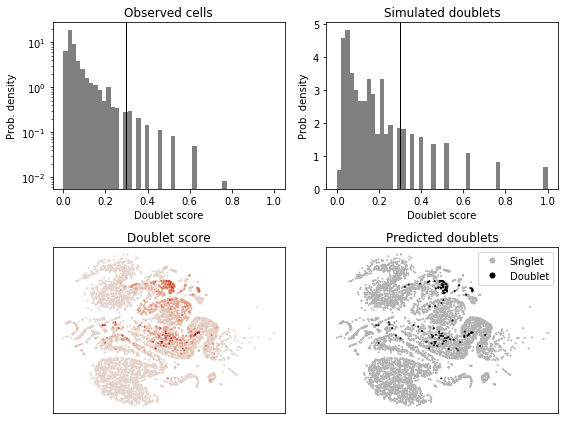

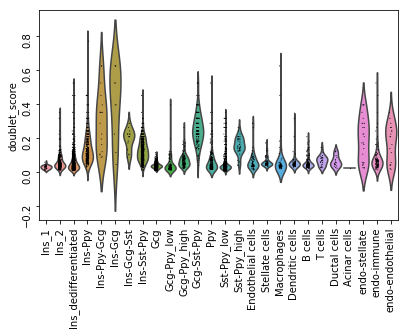

In [100]:


# filtering/preprocessing parameters:
min_counts = 2
min_cells = 3
vscore_percentile = 85
n_pc = 30

# doublet detector parameters:
expected_doublet_rate = 0.05
sim_doublet_ratio = 3
#n_neighbors = 25
n_neighbors=50

t0 = time.time()

scrublet_results = scr.compute_doublet_scores(
    adata_G6_sub.X, 
    min_counts = min_counts, 
    min_cells = min_cells, 
    vscore_percentile = vscore_percentile, 
    n_prin_comps = n_pc,
    scaling_method = 'zscore',
    expected_doublet_rate = expected_doublet_rate,
    sim_doublet_ratio = sim_doublet_ratio,
    n_neighbors = n_neighbors, 
    use_approx_neighbors = True, 
    get_doublet_neighbor_parents = False
)


t1 = time.time()
print('Elapsed time: {:.1f} seconds'.format(t1 - t0))
embedding = adata_glpest_hvg.obsm['X_umap']
score_threshold = 0.3

fig, axs = scr.plot_scrublet_results(embedding, 
                                     scrublet_results['doublet_scores_observed_cells'], 
                                     scrublet_results['doublet_scores_simulated_doublets'], 
                                     score_threshold, 
                                     order_points = True, 
                                     marker_size = 4)

pl.show()

adata_glpest_hvg.obs['doublet_score']=scrublet_results['doublet_scores_observed_cells']
sc.pl.violin(adata_glpest_hvg,groupby='groups_named_fine_new_2',keys='doublet_score',rotation=90)

In [ ]:
adata_all_hvg.obs['doublet_score_n50']=np.zeros(len(adata_all_hvg.obs['groups']))

ix=np.isin(adata_all_hvg.obs['treatment'],['Ctrl'])
adata_all_hvg.obs['doublet_score_n50'][ix]=adata_cd_hvg.obs['doublet_score']

ix=np.isin(adata_all_hvg.obs['treatment'],['Vehicle-STZ'])
adata_all_hvg.obs['doublet_score_n50'][ix]=adata_stz_hvg.obs['doublet_score']

ix=np.isin(adata_all_hvg.obs['treatment'],['Estrogen'])
adata_all_hvg.obs['doublet_score_n50'][ix]=adata_est_hvg.obs['doublet_score']

ix=np.isin(adata_all_hvg.obs['treatment'],['GLP1'])
adata_all_hvg.obs['doublet_score_n50'][ix]=adata_glp_hvg.obs['doublet_score']

ix=np.isin(adata_all_hvg.obs['treatment'],['GLP1-E'])
adata_all_hvg.obs['doublet_score_n50'][ix]=adata_glpest_hvg.obs['doublet_score']

ix=np.isin(adata_all_hvg.obs['treatment'],['PEG-insulin'])
adata_all_hvg.obs['doublet_score_n50'][ix]=adata_ins_hvg.obs['doublet_score']

ix=np.isin(adata_all_hvg.obs['treatment'],['GLP1-E + PEG-insulin'])
adata_all_hvg.obs['doublet_score_n50'][ix]=adata_glpestins_hvg.obs['doublet_score']

### DoubletDetection tool

In [10]:
raw_counts = adata_G1_sub.X.toarray()

In [11]:
clf = doubletdetection.BoostClassifier(n_iters=50)
 
start = time.time()
doublets = clf.fit(raw_counts).predict(p_thresh=1e-7, voter_thresh=0.8)
end = time.time()


Iteration   1/50

Creating synthetic doublets...
Normalizing...
Running PCA...
Clustering augmented data set with Phenograph...

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.94793701171875 seconds
Jaccard graph constructed in 1.977226972579956 seconds
Wrote graph to binary file in 0.308225154876709 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.913111
Louvain completed 21 runs in 2.8972978591918945 seconds
PhenoGraph complete in 6.194875001907349 seconds
Found communities [-1, ... 27], with sizes: [261, 1750, 1105, 986, 727, 688, 584, 531, 476, 456, 405, 395, 372, 120, 112, 100, 89, 88, 81, 79, 57, 55, 54, 39, 36, 29, 23, 19, 18]

Iteration   2/50

Creating synthetic doublets...
Normalizing...
Running PCA...
Clustering augmented data set with Phenograph...

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.9582219123840332 seconds
Jaccard graph c

In [39]:
raw_counts = adata_G2_sub.X.toarray()
clf_2 = doubletdetection.BoostClassifier(n_iters=50)
 
start = time.time()
doublets = clf_2.fit(raw_counts).predict(p_thresh=1e-7, voter_thresh=0.8)
end = time.time()


Iteration   1/50

Creating synthetic doublets...
Normalizing...
Running PCA...
Clustering augmented data set with Phenograph...

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.5389528274536133 seconds
Jaccard graph constructed in 1.760239839553833 seconds
Wrote graph to binary file in 0.30718111991882324 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.936696
Louvain completed 21 runs in 1.8609459400177002 seconds
PhenoGraph complete in 4.501523017883301 seconds
Found communities [-1, ... 32], with sizes: [87, 1154, 987, 862, 791, 329, 329, 277, 272, 214, 205, 196, 194, 146, 142, 113, 112, 85, 80, 75, 73, 72, 71, 53, 53, 47, 47, 45, 45, 45, 42, 38, 23, 11]

Iteration   2/50

Creating synthetic doublets...
Normalizing...
Running PCA...
Clustering augmented data set with Phenograph...

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.6339931488037109 

In [45]:
path = './data/'
group='G8'
adata_G8 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G8.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G8.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G8.var_names_make_unique()

ix=np.isin(adata_all_hvg.obs['treatment'],['GLP1-E + PEG-insulin'])

adata_glpestins_hvg=adata_all_hvg[ix]

y=adata_G8.obs_names
y_new=y+'_G8'
adata_G8.obs_names=y_new
adata_G8_sub=adata_G8[np.isin(adata_G8.obs_names,adata_glpestins_hvg.obs_names)].copy()


raw_counts = adata_G8_sub.X.toarray()
clf_2 = doubletdetection.BoostClassifier(n_iters=50)
 
start = time.time()
doublets = clf_2.fit(raw_counts).predict(p_thresh=1e-7, voter_thresh=0.8)
end = time.time()



adata_glpestins_hvg.obs['doublet_detection']=[x==1 for x in doublets]
adata_glpestins_hvg.obs['scrublet']=adata_glpestins_hvg.obs['doublet_score']>0.2



path = './data/'
group='G5'
adata_G5 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G5.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G5.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G5.var_names_make_unique()


ix=np.isin(adata_all_hvg.obs['treatment'],['Estrogen'])

adata_est_hvg=adata_all_hvg[ix]

y=adata_G5.obs_names
y_new=y+'_G5'
adata_G5.obs_names=y_new
adata_G5_sub=adata_G5[np.isin(adata_G5.obs_names,adata_est_hvg.obs_names)].copy()


raw_counts = adata_G5_sub.X.toarray()
clf_2 = doubletdetection.BoostClassifier(n_iters=50)
 
start = time.time()
doublets = clf_2.fit(raw_counts).predict(p_thresh=1e-7, voter_thresh=0.8)
end = time.time()


adata_est_hvg.obs['doublet_detection']=[x==1 for x in doublets]
adata_est_hvg.obs['scrublet']=adata_est_hvg.obs['doublet_score']>0.2



path = './data/'
group='G3'
adata_G3 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G3.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G3.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G3.var_names_make_unique()


ix=np.isin(adata_all_hvg.obs['treatment'],['PEG-insulin'])

adata_ins_hvg=adata_all_hvg[ix]

y=adata_G3.obs_names
y_new=y+'_G3'
adata_G3.obs_names=y_new
adata_G3_sub=adata_G3[np.isin(adata_G3.obs_names,adata_ins_hvg.obs_names)].copy()

raw_counts = adata_G3_sub.X.toarray()
clf_2 = doubletdetection.BoostClassifier(n_iters=50)
 
start = time.time()
doublets = clf_2.fit(raw_counts).predict(p_thresh=1e-7, voter_thresh=0.8)
end = time.time()


adata_ins_hvg.obs['doublet_detection']=[x==1 for x in doublets]
adata_ins_hvg.obs['scrublet']=adata_ins_hvg.obs['doublet_score']>0.2



path = './data/'
group='G4'
adata_G4 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G4.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G4.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G4.var_names_make_unique()


ix=np.isin(adata_all_hvg.obs['treatment'],['GLP1'])

adata_glp_hvg=adata_all_hvg[ix]

y=adata_G4.obs_names
y_new=y+'_G4'
adata_G4.obs_names=y_new
adata_G4_sub=adata_G4[np.isin(adata_G4.obs_names,adata_glp_hvg.obs_names)].copy()


raw_counts = adata_G4_sub.X.toarray()
clf_2 = doubletdetection.BoostClassifier(n_iters=50)
 
start = time.time()
doublets = clf_2.fit(raw_counts).predict(p_thresh=1e-7, voter_thresh=0.8)
end = time.time()


adata_glp_hvg.obs['doublet_detection']=[x==1 for x in doublets]
adata_glp_hvg.obs['scrublet']=adata_glp_hvg.obs['doublet_score']>0.2

path = './data/'
group='G6'
adata_G6 = sc.read(path+ group + '/filtered_gene_bc_matrices/mm10/matrix.mtx', cache=True).transpose()
adata_G6.var_names = np.genfromtxt(path + group+'/filtered_gene_bc_matrices/mm10/genes.tsv', dtype=str)[:, 1]
adata_G6.obs_names = np.genfromtxt(path+ group + '/filtered_gene_bc_matrices/mm10/barcodes.tsv', dtype=str)

adata_G6.var_names_make_unique()


ix=np.isin(adata_all_hvg.obs['treatment'],['GLP1-E'])

adata_glpest_hvg=adata_all_hvg[ix]

y=adata_G6.obs_names
y_new=y+'_G6'
adata_G6.obs_names=y_new
adata_G6_sub=adata_G6[np.isin(adata_G6.obs_names,adata_glpest_hvg.obs_names)].copy()



raw_counts = adata_G6_sub.X.toarray()
clf_2 = doubletdetection.BoostClassifier(n_iters=50)
 
start = time.time()
doublets = clf_2.fit(raw_counts).predict(p_thresh=1e-7, voter_thresh=0.8)
end = time.time()


adata_glpest_hvg.obs['doublet_detection']=[x==1 for x in doublets]
adata_glpest_hvg.obs['scrublet']=adata_glpest_hvg.obs['doublet_score']>0.2


... reading from cache file ./cache/Users-sophie-Documents-ICB-Projects-2018_10X_Glp_Est_Mice-data-G8-filtered_gene_bc_matrices-mm10-matrix.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Iteration   1/50

Creating synthetic doublets...
Normalizing...
Running PCA...
Clustering augmented data set with Phenograph...

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.32132911682128906 seconds
Jaccard graph constructed in 1.0717599391937256 seconds
Wrote graph to binary file in 0.23008108139038086 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.892459
Louvain completed 21 runs in 1.5643010139465332 seconds
PhenoGraph complete in 3.267230987548828 seconds
Found communities [-1, ... 22], with sizes: [231, 503, 450, 391, 384, 342, 279, 275, 193, 162, 153, 118, 114, 95, 93, 87, 85, 72, 60, 55, 51, 38, 38, 23]

Iteration   2/50

Creating synthetic doublets...
Normaliz

In [ ]:
adata_all_hvg.obs['doublet_detector']=np.zeros(len(adata_all_hvg.obs['groups']))

ix=np.isin(adata_all_hvg.obs['treatment'],['Ctrl'])
adata_all_hvg.obs['doublet_detector'][ix]=adata_cd_hvg.obs['doublet_detection']

ix=np.isin(adata_all_hvg.obs['treatment'],['Vehicle-STZ'])
adata_all_hvg.obs['doublet_detector'][ix]=adata_stz_hvg.obs['doublet_detection']

ix=np.isin(adata_all_hvg.obs['treatment'],['Estrogen'])
adata_all_hvg.obs['doublet_detector'][ix]=adata_est_hvg.obs['doublet_detection']

ix=np.isin(adata_all_hvg.obs['treatment'],['GLP1'])
adata_all_hvg.obs['doublet_detector'][ix]=adata_glp_hvg.obs['doublet_detection']

ix=np.isin(adata_all_hvg.obs['treatment'],['GLP1-E'])
adata_all_hvg.obs['doublet_detector'][ix]=adata_glpest_hvg.obs['doublet_detection']

ix=np.isin(adata_all_hvg.obs['treatment'],['PEG-insulin'])
adata_all_hvg.obs['doublet_detector'][ix]=adata_ins_hvg.obs['doublet_detection']

ix=np.isin(adata_all_hvg.obs['treatment'],['GLP1-E + PEG-insulin'])
adata_all_hvg.obs['doublet_detector'][ix]=adata_glpestins_hvg.obs['doublet_detection']



## Doublet score distribution

/Users/sophie/miniconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


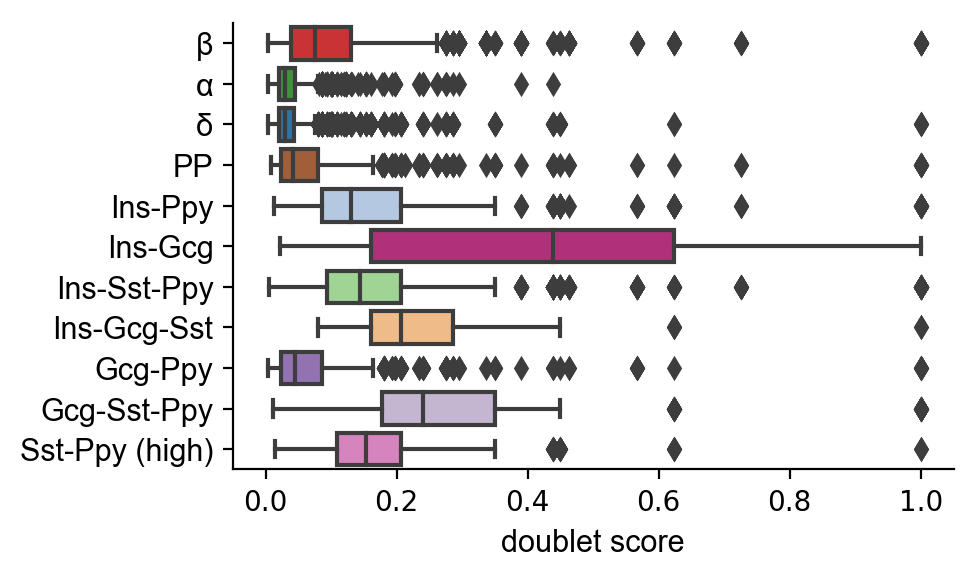

In [551]:
col=['#e31a1c', '#33a02c', '#1f78b4','#b15928','#aec7e8','#c51b7d','#98df8a','#ffbb78','#9467bd', '#c5b0d5','#e377c2']
obs_df = adata_all.obs

labels=['β','α','δ','PP','Ins-Ppy','Ins-Gcg','Ins-Sst-Ppy','Ins-Gcg-Sst','Gcg-Ppy',
                                                                         'Gcg-Sst-Ppy','Sst-Ppy (high)']
rcParams['figure.figsize'] = (5, 3)


#obs_df[gene] = X_col
ax=sns.boxplot(x='doublet_score', y='groups_named_doublet',orient='horizontal', 
               data=obs_df,order=['beta','alpha','delta','PP','Ins-Ppy','Ins-Gcg','Ins-Sst-Ppy','Ins-Gcg-Sst','Gcg-Ppy',
                                                                         'Gcg-Sst-Ppy','Sst-Ppy_high'],palette=col)

# ax = sns.swarmplot(x='groups_named_doublet', y='doublet_score', data=obs_df,order=['beta','alpha','delta','PP','Ins-Ppy','Ins-Gcg','Ins-Sst-Ppy','Ins-Gcg-Sst','Gcg-Ppy',
#                                                                          'Gcg-Sst-Ppy','Sst-Ppy_high'], color=".25")

#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xticks(ax.get_xticks())
ax.set_yticklabels(labels,**csfont,fontsize=11)
ax.xaxis.set_tick_params(bottom='on', top='off')
ax.yaxis.set_tick_params(left='on', right='off')    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
pl.xlim([-0.05,1.05])        
        


        
        
pl.gcf().subplots_adjust(bottom=0.2)
pl.tight_layout()


pl.ylabel('')
pl.xlabel('doublet score',**csfont,fontsize=11)
pl.tight_layout()
pl.savefig('./figures/doublet_scores_cd_box_new.pdf')

pl.show()

## Unique markers of polyhormonal cell populations

we find unique markers by testing each polyhormonal cluster against all monohormonal contributors

In [19]:
def doublet_marker (catref,cattests,adata,thr,writer):
    
    for i,cattest in enumerate(cattests):
        print(catref,cattest)
        sc.tl.rank_genes_groups(adata,groupby='groups_named_fine',n_genes=1000,reference=cattest,groups=[catref],use_raw=False)
            
        ix_score=adata.uns['rank_genes_groups']['scores'][catref]>thr
    
        genes_top=adata.uns['rank_genes_groups']['names'][catref][ix_score]#[0:301]
        scores_top=adata.uns['rank_genes_groups']['scores'][catref][ix_score]#[0:301]
    
        if i==0:
            genes = genes_top
        
        else:
            genes = set(genes).intersection(set(genes_top))    
    try:

        df_all=pd.DataFrame(list(genes),columns=['gene'])

        if len(catref)>25:
            i_short=catref[0:25]
            i_short=i_short.replace('/', '_')

            df_all.to_excel(writer,sheet_name=i_short)

        else:
            catref=catref.replace('/', '_')

            df_all.to_excel(writer,sheet_name=catref)    
    except ValueError:
        print ('no significant marker genes..')
        pass
    

### Control

In [154]:
ix=np.isin(adata_all_hvg.obs['treatment'],['Ctrl'])
adata_hvg_ctr=adata_all_hvg[ix].copy()
adata_hvg_endo_ctr=adata_hvg_ctr[np.isin(adata_hvg_ctr.obs['groups_named_broad'],['beta','alpha','delta','PP','polyhormonal'])].copy()

In [160]:
adata_all_norm_ctr=adata_all_norm[np.isin(adata_all_norm.obs_names,adata_hvg_endo_ctr.obs_names)].copy()

In [161]:
writer = pd.ExcelWriter('./figures_paper/doublet_markers_control_no filter.xlsx', engine='xlsxwriter')
thr=4
catref='Ins-Ppy'#, 
cattests=['Ins_1','Ppy']

adata=adata_all_norm_ctr
doublet_marker(catref,cattests,adata,thr,writer)


catref='Ins-Gcg'#, 
cattests=['Ins_1','Gcg']

adata=adata_all_norm_ctr
doublet_marker(catref,cattests,adata,thr,writer)


catref='Ins-Ppy-Gcg'#, 
cattests=['Ins_1','Gcg','Ppy']

adata=adata_all_norm_ctr
doublet_marker(catref,cattests,adata,thr,writer)

catref='Ins-Sst-Ppy'#, 
cattests=['Ins_1','Sst-Ppy_low']

adata=adata_all_norm_ctr
doublet_marker(catref,cattests,adata,thr,writer)

catref='Ins-Gcg-Sst'#, 
cattests=['Ins_1','Sst-Ppy_low','Gcg']

adata=adata_all_norm_ctr
doublet_marker(catref,cattests,adata,thr,writer)


catref='Gcg-Ppy_low'#, 
cattests=['Gcg','Ppy']

adata=adata_all_norm_ctr
doublet_marker(catref,cattests,adata,thr,writer)

catref='Gcg-Ppy_high'#,
cattests=['Gcg','Ppy']

adata=adata_all_norm_ctr
doublet_marker(catref,cattests,adata,thr,writer)

catref='Gcg-Sst-Ppy'#, 
cattests=['Gcg','Sst-Ppy_low']

adata=adata_all_norm_ctr
doublet_marker(catref,cattests,adata,thr,writer)


catref='Sst-Ppy_high'#, 
cattests=['Ppy','Sst-Ppy_low']

adata=adata_all_norm_ctr
doublet_marker(catref,cattests,adata,thr,writer)


writer.save()

Ins-Ppy Ins_1
ranking genes
    finished (0:00:01.49) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
Ins-Ppy Ppy
ranking genes
    finished (0:00:00.09) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
Ins-Gcg Ins_1
ranking genes
    finished (0:00:01.08) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
Ins-Gcg Gcg
ranking genes
    finished (0:00:00.16) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
Ins-Ppy-Gcg Ins_1
ranking genes
    finished (0:00:01.00) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by 

### STZ

In [164]:
ix=np.isin(adata_all_hvg.obs['treatment'],['Vehicle-STZ'])
adata_hvg_stz=adata_all_hvg[ix].copy()

adata_hvg_endo_stz=adata_hvg_stz[np.isin(adata_hvg_stz.obs['groups_named_broad'],['beta','alpha','delta','PP','polyhormonal'])].copy()

adata_all_norm_stz=adata_all_norm[np.isin(adata_all_norm.obs_names,adata_hvg_endo_stz.obs_names)].copy()

In [165]:
writer = pd.ExcelWriter('./figures_paper/doublet_markers_stz_no filter.xlsx', engine='xlsxwriter')
thr=4
catref='Ins-Ppy'#, 
cattests=['Ins_dedifferentiated','Ppy']

adata=adata_all_norm_stz
doublet_marker(catref,cattests,adata,thr,writer)


catref='Ins-Gcg'#, 
cattests=['Ins_dedifferentiated','Gcg']

adata=adata_all_norm_stz
doublet_marker(catref,cattests,adata,thr,writer)


catref='Ins-Ppy-Gcg'#, 
cattests=['Ins_dedifferentiated','Gcg','Ppy']

adata=adata_all_norm_stz
doublet_marker(catref,cattests,adata,thr,writer)

catref='Ins-Sst-Ppy'#, 
cattests=['Ins_dedifferentiated','Sst-Ppy_low']

adata=adata_all_norm_stz
doublet_marker(catref,cattests,adata,thr,writer)

catref='Ins-Gcg-Sst'#, 
cattests=['Ins_dedifferentiated','Sst-Ppy_low','Gcg']

adata=adata_all_norm_stz
doublet_marker(catref,cattests,adata,thr,writer)


catref='Gcg-Ppy_low'#, 
cattests=['Gcg','Ppy']

adata=adata_all_norm_stz
doublet_marker(catref,cattests,adata,thr,writer)

catref='Gcg-Ppy_high'#,
cattests=['Gcg','Ppy']

adata=adata_all_norm_stz
doublet_marker(catref,cattests,adata,thr,writer)

catref='Gcg-Sst-Ppy'#, 
cattests=['Gcg','Sst-Ppy_low']

adata=adata_all_norm_stz
doublet_marker(catref,cattests,adata,thr,writer)


catref='Sst-Ppy_high'#, 
cattests=['Ppy','Sst-Ppy_low']

adata=adata_all_norm_stz
doublet_marker(catref,cattests,adata,thr,writer)


writer.save()

Ins-Ppy Ins_dedifferentiated
ranking genes
    finished (0:00:00.46) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
Ins-Ppy Ppy
ranking genes
    finished (0:00:00.07) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
Ins-Gcg Ins_dedifferentiated
ranking genes
    finished (0:00:00.37) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
Ins-Gcg Gcg
ranking genes
    finished (0:00:00.34) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
Ins-Ppy-Gcg Ins_dedifferentiated
ranking genes
    finished (0:00:00.35) --> added to `.uns['rank_genes_groups']`
    

## Doublet removal

we remove doublets based on all criteria listed in the M&M

In [16]:
adata_endo_all=adata_all[np.isin(adata_all.obs['groups_named_broad'],['beta', 'alpha', 'delta', 'PP','polyhormonal'])].copy()

In [24]:
adata_endo_hvg=adata_all_hvg[np.isin(adata_all_hvg.obs['groups_named_broad'],['beta', 'alpha', 'delta', 'PP','polyhormonal'])].copy()

In [25]:

ref_clust=np.array(np.ones(adata_endo_hvg.n_obs),dtype=bool)
thr=[1,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0]
for n,group in enumerate(['Ins_1','Ins_2','Ins_dedifferentiated','Ins-Ppy', 'Ins-Ppy-Gcg','Ins-Gcg',
       'Ins-Gcg-Sst', 'Ins-Sst','Ins-Sst-Ppy', 'Gcg', 'Gcg-Ppy_low', 'Gcg-Ppy_high',
       'Gcg-Sst-Ppy', 'Ppy', 'Sst-Ppy_low', 'Sst-Ppy_high']):

    ref_clust2=adata_endo_hvg.obs['doublet_score'][np.isin(adata_endo_hvg.obs['groups_named_fine'],group)]<=thr[n]
    
    ref_clust[np.isin(adata_endo_hvg.obs['groups_named_fine'],group)]=ref_clust2
adata_endo_hvg.obs['doublet_man']=ref_clust

In [26]:
adata_endo_all=adata_endo_all[adata_endo_hvg.obs['doublet_man']].copy()
adata_endo_hvg=adata_endo_hvg[adata_endo_hvg.obs['doublet_man']].copy()

In [27]:
adata_endo_hvg.uns=adata_all_hvg.uns
adata_endo_all.uns=adata_all.uns

In [28]:
cols=['#a50f15',
 '#f46d43',
 '#fdae61',
 '#aec7e8',
 '#35978f',
 '#98df8a',
 '#2ca02c',
 '#ff9896',
 '#9467bd',
 '#b15928',
 '#1f78b4']


In [29]:
adata_endo_hvg.uns['groups_named_fine_colors']=cols

In [30]:
adata_endo_all.uns['groups_named_fine_colors']=cols

# Write processed and filtered anndata

In [ ]:
sc.write('./data/endo.h5ad',adata_endo_all)
sc.write('./data/endo_hvg.h5ad',adata_endo_hvg)